<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> NEWLAND PROJECT 2020/2021 </center>

**GROUP 12:** <br>
- Ana Paulino (20170743) <br>
- Luís Almeida (20200666) <br>
- Soraia Cunha (20170806)

In [ ]:
**Table of Contents** <br>
* [1. Import](#import)
    * [1.1. Import Libraries](#importlibraries)
    * [1.2. Import Datasets](#importdatasets)
* [2. Initial Analysis](#initialanalysis)
* [3. Definition of the initial Metric and Non-metric Features](#defeatures)
* [4. Impute Missing Values on Non-Metric Features](#imputeMV)
* [5. Further Analysis](#FurtherAnalysis)
* [6. Variables' Distribution](#VarsDistribution)
    * [6.1. Categorical Variables - Histograms](#CatVarDist)
    * [6.2. Numeric Variables - Histograms](#NumVarDist)
    * [6.3. Numeric Variables - Boxplots](#NumVarBox)
* [7. Coherence Checking](#Check)
* [8. Transform Variables](#TransformVar)
* [9. Coherence Checking - Age](#CheckAge)
* [10. Outlier Removal](#outlier)
    * [10.1. Outlier Removal - Defining Features](#outdefeatures)
    * [10.2. Variables' Histograms](#hist)
    * [10.3. Outlier Removal - Filtering](#outfiltering)
         * [10.3.1. Filters 1 - Manual](#manual)
         * [10.3.2. Filters 2 - IQR](#iqr)
         * [10.3.3. Filters 3 - Manual & IQR](#manualiqr)
* [11. Variables' Values - Proportion](#varval) 
* [12. Encoding - OneHotEncoder](#encoding) 
* [13. Standardization](#standardization) 
    * [13.1. Standard Scaler](#standard)
    * [13.2. MinMax Scaler](#minmax)
* [14. Input Variables and Target Split](#inputtarget)     
* [15. Feature Selection](#featureselection) 
    * [15.1. Correlation's: Pearson and Spearman](#corr)
    * [15.2. Recursive Feature Elimination - RFE](#rfe)
    * [15.3. LASSO Regression](#lasso)
    * [15.4. RIDGE Regression](#ridge)
    * [15.5. Chi-Square](#chisquare)
    * [15.6. Principal Components Analysis - PCA](#pca)
    * [15.7. ANOVA F-Values](#anova)
    * [15.8. Feature Importances - Tree Based Classifiers](#featimportance)
    * [15.9. Gini Importance | Entropy Importance](#ginientropy)
    * [15.10. MAE | MSE | FRIEDMAN Importances](#maemsefriedman)
    * [15.11. AdaBoost Feature Importances](#adaboost)
* [16. Final Selected Features](#selectedfeatures)   
    * [16.1. Split into X (Input variables) and y (Target)](#xy)
* [17. Re-sampling Techniques for Imbalanced Classification](#resampling)
    * [17.1. Undersampling](#under)
    * [17.2. Oversampling](#over)
    * [17.3. Undersampling & Oversampling (Combined)](#combined)
    * [17.4. SMOTE - Synthetic Minority Oversampling Technique](#smote)
    * [17.5. ADASYN - Adaptive Synthetic Oversampling](#adasyn)    
* [18. Train Test Split](#traintestsplit)  
* [19. Models](#models)
    * [19.1. K-Fold and Repeated K-Fold parameters](#kfoldrkfold)
    * [19.2. Multi-Layer Perceptron](#nn)
         * [19.2.1. Grid Search NN](#gridsearchnn)
    * [19.3. Random Forest](#rf)   
    * [19.4. Logistic Regression](#log) 
    * [19.5. Instance Based Learning](#ibl)
    * [19.6. Decision Trees](#dt)
    * [19.7. Naive Bayes](#nb)
    * [19.8. Support Vector Machine - SVC (Classifier)](#svm)
    * [19.9. Ridge Classifier](#ridgeclassifier)
    * [19.10. Ensemble Methods](#ensemble)
         * [19.10.1. Balanced Bagging Classifier](#bagg)
         * [19.10.2. Balanced Bagging Classifier + Trees](#baggtrees)
         * [19.10.3. AdaBoost Classifier](#adaboostclassifier)
         * [19.10.4. Stacking Classifier](#stacking)
         * [19.10.5. Voting Classifier](#voting)
         * [19.10.6. Gradient Boosting Classifier](#gradientboost)
* [20. Models Comparison](#modelscomparison)
    * [20.1. Accuracies](#acc)
    * [20.2. ROC Curve](#roc)
* [21. Final Model - Kaggle Submission](#kaggle)

In [ ]:
<hr>
<a class="anchor" id="import">
    
# 1. Import
    
</a>

In [ ]:
<a class="anchor" id="importlibraries">

## 1.1. Import Libraries

</a>

In [1]:
#Loading libraries
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

<a class="anchor" id="importdatasets">

## 1.1. Import Datasets

</a>

In [2]:
c_ya_train = pd.read_excel("Train.xlsx")
c_ya_test = pd.read_excel("Test.xlsx")

In [3]:
c_ya_train.head()

CITIZEN_ID                  Name          Birthday Native Continent  \
0       12486       Mr. Adam Glover       July 1,2003           Europe   
1       12487  Mr. Cameron McDonald   January 25,2006           Europe   
2       12488    Mr. Keith Davidson       May 10,2009           Europe   
3       12489    Mr. Alexander Gill     March 25,1985           Europe   
4       12490        Mr. Neil Piper       May 29,2015           Europe   

  Marital Status    Lives with  Base Area               Education Level  \
0        Married          Wife  Northbury  High School + PostGraduation   
1        Married          Wife  Northbury           Professional School   
2        Married          Wife  Northbury           Professional School   
3        Married          Wife  Northbury       High School - 2nd Cycle   
4         Single  Other Family  Northbury                           PhD   

   Years of Education           Employment Sector                    Role  \
0                  13  Private Sector - Services   Repair & constructions   
1                  12      Public Sector - Others  Repair & constructions   
2                  12  Private Sector - Services                    Sales   
3                  11  Private Sector - Services                 Security   
4                  21  Self-Employed (Individual)               Professor   

   Working Hours per week  Money Received  Ticket Price  Income  
0                      40               0          2273       1  
1                      40               0             0       1  
2                      46               0          2321       1  
3                      37            5395             0       1  
4                      45               0             0       1

In [4]:
c_ya_test.head()

CITIZEN_ID                Name        Birthday Native Continent  \
0       34886        Mr. Dan Kerr     May 13,2012           Europe   
1       34887   Miss Olivia Grant   August 9,2014           Europe   
2       34888  Mr. Trevor Simpson     May 23,2020           Europe   
3       34889     Mr. David Clark   April 15,2016           Europe   
4       34890   Mr. Gavin Lambert   April 22,2011           Europe   

  Marital Status    Lives with  Base Area  \
0        Married          Wife  Northbury   
1         Single  Other Family  Northbury   
2       Divorced  Other Family  Northbury   
3        Married          Wife  Northbury   
4        Married          Wife    Watford   

                        Education Level  Years of Education  \
0            Bachelors + PostGraduation                  16   
1            Bachelors + PostGraduation                  16   
2  Professional School + PostGraduation                  13   
3                   Professional School                  12   
4                             Bachelors                  15   

            Employment Sector        Role  Working Hours per week  \
0  Private Sector - Services        Sales                      40   
1  Private Sector - Services    Professor                      36   
2  Private Sector - Services   Management                      50   
3  Private Sector - Services    Professor                      48   
4      Public Sector - Others   Professor                      45   

   Money Received  Ticket Price  
0               0             0  
1               0             0  
2           12940             0  
3               0          1827  
4               0             0

<hr>
<a class="anchor" id="initialanalysis">
    
# 2. Initial Analysis
    
</a>

In [5]:
# Set CITIZEN_ID as the index for the train and test datasets
c_ya_train = c_ya_train.set_index("CITIZEN_ID")
c_ya_test=c_ya_test.set_index("CITIZEN_ID")

In [6]:
#ProfileReport(c_ya_train,correlations={
#        "pearson": {"calculate": True},
#        "spearman": {"calculate": False},
#        "kendall": {"calculate": False},
#        "phi_k": {"calculate": False},
#        "cramers": {"calculate": False},
#    },
#)

In [7]:
# Using .describe() get the descriptive statistics for all variables 
c_ya_train.describe(include="all")

Name         Birthday Native Continent Marital Status  \
count             22400            22400            22400          22400   
unique            16074            11257                5              7   
top     Mr. Boris Sharp   August 15,2025           Europe        Married   
freq                  4                9            19111          10219   
mean                NaN              NaN              NaN            NaN   
std                 NaN              NaN              NaN            NaN   
min                 NaN              NaN              NaN            NaN   
25%                 NaN              NaN              NaN            NaN   
50%                 NaN              NaN              NaN            NaN   
75%                 NaN              NaN              NaN            NaN   
max                 NaN              NaN              NaN            NaN   

       Lives with  Base Area      Education Level  Years of Education  \
count       22400      22400                22400        22400.000000   
unique          6         40                   16                 NaN   
top          Wife  Northbury  Professional School                 NaN   
freq         9012      20074                 7232                 NaN   
mean          NaN        NaN                  NaN           13.173884   
std           NaN        NaN                  NaN            2.512451   
min           NaN        NaN                  NaN            2.000000   
25%           NaN        NaN                  NaN           12.000000   
50%           NaN        NaN                  NaN           13.000000   
75%           NaN        NaN                  NaN           15.000000   
max           NaN        NaN                  NaN           21.000000   

                 Employment Sector       Role  Working Hours per week  \
count                        22400      22400            22400.000000   
unique                           9         15                     NaN   
top     Private Sector - Services   Professor                     NaN   
freq                         15599       2849                     NaN   
mean                           NaN        NaN               40.483795   
std                            NaN        NaN               12.370921   
min                            NaN        NaN                1.000000   
25%                            NaN        NaN               40.000000   
50%                            NaN        NaN               40.000000   
75%                            NaN        NaN               45.000000   
max                            NaN        NaN               99.000000   

        Money Received  Ticket Price        Income  
count     22400.000000  22400.000000  22400.000000  
unique             NaN           NaN           NaN  
top                NaN           NaN           NaN  
freq               NaN           NaN           NaN  
mean       1324.915357    109.145313      0.237098  
std        9227.771813    500.208904      0.425313  
min           0.000000      0.000000      0.000000  
25%           0.000000      0.000000      0.000000  
50%           0.000000      0.000000      0.000000  
75%           0.000000      0.000000      0.000000  
max      122999.000000   5358.000000      1.000000

In [8]:
c_ya_test.describe(include="all")

Name       Birthday Native Continent Marital Status  \
count           10100          10100            10100          10100   
unique           8964           7222                5              7   
top     Mr. Jack Ball   July 21,2009           Europe        Married   
freq                3              6             8651           4731   
mean              NaN            NaN              NaN            NaN   
std               NaN            NaN              NaN            NaN   
min               NaN            NaN              NaN            NaN   
25%               NaN            NaN              NaN            NaN   
50%               NaN            NaN              NaN            NaN   
75%               NaN            NaN              NaN            NaN   
max               NaN            NaN              NaN            NaN   

       Lives with  Base Area      Education Level  Years of Education  \
count       10100      10100                10100        10100.000000   
unique          6         38                   16                 NaN   
top          Wife  Northbury  Professional School                 NaN   
freq         4159       9055                 3251                 NaN   
mean          NaN        NaN                  NaN           13.158020   
std           NaN        NaN                  NaN            2.490656   
min           NaN        NaN                  NaN            2.000000   
25%           NaN        NaN                  NaN           12.000000   
50%           NaN        NaN                  NaN           13.000000   
75%           NaN        NaN                  NaN           15.000000   
max           NaN        NaN                  NaN           21.000000   

                 Employment Sector                    Role  \
count                        10100                   10100   
unique                           8                      15   
top     Private Sector - Services   Repair & constructions   
freq                          7052                    1292   
mean                           NaN                     NaN   
std                            NaN                     NaN   
min                            NaN                     NaN   
25%                            NaN                     NaN   
50%                            NaN                     NaN   
75%                            NaN                     NaN   
max                            NaN                     NaN   

        Working Hours per week  Money Received  Ticket Price  
count             10100.000000    10100.000000  10100.000000  
unique                     NaN             NaN           NaN  
top                        NaN             NaN           NaN  
freq                       NaN             NaN           NaN  
mean                 40.319406     1331.184257    102.986238  
std                  12.276067     8782.255770    484.303733  
min                   1.000000        0.000000      0.000000  
25%                  40.000000        0.000000      0.000000  
50%                  40.000000        0.000000      0.000000  
75%                  45.000000        0.000000      0.000000  
max                  99.000000   122999.000000   5358.000000

In [9]:
# Count the number of records grouped by Education Level and Income
c_ya_train.groupby(["Education Level","Income"]).count()["Name"]

Education Level                       Income
Bachelors                             0          555
                                      1          180
Bachelors + PostGraduation            0         2193
                                      1         1503
High School + PostGraduation          0         4068
                                      1          926
High School - 1st Cycle               0          610
                                      1           39
High School - 2nd Cycle               0          770
                                      1           39
High School Complete                  0          259
                                      1           28
Masters                               0          543
                                      1          650
Masters + PostGraduation              0          114
                                      1          283
Middle School - 1st Cycle             0          227
                                      1           10
M

<font color='darkblue'> Interesting that the Preschool education level only has value 0, in other words, all people with education level correspondent to preschool have income below the average. </font>

In [10]:
# Check the Educational Level and corresponding Years of Education
c_ya_train.groupby(['Education Level', 'Years of Education']).count()

Name  Birthday  \
Education Level                      Years of Education                   
Bachelors                            15                   735       735   
Bachelors + PostGraduation           16                  3696      3696   
High School + PostGraduation         13                  4994      4994   
High School - 1st Cycle              10                   649       649   
High School - 2nd Cycle              11                   809       809   
High School Complete                 12                   287       287   
Masters                              17                  1193      1193   
Masters + PostGraduation             18                   397       397   
Middle School - 1st Cycle            6                    237       237   
Middle School - 2nd Cycle            8                    432       432   
Middle School Complete               9                    342       342   
PhD                                  21                   289       289   
Preschool                            2                     33        33   
Primary School                       4                    122       122   
Professional School                  12                  7232      7232   
Professional School + PostGraduation 13                   953       953   

                                                         Native Continent  \
Education Level                      Years of Education                     
Bachelors                            15                               735   
Bachelors + PostGraduation           16                              3696   
High School + PostGraduation         13                              4994   
High School - 1st Cycle              10                               649   
High School - 2nd Cycle              11                               809   
High School Complete                 12                               287   
Masters                              17                              1193   
Masters + PostGraduation             18                               397   
Middle School - 1st Cycle            6                                237   
Middle School - 2nd Cycle            8                                432   
Middle School Complete               9                                342   
PhD                                  21                               289   
Preschool                            2                                 33   
Primary School                       4                                122   
Professional School                  12                              7232   
Professional School + PostGraduation 13                               953   

                                                         Marital Status  \
Education Level                      Years of Education                   
Bachelors                            15                             735   
Bachelors + PostGraduation           16                            3696   
High School + PostGraduation         13                            4994   
High School - 1st Cycle              10                             649   
High School - 2nd Cycle              11                             809   
High School Complete                 12                             287   
Masters                              17                            1193   
Masters + PostGraduation             18                             397   
Middle School - 1st Cycle            6                              237   
Middle School - 2nd Cycle            8                              432   
Middle School Complete               9                              342   
PhD                                  21                             289   
Preschool                            2                               33   
Primary School                       4                              122   
Professional School                  12                            7232   
Professional School + PostGraduation 13     

In [11]:
# More information regarding c_ya_train dataset
c_ya_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22400 entries, 12486 to 34885
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    22400 non-null  object
 1   Birthday                22400 non-null  object
 2   Native Continent        22400 non-null  object
 3   Marital Status          22400 non-null  object
 4   Lives with              22400 non-null  object
 5   Base Area               22400 non-null  object
 6   Education Level         22400 non-null  object
 7   Years of Education      22400 non-null  int64 
 8   Employment Sector       22400 non-null  object
 9   Role                    22400 non-null  object
 10  Working Hours per week  22400 non-null  int64 
 11  Money Received          22400 non-null  int64 
 12  Ticket Price            22400 non-null  int64 
 13  Income                  22400 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.6+ MB


In [12]:
# More information regarding c_ya_test dataset
c_ya_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10100 entries, 34886 to 44985
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    10100 non-null  object
 1   Birthday                10100 non-null  object
 2   Native Continent        10100 non-null  object
 3   Marital Status          10100 non-null  object
 4   Lives with              10100 non-null  object
 5   Base Area               10100 non-null  object
 6   Education Level         10100 non-null  object
 7   Years of Education      10100 non-null  int64 
 8   Employment Sector       10100 non-null  object
 9   Role                    10100 non-null  object
 10  Working Hours per week  10100 non-null  int64 
 11  Money Received          10100 non-null  int64 
 12  Ticket Price            10100 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [13]:
# Check duplicate records
print(c_ya_train.duplicated().value_counts())
print(c_ya_test.duplicated().value_counts())

False    22400
dtype: int64
False    10100
dtype: int64


In [14]:
# Replace the strange characters by NaN
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{"]
c_ya_train.replace(strange_values_list,np.nan, inplace=True)

In [15]:
# Check the Missing Values on c_ya_train dataset
c_ya_train.isna().sum()

Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

In [16]:
# Replace the strange characters by NaN in test dataset
c_ya_test.replace(strange_values_list,np.nan, inplace=True)

In [17]:
# Check the Missing Values on c_ya_test dataset
c_ya_test.isna().sum()

Name                        0
Birthday                    0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                 187
Education Level             0
Years of Education          0
Employment Sector         570
Role                      570
Working Hours per week      0
Money Received              0
Ticket Price                0
dtype: int64

In [18]:
c_ya_train['Birthday'].value_counts()

 August 15,2025     9
 June 16,2010       8
 April 30,2012      8
 April 2,2013       8
 January 23,2009    8
                   ..
 August 22,2009     1
 April 17,2010      1
 June 27,1984       1
 July 16,1982       1
 August 15,1970     1
Name: Birthday, Length: 11257, dtype: int64

In [19]:
c_ya_train['Birthday'] = c_ya_train['Birthday'].str.replace(' February 29', ' February 28')

In [20]:
c_ya_test['Birthday'] = c_ya_test['Birthday'].str.replace(' February 29', ' February 28')

In [21]:
# Convert the column Birthday into Datetime64 datatype
c_ya_train['Birthday'] = pd.to_datetime(c_ya_train['Birthday'], format = ' %B %d,%Y')

c_ya_test['Birthday'] = pd.to_datetime(c_ya_test['Birthday'], format = ' %B %d,%Y')

In [22]:
c_ya_train.isna().sum()

Name                         0
Birthday                     0
Native Continent             0
Marital Status               0
Lives with                   0
Base Area                  395
Education Level              0
Years of Education           0
Employment Sector         1264
Role                      1271
Working Hours per week       0
Money Received               0
Ticket Price                 0
Income                       0
dtype: int64

In [23]:
c_ya_test.isna().sum()

Name                        0
Birthday                    0
Native Continent            0
Marital Status              0
Lives with                  0
Base Area                 187
Education Level             0
Years of Education          0
Employment Sector         570
Role                      570
Working Hours per week      0
Money Received              0
Ticket Price                0
dtype: int64

<hr>
<a class="anchor" id="defeatures">
    
# 3. Definition of the initial Metric and Non-metric Features
    
</a>

In [24]:
# Metric & Non-metric features
metric_features=["Years of Education","Working Hours per week","Money Received","Ticket Price"]
non_metric_features=["Name","Birthday","Native Continent","Marital Status","Lives with","Base Area","Education Level","Employment Sector","Role"]

<hr>
<a class="anchor" id="imputeMV">
    
# 4. Impute Missing Values Non-metric Features
    
</a>

In [25]:
# Make a copy of the original dataset
c_ya_train_copy  = c_ya_train.copy()

In [26]:
c_ya_test_copy=c_ya_test.copy()

In [27]:
#Fill Missing data with mode values
modes = c_ya_train_copy[non_metric_features].mode().loc[0]
c_ya_train_copy.fillna(modes, inplace=True)
c_ya_test_copy.fillna(modes, inplace=True)

In [28]:
# checking how many NaNs we still have
c_ya_train_copy.isna().sum()  

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
Income                    0
dtype: int64

In [29]:
# checking how many NaNs we still have
c_ya_test_copy.isna().sum()  

Name                      0
Birthday                  0
Native Continent          0
Marital Status            0
Lives with                0
Base Area                 0
Education Level           0
Years of Education        0
Employment Sector         0
Role                      0
Working Hours per week    0
Money Received            0
Ticket Price              0
dtype: int64

<hr>
<a class="anchor" id="FurtherAnalysis">
    
# 5. Further Analysis
    
</a>

In [30]:
c_ya_train["Native Continent"].value_counts()

Europe     19111
Africa      2187
Asia         699
America      219
Oceania      184
Name: Native Continent, dtype: int64

In [31]:
c_ya_train["Birthday"].max()

Timestamp('2031-10-11 00:00:00')

In [32]:
c_ya_train["Marital Status"].value_counts()

Married                         10219
Single                           7416
Divorced                         3072
Separated                         699
Widow                             696
Married - Spouse Missing          284
Married - Spouse in the Army       14
Name: Marital Status, dtype: int64

In [33]:
c_ya_train["Lives with"].value_counts()

Wife               9012
Other Family       5777
Children           3519
Alone              2362
Husband            1049
Other relatives     681
Name: Lives with, dtype: int64

In [34]:
c_ya_train["Money Received"].max()

122999

In [35]:
c_ya_train["Money Received"].value_counts()

0         20568
18480       219
9456        188
8977        163
122999      114
          ...  
2936          1
6065          1
3611          1
7823          1
1443          1
Name: Money Received, Length: 116, dtype: int64

<hr>
<a class="anchor" id="VarsDistribution">
    
# 6. Variables' Distribution
    
</a>

<a class="anchor" id="CatVarDist">

## 6.1. Categorical Variables - Histograms

</a>

In [36]:
cat_var = c_ya_train_copy[non_metric_features].drop(columns=["Name","Birthday"])
cat_var_list = c_ya_train_copy[non_metric_features].drop(columns=["Name","Birthday"]).columns.to_list()

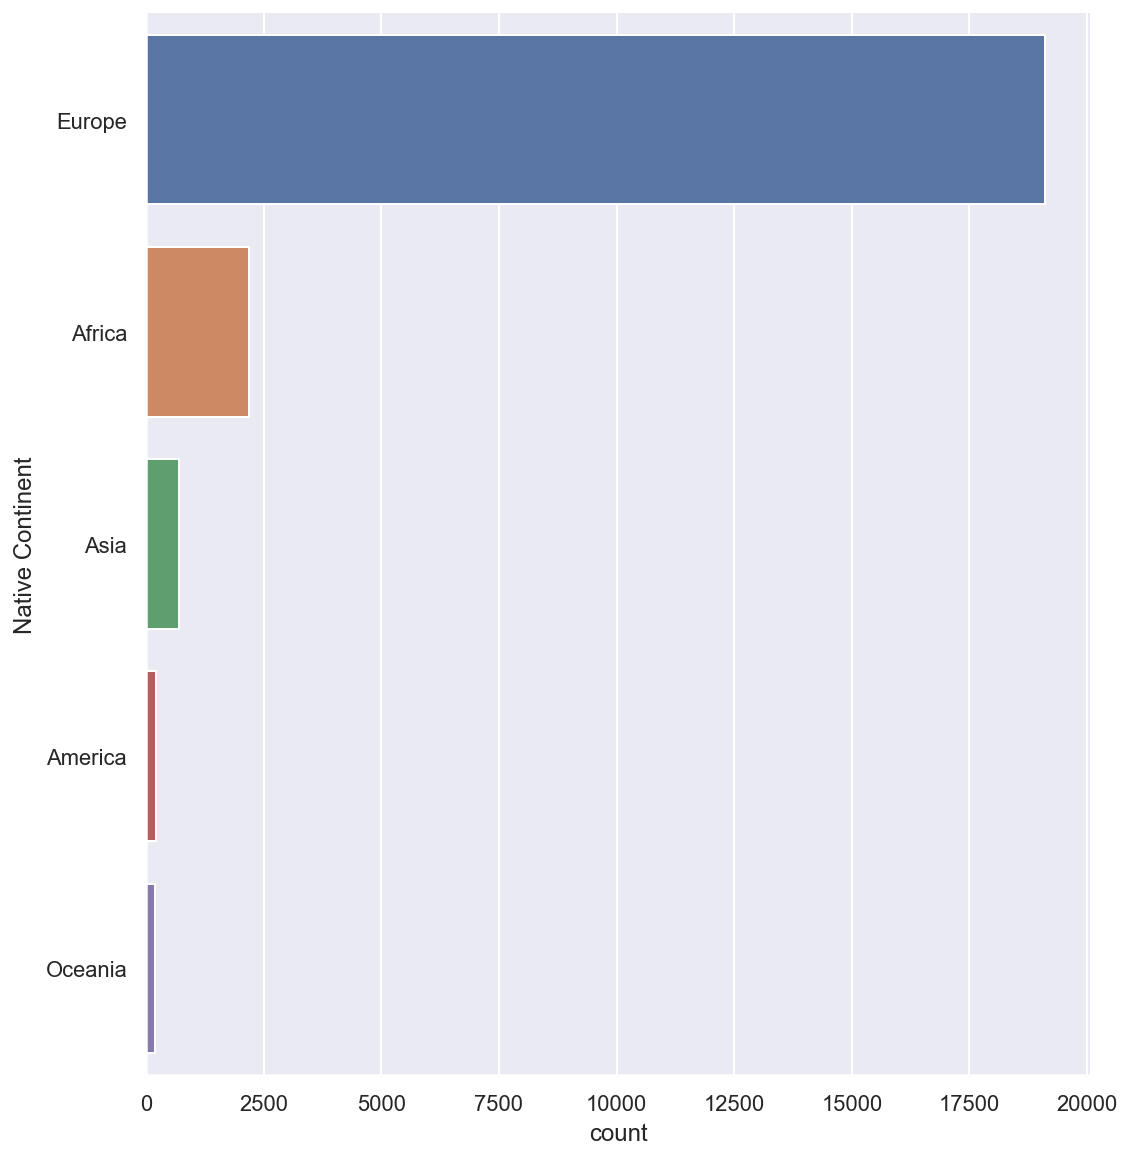

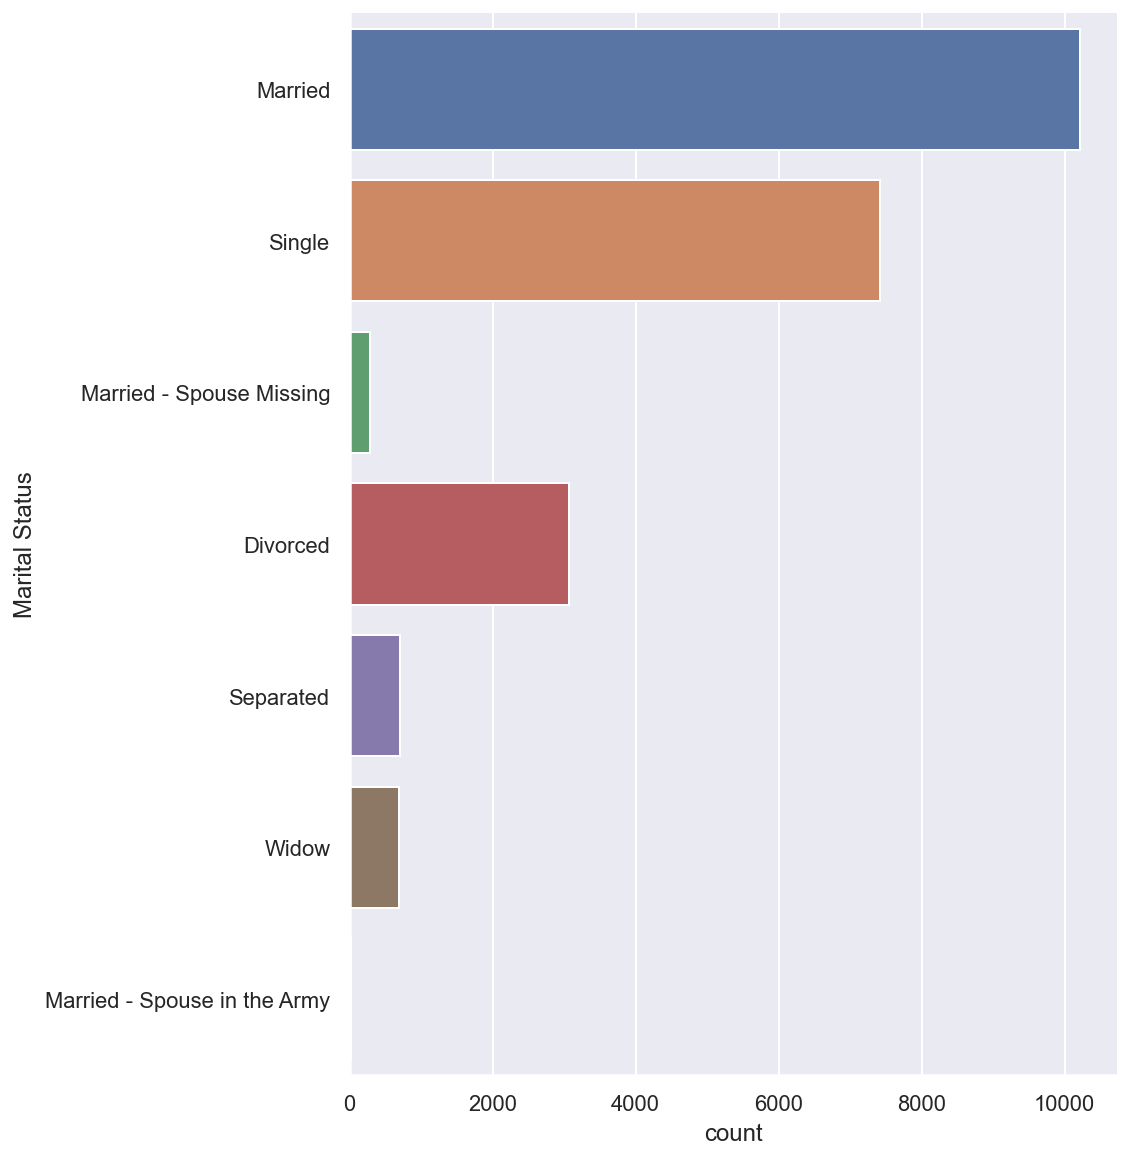

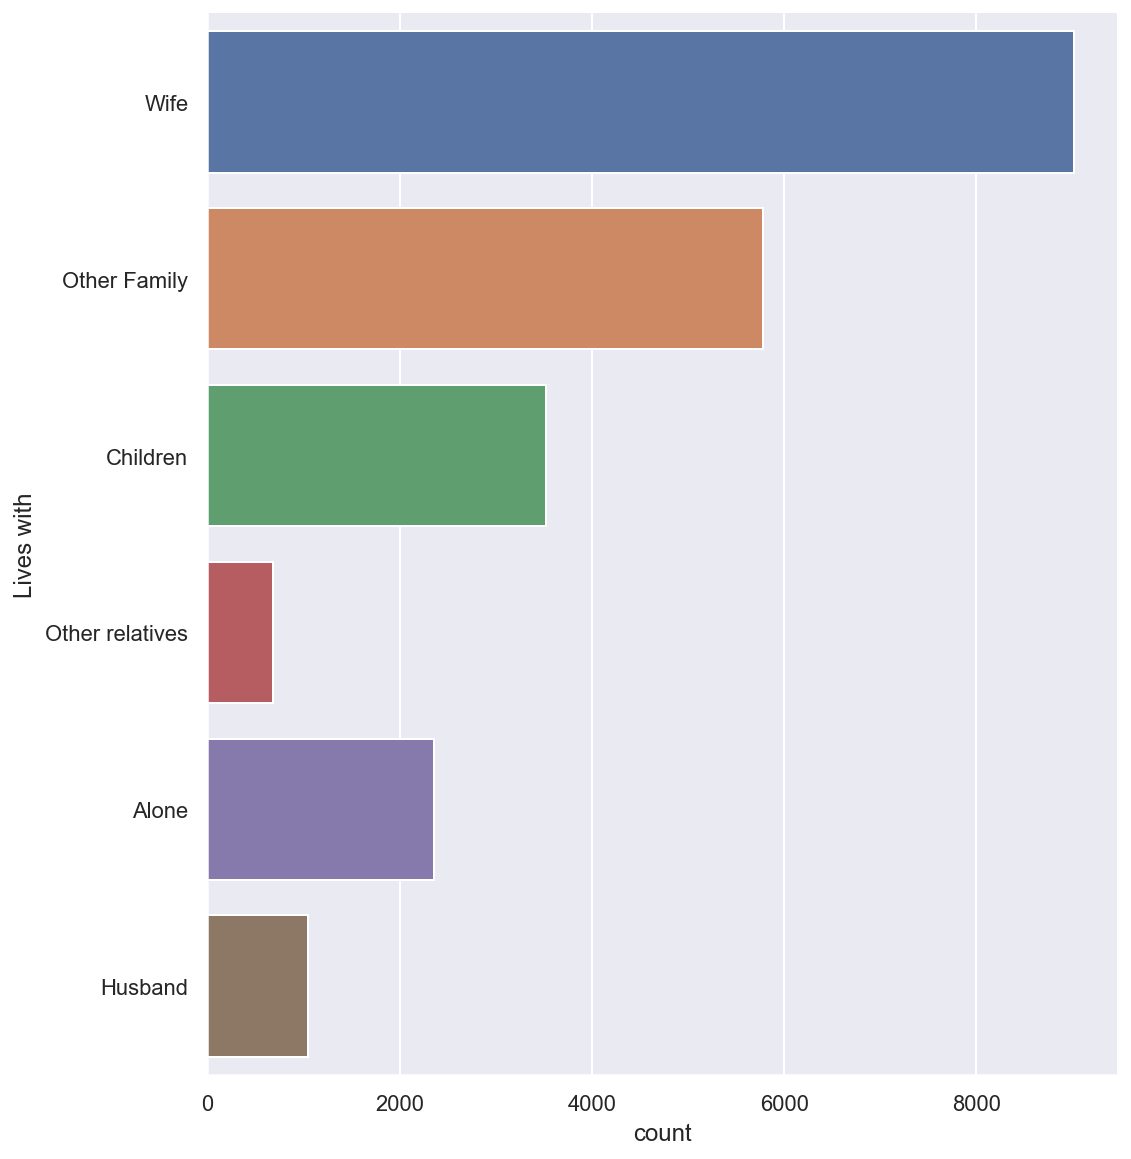

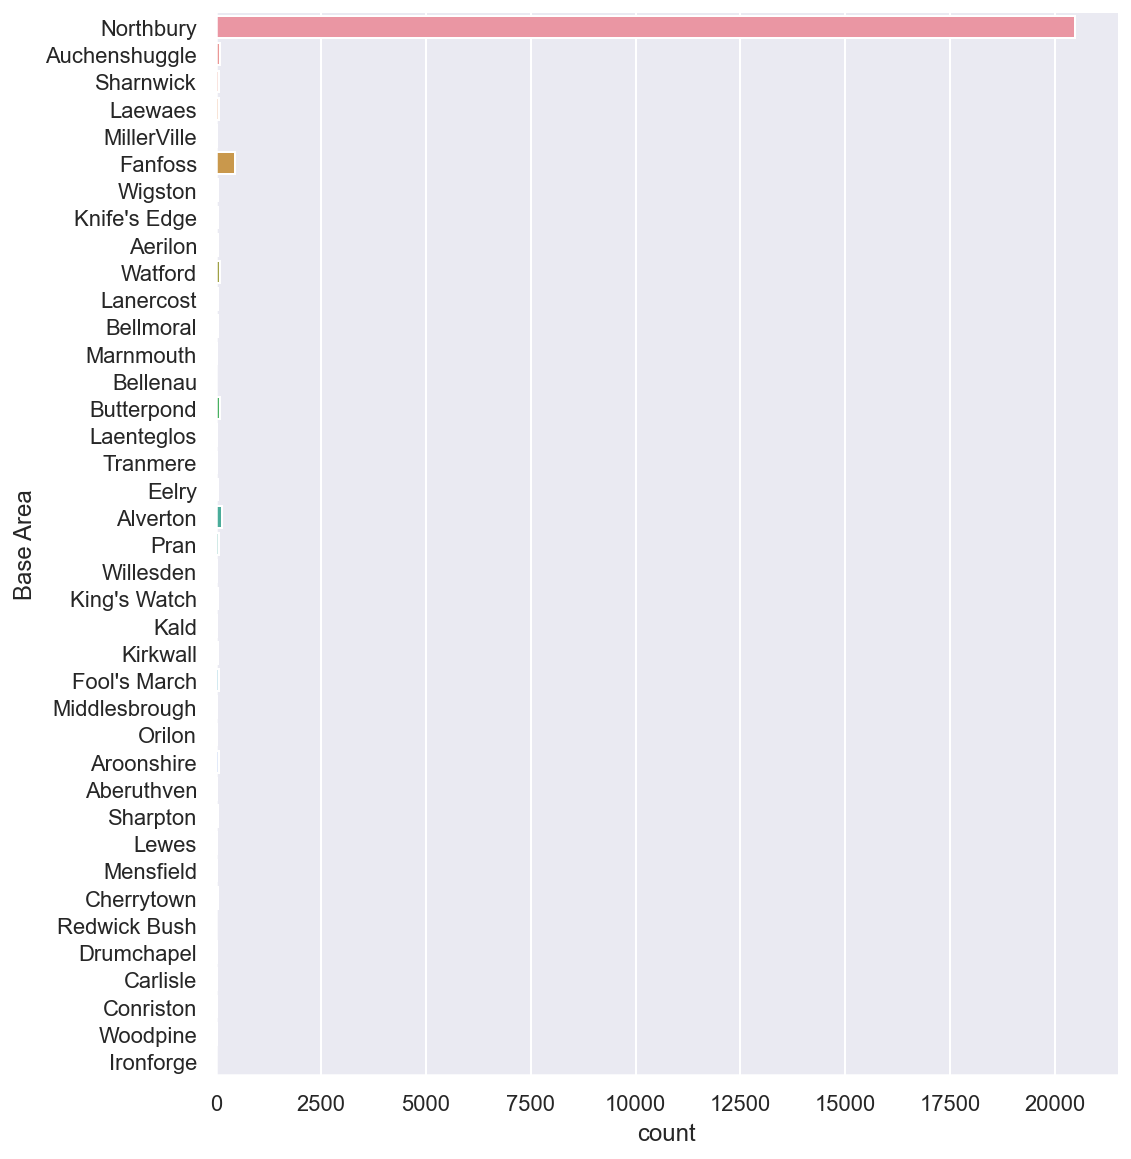

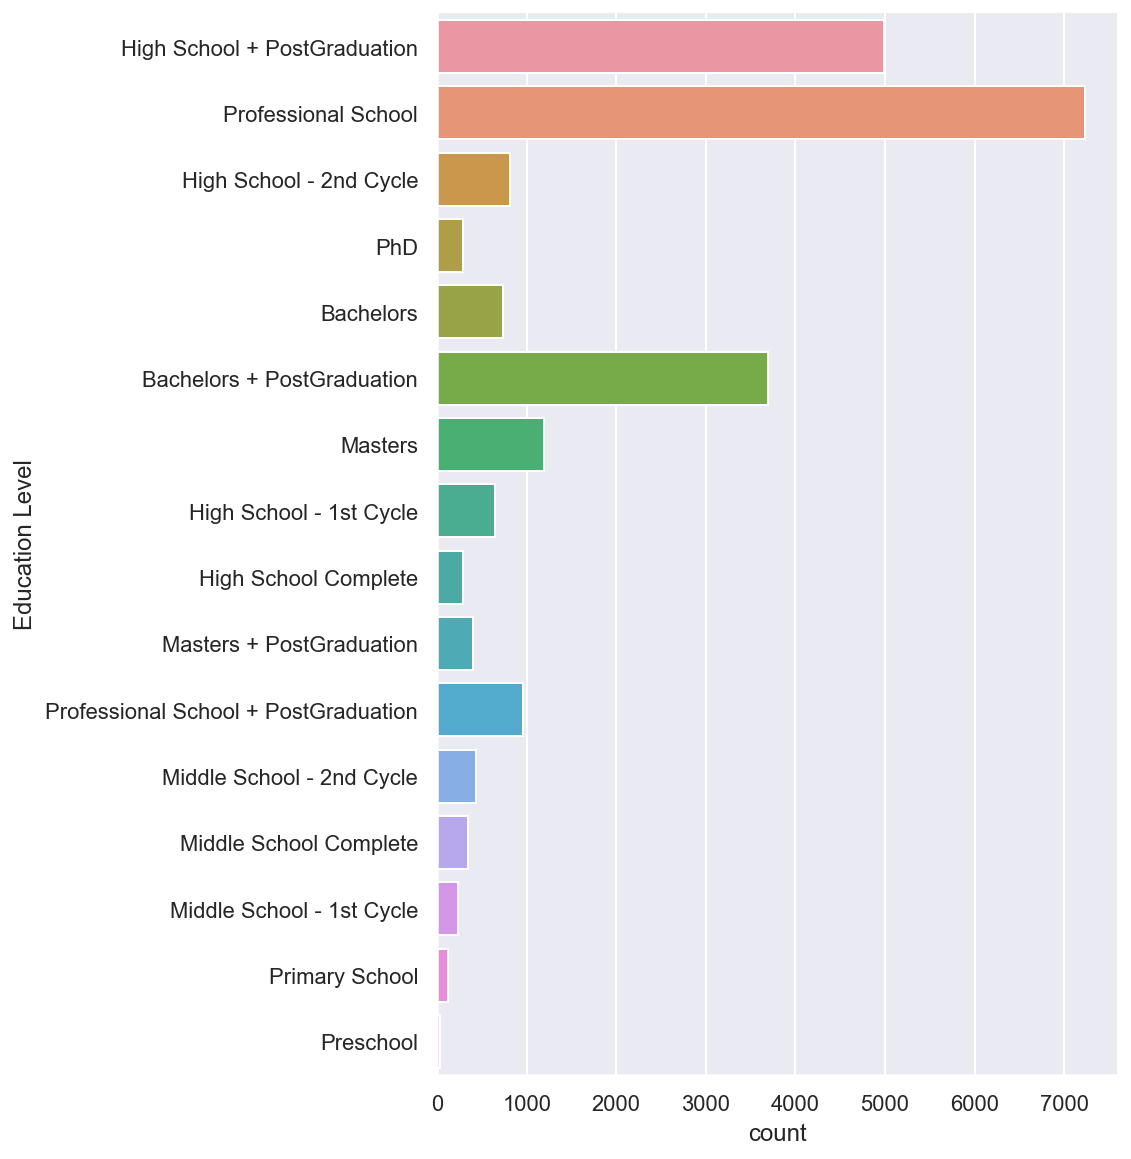

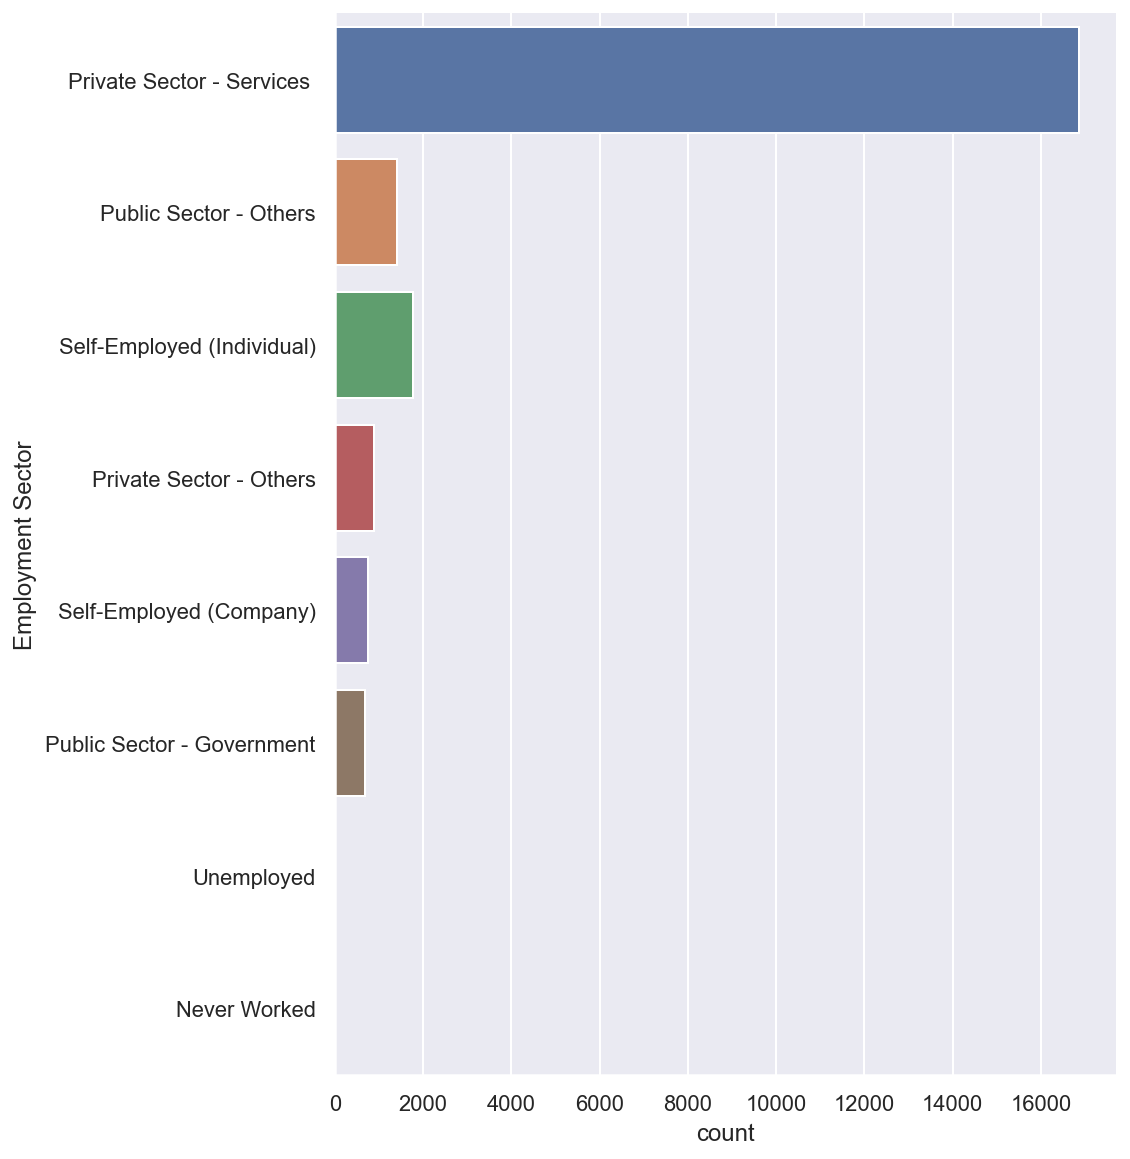

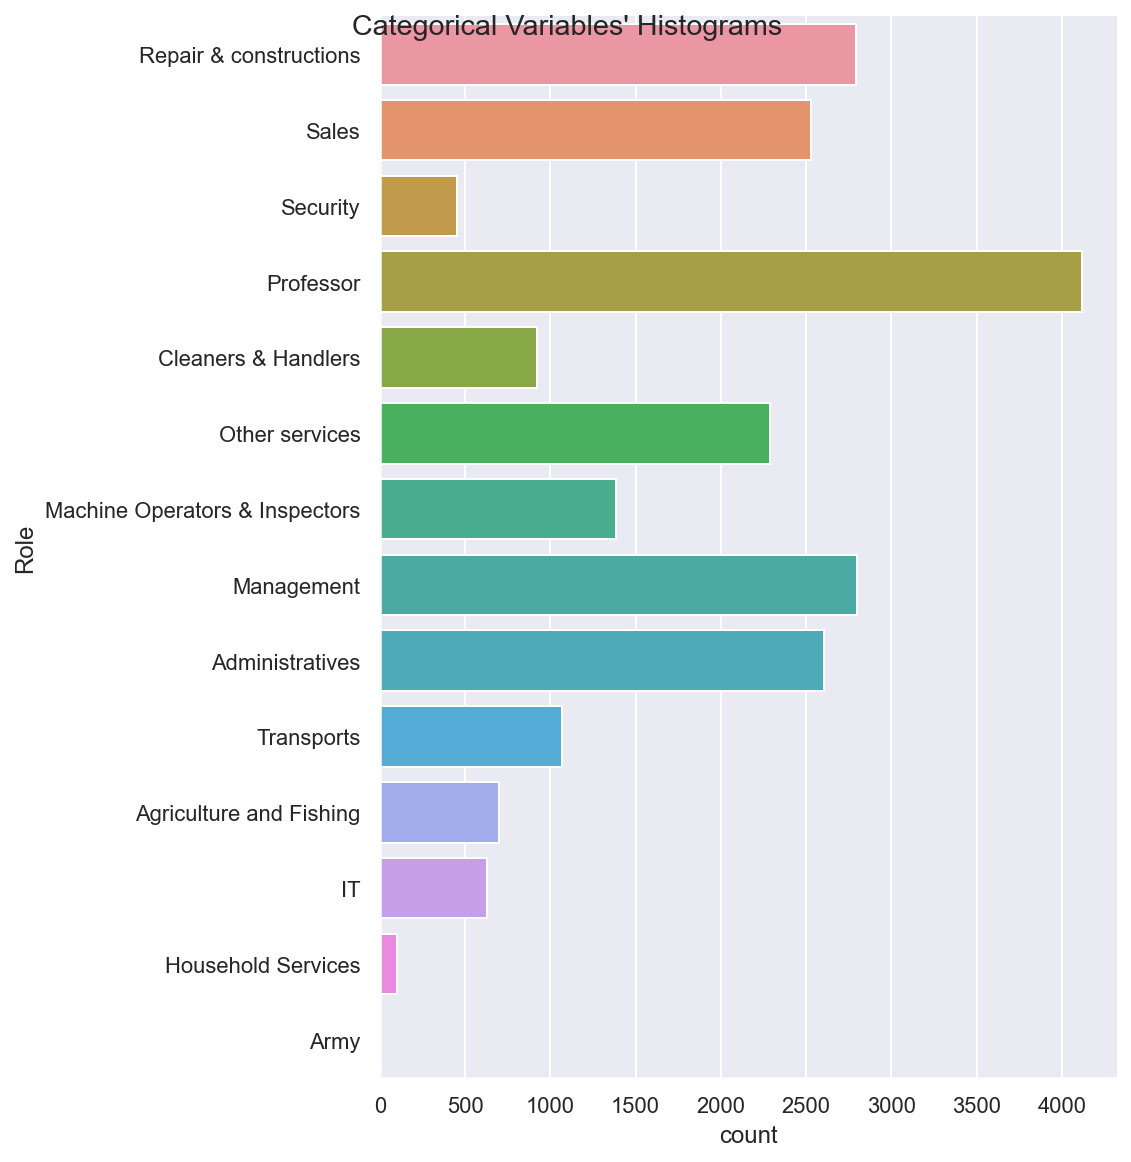

In [37]:
for i in range(len(cat_var_list)):
    sns.catplot(data=c_ya_train_copy,y=cat_var_list[i],kind="count",height=8, aspect=1)
    
title = "Categorical Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="NumVarDist">

## 6.2. Numeric Variables - Histograms

</a>

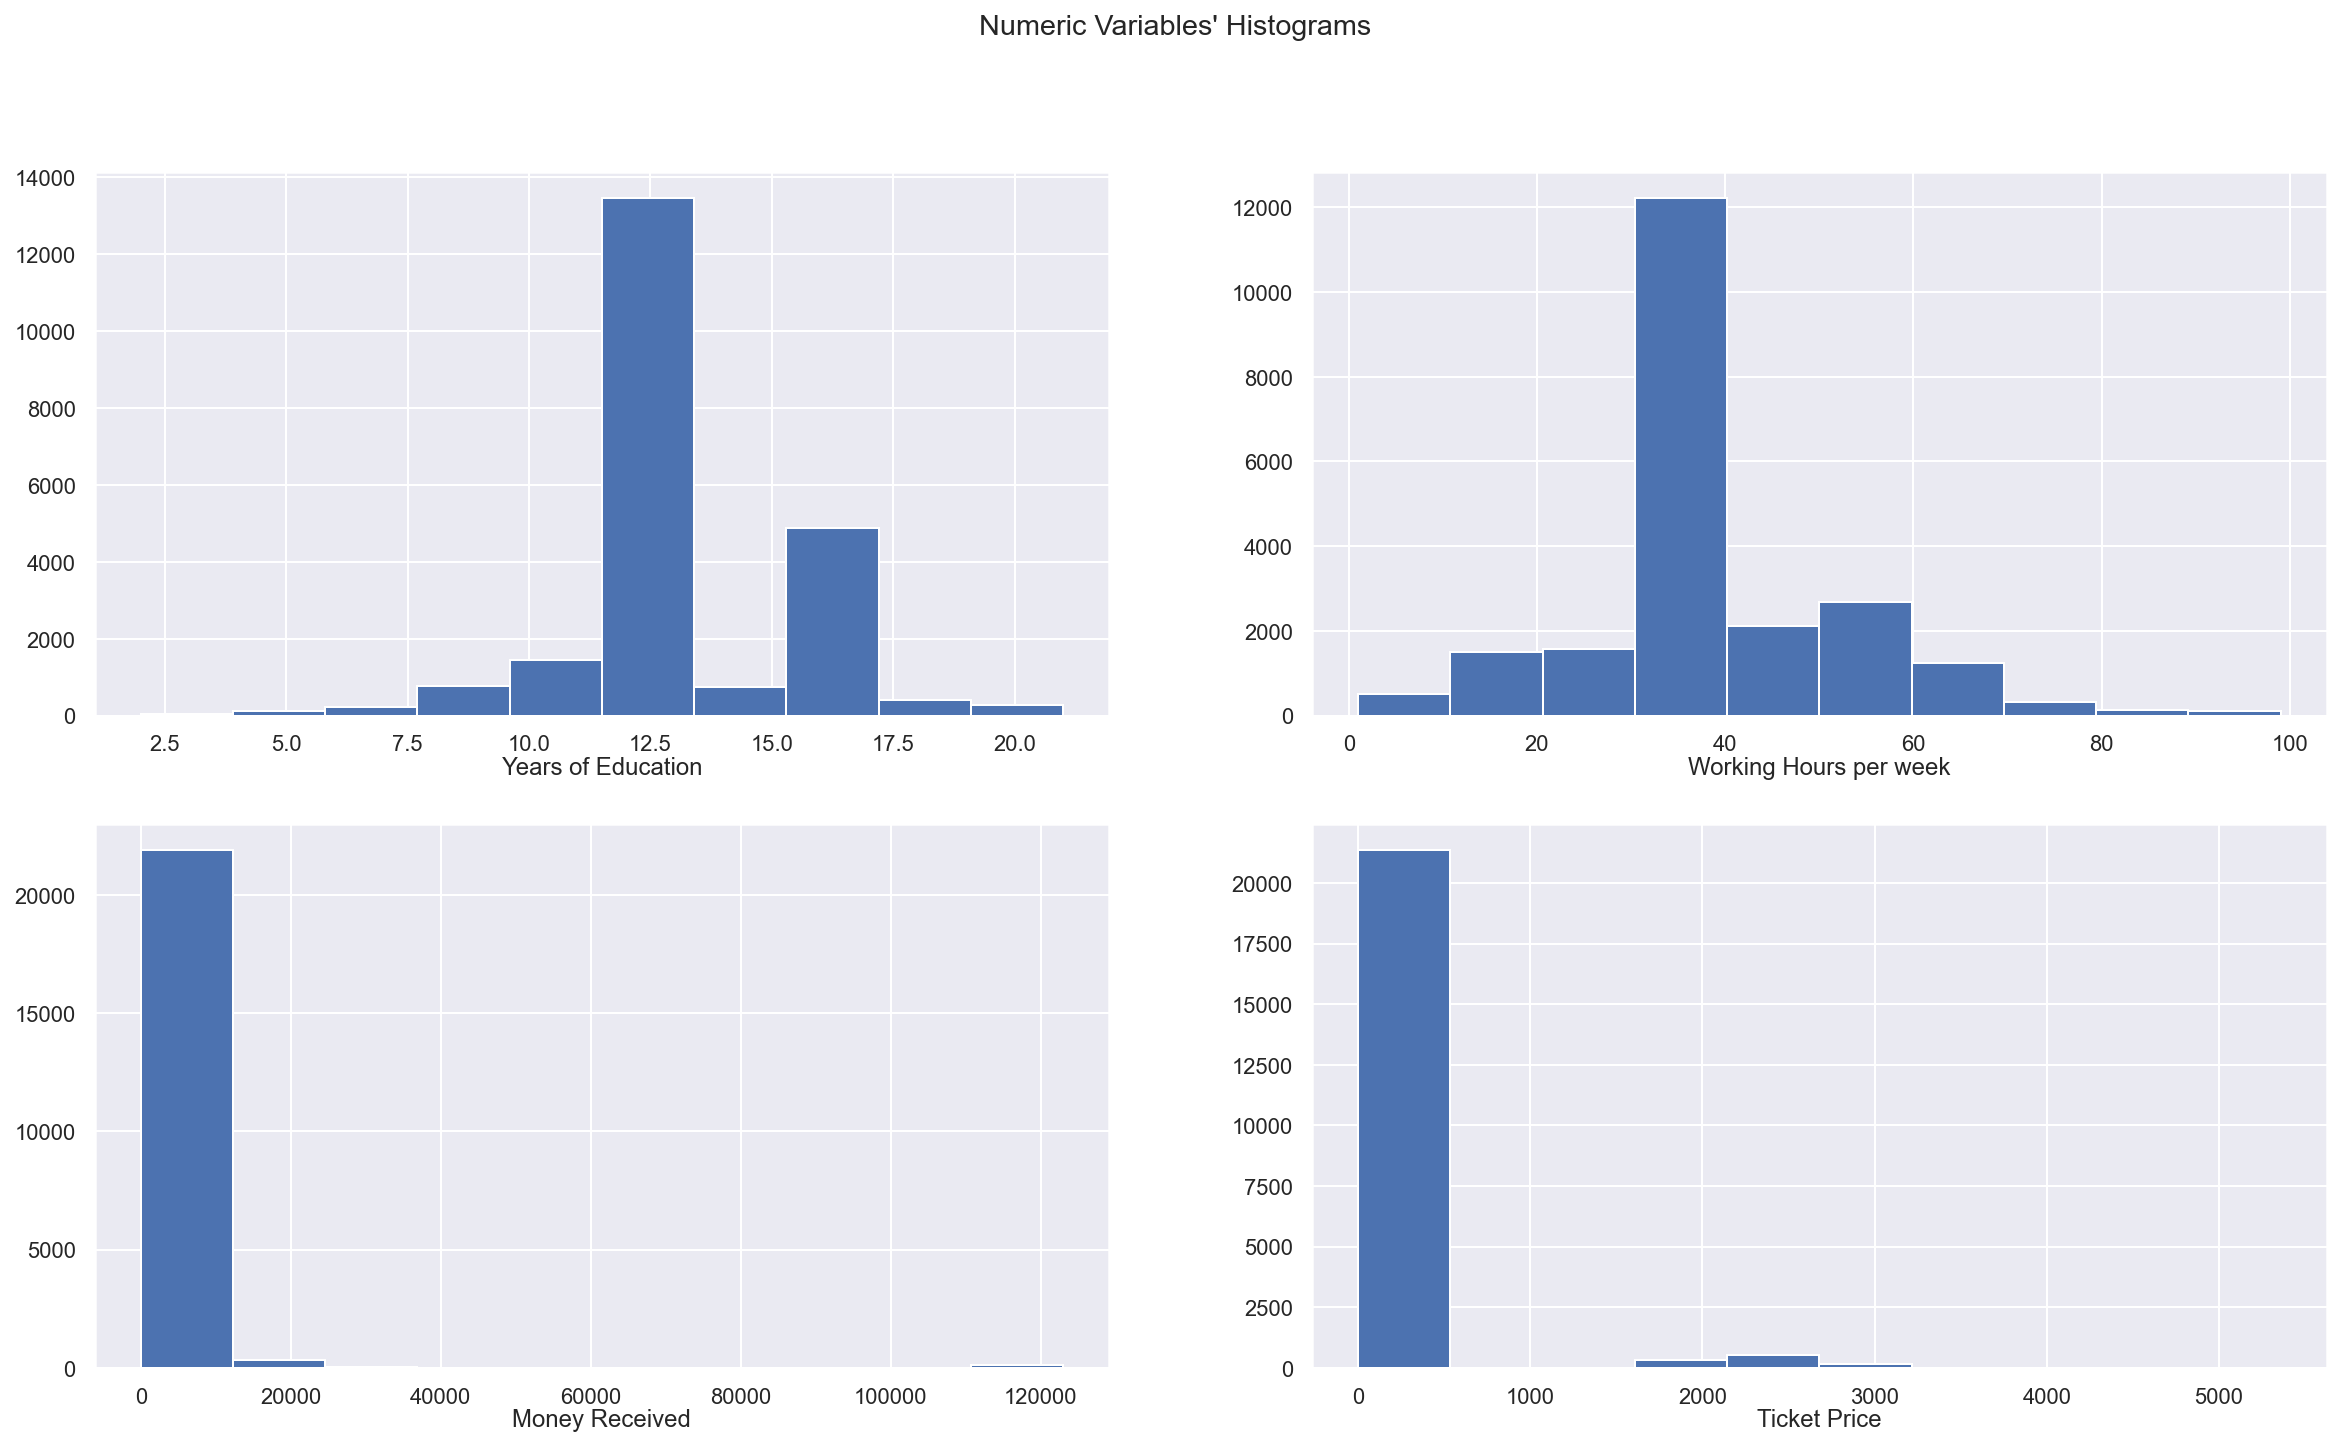

In [38]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(c_ya_train_copy[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="NumVarBox">

## 6.3. Numeric Variables - Boxplots

</a>

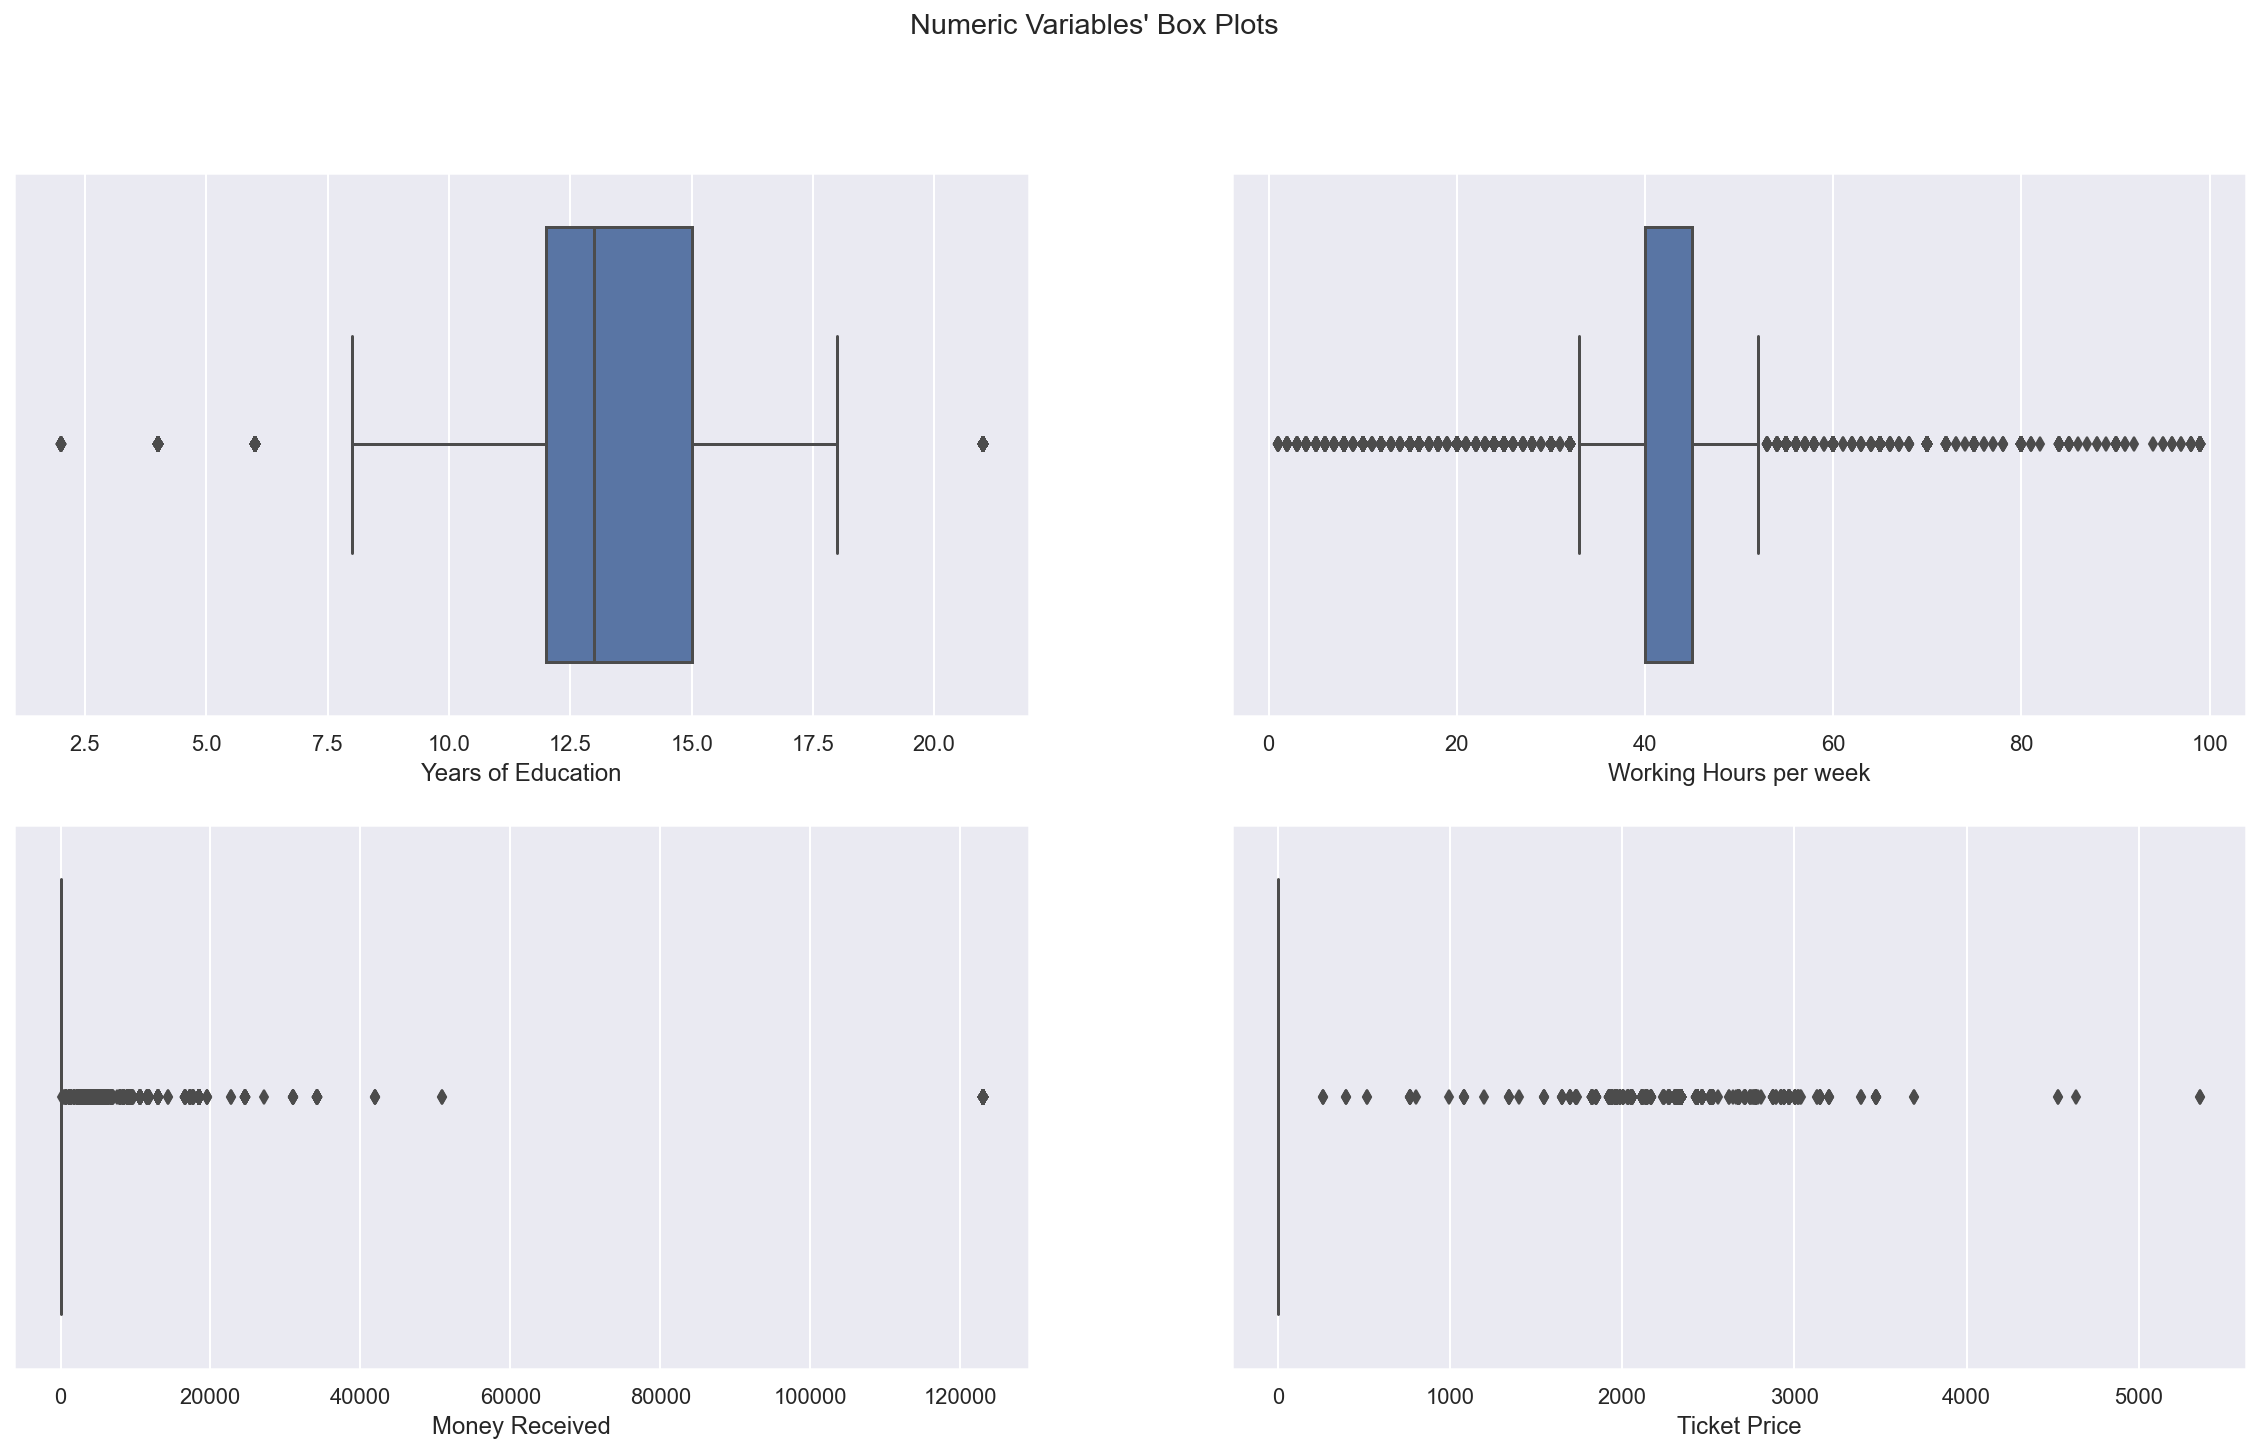

In [39]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(c_ya_train_copy[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="Check">
    
# 7. Coherence Checking
    
</a>

In [40]:
c_ya_train_copy.shape

(22400, 14)

In [41]:
c_ya_train_copy['Incoherent'] = 0

In [42]:
# we cannot have values in the money received and ticket price columns
c_ya_train_copy.loc[(c_ya_train_copy['Money Received'] != 0) & (c_ya_train_copy['Ticket Price'] != 0), 'Incoherent'] = 1

In [43]:
c_ya_train_copy['Incoherent'].value_counts()

0    22400
Name: Incoherent, dtype: int64

In [44]:
c_ya_train_copy.shape

(22400, 15)

In [45]:
# we cannot have a person that never worked with values in working hours
c_ya_train_copy.loc[(c_ya_train_copy['Employment Sector'] == "Never Worked") & (c_ya_train_copy['Working Hours per week'] != 0), 'Incoherent'] = 1

In [46]:
c_ya_train_copy['Incoherent'].value_counts()

0    22393
1        7
Name: Incoherent, dtype: int64

In [47]:
c_ya_train_copy.loc[(c_ya_train_copy['Incoherent'] == 1), 'Working Hours per week'] = 0

In [48]:
c_ya_train_copy.loc[c_ya_train_copy['Incoherent'] == 1]

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                     
13792          Mrs. Rebecca Short 2018-07-19           Africa        Married   
22674          Mr. Colin Ferguson 2031-07-18           Europe         Single   
23583            Miss Carol Scott 2030-09-06           Europe         Single   
24701       Mr. Nicholas Buckland 2030-10-04           Europe         Single   
27002           Mr. Evan Buckland 2030-01-06           Europe         Single   
32390           Mr. Adam McDonald 2028-01-09           Africa         Single   
33185          Mr. Piers Mitchell 2025-06-07           Europe       Divorced   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
13792            Husband  Northbury           Professional School   
22674           Children  Northbury       High School - 1st Cycle   
23583           Children  Northbury       High School - 2nd Cycle   
24701           Children  Northbury       High School - 1st Cycle   
27002           Children  Northbury  High School + PostGraduation   
32390           Children  Northbury  High School + PostGraduation   
33185       Other Family  Northbury     Middle School - 2nd Cycle   

            Years of Education Employment Sector       Role  \
CITIZEN_ID                                                    
13792                       12      Never Worked  Professor   
22674                       10      Never Worked  Professor   
23583                       11      Never Worked  Professor   
24701                       10      Never Worked  Professor   
27002                       13      Never Worked  Professor   
32390                       13      Never Worked  Professor   
33185                        8      Never Worked  Professor   

            Working Hours per week  Money Received  Ticket Price  Income  \
CITIZEN_ID                                                                 
13792                            0               0             0       0   
22674                            0               0             0       0   
23583                            0               0             0       0   
24701                            0               0             0       0   
27002                            0               0             0       0   
32390                            0               0             0       0   
33185                            0               0             0       0   

            Incoherent  
CITIZEN_ID              
13792                1  
22674                1  
23583                1  
24701                1  
27002                1  
32390                1  
33185                1

In [49]:
c_ya_train_copy['Incoherent'] = 0

In [50]:
c_ya_train_copy.shape

(22400, 15)

In [51]:
# We cannot have Employment Sector as Unemployed and have more than zero as working hours per week
c_ya_train_copy.loc[(c_ya_train_copy['Employment Sector'] == "Unemployed") & (c_ya_train_copy['Working Hours per week'] > 0), 'Incoherent'] = 1

In [52]:
c_ya_train_copy['Incoherent'].value_counts()

0    22388
1       12
Name: Incoherent, dtype: int64

In [53]:
c_ya_train_copy.loc[(c_ya_train_copy['Incoherent'] == 1), 'Working Hours per week'] = 0

In [54]:
c_ya_train_copy.loc[c_ya_train_copy['Incoherent'] == 1]

Name   Birthday Native Continent  \
CITIZEN_ID                                                        
12567                  Mr. Tim Hart 2026-03-02           Europe   
15572               Mr. Tim Simpson 2029-08-30           Europe   
16852              Mr. Austin James 1983-08-03           Europe   
17274                Mr. Neil Quinn 1981-08-22             Asia   
21062            Mrs. Diane Coleman 1983-06-11           Europe   
22741              Mr. David Greene 2029-02-22           Europe   
27493             Mr. Julian Graham 2027-10-04           Africa   
29340         Mr. Andrew Rutherford 2019-04-20           Europe   
33010                Mr. Blake Dyer 1976-02-02           Europe   
33412                Mr. Alan Grant 1986-07-19           Europe   
33618       Mrs. Carolyn Rutherford 1996-04-29           Europe   
33720        Mrs. Kimberly Johnston 1986-02-22           Europe   

           Marital Status Lives with  Base Area               Education Level  \
CITIZEN_ID                                                                      
12567              Single   Children  Northbury           Professional School   
15572              Single   Children  Northbury           Professional School   
16852             Married       Wife  Northbury           Professional School   
17274             Married       Wife   Alverton           Professional School   
21062               Widow      Alone  Northbury     Middle School - 2nd Cycle   
22741              Single   Children  Northbury           Professional School   
27493              Single   Children  Northbury           Professional School   
29340             Married   Children  Northbury  High School + PostGraduation   
33010             Married       Wife  Northbury           Professional School   
33412             Married       Wife  Northbury                     Bachelors   
33618             Married    Husband  Northbury           Professional School   
33720             Married    Husband  Northbury  High School + PostGraduation   

            Years of Education Employment Sector                     Role  \
CITIZEN_ID                                                                  
12567                       12        Unemployed      Cleaners & Handlers   
15572                       12        Unemployed  Agriculture and Fishing   
16852                       12        Unemployed               Transports   
17274                       12        Unemployed          Administratives   
21062                        8        Unemployed  Agriculture and Fishing   
22741                       12        Unemployed  Agriculture and Fishing   
27493                       12        Unemployed   Repair & constructions   
29340                       13        Unemployed  Agriculture and Fishing   
33010                       12        Unemployed           Other services   
33412                       15        Unemployed  Agriculture and Fishing   
33618                       12        Unemployed          Administratives   
33720                       13        Unemployed          Administratives   

            Working Hours per week  Money Received  Ticket Price  Income  \
CITIZEN_ID                                                                 
12567                            0            5432             0       0   
15572                            0               0             0       0   
16852                            0            2969             0       0   
17274                            0               0             0       0   
21062                            0               0             0       0   
22741                            0               0             0       0   
27493                            0               0             0       0   
29340                            0               0             0       0   
33010                            0               0             0       0   
33412                            0        

In [55]:
c_ya_train_copy['Incoherent'] = 0

In [56]:
c_ya_train_copy.shape

(22400, 15)

In [57]:
c_ya_train_copy = c_ya_train_copy.drop(columns=['Incoherent'])

<hr>
<a class="anchor" id="TransformVar">
    
# 8. Transform Variables
    
</a>

In [58]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                   
12486       Repair & constructions                      40               0   
12487       Repair & constructions                      40               0   
12488                        Sales                      46               0   
12489                     Security                      37            5395   
12490                    Professor                      45               0   

            Ticket Price  Income  
CITIZEN_ID                        
12486               2273       1  
12487                  0       1  
12488               2321       1  
12489                  0       1  
12490                  0       1

In [59]:
# Age - the age of the citizen represented by 2048 - year of birth

c_ya_train_copy['Age'] = (2048 - pd.DatetimeIndex(c_ya_train_copy['Birthday']).year)
c_ya_test_copy['Age'] = (2048 - pd.DatetimeIndex(c_ya_test_copy['Birthday']).year)

In [60]:
c_ya_train_copy['Age']

CITIZEN_ID
12486    45
12487    42
12488    39
12489    63
12490    33
         ..
34881    25
34882    23
34883    26
34884    37
34885    22
Name: Age, Length: 22400, dtype: int64

In [61]:
c_ya_test_copy['Age']

CITIZEN_ID
34886    36
34887    34
34888    28
34889    32
34890    37
         ..
44981    36
44982    48
44983    26
44984    24
44985    55
Name: Age, Length: 10100, dtype: int64

In [62]:
# Children - if a person has children or not (binary variable)

c_ya_train_copy['Children'] = (c_ya_train_copy['Lives with'] == 'Children').astype(int)
c_ya_test_copy['Children'] = (c_ya_test_copy['Lives with'] == 'Children').astype(int)

In [63]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                   
12486       Repair & constructions                      40               0   
12487       Repair & constructions                      40               0   
12488                        Sales                      46               0   
12489                     Security                      37            5395   
12490                    Professor                      45               0   

            Ticket Price  Income  Age  Children  
CITIZEN_ID                                       
12486               2273       1   45         0  
12487                  0       1   42         0  
12488               2321       1   39         0  
12489                  0       1   63         0  
12490                  0       1   33         0

In [64]:
c_ya_test_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
34886             Mr. Dan Kerr 2012-05-13           Europe        Married   
34887        Miss Olivia Grant 2014-08-09           Europe         Single   
34888       Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889          Mr. David Clark 2016-04-15           Europe        Married   
34890        Mr. Gavin Lambert 2011-04-22           Europe        Married   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   

            Years of Education           Employment Sector        Role  \
CITIZEN_ID                                                               
34886                       16  Private Sector - Services        Sales   
34887                       16  Private Sector - Services    Professor   
34888                       13  Private Sector - Services   Management   
34889                       12  Private Sector - Services    Professor   
34890                       15      Public Sector - Others   Professor   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
34886                           40               0             0   36   
34887                           36               0             0   34   
34888                           50           12940             0   28   
34889                           48               0          1827   32   
34890                           45               0             0   37   

            Children  
CITIZEN_ID            
34886              0  
34887              0  
34888              0  
34889              0  
34890              0

In [65]:
# GroupA - if the citizen belongs to Group A (volunteers)

c_ya_train_copy['GroupA'] = ((c_ya_train_copy['Money Received'] == 0) & (c_ya_train_copy['Ticket Price'] == 0)).astype(int)
c_ya_test_copy['GroupA'] = ((c_ya_test_copy['Money Received'] == 0) & (c_ya_test_copy['Ticket Price'] == 0)).astype(int)

In [66]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                   
12486       Repair & constructions                      40               0   
12487       Repair & constructions                      40               0   
12488                        Sales                      46               0   
12489                     Security                      37            5395   
12490                    Professor                      45               0   

            Ticket Price  Income  Age  Children  GroupA  
CITIZEN_ID                                               
12486               2273       1   45         0       0  
12487                  0       1   42         0       1  
12488               2321       1   39         0       0  
12489                  0       1   63         0       0  
12490                  0       1   33         0       1

In [67]:
c_ya_test_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
34886             Mr. Dan Kerr 2012-05-13           Europe        Married   
34887        Miss Olivia Grant 2014-08-09           Europe         Single   
34888       Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889          Mr. David Clark 2016-04-15           Europe        Married   
34890        Mr. Gavin Lambert 2011-04-22           Europe        Married   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   

            Years of Education           Employment Sector        Role  \
CITIZEN_ID                                                               
34886                       16  Private Sector - Services        Sales   
34887                       16  Private Sector - Services    Professor   
34888                       13  Private Sector - Services   Management   
34889                       12  Private Sector - Services    Professor   
34890                       15      Public Sector - Others   Professor   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
34886                           40               0             0   36   
34887                           36               0             0   34   
34888                           50           12940             0   28   
34889                           48               0          1827   32   
34890                           45               0             0   37   

            Children  GroupA  
CITIZEN_ID                    
34886              0       1  
34887              0       1  
34888              0       0  
34889              0       0  
34890              0       1

In [68]:
# GroupB - if the citizen belongs to Group B (were payed to participate)
c_ya_train_copy['GroupB'] = ((c_ya_train_copy['Money Received'] > 0) & (c_ya_train_copy['Ticket Price'] == 0)).astype(int)
c_ya_test_copy['GroupB'] = ((c_ya_test_copy['Money Received'] > 0) & (c_ya_test_copy['Ticket Price'] == 0)).astype(int)

In [69]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                   
12486       Repair & constructions                      40               0   
12487       Repair & constructions                      40               0   
12488                        Sales                      46               0   
12489                     Security                      37            5395   
12490                    Professor                      45               0   

            Ticket Price  Income  Age  Children  GroupA  GroupB  
CITIZEN_ID                                                       
12486               2273       1   45         0       0       0  
12487                  0       1   42         0       1       0  
12488               2321       1   39         0       0       0  
12489                  0       1   63         0       0       1  
12490                  0       1   33         0       1       0

In [70]:
c_ya_test_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
34886             Mr. Dan Kerr 2012-05-13           Europe        Married   
34887        Miss Olivia Grant 2014-08-09           Europe         Single   
34888       Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889          Mr. David Clark 2016-04-15           Europe        Married   
34890        Mr. Gavin Lambert 2011-04-22           Europe        Married   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   

            Years of Education           Employment Sector        Role  \
CITIZEN_ID                                                               
34886                       16  Private Sector - Services        Sales   
34887                       16  Private Sector - Services    Professor   
34888                       13  Private Sector - Services   Management   
34889                       12  Private Sector - Services    Professor   
34890                       15      Public Sector - Others   Professor   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
34886                           40               0             0   36   
34887                           36               0             0   34   
34888                           50           12940             0   28   
34889                           48               0          1827   32   
34890                           45               0             0   37   

            Children  GroupA  GroupB  
CITIZEN_ID                            
34886              0       1       0  
34887              0       1       0  
34888              0       0       1  
34889              0       0       0  
34890              0       1       0

In [71]:
# GroupC - if the citizen belongs to Group C (made a money offer)
c_ya_train_copy['GroupC'] = ((c_ya_train_copy['Money Received'] == 0) & (c_ya_train_copy['Ticket Price'] > 0)).astype(int)
c_ya_test_copy['GroupC'] = ((c_ya_test_copy['Money Received'] == 0) & (c_ya_test_copy['Ticket Price'] > 0)).astype(int)

In [72]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  Working Hours per week  Money Received  \
CITIZEN_ID                                                                   
12486       Repair & constructions                      40               0   
12487       Repair & constructions                      40               0   
12488                        Sales                      46               0   
12489                     Security                      37            5395   
12490                    Professor                      45               0   

            Ticket Price  Income  Age  Children  GroupA  GroupB  GroupC  
CITIZEN_ID                                                               
12486               2273       1   45         0       0       0       1  
12487                  0       1   42         0       1       0       0  
12488               2321       1   39         0       0       0       1  
12489                  0       1   63         0       0       1       0  
12490                  0       1   33         0       1       0       0

In [73]:
c_ya_test_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
34886             Mr. Dan Kerr 2012-05-13           Europe        Married   
34887        Miss Olivia Grant 2014-08-09           Europe         Single   
34888       Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889          Mr. David Clark 2016-04-15           Europe        Married   
34890        Mr. Gavin Lambert 2011-04-22           Europe        Married   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   

            Years of Education           Employment Sector        Role  \
CITIZEN_ID                                                               
34886                       16  Private Sector - Services        Sales   
34887                       16  Private Sector - Services    Professor   
34888                       13  Private Sector - Services   Management   
34889                       12  Private Sector - Services    Professor   
34890                       15      Public Sector - Others   Professor   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
34886                           40               0             0   36   
34887                           36               0             0   34   
34888                           50           12940             0   28   
34889                           48               0          1827   32   
34890                           45               0             0   37   

            Children  GroupA  GroupB  GroupC  
CITIZEN_ID                                    
34886              0       1       0       0  
34887              0       1       0       0  
34888              0       0       1       0  
34889              0       0       0       1  
34890              0       1       0       0

In [74]:
# Unemployed - binary variable that states whether a citizen is unemployed
c_ya_train_copy['Unemployed'] = (c_ya_train_copy['Employment Sector'] == 'Unemployed').astype(int)
c_ya_test_copy['Unemployed'] = (c_ya_test_copy['Employment Sector'] == 'Unemployed').astype(int)

In [75]:
c_ya_train_copy.loc[c_ya_train_copy['Unemployed'] == 1]

Name   Birthday Native Continent  \
CITIZEN_ID                                                        
12567                  Mr. Tim Hart 2026-03-02           Europe   
15572               Mr. Tim Simpson 2029-08-30           Europe   
16852              Mr. Austin James 1983-08-03           Europe   
17274                Mr. Neil Quinn 1981-08-22             Asia   
21062            Mrs. Diane Coleman 1983-06-11           Europe   
22741              Mr. David Greene 2029-02-22           Europe   
27493             Mr. Julian Graham 2027-10-04           Africa   
29340         Mr. Andrew Rutherford 2019-04-20           Europe   
33010                Mr. Blake Dyer 1976-02-02           Europe   
33412                Mr. Alan Grant 1986-07-19           Europe   
33618       Mrs. Carolyn Rutherford 1996-04-29           Europe   
33720        Mrs. Kimberly Johnston 1986-02-22           Europe   

           Marital Status Lives with  Base Area               Education Level  \
CITIZEN_ID                                                                      
12567              Single   Children  Northbury           Professional School   
15572              Single   Children  Northbury           Professional School   
16852             Married       Wife  Northbury           Professional School   
17274             Married       Wife   Alverton           Professional School   
21062               Widow      Alone  Northbury     Middle School - 2nd Cycle   
22741              Single   Children  Northbury           Professional School   
27493              Single   Children  Northbury           Professional School   
29340             Married   Children  Northbury  High School + PostGraduation   
33010             Married       Wife  Northbury           Professional School   
33412             Married       Wife  Northbury                     Bachelors   
33618             Married    Husband  Northbury           Professional School   
33720             Married    Husband  Northbury  High School + PostGraduation   

            Years of Education Employment Sector                     Role  \
CITIZEN_ID                                                                  
12567                       12        Unemployed      Cleaners & Handlers   
15572                       12        Unemployed  Agriculture and Fishing   
16852                       12        Unemployed               Transports   
17274                       12        Unemployed          Administratives   
21062                        8        Unemployed  Agriculture and Fishing   
22741                       12        Unemployed  Agriculture and Fishing   
27493                       12        Unemployed   Repair & constructions   
29340                       13        Unemployed  Agriculture and Fishing   
33010                       12        Unemployed           Other services   
33412                       15        Unemployed  Agriculture and Fishing   
33618                       12        Unemployed          Administratives   
33720                       13        Unemployed          Administratives   

            Working Hours per week  Money Received  Ticket Price  Income  Age  \
CITIZEN_ID                                                                      
12567                            0            5432             0       0   22   
15572                            0               0             0       0   19   
16852                            0            2969             0       0   65   
17274                            0               0             0       0   67   
21062                            0               0             0       0   65   
22741                            0               0             0       0   19   
27493                            0               0             0       0   21   
29340                            0               0             0       0   29   
33010                            0               0             0    

In [76]:
c_ya_test_copy.loc[c_ya_test_copy['Unemployed'] == 1]

Name   Birthday Native Continent  \
CITIZEN_ID                                                      
38738        Mrs. Katherine Sharp 1980-07-22           Europe   
39752       Mrs. Katherine Newman 2002-07-29           Europe   

                      Marital Status Lives with  Base Area  \
CITIZEN_ID                                                   
38738       Married - Spouse Missing      Alone  Northbury   
39752                        Married    Husband  Northbury   

                         Education Level  Years of Education  \
CITIZEN_ID                                                     
38738       High School + PostGraduation                  13   
39752                Professional School                  12   

           Employment Sector                            Role  \
CITIZEN_ID                                                     
38738             Unemployed         Agriculture and Fishing   
39752             Unemployed  Machine Operators & Inspectors   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
38738                           25               0             0   68   
39752                           25               0             0   46   

            Children  GroupA  GroupB  GroupC  Unemployed  
CITIZEN_ID                                                
38738              0       1       0       0           1  
39752              0       1       0       0           1

In [77]:
# HigherEduc - binary variable (1 - if citizen has higher education; 0 - if citizen does not have higher education)
c_ya_train_copy['HigherEduc'] = (c_ya_train_copy['Education Level'].str.contains('PhD|Masters|PostGraduation|Bachelors')).astype(int)
c_ya_test_copy['HigherEduc'] = (c_ya_test_copy['Education Level'].str.contains('PhD|Masters|PostGraduation|Bachelors')).astype(int)

In [78]:
c_ya_train_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
12486            Mr. Adam Glover 2003-07-01           Europe        Married   
12487       Mr. Cameron McDonald 2006-01-25           Europe        Married   
12488         Mr. Keith Davidson 2009-05-10           Europe        Married   
12489         Mr. Alexander Gill 1985-03-25           Europe        Married   
12490             Mr. Neil Piper 2015-05-29           Europe         Single   

              Lives with  Base Area               Education Level  \
CITIZEN_ID                                                          
12486               Wife  Northbury  High School + PostGraduation   
12487               Wife  Northbury           Professional School   
12488               Wife  Northbury           Professional School   
12489               Wife  Northbury       High School - 2nd Cycle   
12490       Other Family  Northbury                           PhD   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12486                       13  Private Sector - Services    
12487                       12      Public Sector - Others   
12488                       12  Private Sector - Services    
12489                       11  Private Sector - Services    
12490                       21  Self-Employed (Individual)   

                              Role  ...  Money Received  Ticket Price  Income  \
CITIZEN_ID                          ...                                         
12486       Repair & constructions  ...               0          2273       1   
12487       Repair & constructions  ...               0             0       1   
12488                        Sales  ...               0          2321       1   
12489                     Security  ...            5395             0       1   
12490                    Professor  ...               0             0       1   

            Age  Children  GroupA  GroupB  GroupC  Unemployed  HigherEduc  
CITIZEN_ID                                                                 
12486        45         0       0       0       1           0           1  
12487        42         0       1       0       0           0           0  
12488        39         0       0       0       1           0           0  
12489        63         0       0       1       0           0           0  
12490        33         0       1       0       0           0           1  

[5 rows x 21 columns]

In [79]:
c_ya_test_copy.head()

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
34886             Mr. Dan Kerr 2012-05-13           Europe        Married   
34887        Miss Olivia Grant 2014-08-09           Europe         Single   
34888       Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889          Mr. David Clark 2016-04-15           Europe        Married   
34890        Mr. Gavin Lambert 2011-04-22           Europe        Married   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   

            Years of Education           Employment Sector        Role  \
CITIZEN_ID                                                               
34886                       16  Private Sector - Services        Sales   
34887                       16  Private Sector - Services    Professor   
34888                       13  Private Sector - Services   Management   
34889                       12  Private Sector - Services    Professor   
34890                       15      Public Sector - Others   Professor   

            Working Hours per week  Money Received  Ticket Price  Age  \
CITIZEN_ID                                                              
34886                           40               0             0   36   
34887                           36               0             0   34   
34888                           50           12940             0   28   
34889                           48               0          1827   32   
34890                           45               0             0   37   

            Children  GroupA  GroupB  GroupC  Unemployed  HigherEduc  
CITIZEN_ID                                                            
34886              0       1       0       0           0           1  
34887              0       1       0       0           0           1  
34888              0       0       1       0           0           1  
34889              0       0       0       1           0           0  
34890              0       1       0       0           0           1

In [80]:
c_ya_train_copy['Name'].str[:5].unique()

array(['Mr. A', 'Mr. C', 'Mr. K', 'Mr. N', 'Mr. L', 'Miss ', 'Mr. F',
       'Mr. P', 'Mr. B', 'Mr. S', 'Mr. I', 'Mrs. ', 'Mr. H', 'Mr. D',
       'Mr. J', 'Mr. E', 'Mr. W', 'Mr. G', 'Mr. O', 'Mr. M', 'Mr. T',
       'Mr. R', 'Mr. V'], dtype=object)

In [81]:
c_ya_test_copy['Name'].str[:5].unique()

array(['Mr. D', 'Miss ', 'Mr. T', 'Mr. G', 'Mr. J', 'Mrs. ', 'Mr. B',
       'Mr. A', 'Mr. C', 'Mr. L', 'Mr. K', 'Mr. F', 'Mr. W', 'Mr. P',
       'Mr. S', 'Mr. N', 'Mr. I', 'Mr. E', 'Mr. M', 'Mr. O', 'Mr. R',
       'Mr. H', 'Mr. V'], dtype=object)

In [82]:
# Female - dummy variable (1 - citizen is female; 0 - citizen is male)
c_ya_train_copy['Female'] = (c_ya_train_copy['Name'].str.contains('Miss|Mrs')).astype(int)
c_ya_test_copy['Female'] = (c_ya_test_copy['Name'].str.contains('Miss|Mrs')).astype(int)

In [83]:
c_ya_train_copy.head(10)

Name   Birthday Native Continent  \
CITIZEN_ID                                                      
12486             Mr. Adam Glover 2003-07-01           Europe   
12487        Mr. Cameron McDonald 2006-01-25           Europe   
12488          Mr. Keith Davidson 2009-05-10           Europe   
12489          Mr. Alexander Gill 1985-03-25           Europe   
12490              Mr. Neil Piper 2015-05-29           Europe   
12491            Mr. Adrian Walsh 2024-09-01           Europe   
12492              Mr. Carl Baker 2012-03-31           Europe   
12493           Mr. Liam Hemmings 2011-07-11           Europe   
12494       Miss Alexandra Tucker 2024-09-24           Europe   
12495           Mr. Frank Coleman 2019-07-26           Africa   

                      Marital Status       Lives with      Base Area  \
CITIZEN_ID                                                             
12486                        Married             Wife      Northbury   
12487                        Married             Wife      Northbury   
12488                        Married             Wife      Northbury   
12489                        Married             Wife      Northbury   
12490                         Single     Other Family      Northbury   
12491                         Single         Children      Northbury   
12492                        Married             Wife      Northbury   
12493       Married - Spouse Missing  Other relatives  Auchenshuggle   
12494                         Single         Children      Northbury   
12495                         Single     Other Family      Northbury   

                         Education Level  Years of Education  \
CITIZEN_ID                                                     
12486       High School + PostGraduation                  13   
12487                Professional School                  12   
12488                Professional School                  12   
12489            High School - 2nd Cycle                  11   
12490                                PhD                  21   
12491                          Bachelors                  15   
12492                Professional School                  12   
12493            High School - 2nd Cycle                  11   
12494       High School + PostGraduation                  13   
12495         Bachelors + PostGraduation                  16   

                     Employment Sector                            Role  ...  \
CITIZEN_ID                                                              ...   
12486       Private Sector - Services           Repair & constructions  ...   
12487           Public Sector - Others          Repair & constructions  ...   
12488       Private Sector - Services                            Sales  ...   
12489       Private Sector - Services                         Security  ...   
12490       Self-Employed (Individual)                       Professor  ...   
12491       Private Sector - Services              Cleaners & Handlers  ...   
12492       Private Sector - Services           Repair & constructions  ...   
12493       Private Sector - Services                   Other services  ...   
12494          Private Sector - Others  Machine Operators & Inspectors  ...   
12495       Private Sector - Services                        Professor  ...   

            Ticket Price  Income  Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                                
12486               2273       1   45         0       0       0       1   
12487                  0       1   42         0       1       0       0   
12488               2321       1   39         0       0       0       1   
12489                  0       1   63         0       0       1       0   
12490                  0       1   33         0       1       0       0   
12491                  0       0   24         1       1       0       0   
12492                  0       1   36         0       0       1  

In [84]:
c_ya_test_copy.head(10)

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                    
34886               Mr. Dan Kerr 2012-05-13           Europe        Married   
34887          Miss Olivia Grant 2014-08-09           Europe         Single   
34888         Mr. Trevor Simpson 2020-05-23           Europe       Divorced   
34889            Mr. David Clark 2016-04-15           Europe        Married   
34890          Mr. Gavin Lambert 2011-04-22           Europe        Married   
34891          Mr. Jack Johnston 2028-06-21           Europe         Single   
34892             Mrs. Joan Bond 2012-07-10           Europe        Married   
34893          Miss Joanne Ogden 2022-05-31           Europe         Single   
34894          Miss Carol Newman 2013-03-08           Africa         Single   
34895       Miss Gabrielle Smith 2008-08-09           Europe         Single   

              Lives with  Base Area                       Education Level  \
CITIZEN_ID                                                                  
34886               Wife  Northbury            Bachelors + PostGraduation   
34887       Other Family  Northbury            Bachelors + PostGraduation   
34888       Other Family  Northbury  Professional School + PostGraduation   
34889               Wife  Northbury                   Professional School   
34890               Wife    Watford                             Bachelors   
34891       Other Family  Northbury                   Professional School   
34892            Husband  Northbury                               Masters   
34893       Other Family  Northbury            Bachelors + PostGraduation   
34894       Other Family  Northbury          High School + PostGraduation   
34895              Alone  Northbury            Bachelors + PostGraduation   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
34886                       16  Private Sector - Services    
34887                       16  Private Sector - Services    
34888                       13  Private Sector - Services    
34889                       12  Private Sector - Services    
34890                       15      Public Sector - Others   
34891                       12  Private Sector - Services    
34892                       17  Private Sector - Services    
34893                       16  Private Sector - Services    
34894                       13  Private Sector - Services    
34895                       16      Public Sector - Others   

                                      Role  ...  Money Received  Ticket Price  \
CITIZEN_ID                                  ...                                 
34886                                Sales  ...               0             0   
34887                            Professor  ...               0             0   
34888                           Management  ...           12940             0   
34889                            Professor  ...               0          1827   
34890                            Professor  ...               0             0   
34891       Machine Operators & Inspectors  ...               0             0   
34892                            Professor  ...               0          2432   
34893                           Management  ...               0             0   
34894       Machine Operators & Inspectors  ...               0             0   
34895                            Professor  ...               0             0   

            Age  Children  GroupA  GroupB  GroupC  Unemployed  HigherEduc  \
CITIZEN_ID                                                                  
34886        36         0       1       0       0           0           1   
34887        34         0       1       0       0           0           1   
34888        28         0       0       1       0           0           1   
34889        32         0       0       0       1  

In [85]:
# Number of males(0) and females(1) in the dataset; there are more men
print(c_ya_train_copy['Female'].value_counts())

0    14971
1     7429
Name: Female, dtype: int64


In [86]:
# Number of males(0) and females(1) in the dataset; there are more men
print(c_ya_test_copy['Female'].value_counts())

0    6778
1    3322
Name: Female, dtype: int64


<hr>
<a class="anchor" id="CheckAge">
    
# 9. Coherence Checking - Age
    
</a>

In [87]:
c_ya_train_copy.shape

(22400, 22)

In [88]:
# we only want people with more than 17 years

In [89]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 17].count()

Name                      272
Birthday                  272
Native Continent          272
Marital Status            272
Lives with                272
Base Area                 272
Education Level           272
Years of Education        272
Employment Sector         272
Role                      272
Working Hours per week    272
Money Received            272
Ticket Price              272
Income                    272
Age                       272
Children                  272
GroupA                    272
GroupB                    272
GroupC                    272
Unemployed                272
HigherEduc                272
Female                    272
dtype: int64

In [90]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 17, 'Age'] = 18

In [91]:
c_ya_train_copy.loc[c_ya_train_copy["Age"] == 18]

Name   Birthday Native Continent Marital Status  \
CITIZEN_ID                                                                  
12616         Mr. Kevin Tucker 2031-07-13           Europe         Single   
12628        Miss Theresa Carr 2030-04-24           Europe         Single   
12634       Miss Natalie Smith 2030-03-26           Europe         Single   
12643        Mr. Andrew Slater 2031-01-04           Europe         Single   
12651        Mr. Piers Parsons 2031-08-04           Europe         Single   
...                        ...        ...              ...            ...   
34803            Miss Emma Lee 2030-04-15           Europe         Single   
34805           Mr. James Kerr 2031-06-16           Europe         Single   
34816        Miss Amanda Terry 2031-04-23           Europe         Single   
34847          Mr. Adam Hughes 2031-01-15           Europe         Single   
34856          Mr. Neil Butler 2031-05-21           Europe         Single   

                 Lives with      Base Area               Education Level  \
CITIZEN_ID                                                                 
12616              Children      Northbury       High School - 1st Cycle   
12628              Children      Northbury           Professional School   
12634              Children      Northbury           Professional School   
12643              Children      Northbury       High School - 1st Cycle   
12651       Other relatives  Auchenshuggle       High School - 1st Cycle   
...                     ...            ...                           ...   
34803              Children      Northbury  High School + PostGraduation   
34805              Children      Northbury       High School - 2nd Cycle   
34816       Other relatives      Northbury       High School - 2nd Cycle   
34847              Children      Northbury       High School - 2nd Cycle   
34856              Children      Northbury       High School - 1st Cycle   

            Years of Education           Employment Sector  \
CITIZEN_ID                                                   
12616                       10     Self-Employed (Company)   
12628                       12  Private Sector - Services    
12634                       12  Private Sector - Services    
12643                       10  Private Sector - Services    
12651                       10  Private Sector - Services    
...                        ...                         ...   
34803                       13  Private Sector - Services    
34805                       11  Private Sector - Services    
34816                       11  Private Sector - Services    
34847                       11  Private Sector - Services    
34856                       10  Private Sector - Services    

                           Role  ...  Ticket Price  Income  Age  Children  \
CITIZEN_ID                       ...                                        
12616            Other services  ...             0       0   18         1   
12628           Administratives  ...             0       0   18         1   
12634           Administratives  ...             0       0   18         1   
12643            Other services  ...             0       0   18         1   
12651       Cleaners & Handlers  ...             0       0   18         0   
...                         ...  ...           ...     ...  ...       ...   
34803           Administratives  ...             0       0   18         1   
34805            Other services  ...             0       0   18         1   
34816            Other services  ...             0       0   18         0   
34847       Cleaners & Handlers  ...             0       0   18         1   
34856                 Professor  ...             0       0   18         1   

            GroupA  GroupB  GroupC  Unemployed  HigherEduc  Female  
CITIZEN_ID                                                          
12616            1       0       0           0           0       0  
12628            1 

In [92]:
c_ya_train_copy.shape

(22400, 22)

<hr>
<a class="anchor" id="outlier">
    
# 10. Outlier Removal
    
</a>

<a class="anchor" id="outdefeatures">

## 10.1. Outlier Removal - Defining Features

</a>

In [93]:
c_ya_train_copy=c_ya_train_copy.drop(columns={'Name', 'Birthday'})
c_ya_test_copy=c_ya_test_copy.drop(columns={'Name', 'Birthday'})
print(c_ya_train_copy.columns)
print(c_ya_test_copy.columns)

Index(['Native Continent', 'Marital Status', 'Lives with', 'Base Area',
       'Education Level', 'Years of Education', 'Employment Sector', 'Role',
       'Working Hours per week', 'Money Received', 'Ticket Price', 'Income',
       'Age', 'Children', 'GroupA', 'GroupB', 'GroupC', 'Unemployed',
       'HigherEduc', 'Female'],
      dtype='object')
Index(['Native Continent', 'Marital Status', 'Lives with', 'Base Area',
       'Education Level', 'Years of Education', 'Employment Sector', 'Role',
       'Working Hours per week', 'Money Received', 'Ticket Price', 'Age',
       'Children', 'GroupA', 'GroupB', 'GroupC', 'Unemployed', 'HigherEduc',
       'Female'],
      dtype='object')


In [94]:
outlier_metric_features = ["Years of Education","Working Hours per week","Money Received","Ticket Price",'Age']

In [95]:
#needs to be updated for analysis
metric_features=["Years of Education","Working Hours per week","Money Received","Ticket Price",'Age']

binary_features=['Children', 'GroupA', 'GroupB','GroupC', 'Unemployed', 'HigherEduc', 'Female']

non_metric_features=["Native Continent","Marital Status","Lives with","Base Area","Education Level","Employment Sector",
                     "Role"]

In [96]:
c_ya_train_copy.dtypes

Native Continent          object
Marital Status            object
Lives with                object
Base Area                 object
Education Level           object
Years of Education         int64
Employment Sector         object
Role                      object
Working Hours per week     int64
Money Received             int64
Ticket Price               int64
Income                     int64
Age                        int64
Children                   int32
GroupA                     int32
GroupB                     int32
GroupC                     int32
Unemployed                 int32
HigherEduc                 int32
Female                     int32
dtype: object

<a class="anchor" id="hist">

## 10.2. Variables' Histograms

</a>

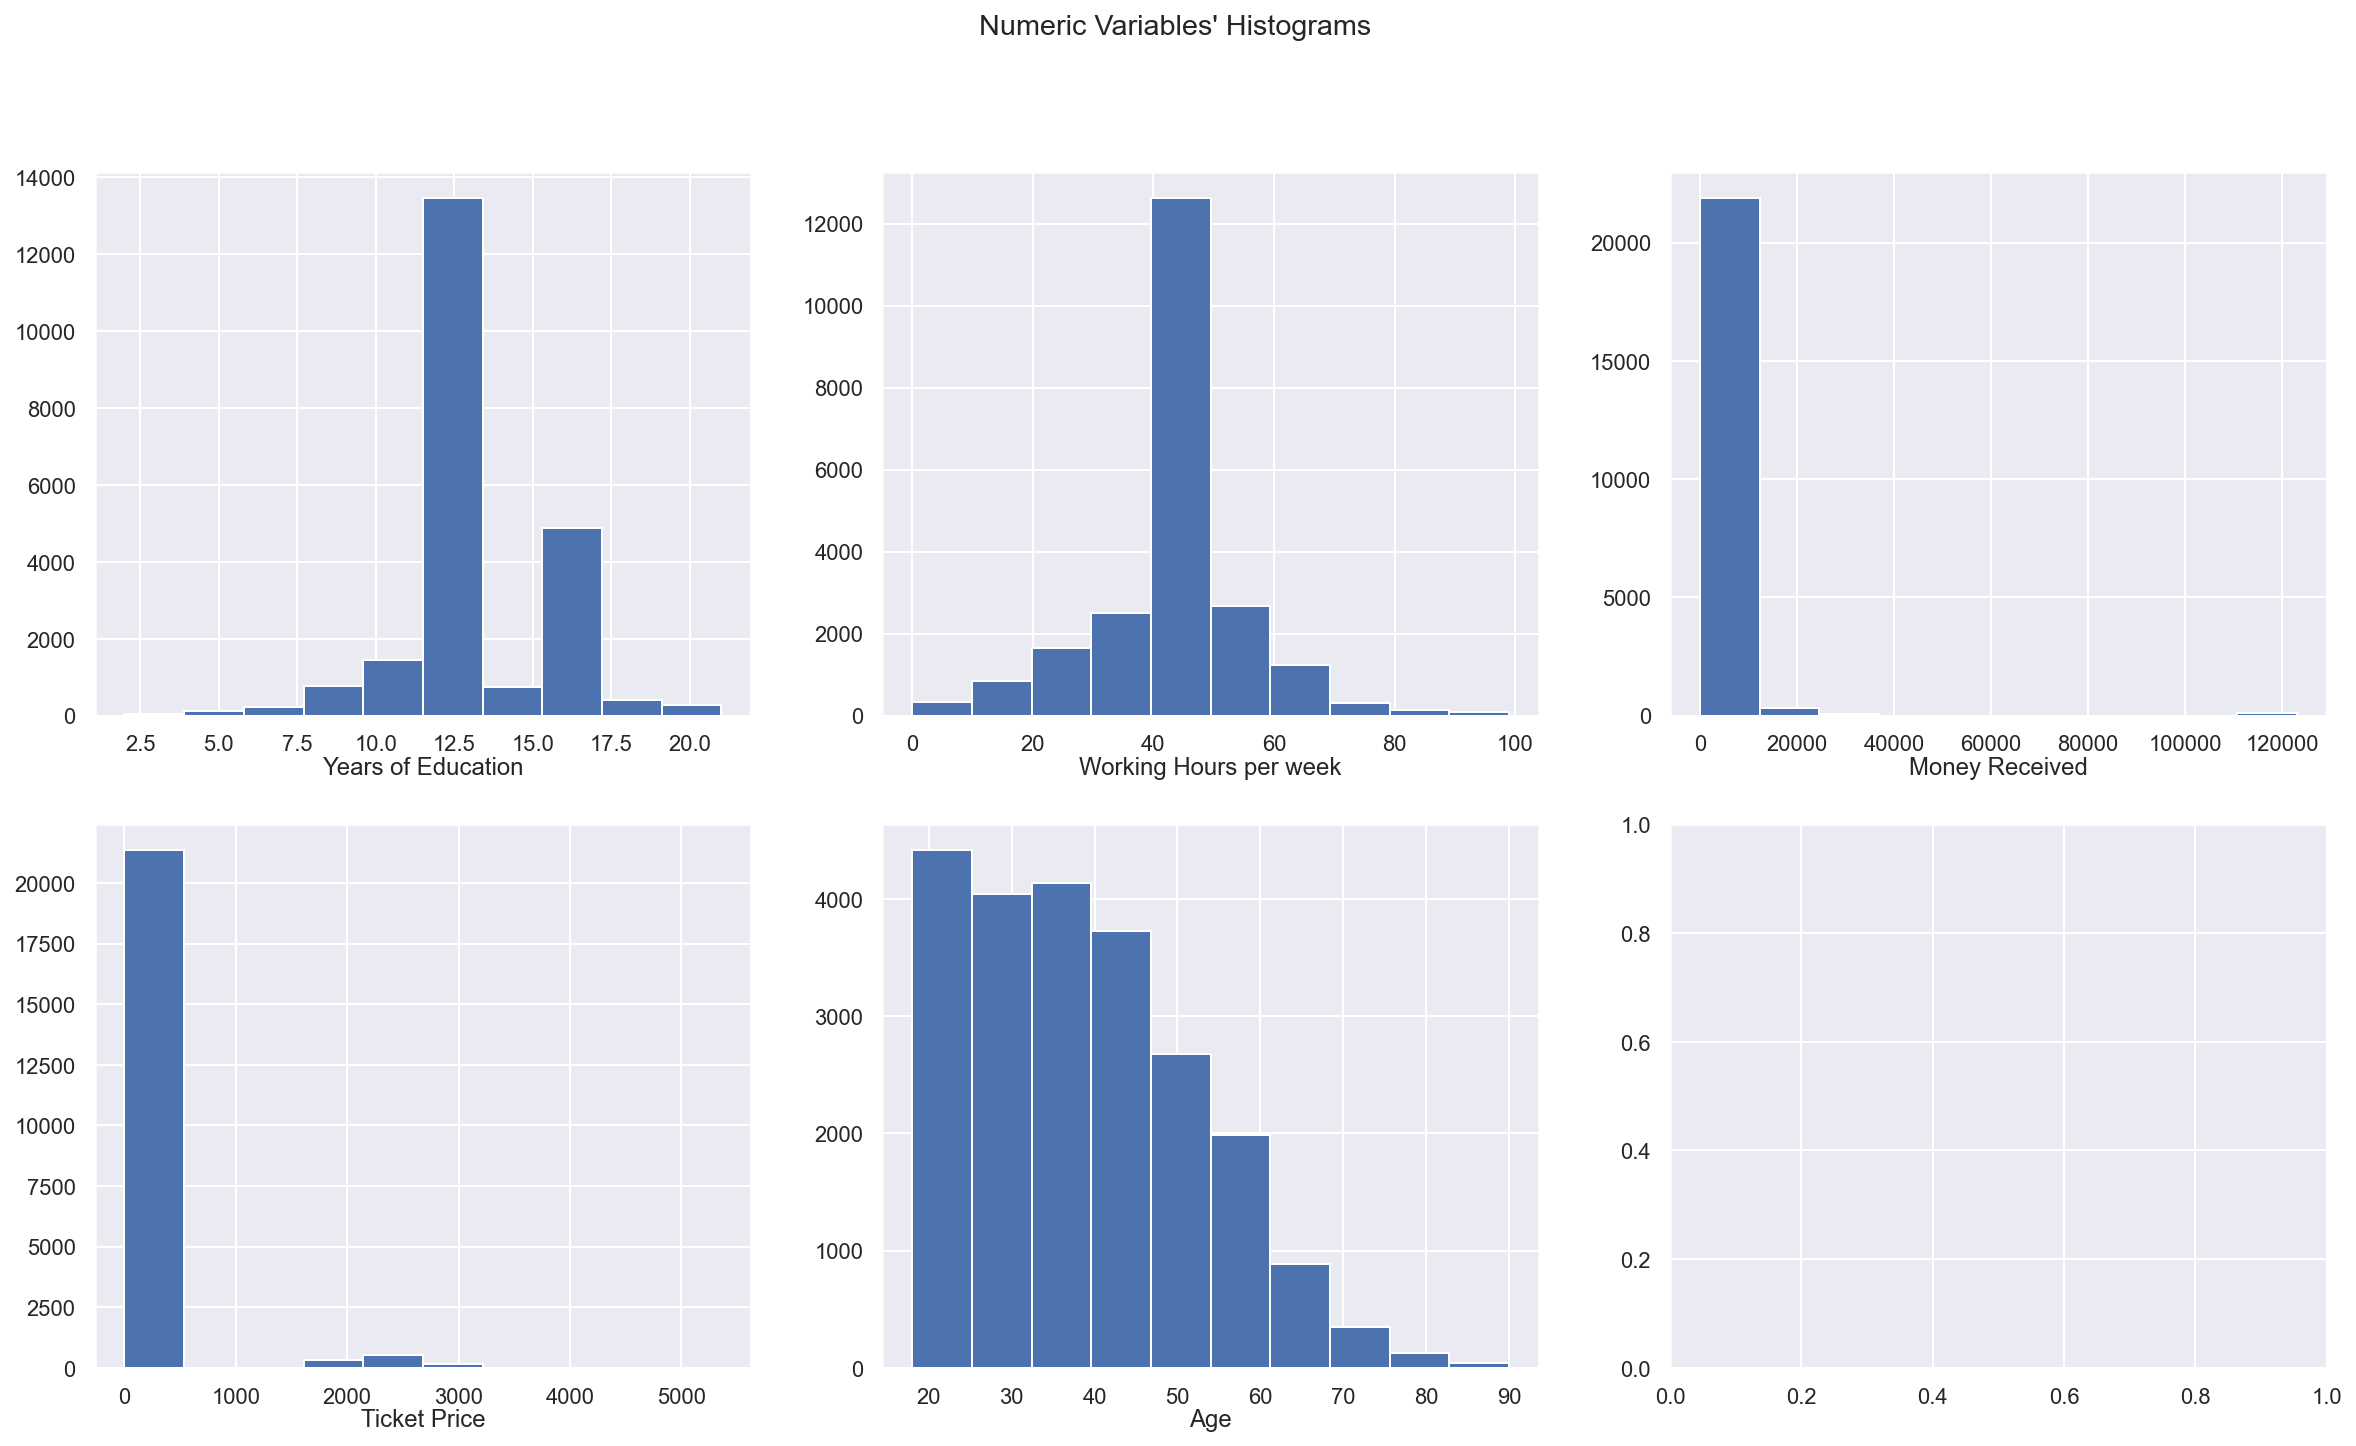

In [97]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(c_ya_train_copy[feat])
    ax.set_title(feat, y=-0.13)
    
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

<a class="anchor" id="outfiltering">

## 10.3. Outlier Removal - Filtering

</a>

<hr>
<a class="anchor" id="manual">

### 10.3.1. Filters 1 - Manual
</a>

In [98]:
filters1 = (
    (c_ya_train_copy['Working Hours per week']<=84)
)

df_1 = c_ya_train_copy[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / c_ya_train_copy.shape[0], 4))

Percentage of data kept after removing outliers: 0.9949


In [99]:
# List of the CITIZEN_ID considered as outliers
filters1[filters1 == False].index.tolist()

[12656,
 12954,
 13110,
 13162,
 13213,
 13701,
 14014,
 14037,
 14266,
 14443,
 15165,
 15258,
 15394,
 16296,
 16454,
 16644,
 16663,
 16736,
 16868,
 17213,
 17372,
 17594,
 17854,
 18067,
 18099,
 18311,
 18680,
 18885,
 18946,
 19111,
 19151,
 19346,
 19878,
 20365,
 20535,
 20578,
 20855,
 20946,
 21221,
 21231,
 21709,
 21939,
 22116,
 22138,
 22146,
 22656,
 22915,
 23379,
 23987,
 24061,
 24114,
 24133,
 24242,
 24436,
 24673,
 24685,
 24980,
 25091,
 25103,
 25114,
 25118,
 25155,
 25346,
 25589,
 25610,
 25749,
 25773,
 25862,
 26168,
 26230,
 26339,
 26787,
 27072,
 27188,
 27264,
 27289,
 27333,
 27348,
 27372,
 27445,
 27645,
 27905,
 27940,
 28048,
 28202,
 28267,
 28510,
 28612,
 28846,
 29140,
 29444,
 29720,
 29972,
 30067,
 30253,
 30445,
 30709,
 30885,
 31017,
 31570,
 31702,
 32369,
 32815,
 32958,
 33313,
 33535,
 33753,
 33789,
 33847,
 34061,
 34779,
 34791,
 34809,
 34884]

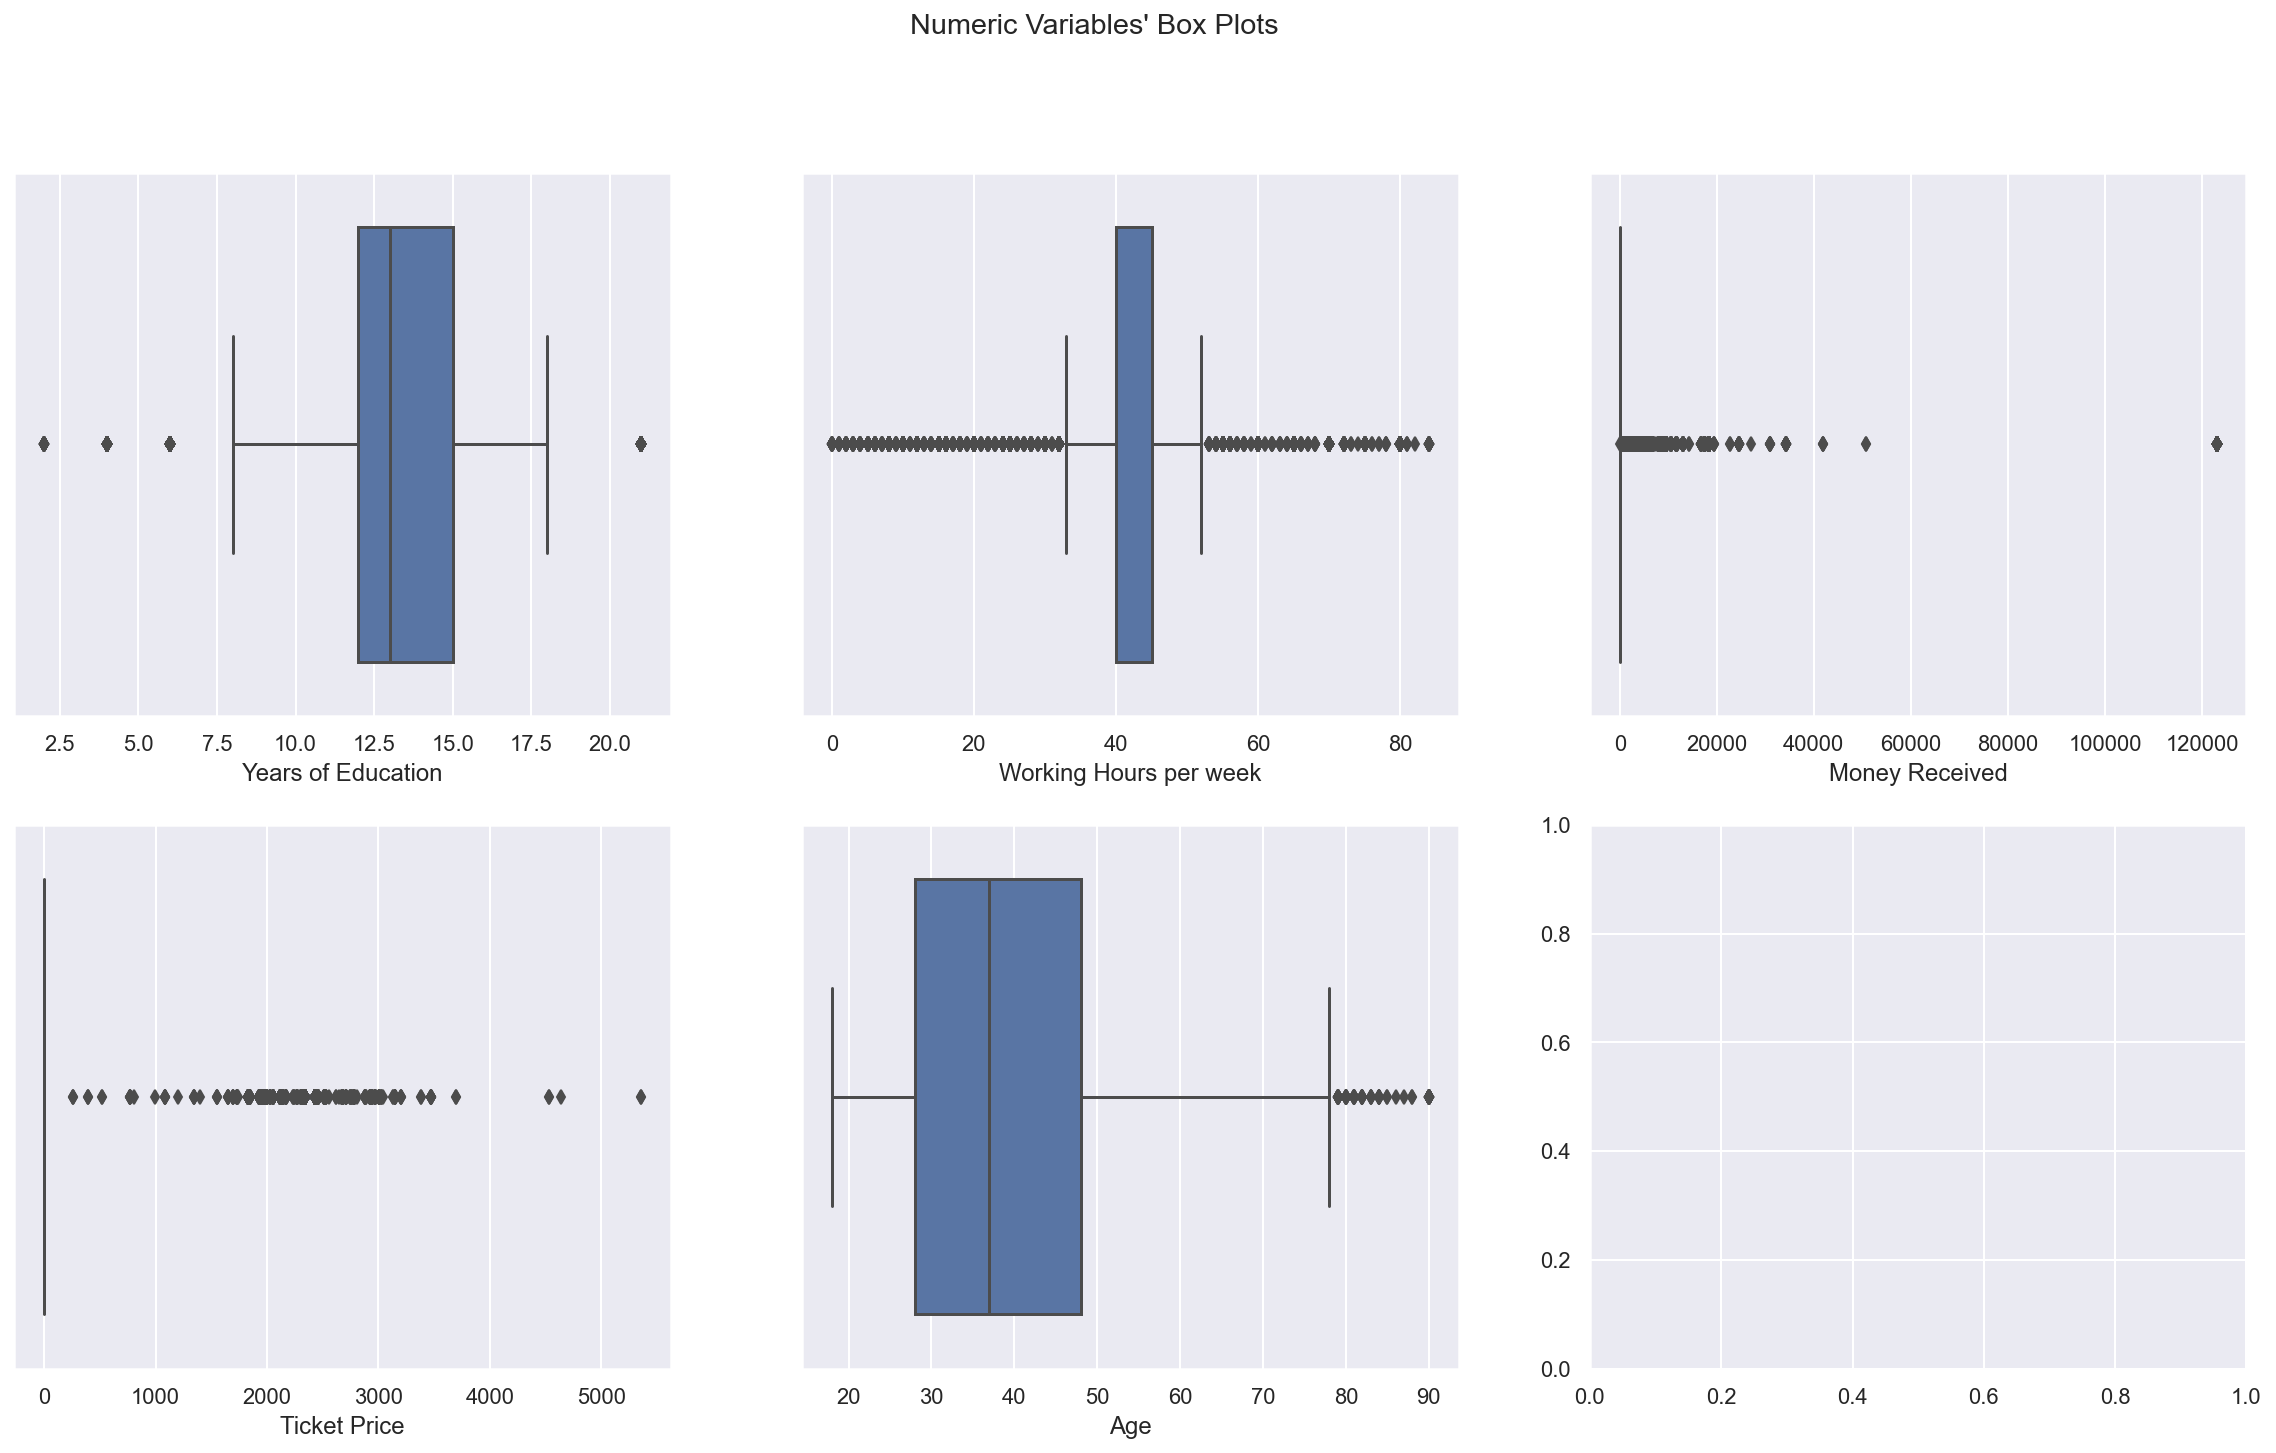

In [100]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(metric_features) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(df_1[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="iqr">

### 10.3.2. Filters 2 - IQR
    
</a>

In [101]:
q25 = c_ya_train_copy.quantile(.25)
q75 = c_ya_train_copy.quantile(.75)
iqr = (q75 - q25)



upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr



filters2 = []
for metric in outlier_metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(c_ya_train_copy[metric].between(llim, ulim, inclusive=True))


filters2 = pd.Series(np.all(filters2, 0), index=c_ya_train_copy.index)
df_2 = c_ya_train_copy[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / c_ya_train_copy.shape[0], 4))

Percentage of data kept after removing outliers: 0.6077


<hr>
<a class="anchor" id="manualiqr">

### 10.3.3. Filters 3 - Manual & IQR
    
</a>

- We keep the first filtering because IQR is not useful in our very sparse dataset 

In [102]:
c_ya_train_copy = df_1

In [103]:
c_ya_train_copy.shape

(22286, 20)

In [104]:
# g = sns.PairGrid(c_ya_train_copy)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

<hr>
<a class="anchor" id="varval">
    
# 11. Variables' Values - Proportion
    
</a>

In [105]:
# we droped the unecessary columns
c_ya_train_weights = c_ya_train_copy.copy()
c_ya_train_weights=c_ya_train_weights.drop(columns={"Ticket Price","Money Received"})
c_ya_train_weights.columns

Index(['Native Continent', 'Marital Status', 'Lives with', 'Base Area',
       'Education Level', 'Years of Education', 'Employment Sector', 'Role',
       'Working Hours per week', 'Income', 'Age', 'Children', 'GroupA',
       'GroupB', 'GroupC', 'Unemployed', 'HigherEduc', 'Female'],
      dtype='object')

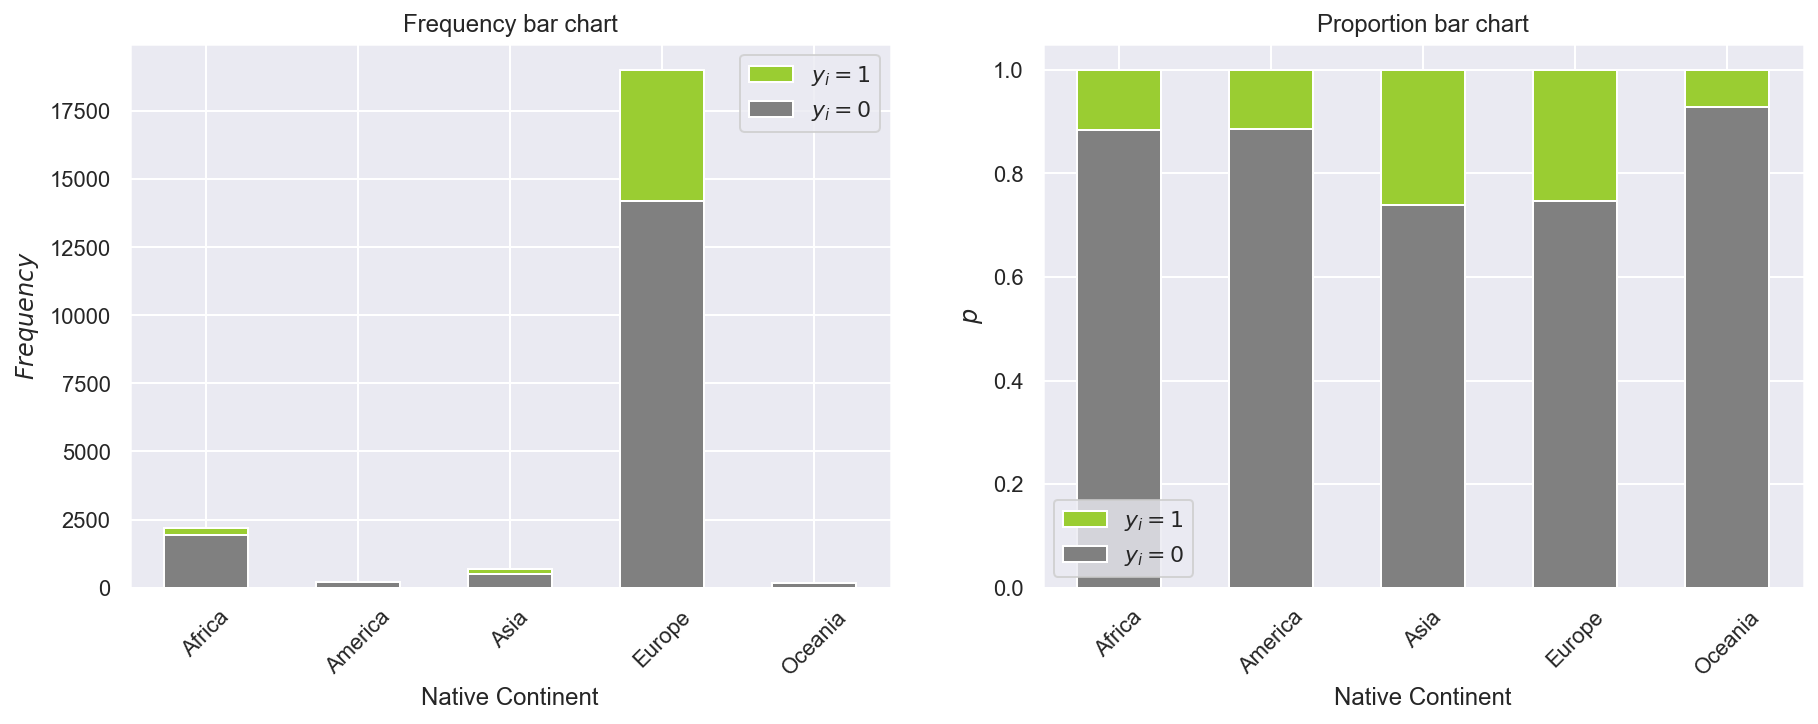

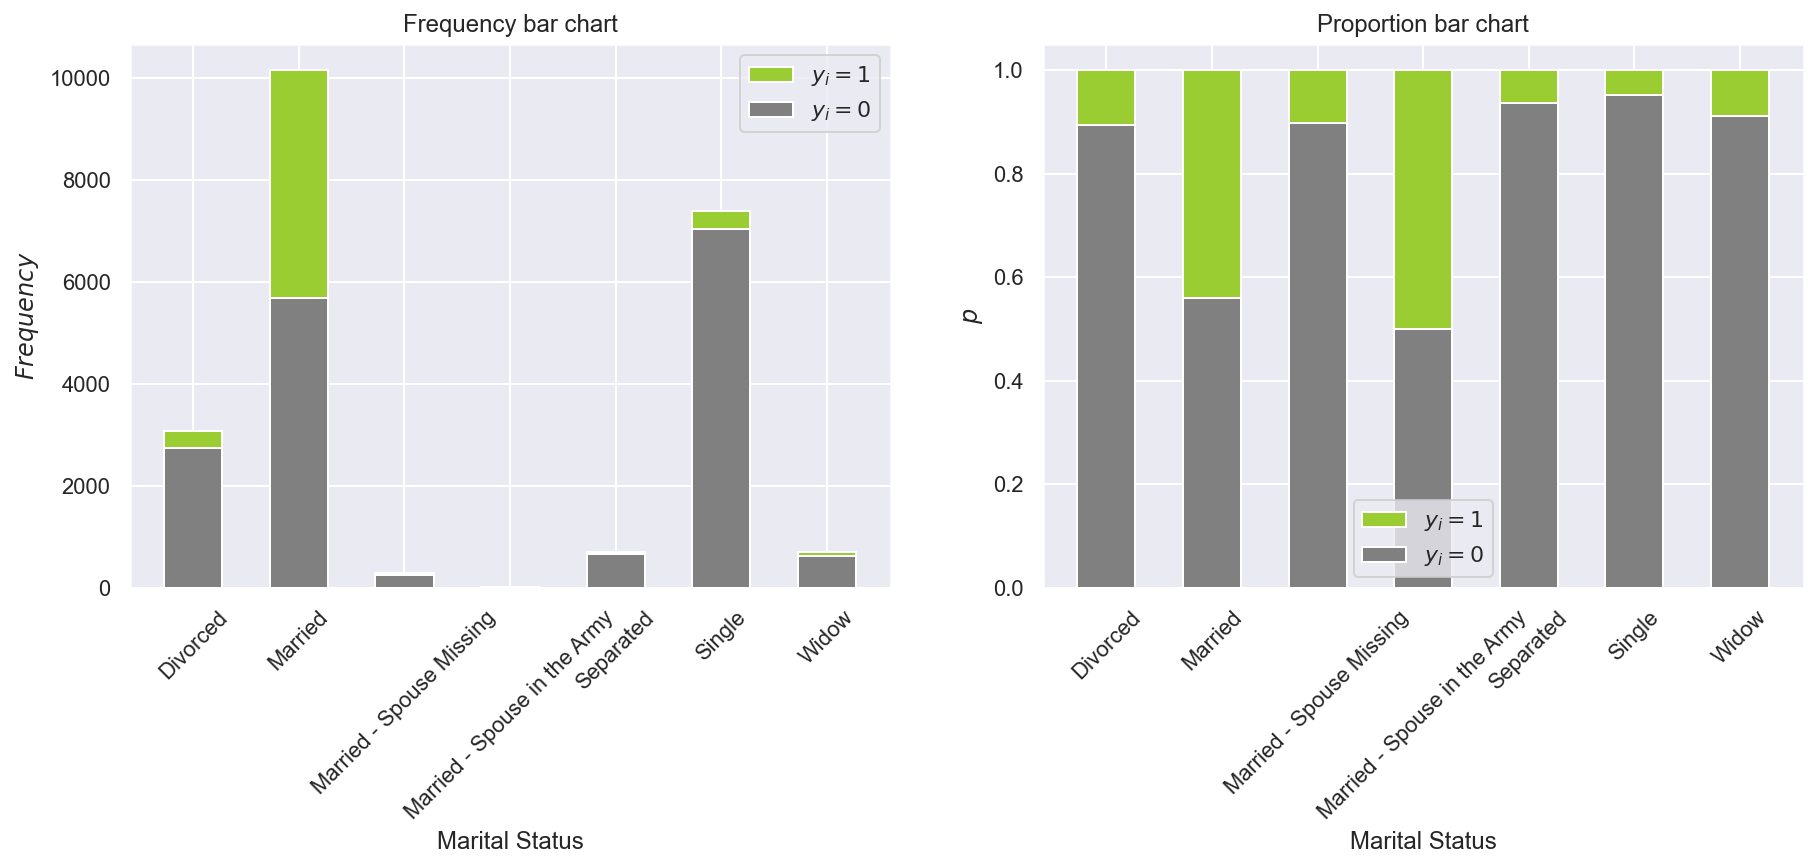

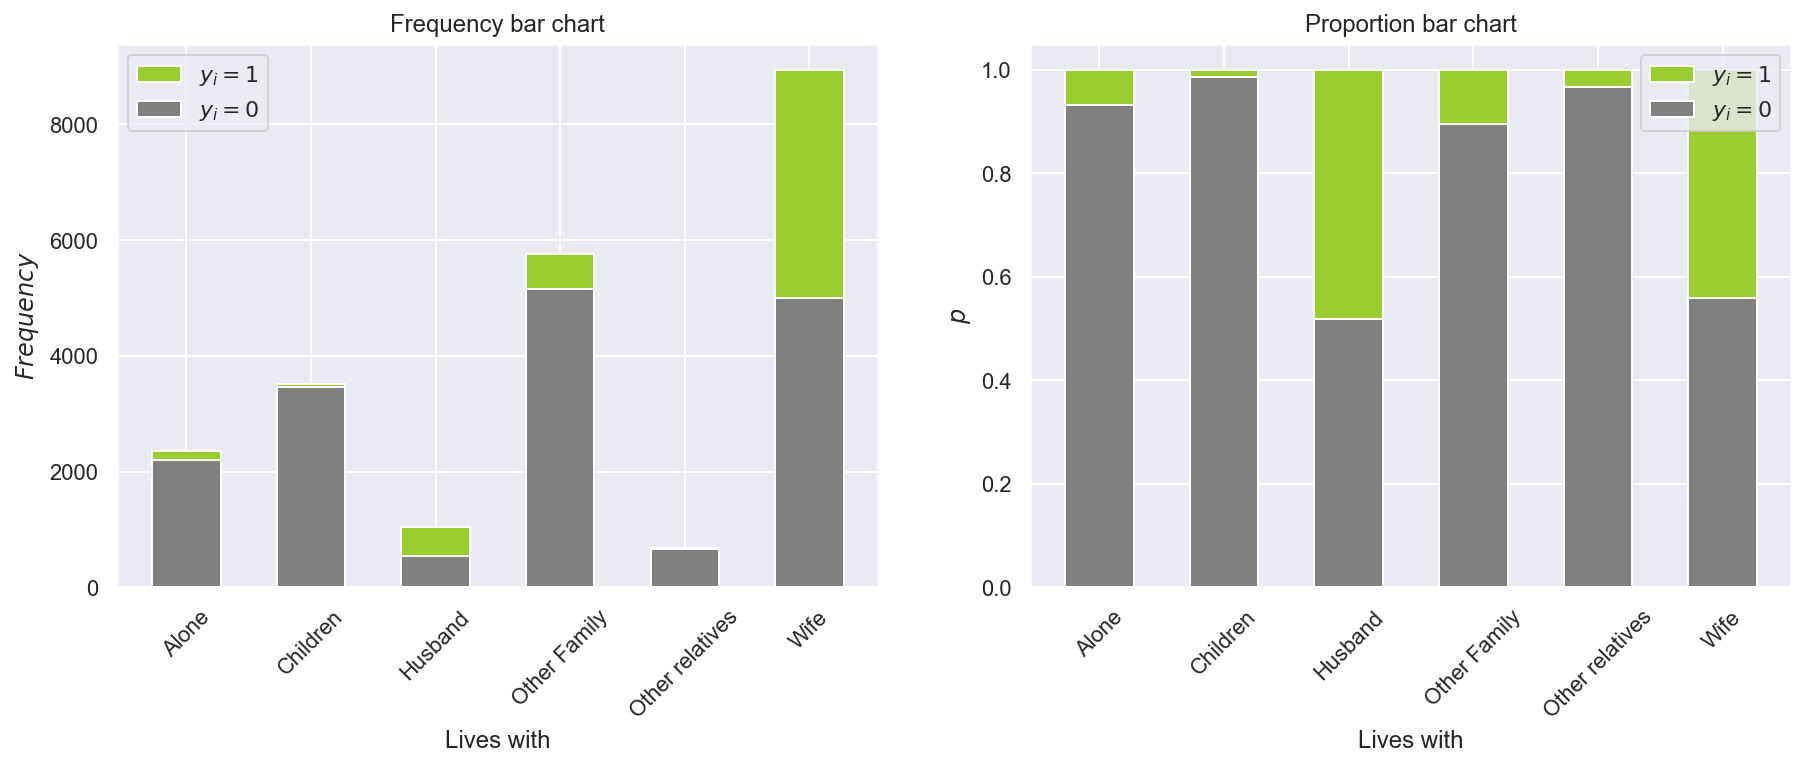

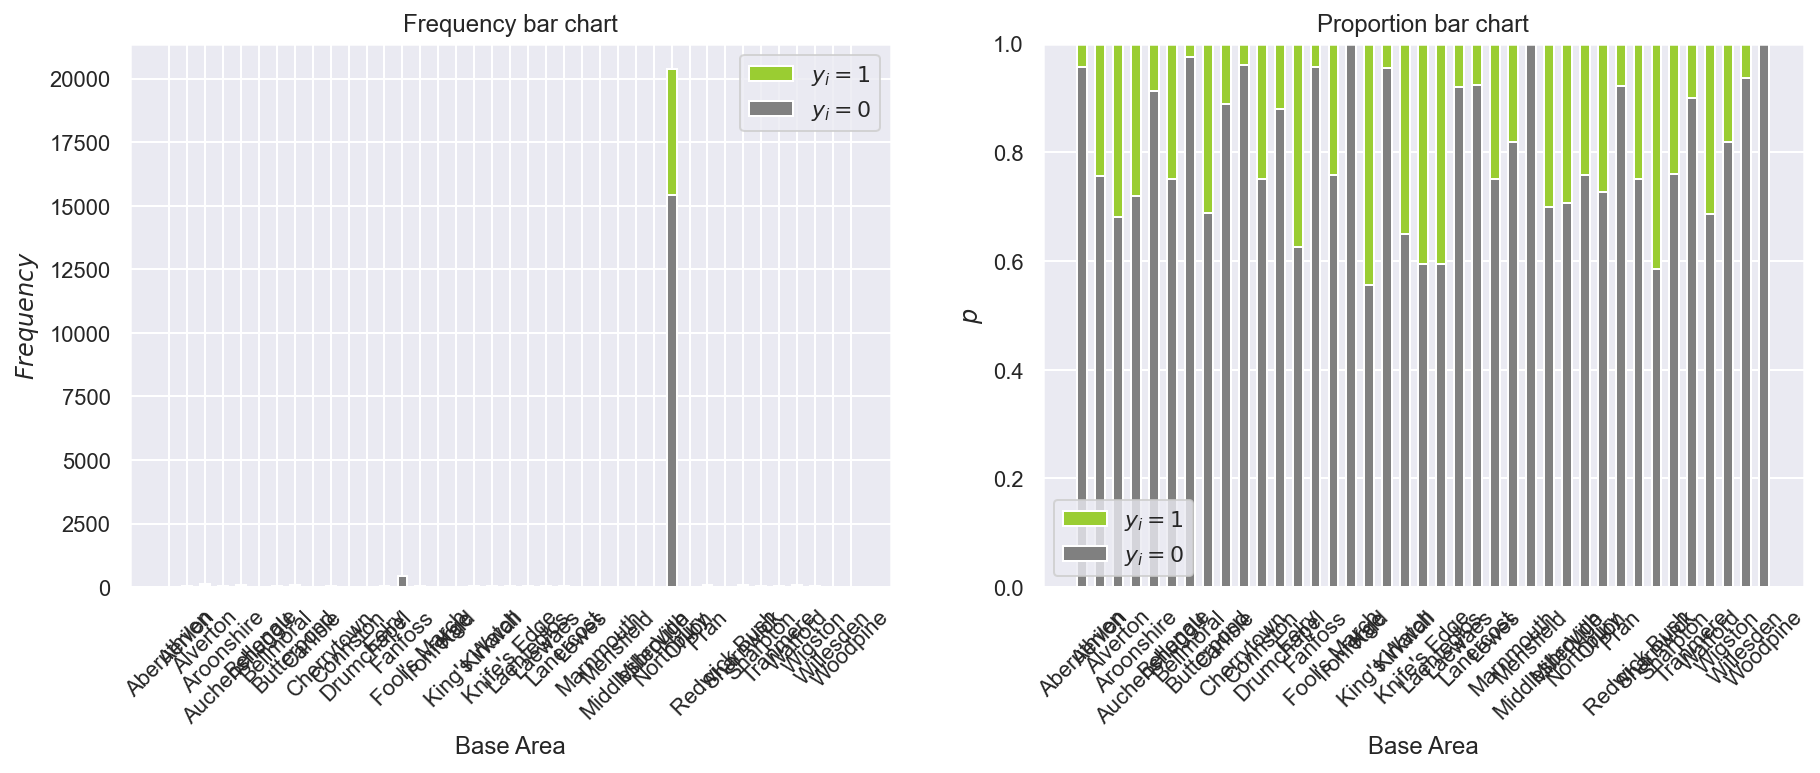

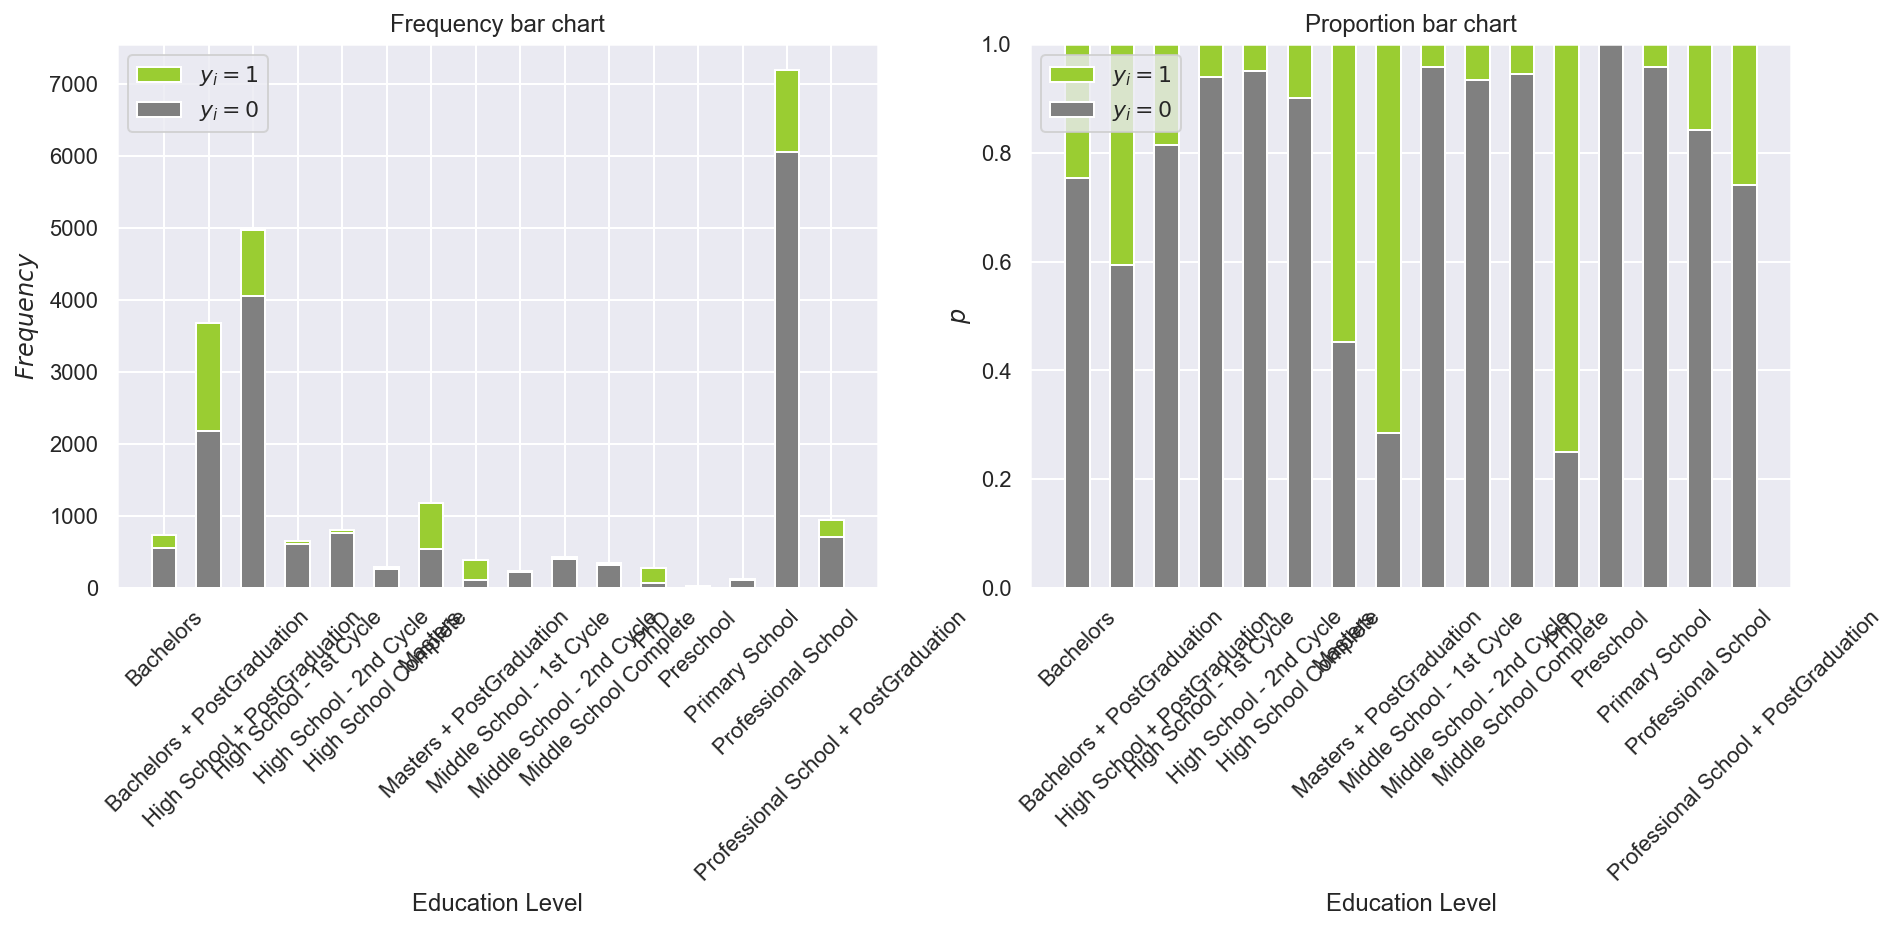

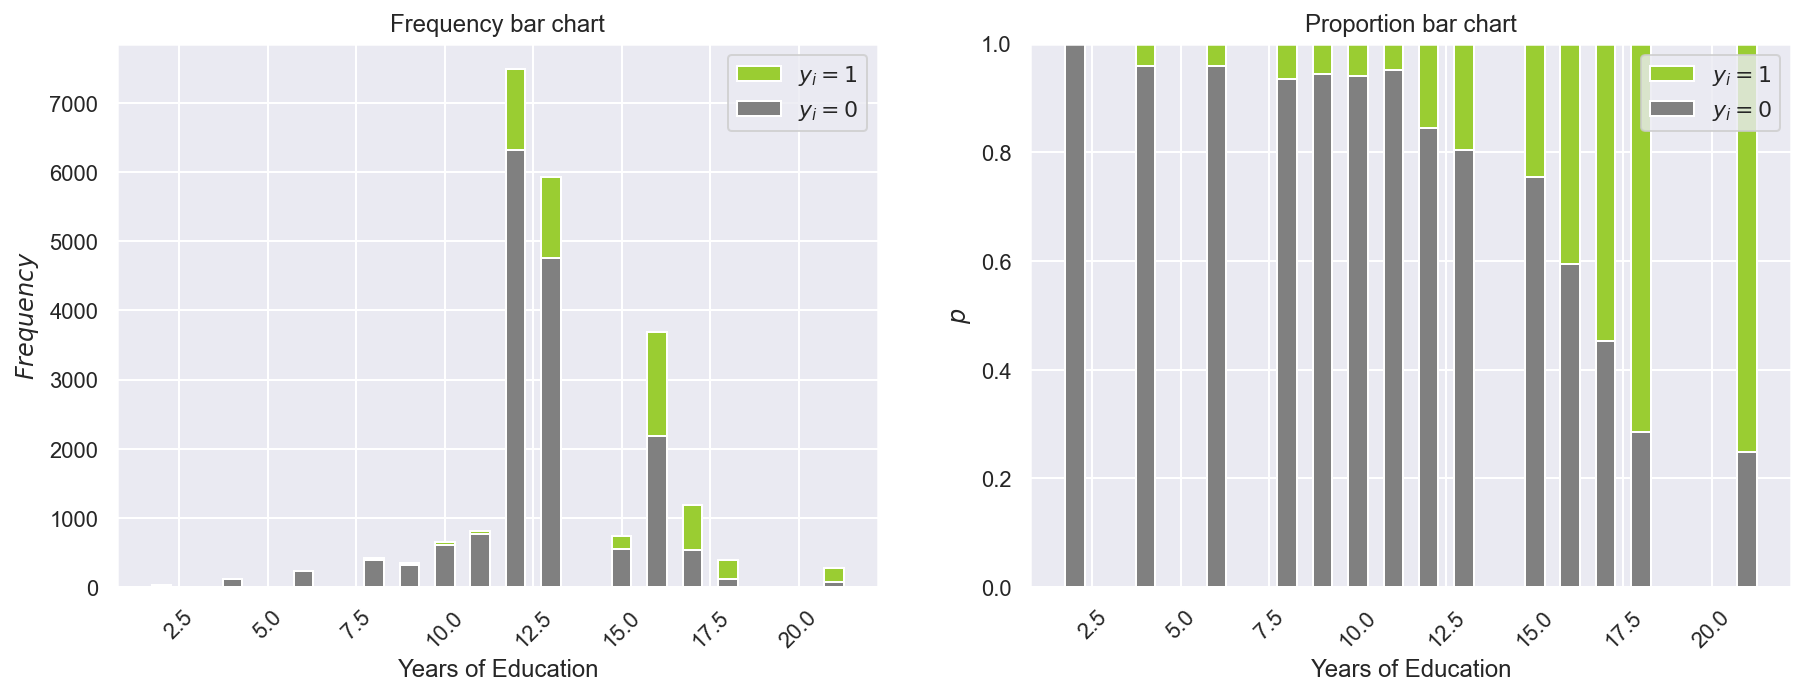

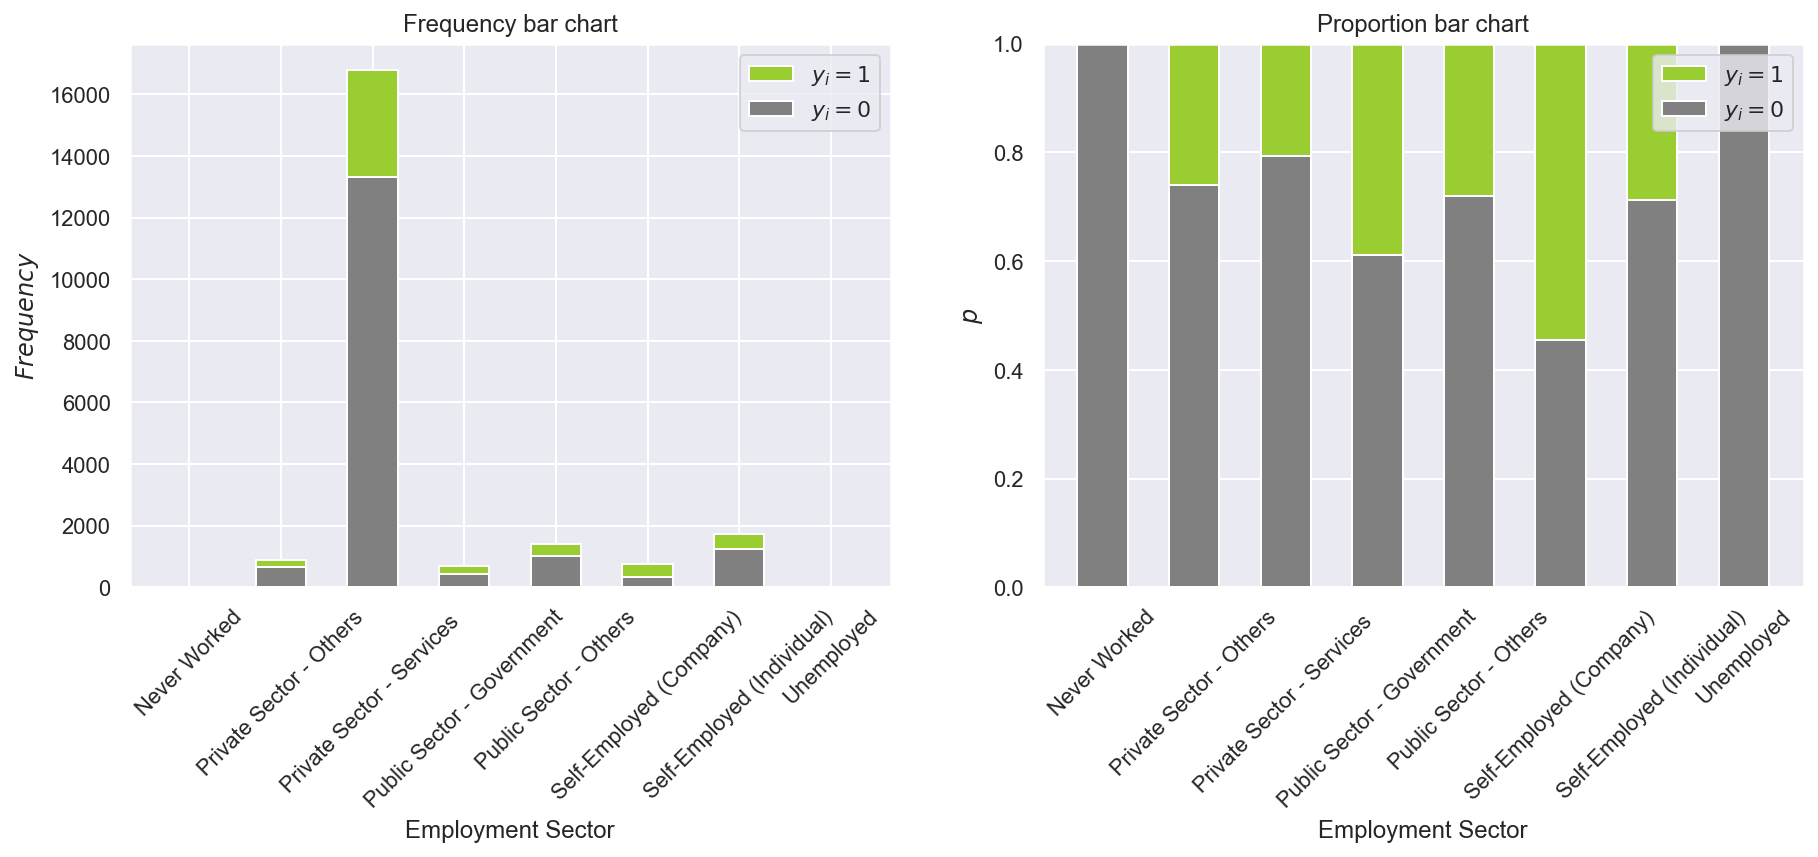

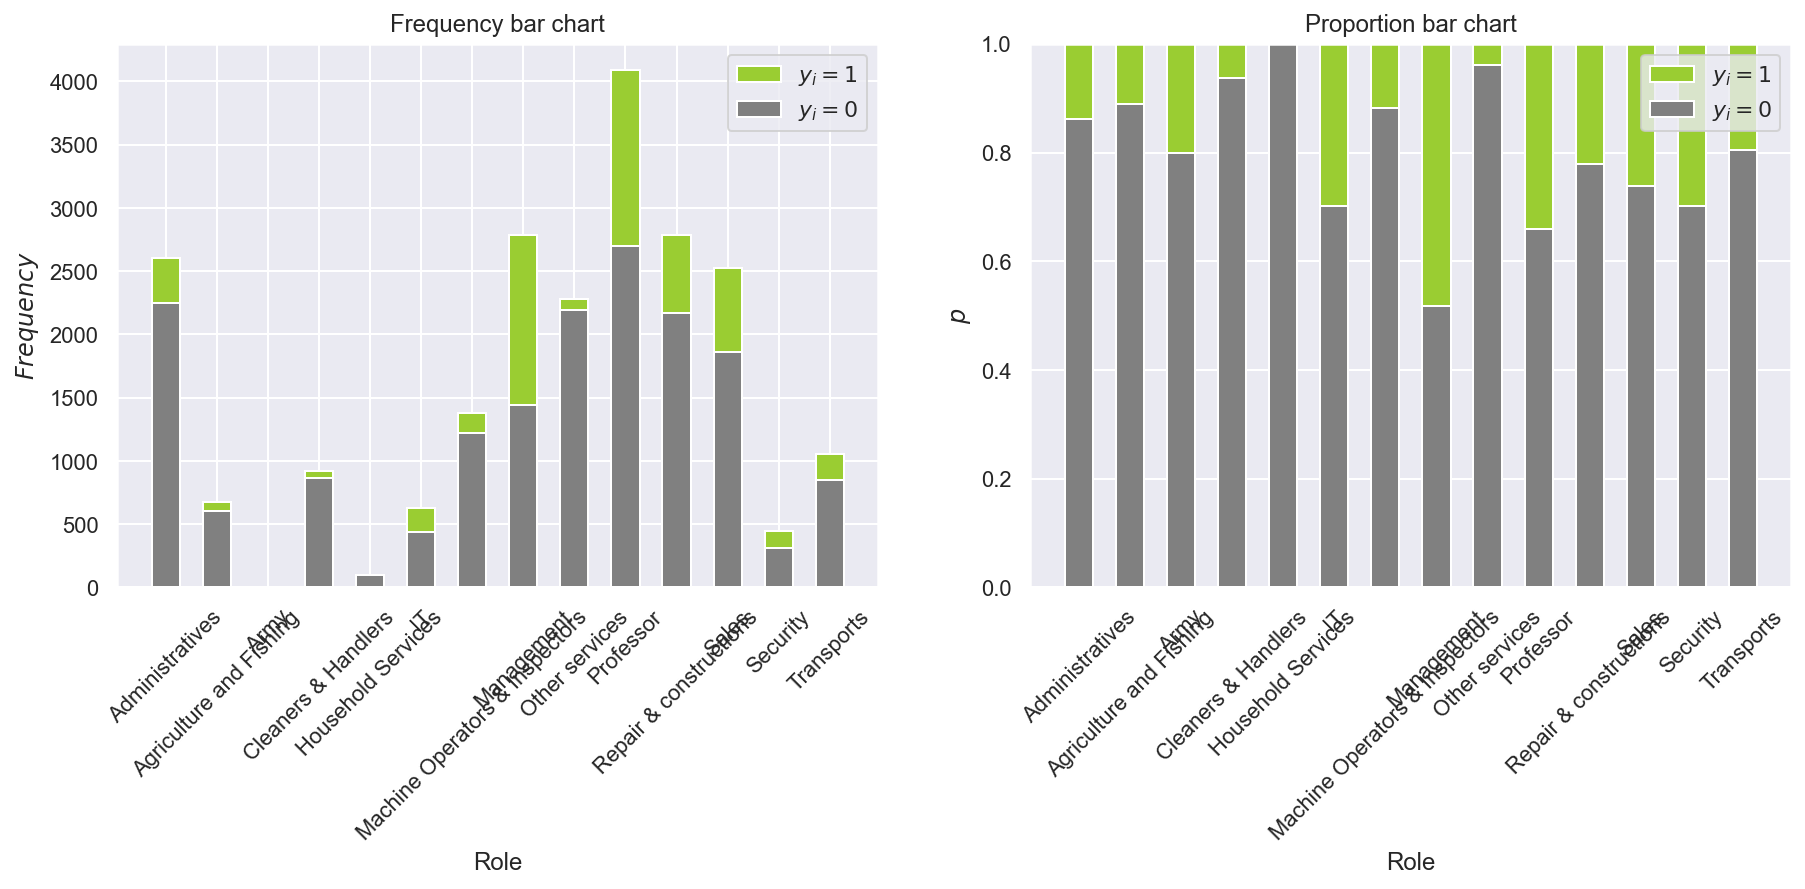

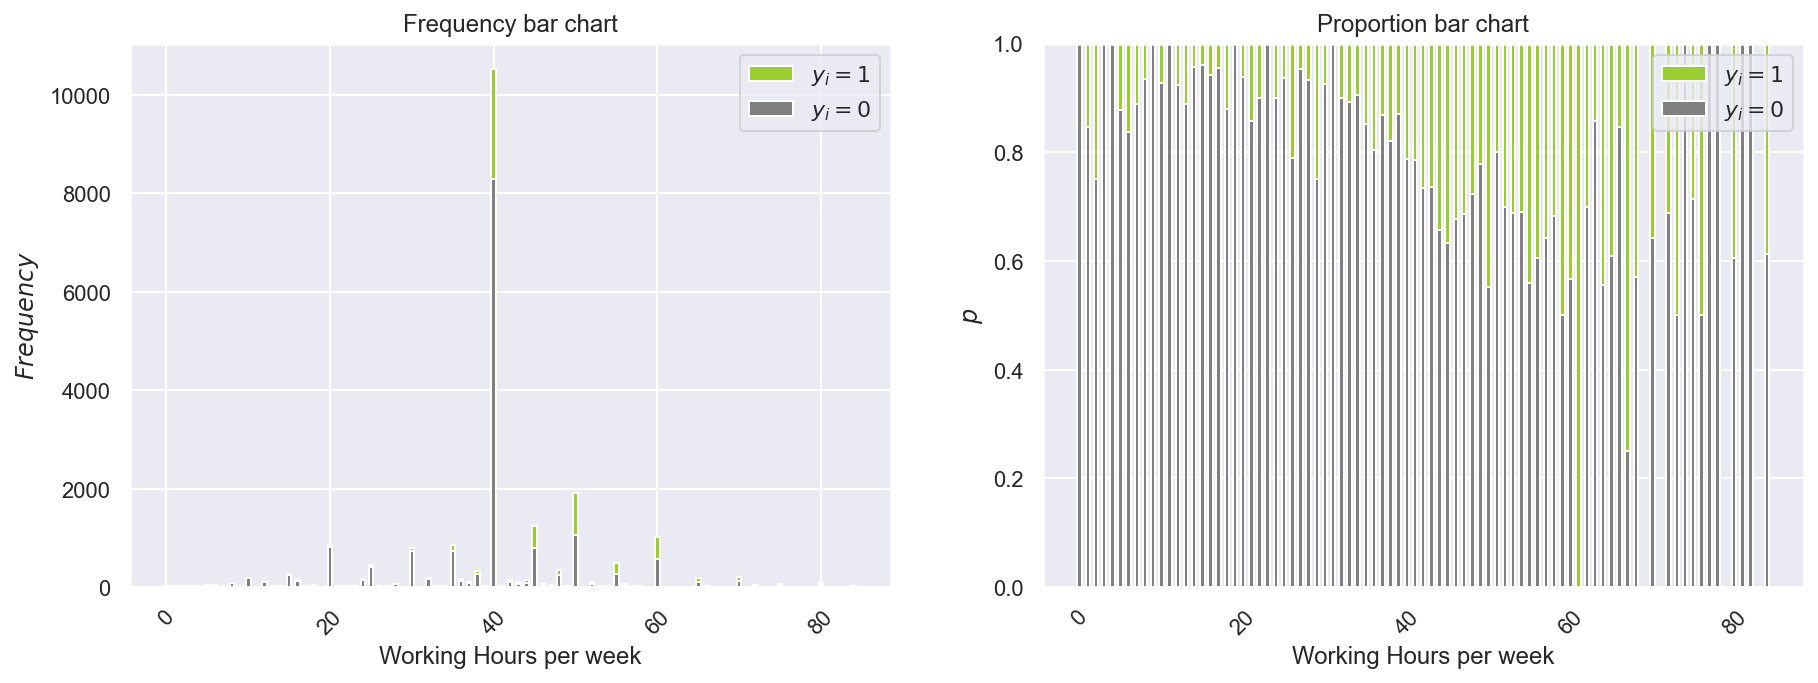

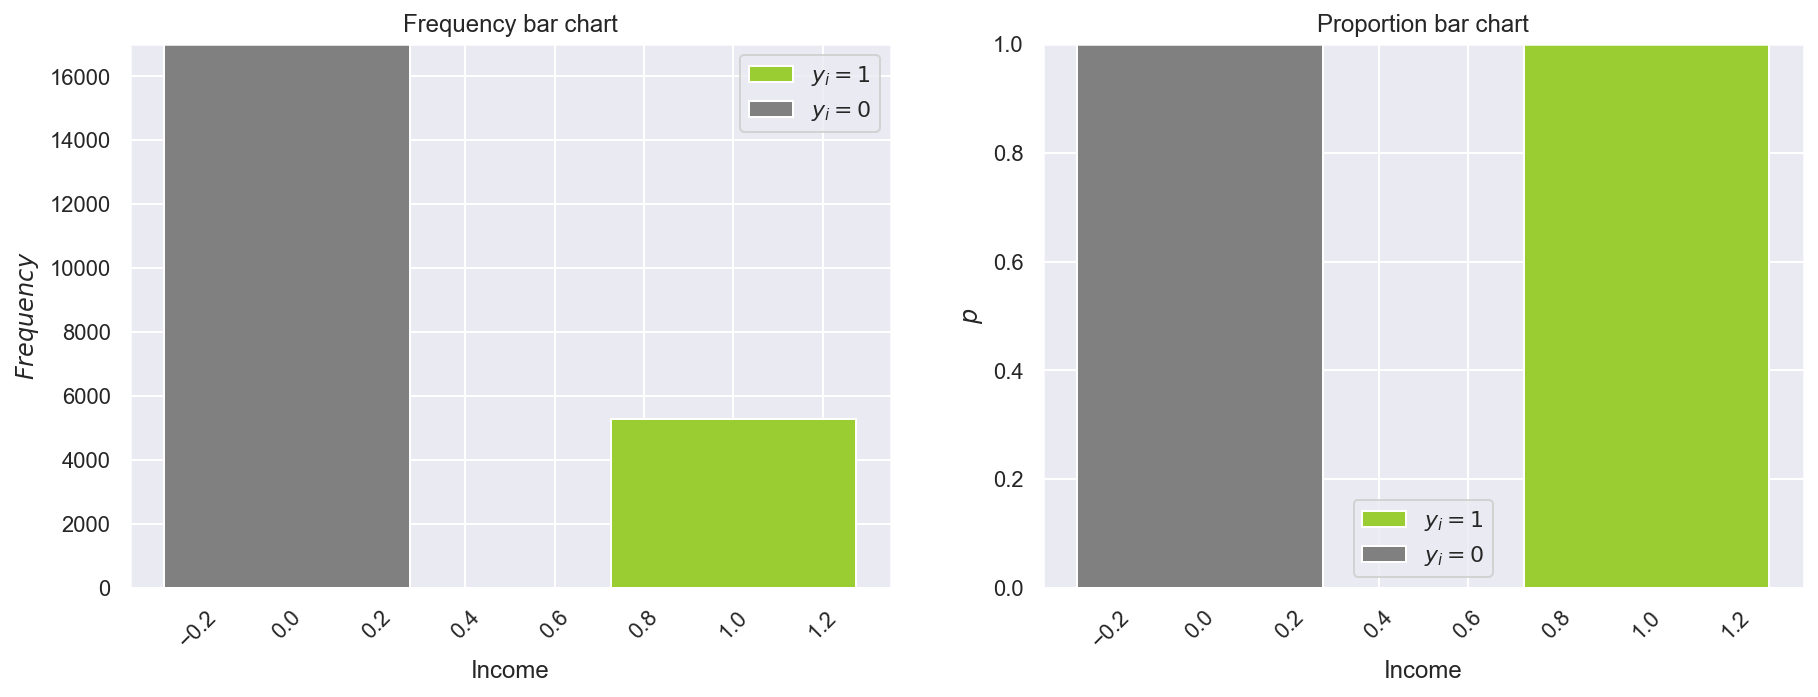

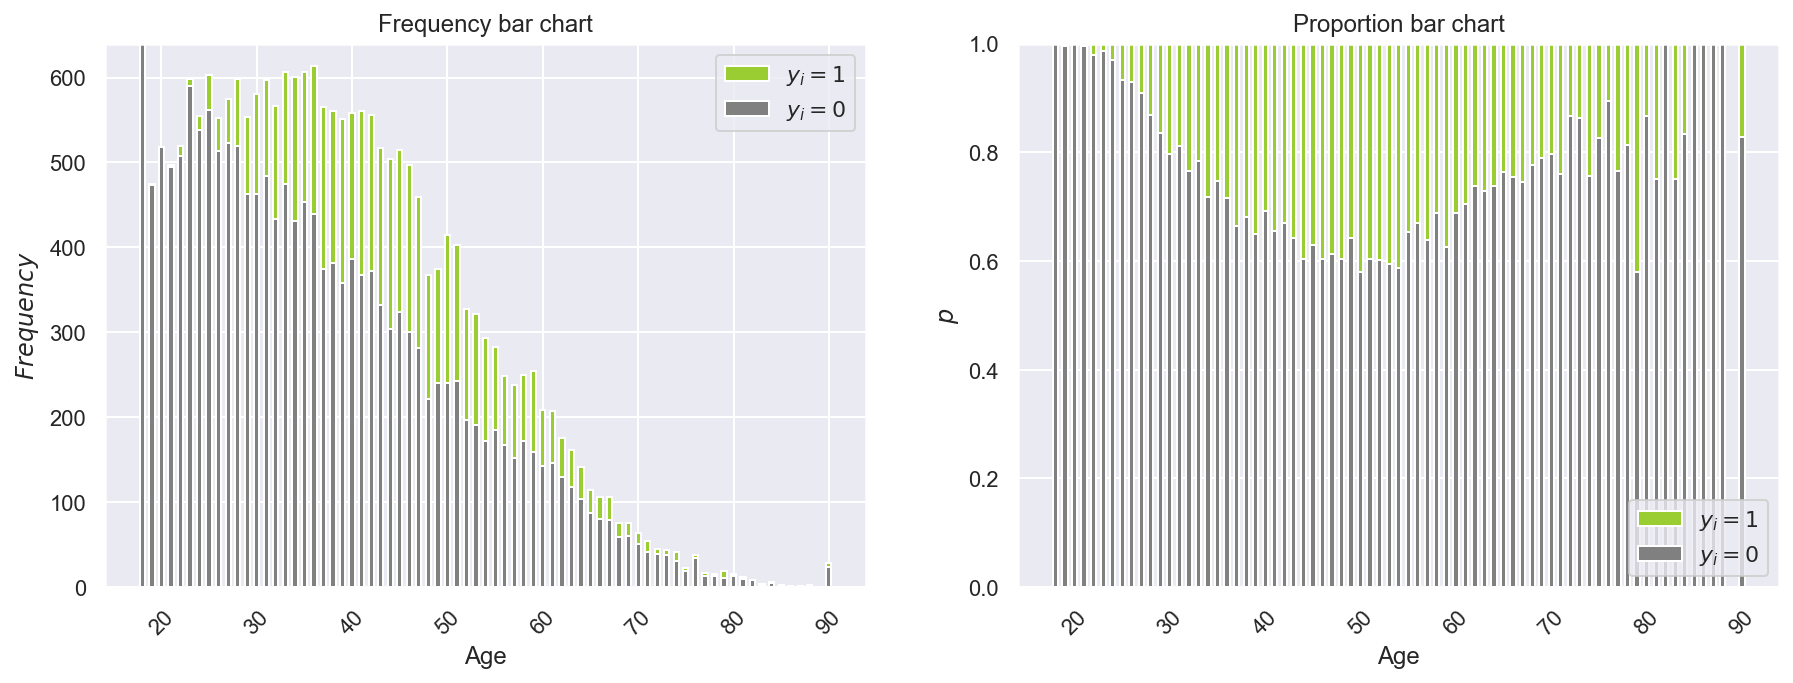

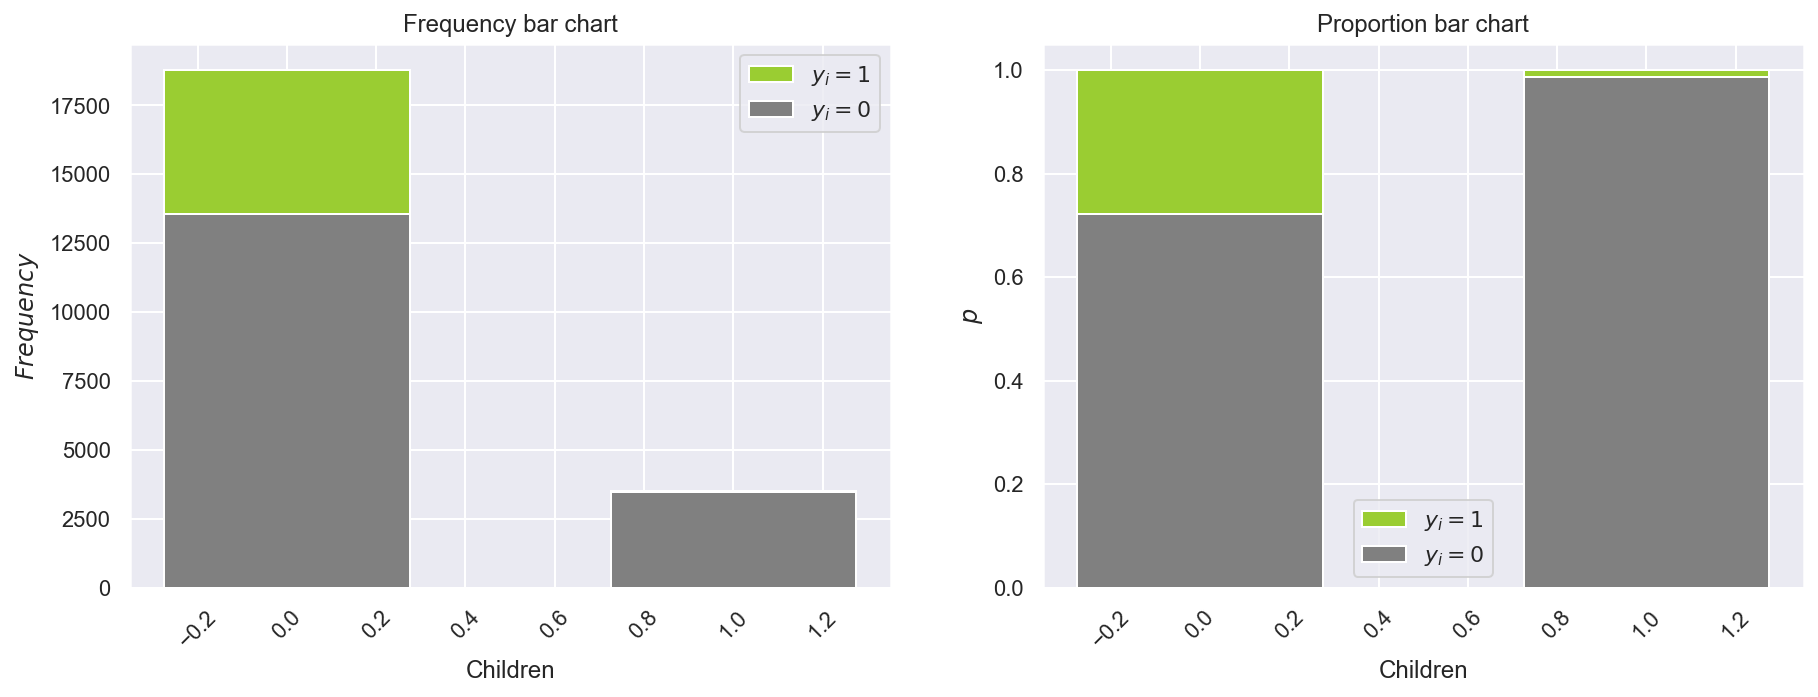

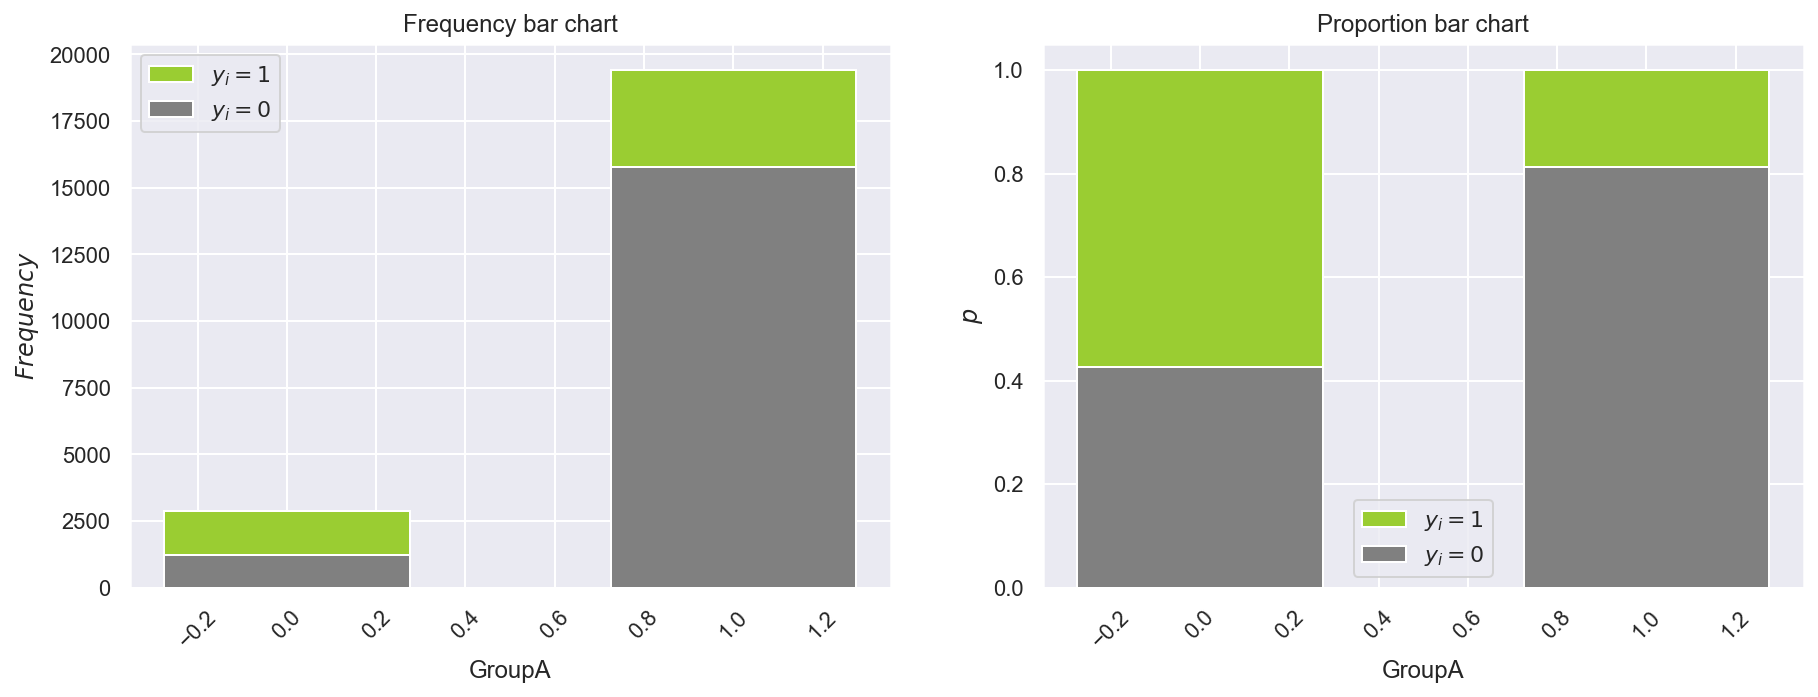

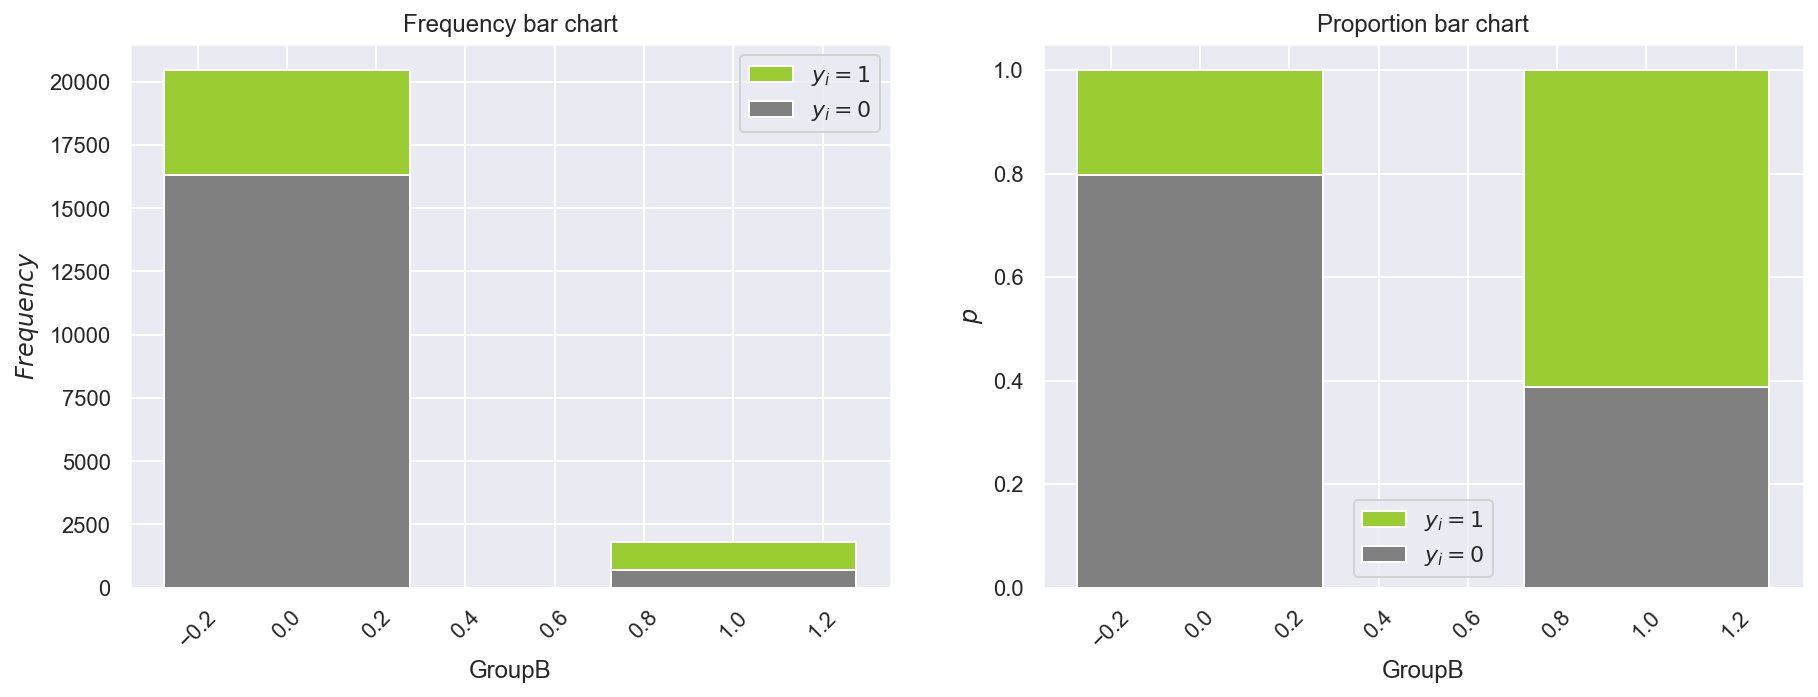

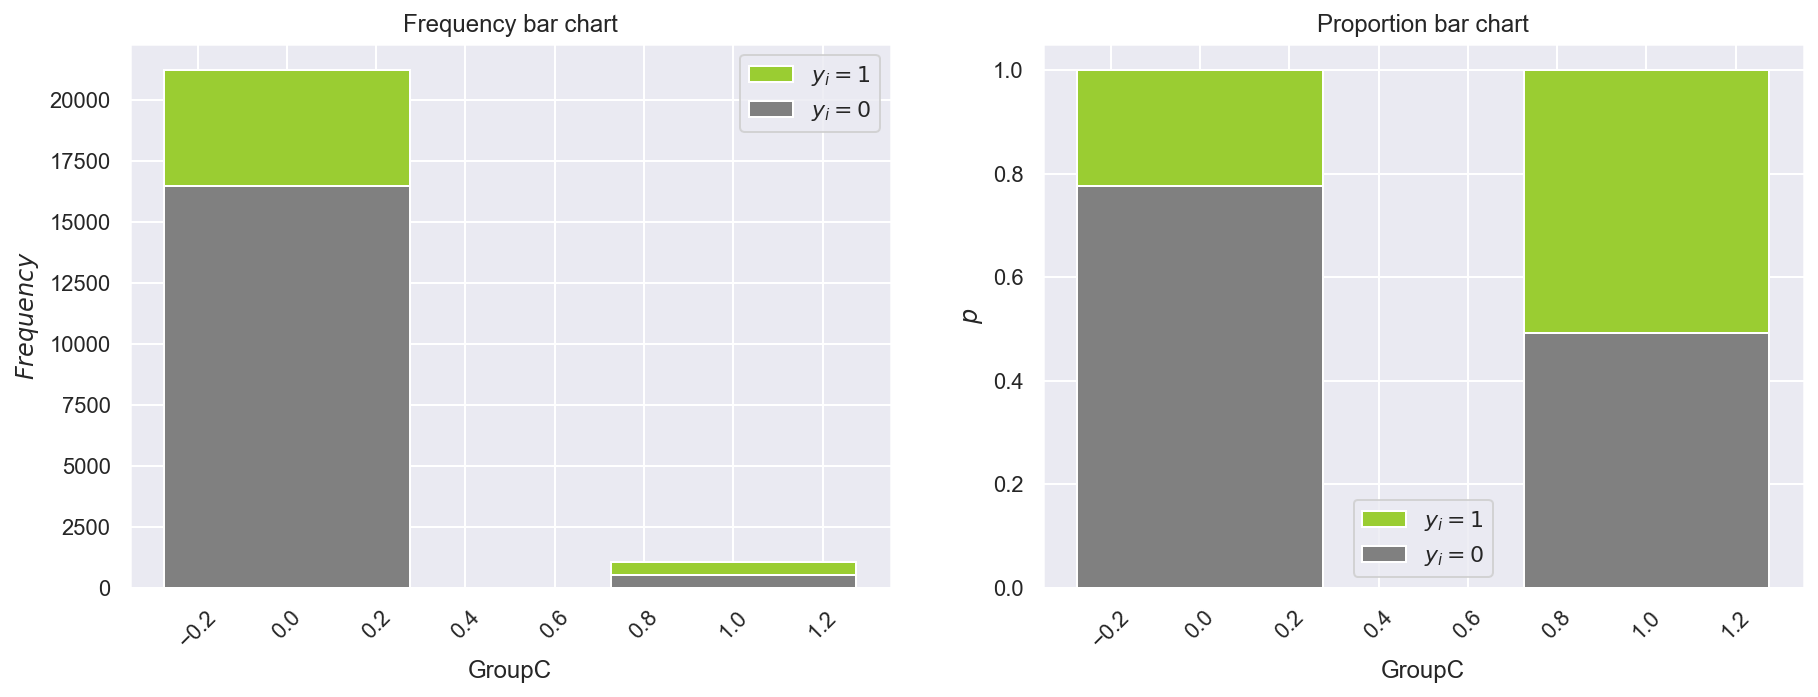

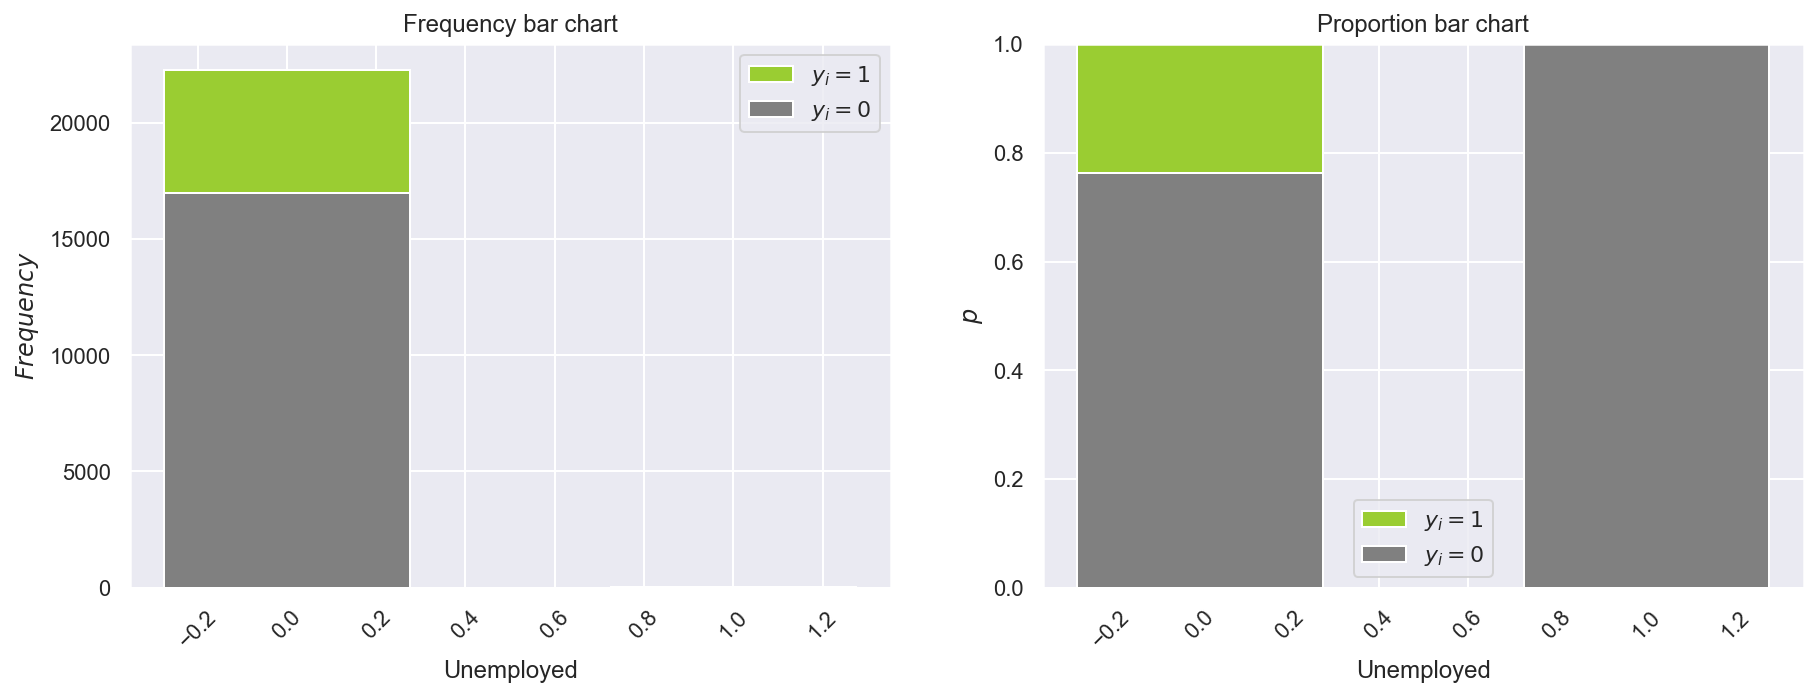

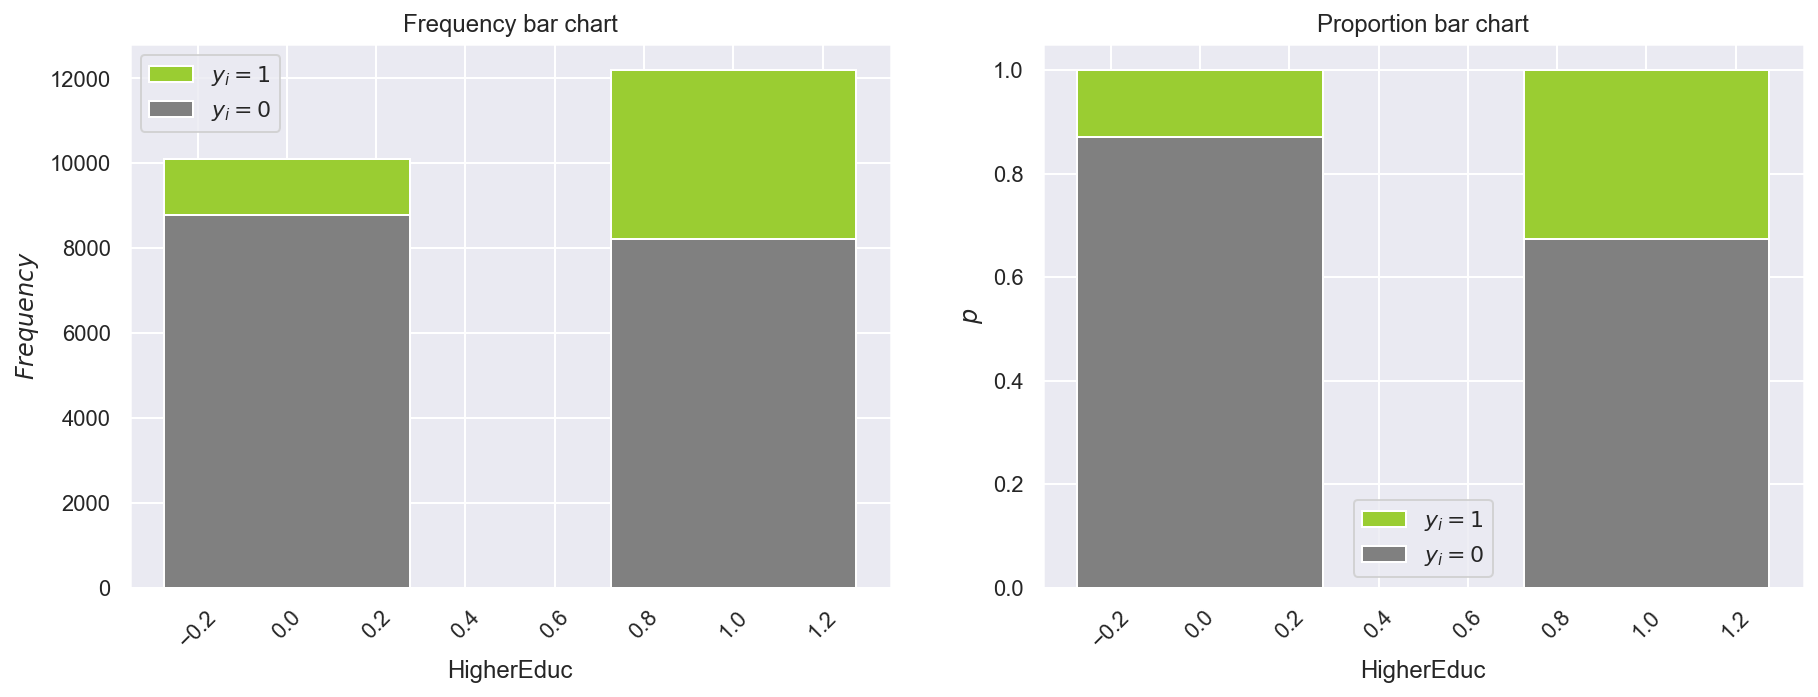

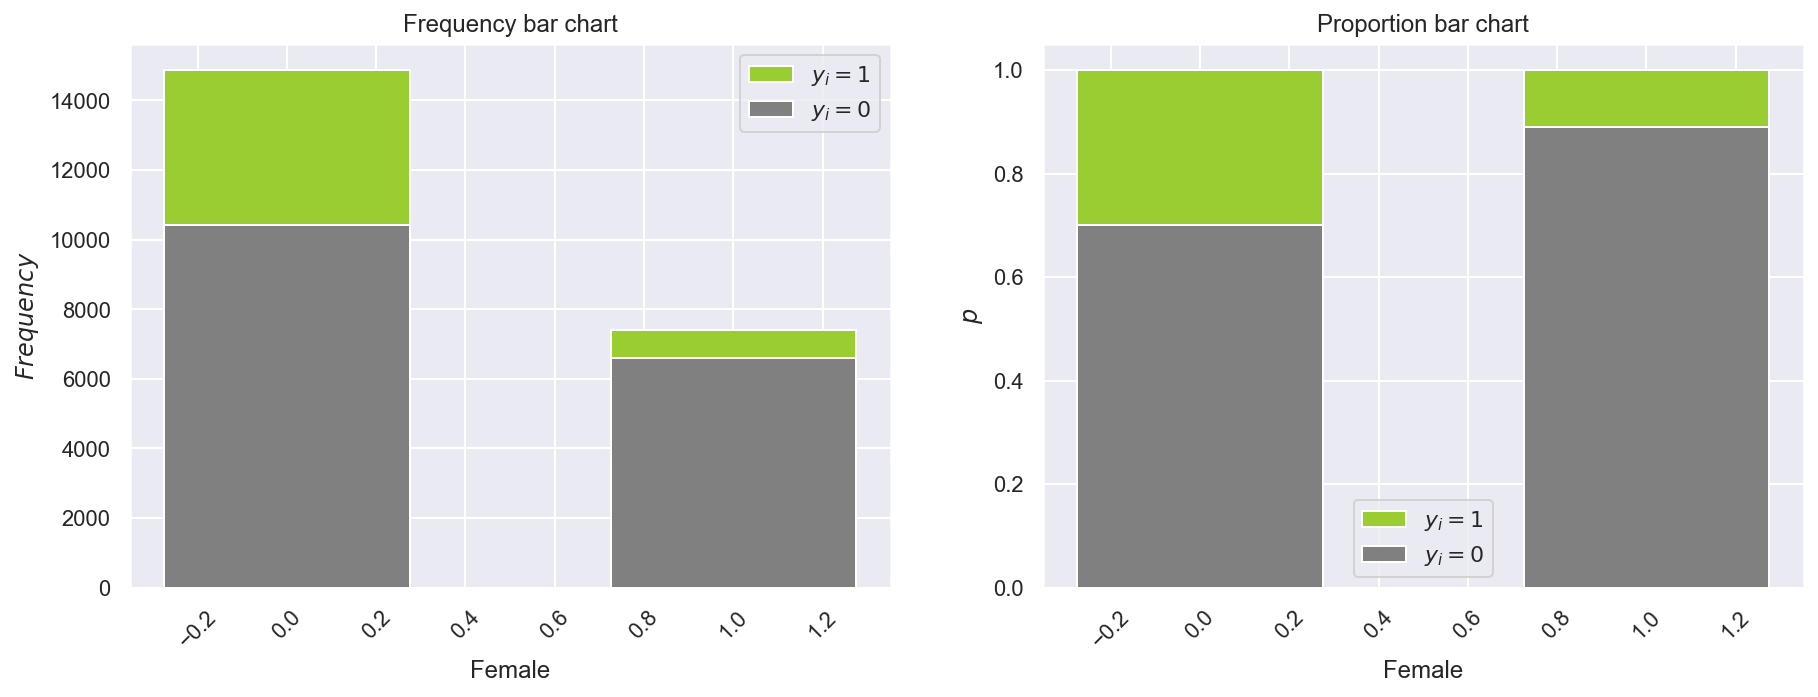

In [106]:
 def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$Frequency$")

   
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                         np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylabel("$p$")

    plt.show()  
    
for i in range(len(c_ya_train_weights.columns)):
     bar_charts_categorical(df=c_ya_train_weights,target="Income",feature=c_ya_train_weights.columns[i])

<hr>
<a class="anchor" id="encoding">
    
# 12. Encoding - OneHotEncoder
    
</a>

In [107]:
non_metric_features

['Native Continent',
 'Marital Status',
 'Lives with',
 'Base Area',
 'Education Level',
 'Employment Sector',
 'Role']

In [108]:
# Perform the encoding with One-Hot-Encoder in the train dataset
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(np.array(c_ya_train_copy[non_metric_features]))
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=c_ya_train_copy.index, columns=ohc_feat_names)  
ohc_df

x0_America  x0_Asia  x0_Europe  x0_Oceania  x1_Married  \
CITIZEN_ID                                                           
12486              0.0      0.0        1.0         0.0         1.0   
12487              0.0      0.0        1.0         0.0         1.0   
12488              0.0      0.0        1.0         0.0         1.0   
12489              0.0      0.0        1.0         0.0         1.0   
12490              0.0      0.0        1.0         0.0         0.0   
...                ...      ...        ...         ...         ...   
34880              0.0      0.0        1.0         0.0         1.0   
34881              0.0      0.0        1.0         0.0         0.0   
34882              0.0      0.0        1.0         0.0         0.0   
34883              0.0      0.0        1.0         0.0         0.0   
34885              0.0      1.0        0.0         0.0         0.0   

            x1_Married - Spouse Missing  x1_Married - Spouse in the Army  \
CITIZEN_ID                                                                 
12486                               0.0                              0.0   
12487                               0.0                              0.0   
12488                               0.0                              0.0   
12489                               0.0                              0.0   
12490                               0.0                              0.0   
...                                 ...                              ...   
34880                               0.0                              0.0   
34881                               0.0                              0.0   
34882                               0.0                              0.0   
34883                               0.0                              0.0   
34885                               0.0                              0.0   

            x1_Separated  x1_Single  x1_Widow  ...  x6_Household Services  \
CITIZEN_ID                                     ...                          
12486                0.0        0.0       0.0  ...                    0.0   
12487                0.0        0.0       0.0  ...                    0.0   
12488                0.0        0.0       0.0  ...                    0.0   
12489                0.0        0.0       0.0  ...                    0.0   
12490                0.0        1.0       0.0  ...                    0.0   
...                  ...        ...       ...  ...                    ...   
34880                0.0        0.0       0.0  ...                    0.0   
34881                0.0        0.0       0.0  ...                    0.0   
34882                0.0        1.0       0.0  ...                    0.0   
34883                0.0        1.0       0.0  ...                    0.0   
34885                0.0        1.0       0.0  ...                    0.0   

            x6_IT  x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                            
12486         0.0                                0.0            0.0   
12487         0.0                                0.0            0.0   
12488         0.0                                0.0            0.0   
12489         0.0                                0.0            0.0   
12490         0.0                                0.0            0.0   
...           ...                                ...            ...   
34880         0.0                                0.0            0.0   
34881         0.0                                0.0            0.0   
34882         0.0                                0.0            0.0   
34883         0.0                                0.0            0.0   
34885         0.0                                0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
12486                     0.0         

In [109]:
# Perform the encoding with One-Hot-Encoder for test dataset
ohc_test = OneHotEncoder(sparse=False, drop="first")
ohc_feat_test = ohc_test.fit_transform(np.array(c_ya_test_copy[non_metric_features]))
ohc_feat_names_test = ohc_test.get_feature_names()
ohc_df_test = pd.DataFrame(ohc_feat_test, index=c_ya_test_copy.index, columns=ohc_feat_names_test)  
ohc_df_test

x0_America  x0_Asia  x0_Europe  x0_Oceania  x1_Married  \
CITIZEN_ID                                                           
34886              0.0      0.0        1.0         0.0         1.0   
34887              0.0      0.0        1.0         0.0         0.0   
34888              0.0      0.0        1.0         0.0         0.0   
34889              0.0      0.0        1.0         0.0         1.0   
34890              0.0      0.0        1.0         0.0         1.0   
...                ...      ...        ...         ...         ...   
44981              0.0      0.0        1.0         0.0         1.0   
44982              0.0      0.0        1.0         0.0         0.0   
44983              0.0      0.0        1.0         0.0         0.0   
44984              0.0      0.0        1.0         0.0         0.0   
44985              0.0      0.0        1.0         0.0         1.0   

            x1_Married - Spouse Missing  x1_Married - Spouse in the Army  \
CITIZEN_ID                                                                 
34886                               0.0                              0.0   
34887                               0.0                              0.0   
34888                               0.0                              0.0   
34889                               0.0                              0.0   
34890                               0.0                              0.0   
...                                 ...                              ...   
44981                               0.0                              0.0   
44982                               0.0                              0.0   
44983                               0.0                              0.0   
44984                               0.0                              0.0   
44985                               0.0                              0.0   

            x1_Separated  x1_Single  x1_Widow  ...  x6_Household Services  \
CITIZEN_ID                                     ...                          
34886                0.0        0.0       0.0  ...                    0.0   
34887                0.0        1.0       0.0  ...                    0.0   
34888                0.0        0.0       0.0  ...                    0.0   
34889                0.0        0.0       0.0  ...                    0.0   
34890                0.0        0.0       0.0  ...                    0.0   
...                  ...        ...       ...  ...                    ...   
44981                0.0        0.0       0.0  ...                    0.0   
44982                0.0        0.0       0.0  ...                    0.0   
44983                0.0        1.0       0.0  ...                    0.0   
44984                0.0        1.0       0.0  ...                    0.0   
44985                0.0        0.0       0.0  ...                    0.0   

            x6_IT  x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                            
34886         0.0                                0.0            0.0   
34887         0.0                                0.0            0.0   
34888         0.0                                0.0            1.0   
34889         0.0                                0.0            0.0   
34890         0.0                                0.0            0.0   
...           ...                                ...            ...   
44981         0.0                                0.0            0.0   
44982         0.0                                0.0            1.0   
44983         0.0                                0.0            0.0   
44984         0.0                                0.0            0.0   
44985         0.0                                0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
34886                     0.0         

In [110]:
# Concatenate the encoded variables with the c_ya_train_copy dataset
c_ya_train_copy = pd.concat([c_ya_train_copy.drop(columns=non_metric_features), ohc_df], axis=1)
c_ya_train_copy.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                       13                      40               0   
12487                       12                      40               0   
12488                       12                      46               0   
12489                       11                      37            5395   
12490                       21                      45               0   

            Ticket Price  Income  Age  Children  GroupA  GroupB  GroupC  ...  \
CITIZEN_ID                                                               ...   
12486               2273       1   45         0       0       0       1  ...   
12487                  0       1   42         0       1       0       0  ...   
12488               2321       1   39         0       0       0       1  ...   
12489                  0       1   63         0       0       1       0  ...   
12490                  0       1   33         0       1       0       0  ...   

            x6_Household Services  x6_IT  x6_Machine Operators & Inspectors  \
CITIZEN_ID                                                                    
12486                         0.0    0.0                                0.0   
12487                         0.0    0.0                                0.0   
12488                         0.0    0.0                                0.0   
12489                         0.0    0.0                                0.0   
12490                         0.0    0.0                                0.0   

            x6_Management  x6_Other services  x6_Professor  \
CITIZEN_ID                                                   
12486                 0.0                0.0           0.0   
12487                 0.0                0.0           0.0   
12488                 0.0                0.0           0.0   
12489                 0.0                0.0           0.0   
12490                 0.0                0.0           1.0   

            x6_Repair & constructions  x6_Sales  x6_Security  x6_Transports  
CITIZEN_ID                                                                   
12486                             1.0       0.0          0.0            0.0  
12487                             1.0       0.0          0.0            0.0  
12488                             0.0       1.0          0.0            0.0  
12489                             0.0       0.0          1.0            0.0  
12490                             0.0       0.0          0.0            0.0  

[5 rows x 101 columns]

In [111]:
# Concatenate the encoded variables with the c_ya_test_copy dataset
c_ya_test_copy = pd.concat([c_ya_test_copy.drop(columns=non_metric_features), ohc_df_test], axis=1)
c_ya_test_copy.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
34886                       16                      40               0   
34887                       16                      36               0   
34888                       13                      50           12940   
34889                       12                      48               0   
34890                       15                      45               0   

            Ticket Price  Age  Children  GroupA  GroupB  GroupC  Unemployed  \
CITIZEN_ID                                                                    
34886                  0   36         0       1       0       0           0   
34887                  0   34         0       1       0       0           0   
34888                  0   28         0       0       1       0           0   
34889               1827   32         0       0       0       1           0   
34890                  0   37         0       1       0       0           0   

            ...  x6_Household Services  x6_IT  \
CITIZEN_ID  ...                                 
34886       ...                    0.0    0.0   
34887       ...                    0.0    0.0   
34888       ...                    0.0    0.0   
34889       ...                    0.0    0.0   
34890       ...                    0.0    0.0   

            x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                     
34886                                     0.0            0.0   
34887                                     0.0            0.0   
34888                                     0.0            1.0   
34889                                     0.0            0.0   
34890                                     0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
34886                     0.0           0.0                        0.0   
34887                     0.0           1.0                        0.0   
34888                     0.0           0.0                        0.0   
34889                     0.0           1.0                        0.0   
34890                     0.0           1.0                        0.0   

            x6_Sales  x6_Security  x6_Transports  
CITIZEN_ID                                        
34886            1.0          0.0            0.0  
34887            0.0          0.0            0.0  
34888            0.0          0.0            0.0  
34889            0.0          0.0            0.0  
34890            0.0          0.0            0.0  

[5 rows x 97 columns]

<hr>
<a class="anchor" id="standardization">
    
# 13. Standardization
    
</a>

<a class="anchor" id="standard">

## 13.1. Standard Scaler

</a>

In [112]:
# Apply the StandardScaler
scaler = StandardScaler()
scaled_feat = scaler.fit_transform(c_ya_train_copy[metric_features])
print(scaled_feat)
scaler_test = StandardScaler()
scaled_feat_test = scaler_test.fit_transform(c_ya_test_copy[metric_features])
print(scaled_feat_test)

[[-0.06811672 -0.01507715 -0.14353199  4.33141176  0.47067407]
 [-0.46686882 -0.01507715 -0.14353199 -0.2181311   0.25062661]
 [-0.46686882  0.49287344 -0.14353199  4.42748657  0.03057915]
 ...
 [-0.46686882 -0.4383693  -0.14353199 -0.2181311  -1.14300729]
 [ 1.52689167 -0.01507715  0.14560653 -0.2181311  -0.92295983]
 [-0.06811672 -0.01507715 -0.14353199 -0.2181311  -1.21635644]]
[[ 1.14111344 -0.02601988 -0.15158408 -0.21265856 -0.18937635]
 [ 1.14111344 -0.35187328 -0.15158408 -0.21265856 -0.33634893]
 [-0.0634482   0.78861362  1.32191441 -0.21265856 -0.77726667]
 ...
 [-0.0634482  -2.06260362 -0.15158408 -0.21265856 -0.92423924]
 [ 1.14111344 -0.02601988 -0.15158408 -0.21265856 -1.07121182]
 [-2.07105093  0.78861362 -0.15158408 -0.21265856  1.20686315]]


In [113]:
c_ya_train_copy[metric_features] = scaled_feat
c_ya_train_copy.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   

            Ticket Price  Income       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                                     
12486           4.331412       1  0.470674         0       0       0       1   
12487          -0.218131       1  0.250627         0       1       0       0   
12488           4.427487       1  0.030579         0       0       0       1   
12489          -0.218131       1  1.790959         0       0       1       0   
12490          -0.218131       1 -0.409516         0       1       0       0   

            ...  x6_Household Services  x6_IT  \
CITIZEN_ID  ...                                 
12486       ...                    0.0    0.0   
12487       ...                    0.0    0.0   
12488       ...                    0.0    0.0   
12489       ...                    0.0    0.0   
12490       ...                    0.0    0.0   

            x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                     
12486                                     0.0            0.0   
12487                                     0.0            0.0   
12488                                     0.0            0.0   
12489                                     0.0            0.0   
12490                                     0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
12486                     0.0           0.0                        1.0   
12487                     0.0           0.0                        1.0   
12488                     0.0           0.0                        0.0   
12489                     0.0           0.0                        0.0   
12490                     0.0           1.0                        0.0   

            x6_Sales  x6_Security  x6_Transports  
CITIZEN_ID                                        
12486            0.0          0.0            0.0  
12487            0.0          0.0            0.0  
12488            1.0          0.0            0.0  
12489            0.0          1.0            0.0  
12490            0.0          0.0            0.0  

[5 rows x 101 columns]

In [114]:
c_ya_test_copy[metric_features] = scaled_feat_test
c_ya_test_copy.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
34886                 1.141113               -0.026020       -0.151584   
34887                 1.141113               -0.351873       -0.151584   
34888                -0.063448                0.788614        1.321914   
34889                -0.464969                0.625687       -0.151584   
34890                 0.739593                0.381297       -0.151584   

            Ticket Price       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                             
34886          -0.212659 -0.189376         0       1       0       0   
34887          -0.212659 -0.336349         0       1       0       0   
34888          -0.212659 -0.777267         0       0       1       0   
34889           3.559954 -0.483322         0       0       0       1   
34890          -0.212659 -0.115890         0       1       0       0   

            Unemployed  ...  x6_Household Services  x6_IT  \
CITIZEN_ID              ...                                 
34886                0  ...                    0.0    0.0   
34887                0  ...                    0.0    0.0   
34888                0  ...                    0.0    0.0   
34889                0  ...                    0.0    0.0   
34890                0  ...                    0.0    0.0   

            x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                     
34886                                     0.0            0.0   
34887                                     0.0            0.0   
34888                                     0.0            1.0   
34889                                     0.0            0.0   
34890                                     0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
34886                     0.0           0.0                        0.0   
34887                     0.0           1.0                        0.0   
34888                     0.0           0.0                        0.0   
34889                     0.0           1.0                        0.0   
34890                     0.0           1.0                        0.0   

            x6_Sales  x6_Security  x6_Transports  
CITIZEN_ID                                        
34886            1.0          0.0            0.0  
34887            0.0          0.0            0.0  
34888            0.0          0.0            0.0  
34889            0.0          0.0            0.0  
34890            0.0          0.0            0.0  

[5 rows x 97 columns]

In [115]:
# Checking mean and variance of standardized variables
c_ya_train_copy[metric_features].describe().round(2)

Years of Education  Working Hours per week  Money Received  \
count            22286.00                22286.00        22286.00   
mean                 0.00                    0.00            0.00   
std                  1.00                    1.00            1.00   
min                 -4.45                   -3.40           -0.14   
25%                 -0.47                   -0.02           -0.14   
50%                 -0.07                   -0.02           -0.14   
75%                  0.73                    0.41           -0.14   
max                  3.12                    3.71           13.16   

       Ticket Price       Age  
count      22286.00  22286.00  
mean          -0.00      0.00  
std            1.00      1.00  
min           -0.22     -1.51  
25%           -0.22     -0.78  
50%           -0.22     -0.12  
75%           -0.22      0.69  
max           10.51      3.77

In [116]:
c_ya_test_copy[metric_features].describe().round(2)

Years of Education  Working Hours per week  Money Received  \
count            10100.00                10100.00        10100.00   
mean                 0.00                    0.00            0.00   
std                  1.00                    1.00            1.00   
min                 -4.48                   -3.20           -0.15   
25%                 -0.46                   -0.03           -0.15   
50%                 -0.06                   -0.03           -0.15   
75%                  0.74                    0.38           -0.15   
max                  3.15                    4.78           13.85   

       Ticket Price       Age  
count      10100.00  10100.00  
mean          -0.00     -0.00  
std            1.00      1.00  
min           -0.21     -1.59  
25%           -0.21     -0.78  
50%           -0.21     -0.12  
75%           -0.21      0.69  
max           10.85      3.78

<a class="anchor" id="minmax">

## 13.2. MinMax Scaler

</a>

In [117]:
# scaler = MinMaxScaler()
# scaled_feat = scaler.fit_transform(c_ya_train_copy[metric_features])
# scaled_feat
# scaler_test = MinMaxScaler()
# scaled_feat_test = scaler_test.fit_transform(c_ya_test_copy[metric_features])
# scaled_feat_test

In [118]:
# print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

In [119]:
# c_ya_train_copy[metric_features] = scaled_feat
# c_ya_train_copy.head()

In [120]:
# c_ya_test_copy[metric_features] = scaled_feat_test
# c_ya_test_copy.head()

In [121]:
# #Checking max and min of minmaxed variables
# c_ya_train_copy[metric_features].describe().round(2)

In [122]:
# c_ya_test_copy[metric_features].describe().round(2)

<hr>
<a class="anchor" id="inputtarget">
    
# 14. Input Variables and Target Split
    
</a>

In [123]:
target = c_ya_train_copy["Income"]
target

CITIZEN_ID
12486    1
12487    1
12488    1
12489    1
12490    1
        ..
34880    1
34881    0
34882    0
34883    0
34885    0
Name: Income, Length: 22286, dtype: int64

In [124]:
data = c_ya_train_copy.loc[:, c_ya_train_copy.columns != 'Income']
data

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   
...                        ...                     ...             ...   
34880                 1.128140                0.408215       -0.143532   
34881                -0.466869               -0.015077       -0.143532   
34882                -0.466869               -0.438369       -0.143532   
34883                 1.526892               -0.015077        0.145607   
34885                -0.068117               -0.015077       -0.143532   

            Ticket Price       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                             
12486           4.331412  0.470674         0       0       0       1   
12487          -0.218131  0.250627         0       1       0       0   
12488           4.427487  0.030579         0       0       0       1   
12489          -0.218131  1.790959         0       0       1       0   
12490          -0.218131 -0.409516         0       1       0       0   
...                  ...       ...       ...     ...     ...     ...   
34880          -0.218131 -0.262817         0       1       0       0   
34881          -0.218131 -0.996309         1       1       0       0   
34882          -0.218131 -1.143007         1       1       0       0   
34883          -0.218131 -0.922960         0       0       1       0   
34885          -0.218131 -1.216356         1       1       0       0   

            Unemployed  ...  x6_Household Services  x6_IT  \
CITIZEN_ID              ...                                 
12486                0  ...                    0.0    0.0   
12487                0  ...                    0.0    0.0   
12488                0  ...                    0.0    0.0   
12489                0  ...                    0.0    0.0   
12490                0  ...                    0.0    0.0   
...                ...  ...                    ...    ...   
34880                0  ...                    0.0    0.0   
34881                0  ...                    0.0    0.0   
34882                0  ...                    0.0    0.0   
34883                0  ...                    0.0    0.0   
34885                0  ...                    0.0    0.0   

            x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                     
12486                                     0.0            0.0   
12487                                     0.0            0.0   
12488                                     0.0            0.0   
12489                                     0.0            0.0   
12490                                     0.0            0.0   
...                                       ...            ...   
34880                                     0.0            0.0   
34881                                     0.0            0.0   
34882                                     0.0            0.0   
34883                                     0.0            0.0   
34885                                     0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
12486                     0.0           0.0                        1.0   
12487                     0.0           0.0                        1.0   
12488                     0.0           0.0                        0.0   
12489                     0.0           0.0                        0.0   
12490                     0.0           1

<hr>
<a class="anchor" id="featureselection">
    
# 15. Feature Selection
    
</a>

<a class="anchor" id="corr">

## 15.1. Correlation's: Pearson and Spearman

</a>

In [125]:
enconding_variables =data.columns[data.columns.str.startswith('x')]

data_1 = data.drop(columns=enconding_variables)
data_1

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   
...                        ...                     ...             ...   
34880                 1.128140                0.408215       -0.143532   
34881                -0.466869               -0.015077       -0.143532   
34882                -0.466869               -0.438369       -0.143532   
34883                 1.526892               -0.015077        0.145607   
34885                -0.068117               -0.015077       -0.143532   

            Ticket Price       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                             
12486           4.331412  0.470674         0       0       0       1   
12487          -0.218131  0.250627         0       1       0       0   
12488           4.427487  0.030579         0       0       0       1   
12489          -0.218131  1.790959         0       0       1       0   
12490          -0.218131 -0.409516         0       1       0       0   
...                  ...       ...       ...     ...     ...     ...   
34880          -0.218131 -0.262817         0       1       0       0   
34881          -0.218131 -0.996309         1       1       0       0   
34882          -0.218131 -1.143007         1       1       0       0   
34883          -0.218131 -0.922960         0       0       1       0   
34885          -0.218131 -1.216356         1       1       0       0   

            Unemployed  HigherEduc  Female  
CITIZEN_ID                                  
12486                0           1       0  
12487                0           0       0  
12488                0           0       0  
12489                0           0       0  
12490                0           1       0  
...                ...         ...     ...  
34880                0           1       0  
34881                0           0       1  
34882                0           0       0  
34883                0           1       1  
34885                0           1       0  

[22286 rows x 12 columns]

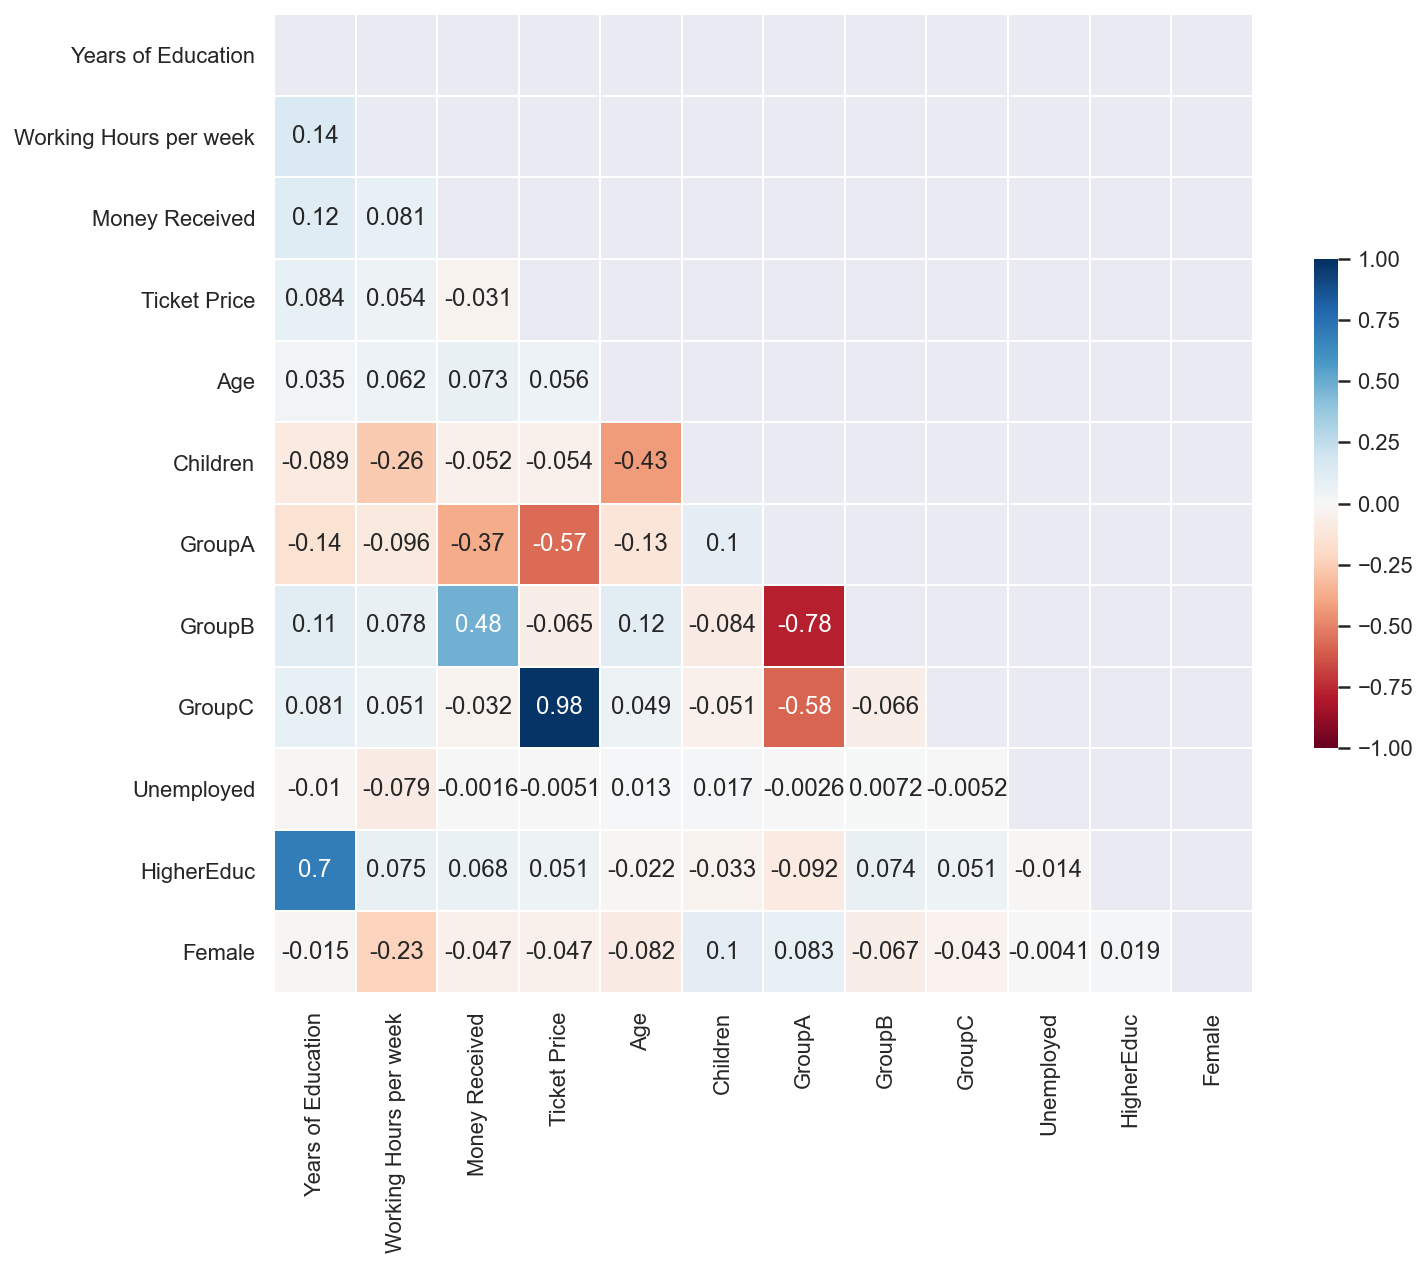

In [126]:
# Compute the correlation matrix - Pearson
corr = data_1.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Pearson correlation, we have:</font> <br>
- Either we have 'Group C' or 'Ticket Price'
- Either we have 'Years of Education' or 'HigherEduc'
- We should look and discuss both variables 'Group A' and 'Group B'

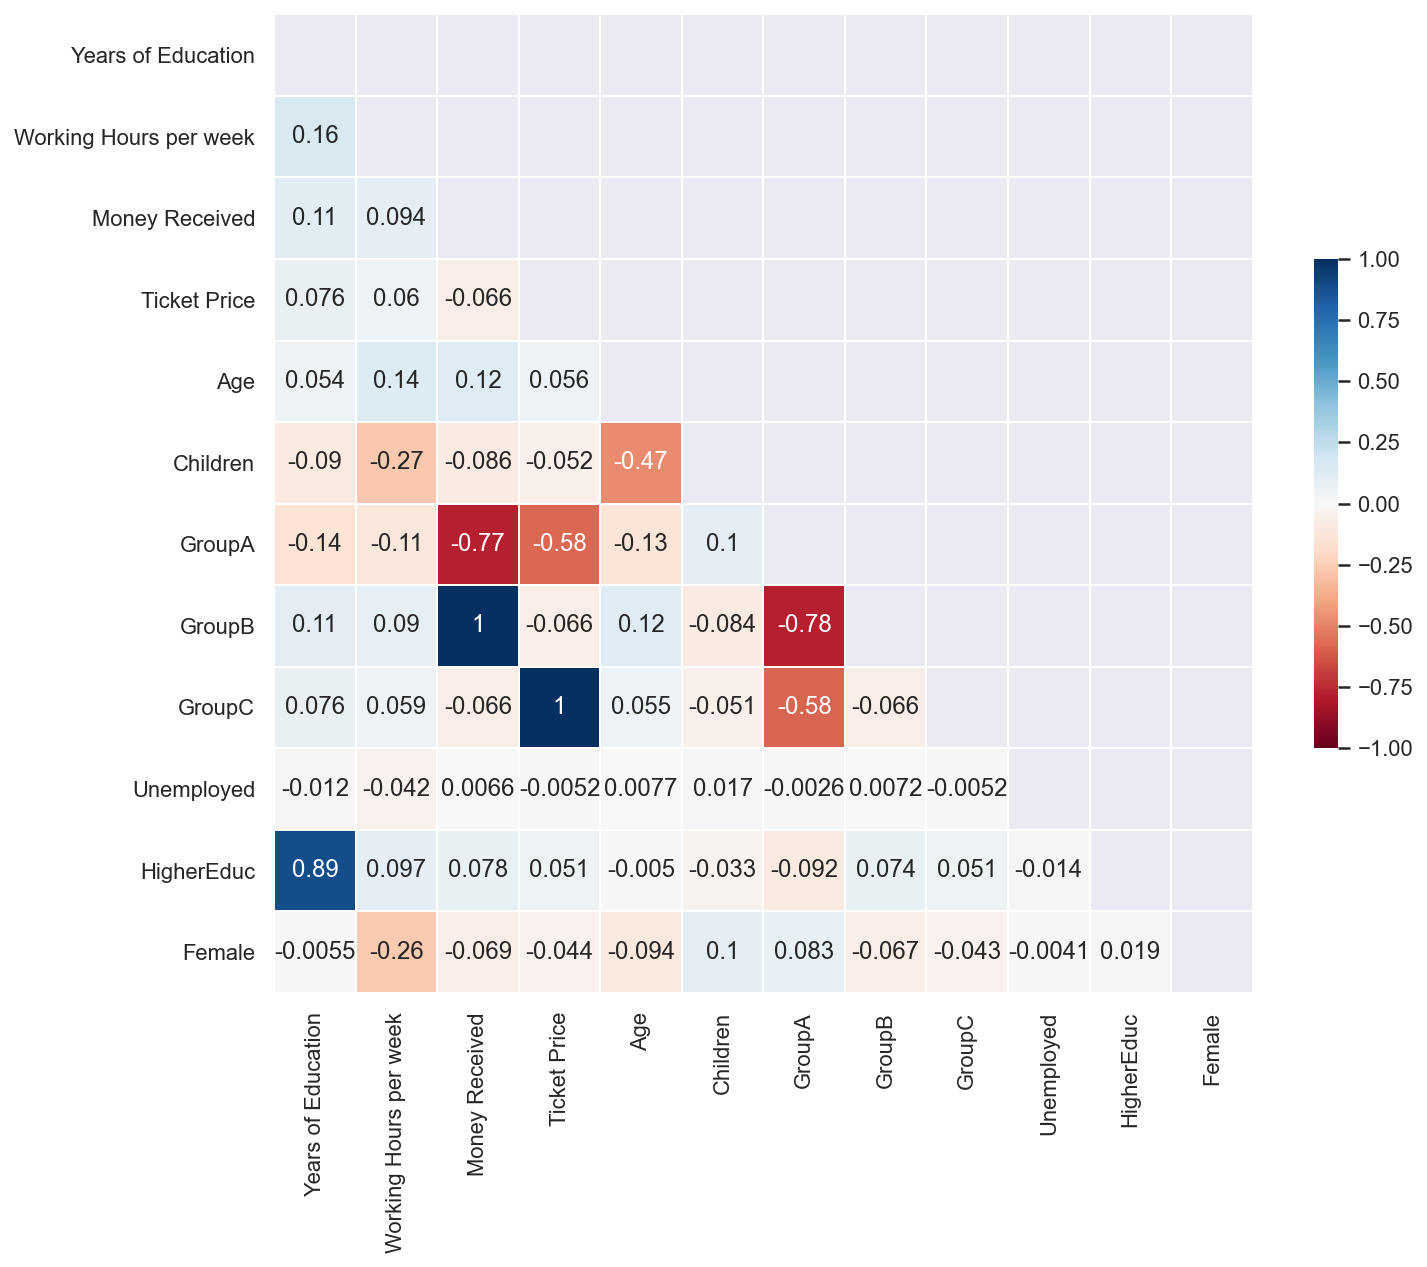

In [127]:
# Compute the correlation matrix - Spearman
corr = data_1.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<font color='darkblue'>If we consider a treshold of |0.70| for Spearman correlation, we have:</font> <br>
- Either we have 'Group C' or 'Ticket Price'
- Either we have 'Group B' or 'Money Received'
- Either we have 'Years of Education' or 'HigherEduc'
- Either we have 'Group A' or 'Money Received'
- Either we have 'Group A' or 'Group B' <br>

**Conclusion:** <br>
We should keep 'Ticket Price', 'Money Received', 'Years of Education'

In [128]:
data_1.dtypes

Years of Education        float64
Working Hours per week    float64
Money Received            float64
Ticket Price              float64
Age                       float64
Children                    int32
GroupA                      int32
GroupB                      int32
GroupC                      int32
Unemployed                  int32
HigherEduc                  int32
Female                      int32
dtype: object

**Check the correlation of the variables chosen from Pearson correlation matrix**

In [129]:
# Keep the variables from Pearson Correlation Matrix
PearsonData = data_1.drop(columns = ['GroupB', 'GroupC', 'HigherEduc']) 

In [130]:
PearsonData.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   

            Ticket Price       Age  Children  GroupA  Unemployed  Female  
CITIZEN_ID                                                                
12486           4.331412  0.470674         0       0           0       0  
12487          -0.218131  0.250627         0       1           0       0  
12488           4.427487  0.030579         0       0           0       0  
12489          -0.218131  1.790959         0       0           0       0  
12490          -0.218131 -0.409516         0       1           0       0

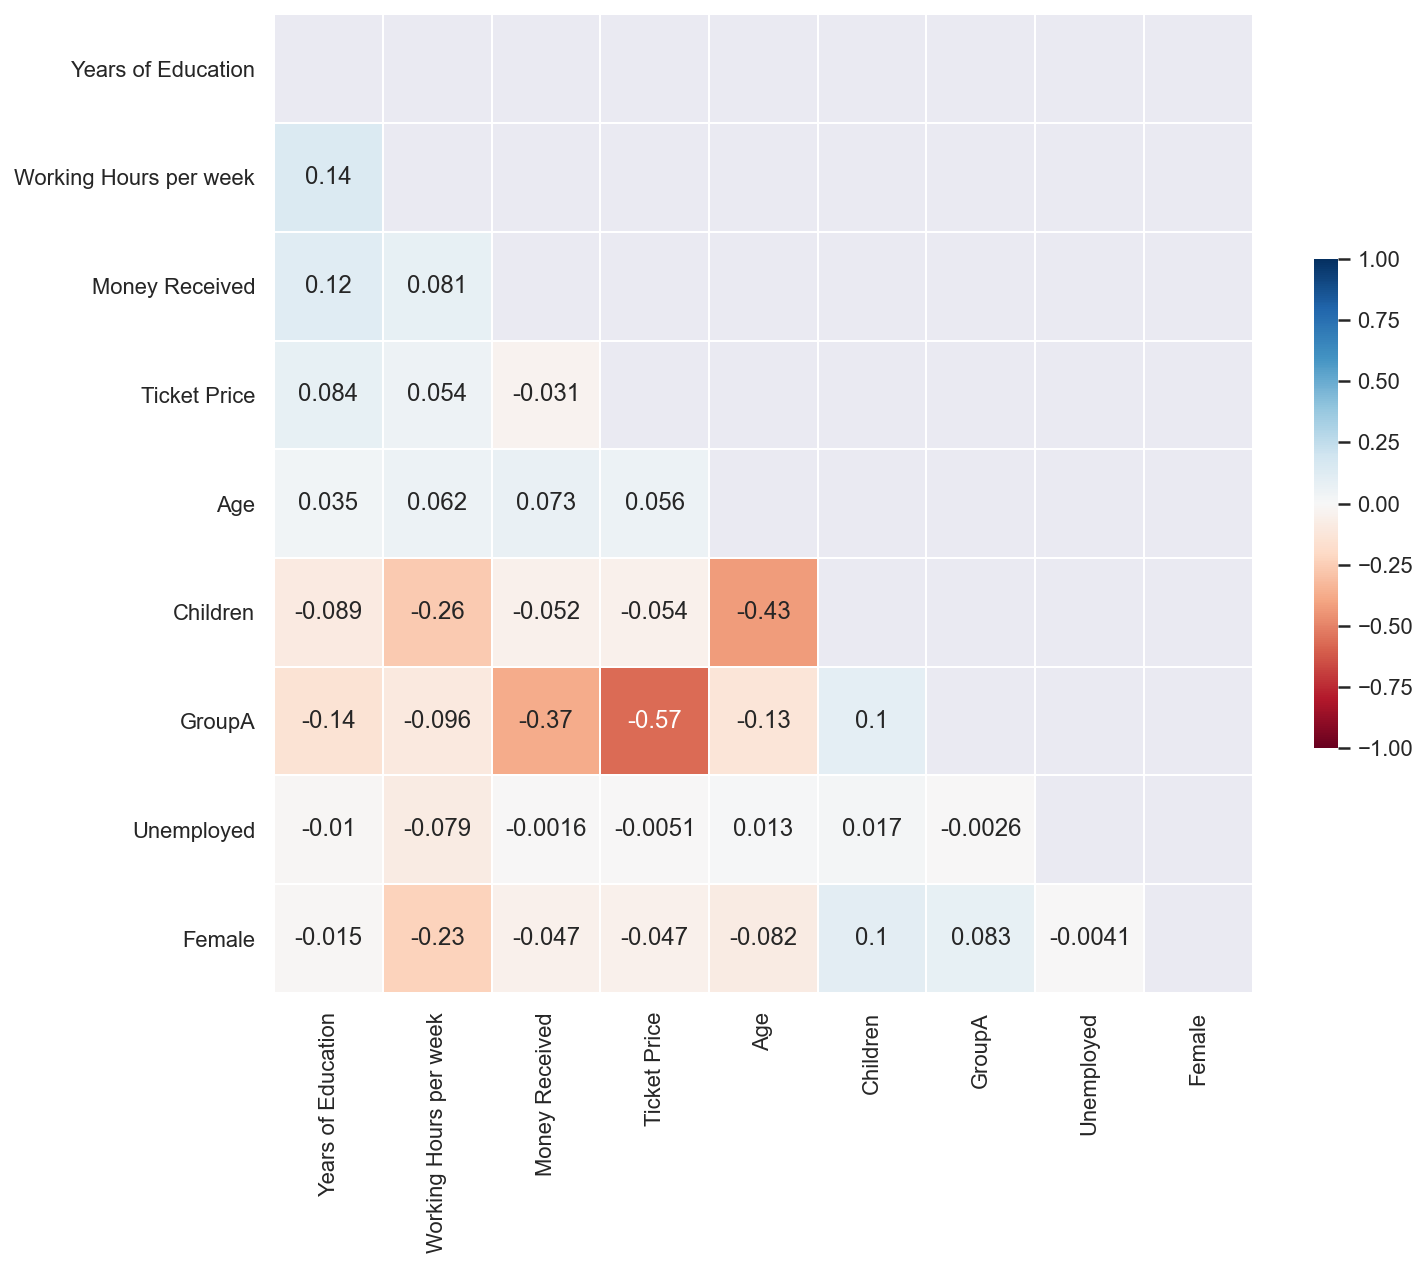

In [131]:
# Compute the correlation matrix
corr = PearsonData.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

**Check the correlation of the variables chosen from Spearman correlation matrix**

In [132]:
# Keep the variables from Spearman Correlation Matrix
SpearmanData = data_1.drop(columns = ['GroupA', 'GroupB', 'GroupC', 'HigherEduc']) 

In [133]:
SpearmanData.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   

            Ticket Price       Age  Children  Unemployed  Female  
CITIZEN_ID                                                        
12486           4.331412  0.470674         0           0       0  
12487          -0.218131  0.250627         0           0       0  
12488           4.427487  0.030579         0           0       0  
12489          -0.218131  1.790959         0           0       0  
12490          -0.218131 -0.409516         0           0       0

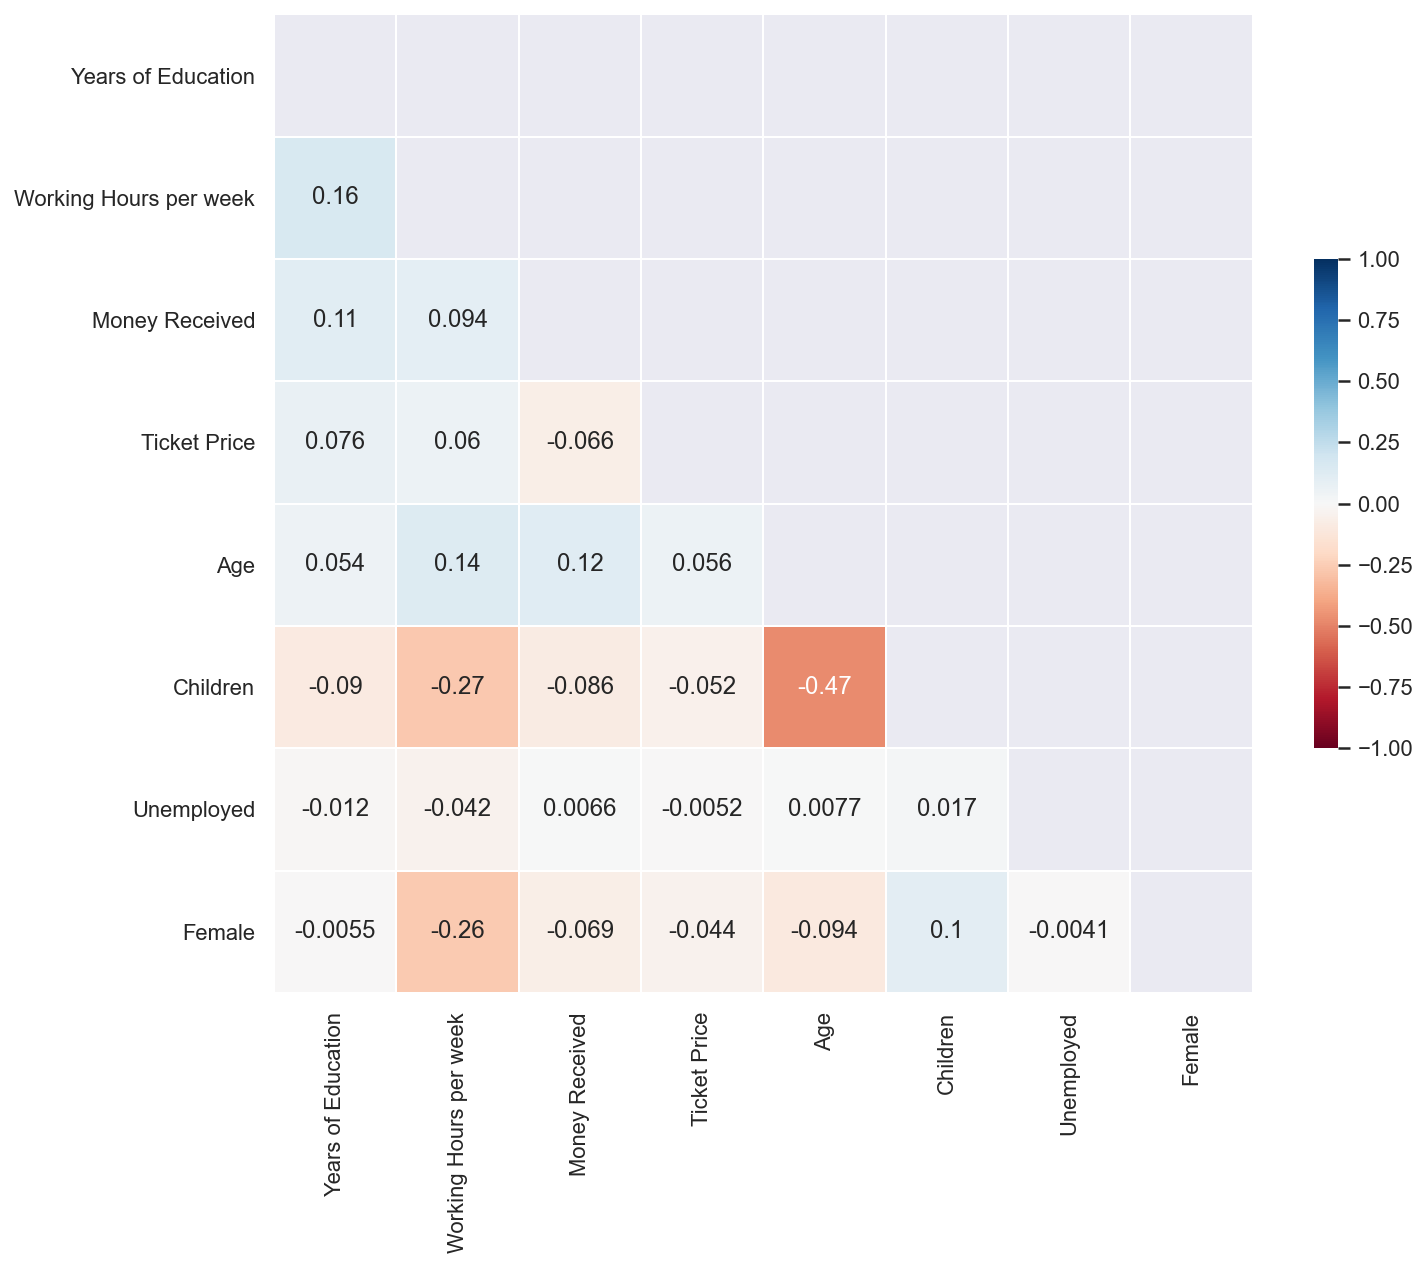

In [134]:
# Compute the correlation matrix
corr = SpearmanData.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

<a class="anchor" id="rfe">

## 15.2. Recursive Feature Elimination - RFE

</a>

In [135]:
data.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   

            Ticket Price       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                             
12486           4.331412  0.470674         0       0       0       1   
12487          -0.218131  0.250627         0       1       0       0   
12488           4.427487  0.030579         0       0       0       1   
12489          -0.218131  1.790959         0       0       1       0   
12490          -0.218131 -0.409516         0       1       0       0   

            Unemployed  ...  x6_Household Services  x6_IT  \
CITIZEN_ID              ...                                 
12486                0  ...                    0.0    0.0   
12487                0  ...                    0.0    0.0   
12488                0  ...                    0.0    0.0   
12489                0  ...                    0.0    0.0   
12490                0  ...                    0.0    0.0   

            x6_Machine Operators & Inspectors  x6_Management  \
CITIZEN_ID                                                     
12486                                     0.0            0.0   
12487                                     0.0            0.0   
12488                                     0.0            0.0   
12489                                     0.0            0.0   
12490                                     0.0            0.0   

            x6_Other services  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID                                                               
12486                     0.0           0.0                        1.0   
12487                     0.0           0.0                        1.0   
12488                     0.0           0.0                        0.0   
12489                     0.0           0.0                        0.0   
12490                     0.0           1.0                        0.0   

            x6_Sales  x6_Security  x6_Transports  
CITIZEN_ID                                        
12486            0.0          0.0            0.0  
12487            0.0          0.0            0.0  
12488            1.0          0.0            0.0  
12489            0.0          1.0            0.0  
12490            0.0          0.0            0.0  

[5 rows x 100 columns]

In [136]:
model = LogisticRegression()

In [137]:
rfe = RFE(estimator = model)

In [138]:
X_rfe = rfe.fit_transform(X = data[metric_features], y = target) 

In [139]:
model.fit(X = X_rfe,y = target)

LogisticRegression()

In [140]:
rfe.support_

array([ True, False,  True, False, False])

In [141]:
rfe.ranking_

array([1, 3, 1, 4, 2])

In [142]:
selected_features = pd.Series(rfe.support_, index = metric_features)
selected_features[selected_features==True]

Years of Education    True
Money Received        True
dtype: bool

In [143]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(data[metric_features], target, test_size = 0.3, random_state = 0)
    
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.815884


<a class="anchor" id="lasso">

## 15.3. LASSO Regression

</a>

In [144]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,20))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [145]:
reg = LassoCV()

In [146]:
reg.fit(X=data, y=target)

LassoCV()

In [147]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.000142


In [148]:
print("Best score using built-in LassoCV: %f" %reg.score(X = data, y = target))

Best score using built-in LassoCV: 0.376249


In [149]:
coef = pd.Series(reg.coef_, index = data.columns)

In [150]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 61 variables and eliminated the other 39 variables


In [151]:
coef.sort_values().tail(20)

x4_Primary School                0.033374
x6_Sales                         0.034654
Working Hours per week           0.038577
x6_Security                      0.044133
Years of Education               0.044426
x3_Eelry                         0.048905
x1_Married                       0.058966
x3_Alverton                      0.059159
x5_Self-Employed (Company)       0.060069
x4_Bachelors + PostGraduation    0.060763
x6_IT                            0.061011
x5_Public Sector - Government    0.085293
Ticket Price                     0.094306
x6_Management                    0.120952
x4_Masters                       0.126470
x2_Wife                          0.181571
x4_Masters + PostGraduation      0.185945
x4_PhD                           0.186955
GroupB                           0.210936
x2_Husband                       0.299683
dtype: float64

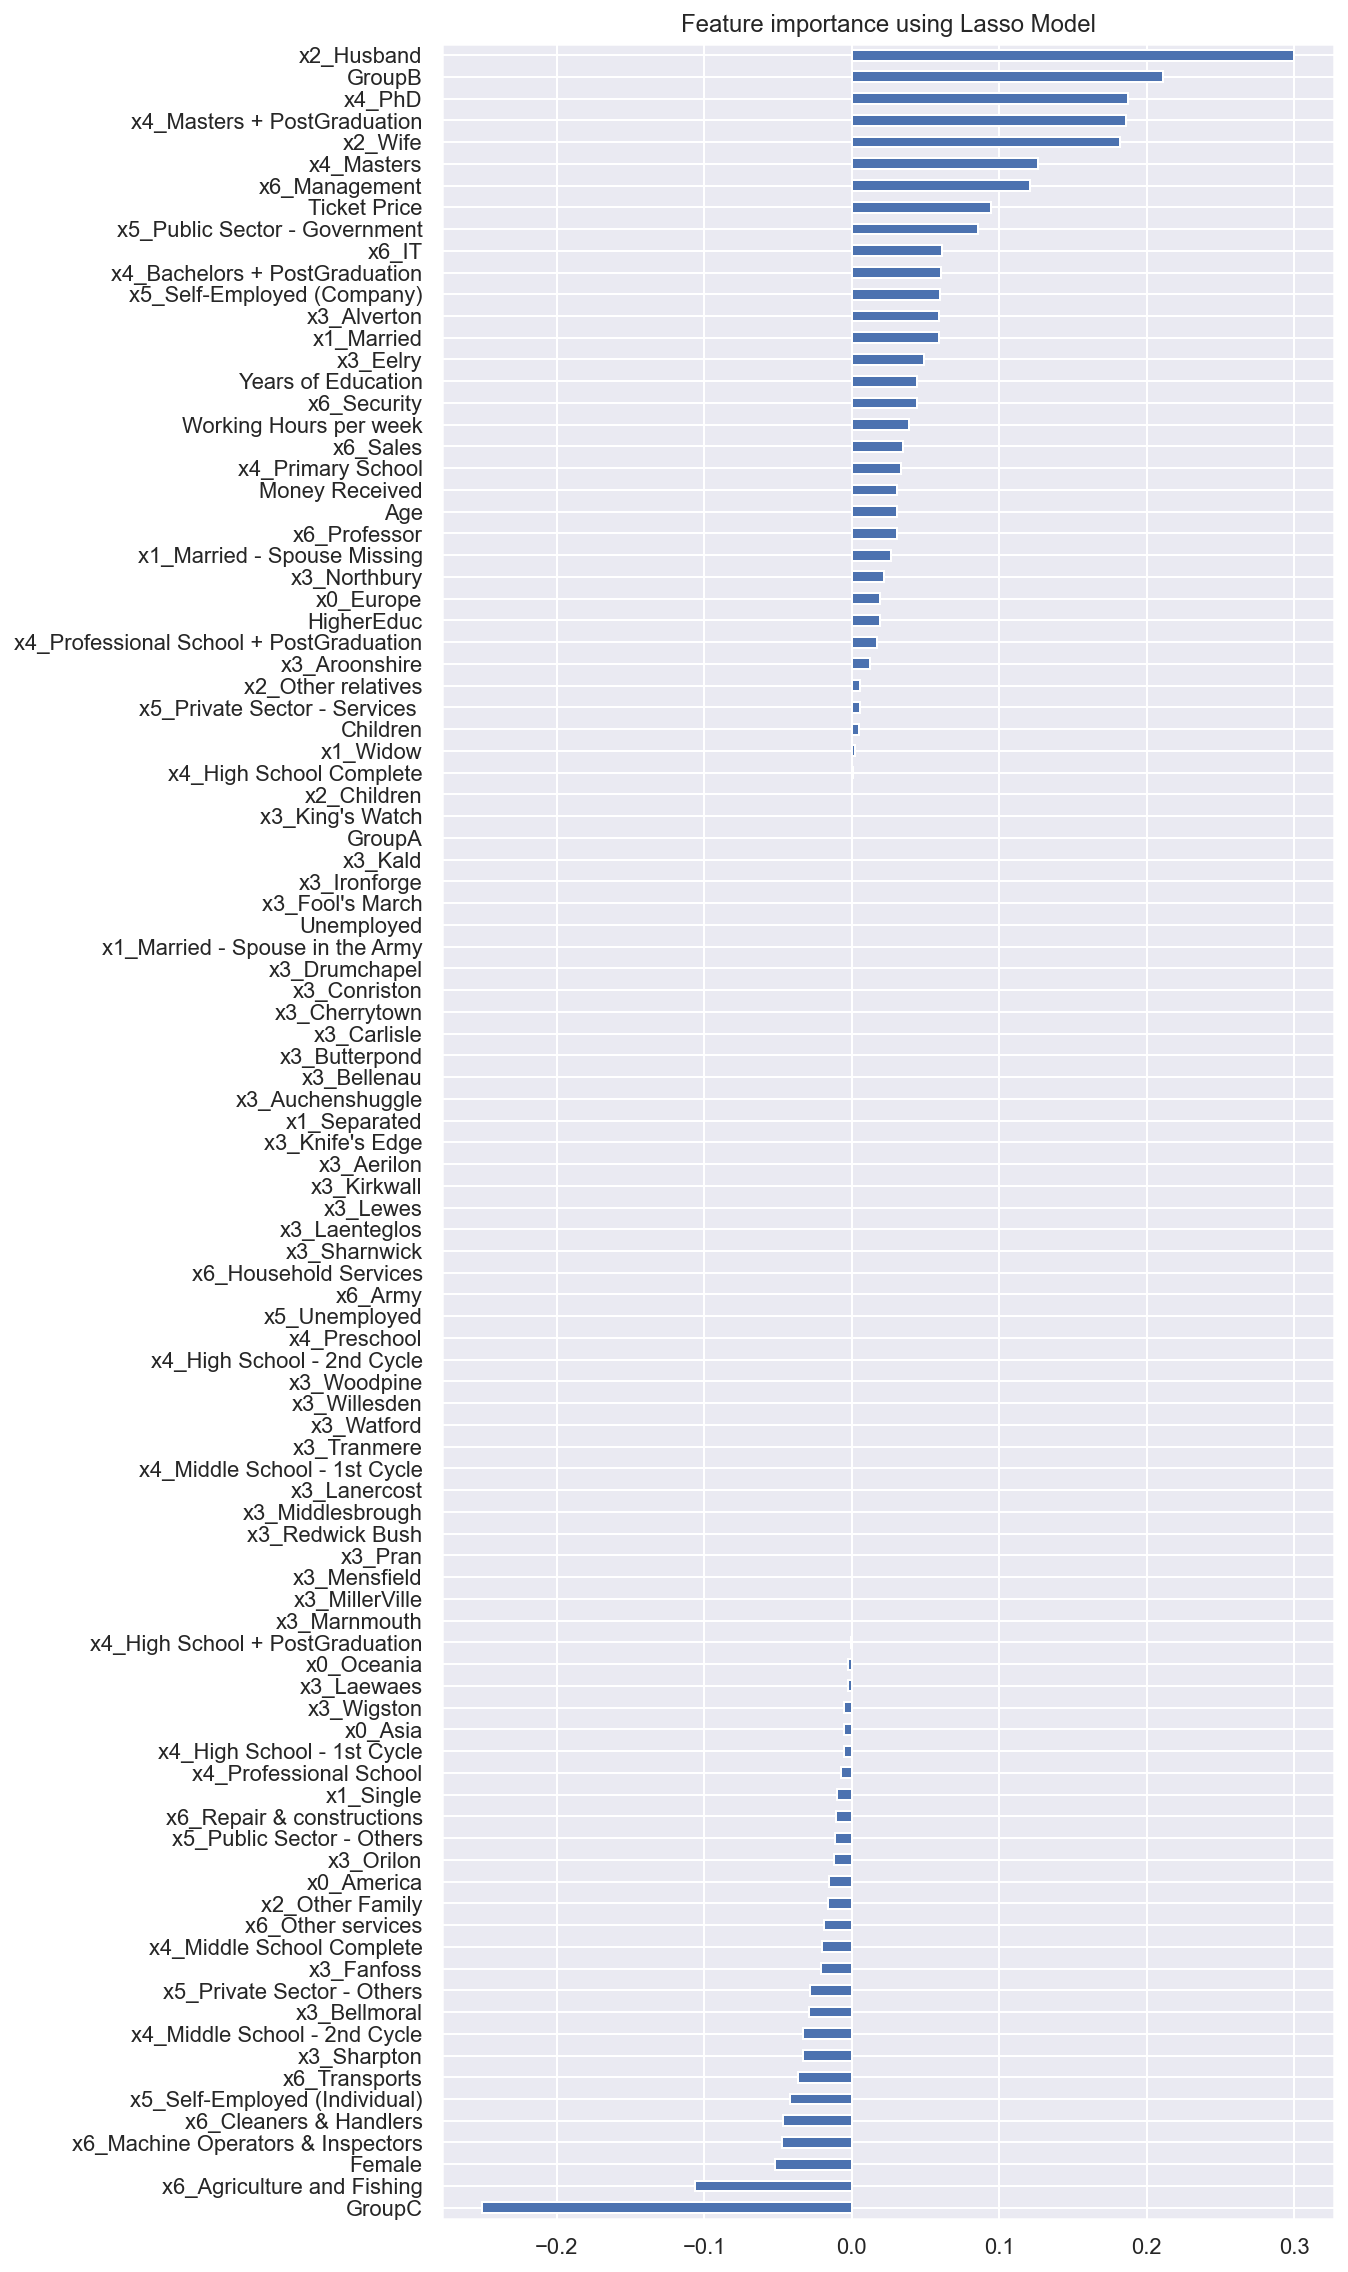

In [152]:
plot_importance(coef,'Lasso')

<a class="anchor" id="ridge">

## 15.4. RIDGE Regression

</a>

In [153]:
ridge = RidgeCV()

In [154]:
ridge.fit(X = data, y = target)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [155]:
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)

Best alpha using built-in RidgeCV: 10.000000


In [156]:
print("Best score using built-in RidgeCV: %f" %ridge.score(data, target))

Best score using built-in RidgeCV: 0.377327


In [157]:
coef_ridge = pd.Series(ridge.coef_, index = data.columns)
coef_ridge.sort_values().tail(20)

x4_Bachelors + PostGraduation      0.059766
Years of Education                 0.059769
x3_Middlesbrough                   0.060217
x3_Kald                            0.064079
x6_IT                              0.064508
x1_Married                         0.069908
x5_Public Sector - Government      0.072771
x4_Primary School                  0.078512
x3_Alverton                        0.081419
x3_Eelry                           0.092977
Ticket Price                       0.099841
x4_Preschool                       0.103199
x6_Management                      0.120249
x4_Masters                         0.121921
x1_Married - Spouse in the Army    0.124091
x4_PhD                             0.162080
x2_Wife                            0.173507
x4_Masters + PostGraduation        0.175863
GroupB                             0.232662
x2_Husband                         0.292730
dtype: float64

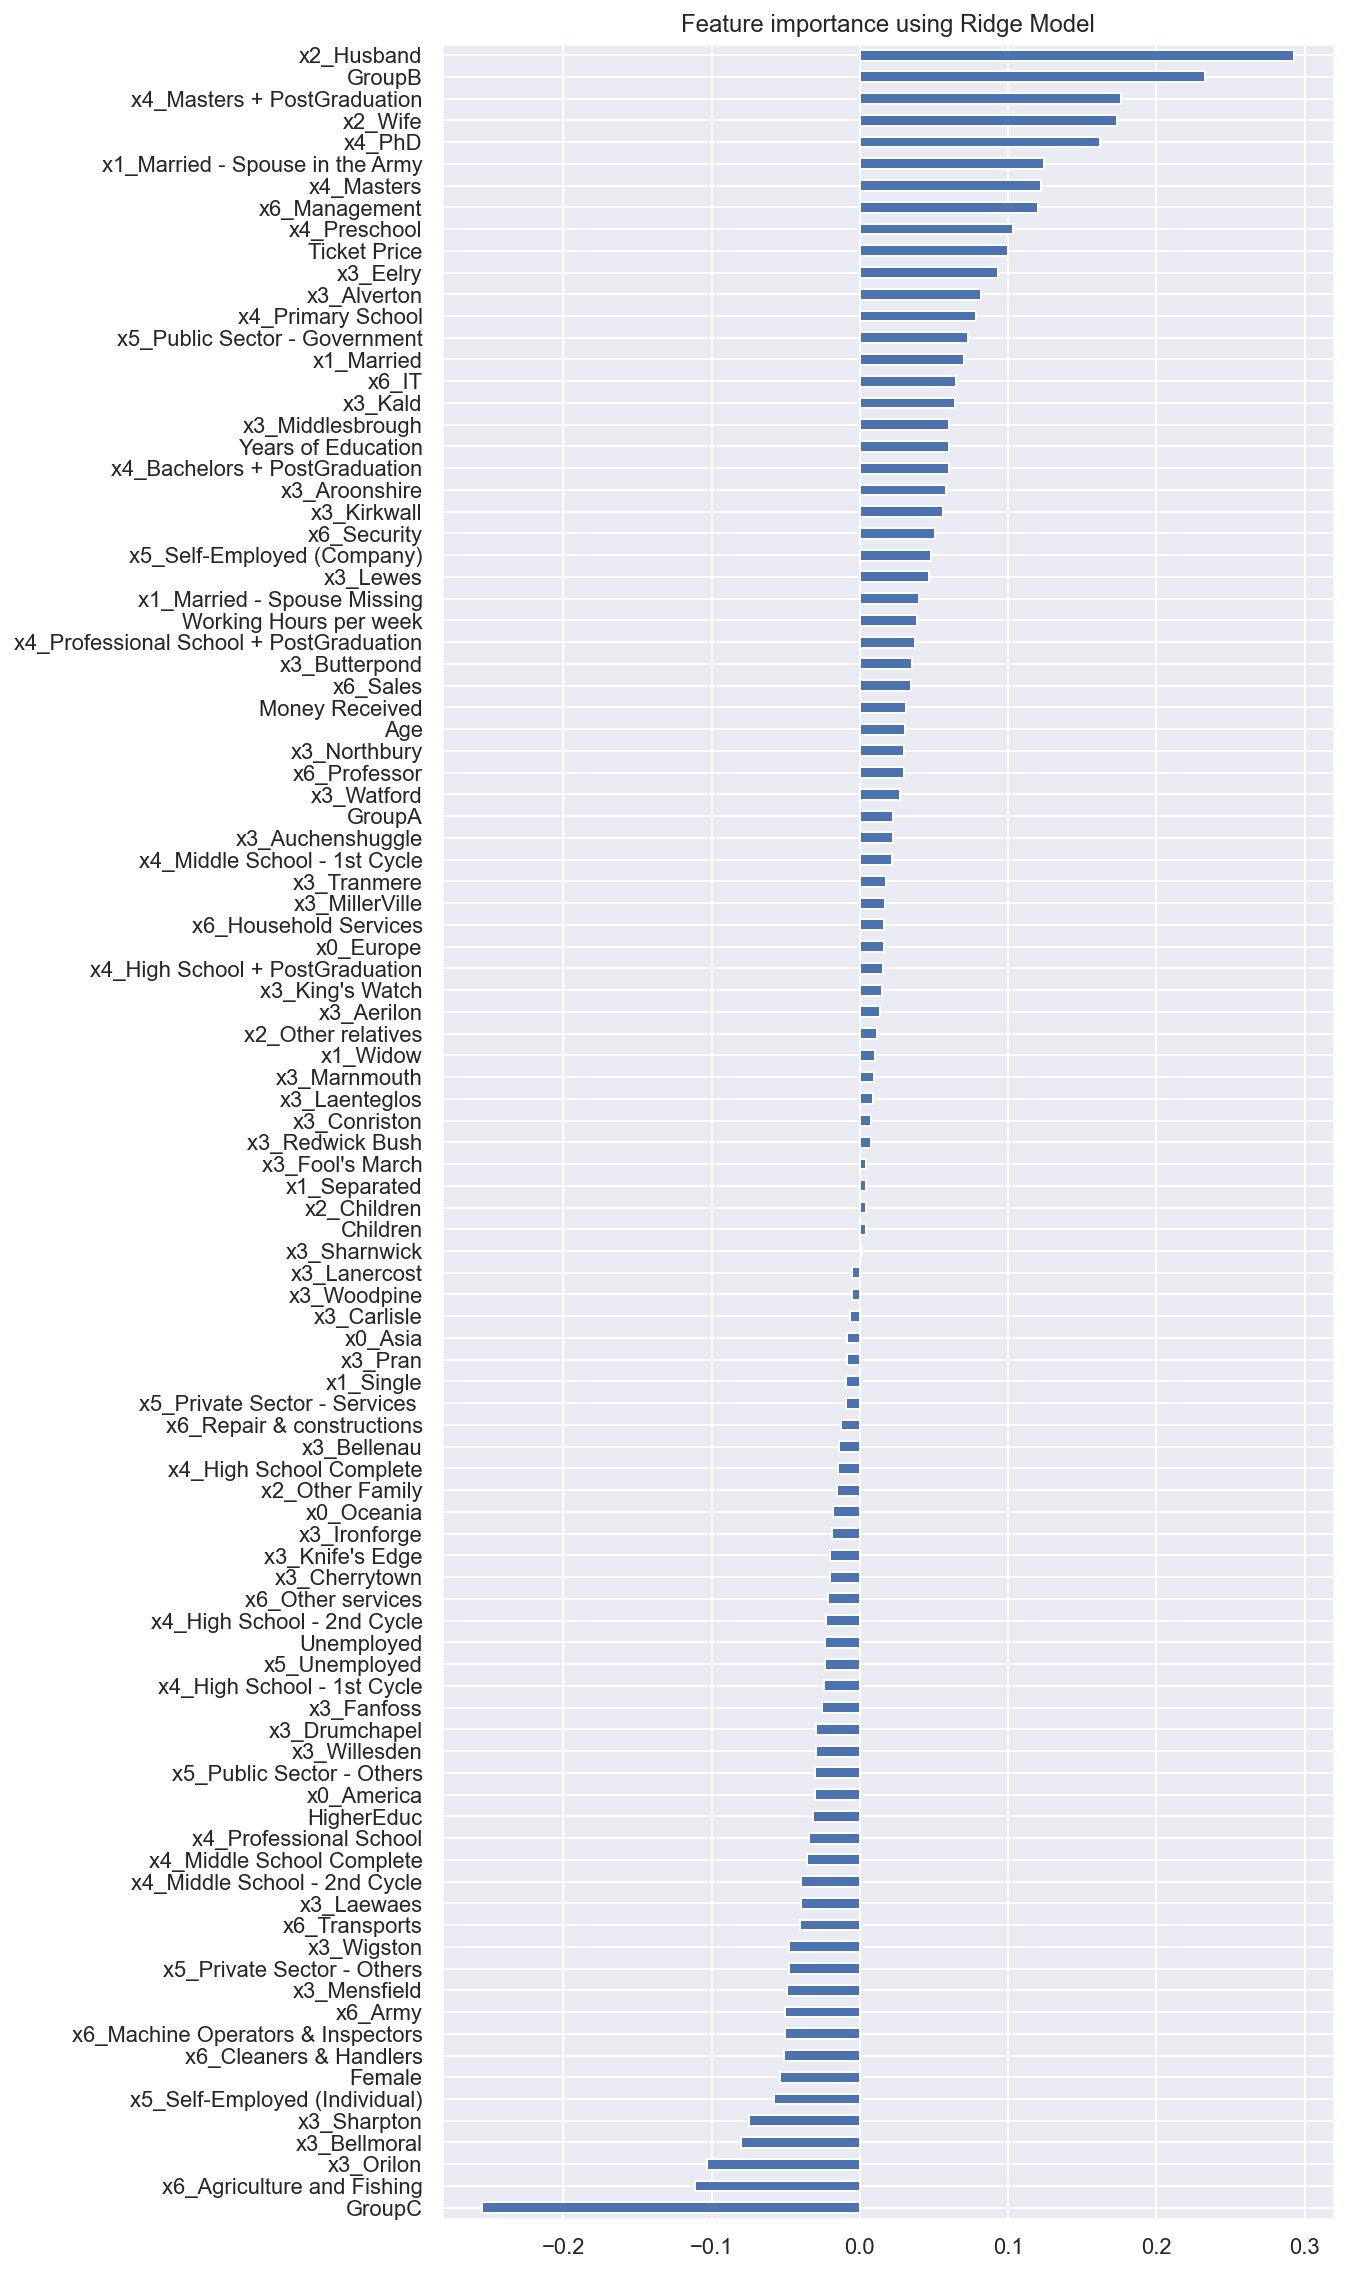

In [158]:
plot_importance(coef_ridge,'Ridge')

<a class="anchor" id="chisquare">

## 15.5. Chi-Square

</a>

In [159]:
from sklearn.feature_selection import chi2

In [160]:
binary_features

['Children',
 'GroupA',
 'GroupB',
 'GroupC',
 'Unemployed',
 'HigherEduc',
 'Female']

In [161]:
encoded = data.columns[data.columns.str.startswith('x')].tolist()
encoded

['x0_America',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Married',
 'x1_Married - Spouse Missing',
 'x1_Married - Spouse in the Army',
 'x1_Separated',
 'x1_Single',
 'x1_Widow',
 'x2_Children',
 'x2_Husband',
 'x2_Other Family',
 'x2_Other relatives',
 'x2_Wife',
 'x3_Aerilon',
 'x3_Alverton',
 'x3_Aroonshire',
 'x3_Auchenshuggle',
 'x3_Bellenau',
 'x3_Bellmoral',
 'x3_Butterpond',
 'x3_Carlisle',
 'x3_Cherrytown',
 'x3_Conriston',
 'x3_Drumchapel',
 'x3_Eelry',
 'x3_Fanfoss',
 "x3_Fool's March",
 'x3_Ironforge',
 'x3_Kald',
 "x3_King's Watch",
 'x3_Kirkwall',
 "x3_Knife's Edge",
 'x3_Laenteglos',
 'x3_Laewaes',
 'x3_Lanercost',
 'x3_Lewes',
 'x3_Marnmouth',
 'x3_Mensfield',
 'x3_Middlesbrough',
 'x3_MillerVille',
 'x3_Northbury',
 'x3_Orilon',
 'x3_Pran',
 'x3_Redwick Bush',
 'x3_Sharnwick',
 'x3_Sharpton',
 'x3_Tranmere',
 'x3_Watford',
 'x3_Wigston',
 'x3_Willesden',
 'x3_Woodpine',
 'x4_Bachelors + PostGraduation',
 'x4_High School + PostGraduation',
 'x4_High School - 1st Cyc

In [162]:
chi_features = ['x0_America',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Married',
 'x1_Married - Spouse Missing',
 'x1_Married - Spouse in the Army',
 'x1_Separated',
 'x1_Single',
 'x1_Widow',
 'x2_Children',
 'x2_Husband',
 'x2_Other Family',
 'x2_Other relatives',
 'x2_Wife',
 'x3_Aerilon',
 'x3_Alverton',
 'x3_Aroonshire',
 'x3_Auchenshuggle',
 'x3_Bellenau',
 'x3_Bellmoral',
 'x3_Butterpond',
 'x3_Carlisle',
 'x3_Cherrytown',
 'x3_Conriston',
 'x3_Drumchapel',
 'x3_Eelry',
 'x3_Fanfoss',
 "x3_Fool's March",
 'x3_Ironforge',
 'x3_Kald',
 "x3_King's Watch",
 'x3_Kirkwall',
 "x3_Knife's Edge",
 'x3_Laenteglos',
 'x3_Laewaes',
 'x3_Lanercost',
 'x3_Lewes',
 'x3_Marnmouth',
 'x3_Mensfield',
 'x3_Middlesbrough',
 'x3_MillerVille',
 'x3_Northbury',
 'x3_Orilon',
 'x3_Pran',
 'x3_Redwick Bush',
 'x3_Sharnwick',
 'x3_Sharpton',
 'x3_Tranmere',
 'x3_Watford',
 'x3_Wigston',
 'x3_Willesden',
 'x3_Woodpine',
 'x4_Bachelors + PostGraduation',
 'x4_High School + PostGraduation',
 'x4_High School - 1st Cycle',
 'x4_High School - 2nd Cycle',
 'x4_High School Complete',
 'x4_Masters',
 'x4_Masters + PostGraduation',
 'x4_Middle School - 1st Cycle',
 'x4_Middle School - 2nd Cycle',
 'x4_Middle School Complete',
 'x4_PhD',
 'x4_Preschool',
 'x4_Primary School',
 'x4_Professional School',
 'x4_Professional School + PostGraduation',
 'x5_Private Sector - Others',
 'x5_Private Sector - Services ',
 'x5_Public Sector - Government',
 'x5_Public Sector - Others',
 'x5_Self-Employed (Company)',
 'x5_Self-Employed (Individual)',
 'x5_Unemployed',
 'x6_Agriculture and Fishing',
 'x6_Army',
 'x6_Cleaners & Handlers',
 'x6_Household Services',
 'x6_IT',
 'x6_Machine Operators & Inspectors',
 'x6_Management',
 'x6_Other services',
 'x6_Professor',
 'x6_Repair & constructions',
 'x6_Sales',
 'x6_Security',
 'x6_Transports', 'Children',
 'GroupA',
 'GroupB',
 'GroupC',
 'Unemployed',
 'HigherEduc',
 'Female']
chi_features

['x0_America',
 'x0_Asia',
 'x0_Europe',
 'x0_Oceania',
 'x1_Married',
 'x1_Married - Spouse Missing',
 'x1_Married - Spouse in the Army',
 'x1_Separated',
 'x1_Single',
 'x1_Widow',
 'x2_Children',
 'x2_Husband',
 'x2_Other Family',
 'x2_Other relatives',
 'x2_Wife',
 'x3_Aerilon',
 'x3_Alverton',
 'x3_Aroonshire',
 'x3_Auchenshuggle',
 'x3_Bellenau',
 'x3_Bellmoral',
 'x3_Butterpond',
 'x3_Carlisle',
 'x3_Cherrytown',
 'x3_Conriston',
 'x3_Drumchapel',
 'x3_Eelry',
 'x3_Fanfoss',
 "x3_Fool's March",
 'x3_Ironforge',
 'x3_Kald',
 "x3_King's Watch",
 'x3_Kirkwall',
 "x3_Knife's Edge",
 'x3_Laenteglos',
 'x3_Laewaes',
 'x3_Lanercost',
 'x3_Lewes',
 'x3_Marnmouth',
 'x3_Mensfield',
 'x3_Middlesbrough',
 'x3_MillerVille',
 'x3_Northbury',
 'x3_Orilon',
 'x3_Pran',
 'x3_Redwick Bush',
 'x3_Sharnwick',
 'x3_Sharpton',
 'x3_Tranmere',
 'x3_Watford',
 'x3_Wigston',
 'x3_Willesden',
 'x3_Woodpine',
 'x4_Bachelors + PostGraduation',
 'x4_High School + PostGraduation',
 'x4_High School - 1st Cyc

In [163]:
chi_scores = chi2(data[chi_features], target)
chi_scores

(array([1.82566004e+01, 2.06095115e+00, 2.66500574e+01, 2.78533003e+01,
        2.30422582e+03, 2.80430817e+01, 5.35959196e+00, 1.16445374e+02,
        1.46250743e+03, 8.33439754e+01, 9.66986049e+02, 3.45107835e+02,
        5.56556502e+02, 1.55146502e+02, 2.06052224e+03, 1.40924009e-02,
        4.97194197e+00, 6.95669267e-01, 9.87951980e+00, 7.57061233e-03,
        9.93647167e+00, 3.03328145e+00, 1.57588161e+00, 1.07245231e+01,
        1.13559185e-02, 1.89036675e+00, 5.90578307e+00, 9.19510317e+01,
        6.37945904e-03, 3.10478655e-01, 4.28784438e+00, 8.92199273e+00,
        2.82917260e+00, 5.80970727e+00, 5.07511336e+00, 8.65033377e+00,
        7.36300295e+00, 1.51412247e-02, 1.84736760e-01, 2.79430789e+00,
        2.20095408e-01, 3.07632917e-01, 3.18692191e+00, 1.56024344e-01,
        1.07671805e+01, 7.57061233e-03, 1.21805065e+01, 4.36021673e-03,
        3.11088131e+00, 2.67504195e+00, 9.23683798e-01, 2.69240816e+00,
        2.79430789e+00, 5.85578209e+02, 7.56733459e+01, 1.110850

In [164]:
p_values = pd.Series(chi_scores[1],index = chi_features)
p_values.sort_values(ascending = False , inplace = True)

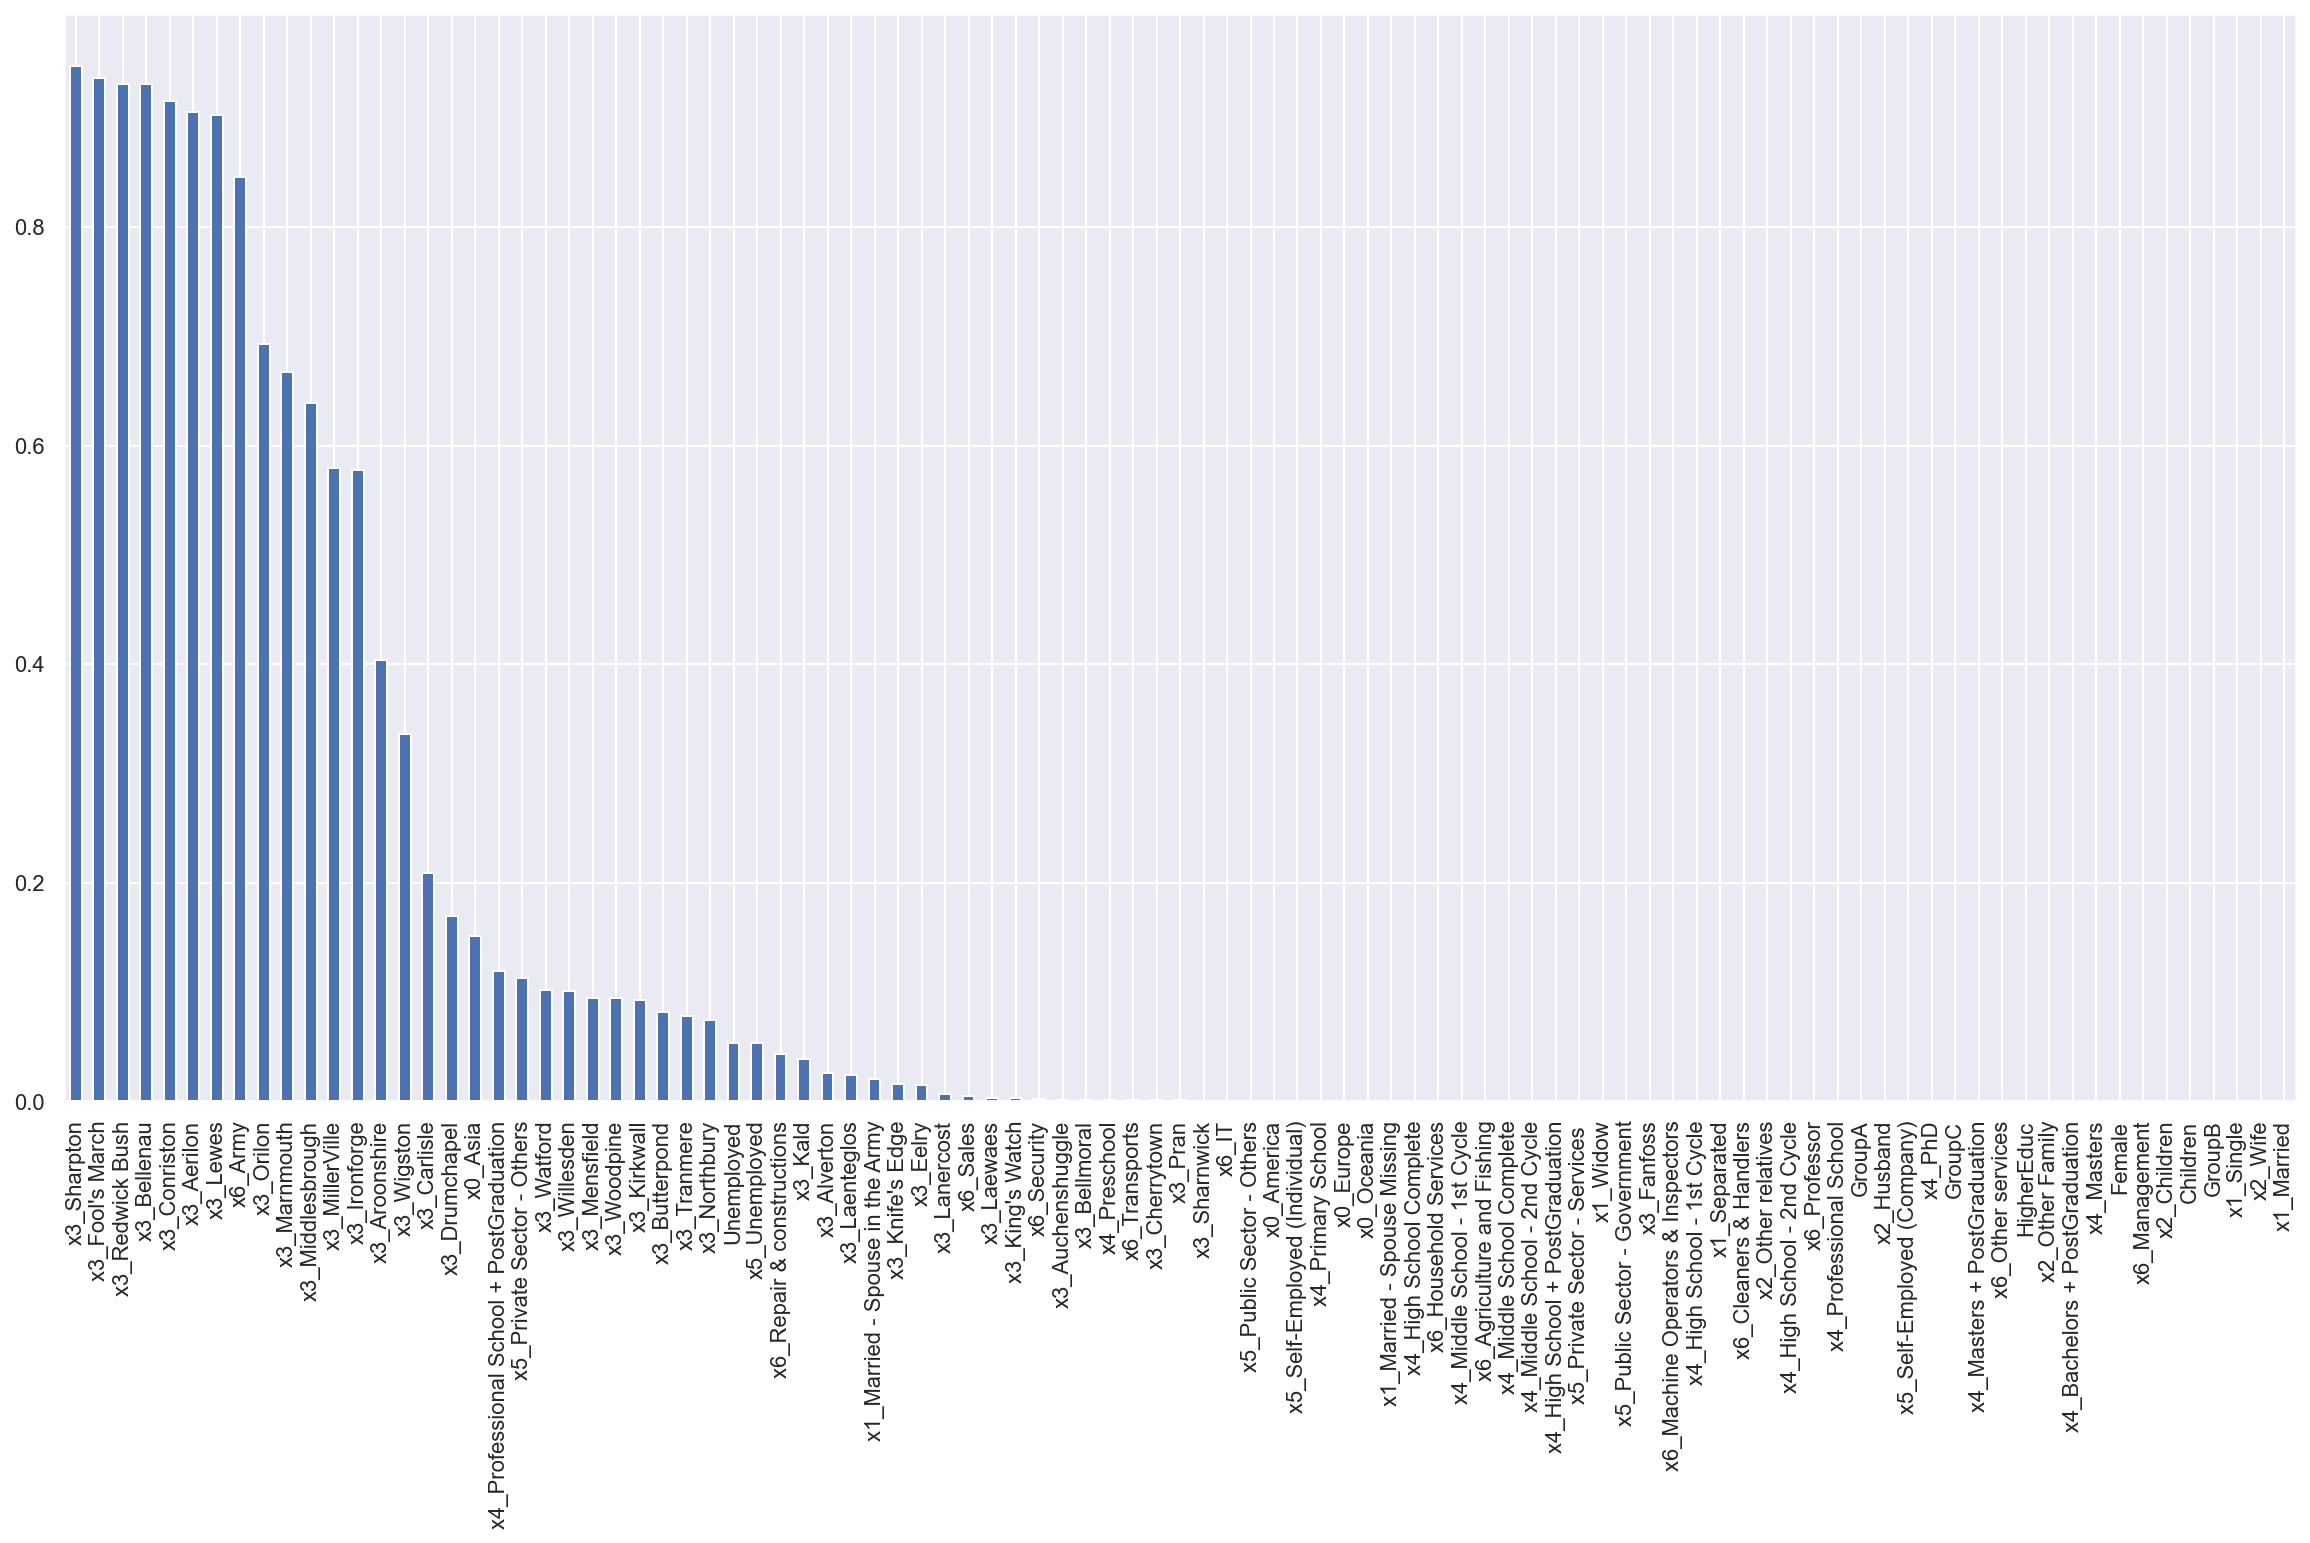

In [165]:
plt.figure(figsize=(20,10))
p_values.plot.bar()

In [166]:
chi2_features=SelectKBest(chi2,k=10)
best_features=chi2_features.fit_transform(data[chi_features],target)
cols=chi2_features.get_support(indices=True)
features_to_keep=data.iloc[:,cols]
features_to_keep.columns

Index(['Age', 'GroupC', 'HigherEduc', 'x0_Europe', 'x3_MillerVille',
       'x3_Sharnwick', 'x5_Private Sector - Services ', 'x6_Army',
       'x6_Household Services', 'x6_Other services'],
      dtype='object')

<a class="anchor" id="pca">

## 15.6. Principal Components Analysis - PCA

</a>

In [167]:
df_pca = data.copy()

In [168]:
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  

In [169]:
pca_df

PC0       PC1       PC2       PC3       PC4
CITIZEN_ID                                                  
12486       1.278982  3.593810  0.338285  1.399439  1.544021
12487      -0.312260 -0.063896  0.400037 -0.285671  0.077225
12488       1.194250  3.641971 -0.009012  0.981257  2.105215
12489       0.120813 -0.271184  2.036460 -0.128715  0.135571
12490       1.724310 -0.140015 -1.707056  0.457431 -2.008147
...              ...       ...       ...       ...       ...
34880       0.640475 -0.113703 -0.784137 -0.111644 -0.725343
34881      -0.744966 -0.177378 -0.700099 -0.139114  0.427878
34882      -1.018988 -0.198018 -0.733143  0.205914  0.356840
34883       0.543784 -0.355002 -1.398691  0.528847 -0.771052
34885      -0.594378 -0.199996 -1.052939 -0.002885  0.224947

[22286 rows x 5 columns]

In [170]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference  Proportion  Cumulative
1    1.290890    0.000000    0.258166    0.258166
2    1.030134   -0.260756    0.206018    0.464184
3    0.975551   -0.054583    0.195101    0.659285
4    0.889172   -0.086378    0.177826    0.837112
5    0.814478   -0.074694    0.162888    1.000000

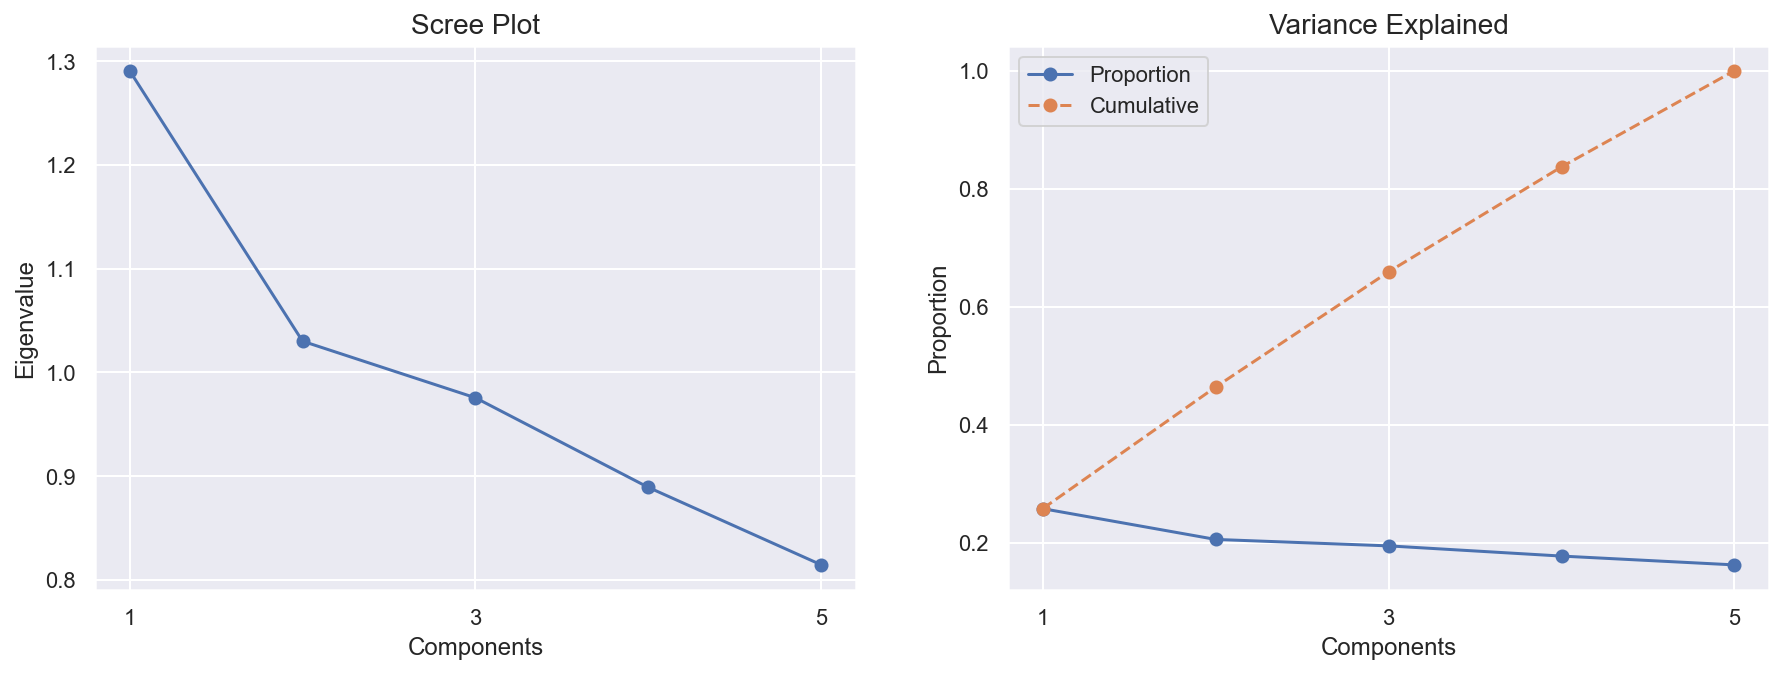

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [172]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

Years of Education  Working Hours per week  Money Received  \
CITIZEN_ID                                                               
12486                -0.068117               -0.015077       -0.143532   
12487                -0.466869               -0.015077       -0.143532   
12488                -0.466869                0.492873       -0.143532   
12489                -0.865621               -0.269052        0.439827   
12490                 3.121900                0.408215       -0.143532   

            Ticket Price       Age  Children  GroupA  GroupB  GroupC  \
CITIZEN_ID                                                             
12486           4.331412  0.470674         0       0       0       1   
12487          -0.218131  0.250627         0       1       0       0   
12488           4.427487  0.030579         0       0       0       1   
12489          -0.218131  1.790959         0       0       1       0   
12490          -0.218131 -0.409516         0       1       0       0   

            Unemployed  ...  x6_Professor  x6_Repair & constructions  \
CITIZEN_ID              ...                                            
12486                0  ...           0.0                        1.0   
12487                0  ...           0.0                        1.0   
12488                0  ...           0.0                        0.0   
12489                0  ...           0.0                        0.0   
12490                0  ...           1.0                        0.0   

            x6_Sales  x6_Security  x6_Transports       PC0       PC1  \
CITIZEN_ID                                                             
12486            0.0          0.0            0.0  1.278982  3.593810   
12487            0.0          0.0            0.0 -0.312260 -0.063896   
12488            1.0          0.0            0.0  1.194250  3.641971   
12489            0.0          1.0            0.0  0.120813 -0.271184   
12490            0.0          0.0            0.0  1.724310 -0.140015   

                 PC2       PC3       PC4  
CITIZEN_ID                                
12486       0.338285  1.399439  1.544021  
12487       0.400037 -0.285671  0.077225  
12488      -0.009012  0.981257  2.105215  
12489       2.036460 -0.128715  0.135571  
12490      -1.707056  0.457431 -2.008147  

[5 rows x 105 columns]

In [173]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

**Correlation between selected features**

In [174]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data, 15))

Top Absolute Correlations
Unemployed                     x5_Unemployed                    1.000000
Children                       x2_Children                      1.000000
Ticket Price                   GroupC                           0.980488
x1_Married                     x2_Wife                          0.894523
GroupA                         GroupB                           0.775635
HigherEduc                     x4_Professional School           0.759067
Years of Education             HigherEduc                       0.696078
x1_Married                     x1_Single                        0.643969
GroupA                         GroupC                           0.578301
Female                         x2_Wife                          0.577980
x1_Single                      x2_Wife                          0.576637
Ticket Price                   GroupA                           0.567017
x1_Married                     x2_Other Family                  0.536995
Age                      

<a class="anchor" id="anova">

## 15.7. ANOVA F-Values

</a>

*Input Variable* -> Numerical; *Output Variable* -> Categorical <br>

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different. Then, the algorithm selects features according to the k highest scores.

In [175]:
# Create an SelectKBest object to select features with best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(data, target)

In [176]:
# Show results
print('Original number of features:', data.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 100
Reduced number of features: 10


In [177]:
# Get columns to keep and create new dataframe with those only
cols = fvalue_selector.get_support(indices=True)
features_to_keep = data.iloc[:,cols]
features_to_keep.columns

Index(['Years of Education', 'Working Hours per week', 'Age', 'GroupA',
       'GroupB', 'HigherEduc', 'x1_Married', 'x1_Single', 'x2_Children',
       'x2_Wife'],
      dtype='object')

### Candidates to be the Selected variables

In [178]:
feature_variables=["x1_Married","Age","Years of Education","Money Received","Ticket Price","Working Hours per week",
                       'x6_Management', 'x2_Husband','GroupB','x2_Wife','GroupC','HigherEduc']

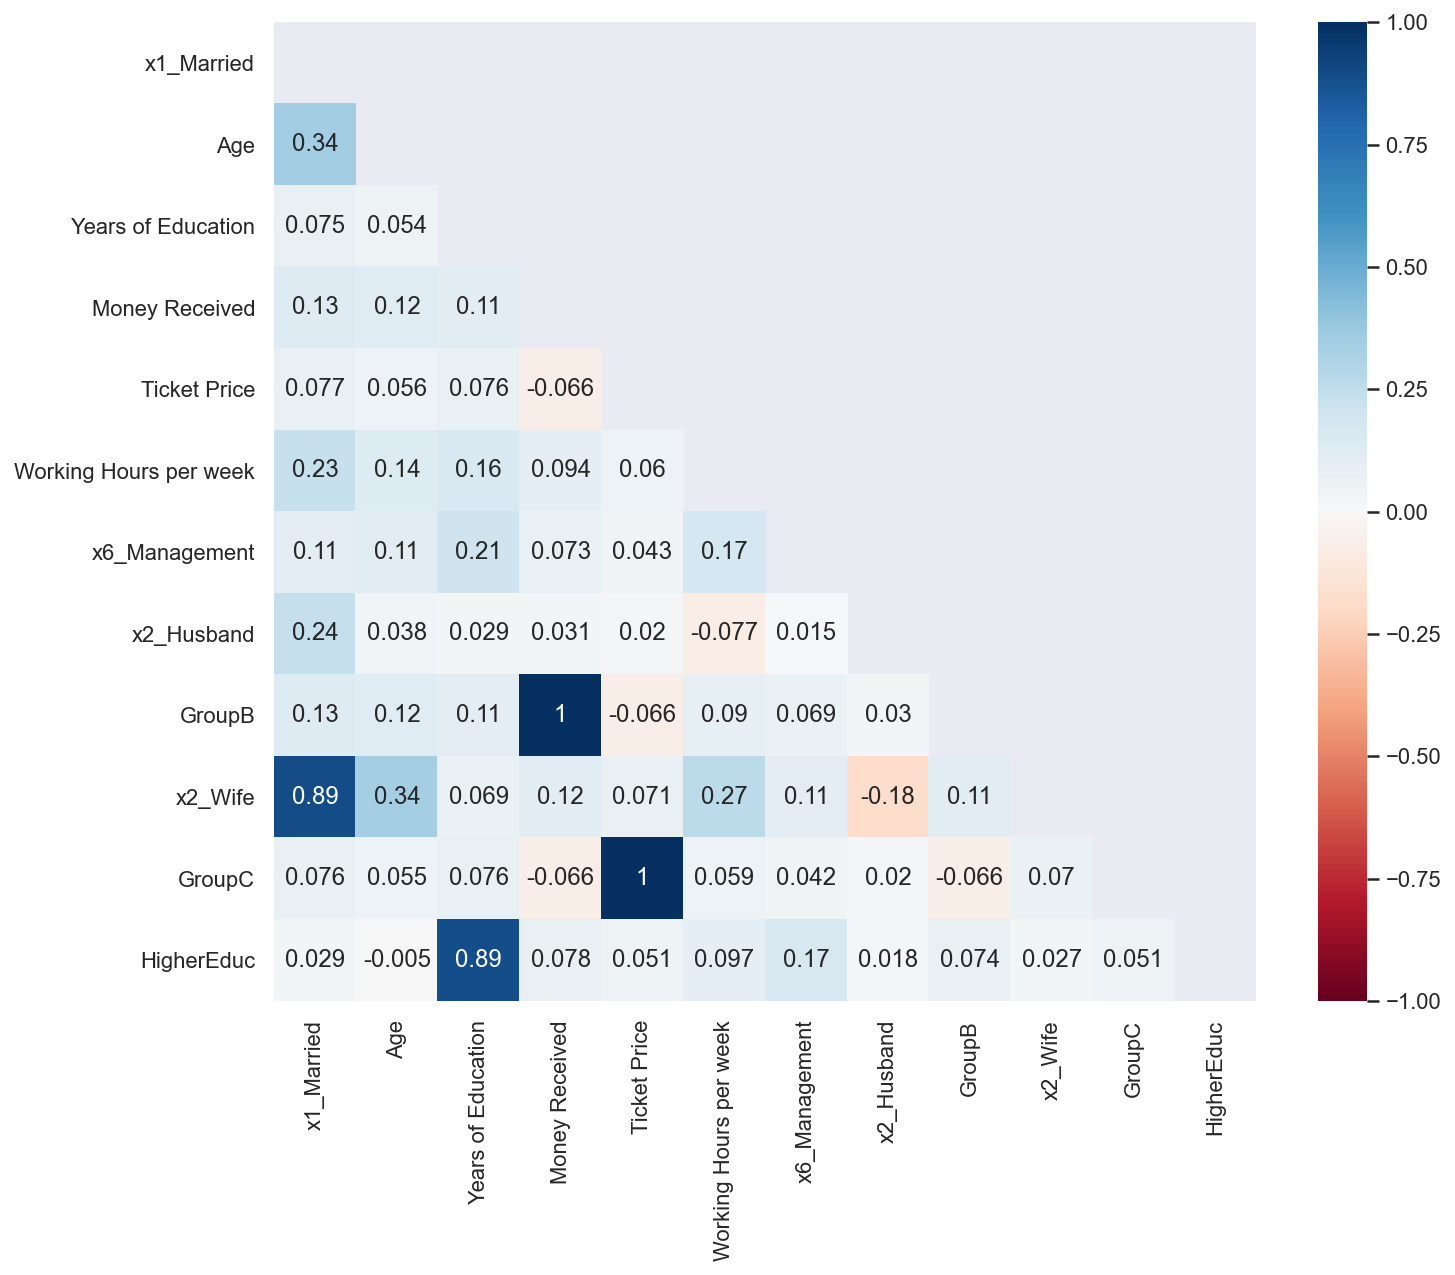

In [179]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data[feature_variables].corr(method="spearman"), dtype=bool))
sns.heatmap(data[feature_variables].corr(method="spearman"),annot=True,mask=mask, vmin=-1, vmax=1, cmap = 'RdBu')

**Higher correlations**
- Money received and groupB(x)
- Ticket price and groupC(x)
- Years of Education and HigherEduc(x)
- Ticket Price and GroupC(x)

<a class="anchor" id="featimportance">

## 15.8. Feature Importances - Tree based Classifiers

</a>

[2.75218958e-02 1.24899596e-01 3.94606487e-02 1.51731605e-02
 2.35082979e-01 9.15031973e-03 3.13013769e-02 2.36348531e-02
 5.75161191e-03 7.59284266e-05 2.76186480e-02 1.49430134e-02
 1.86096453e-03 3.86039834e-03 1.21027826e-02 8.88215354e-04
 7.65261510e-02 1.65254810e-03 4.71467640e-04 2.44028501e-03
 2.75045490e-02 2.70837649e-03 1.00972278e-02 1.11558003e-02
 1.20224005e-02 2.22019303e-03 5.02373922e-02 6.66544763e-04
 1.23832762e-03 1.00970541e-03 3.59636137e-04 1.13083021e-04
 3.05372548e-04 1.61874066e-03 1.35553199e-04 2.56937298e-04
 1.60624239e-04 2.13940399e-04 1.16156837e-03 2.57020848e-03
 9.82856730e-04 4.15121666e-06 4.58727920e-04 1.80403859e-04
 7.54704601e-04 4.97867211e-04 5.02665681e-04 5.40873000e-04
 4.38253377e-04 2.48875982e-04 1.06637208e-04 2.04010506e-05
 2.31007197e-04 1.90047672e-04 6.64448986e-03 5.87781771e-04
 5.13801656e-04 1.79379486e-04 8.56979981e-04 6.29528852e-04
 3.81812380e-04 1.31768577e-03 7.43784718e-04 1.43434156e-04
 1.11707926e-05 1.681688

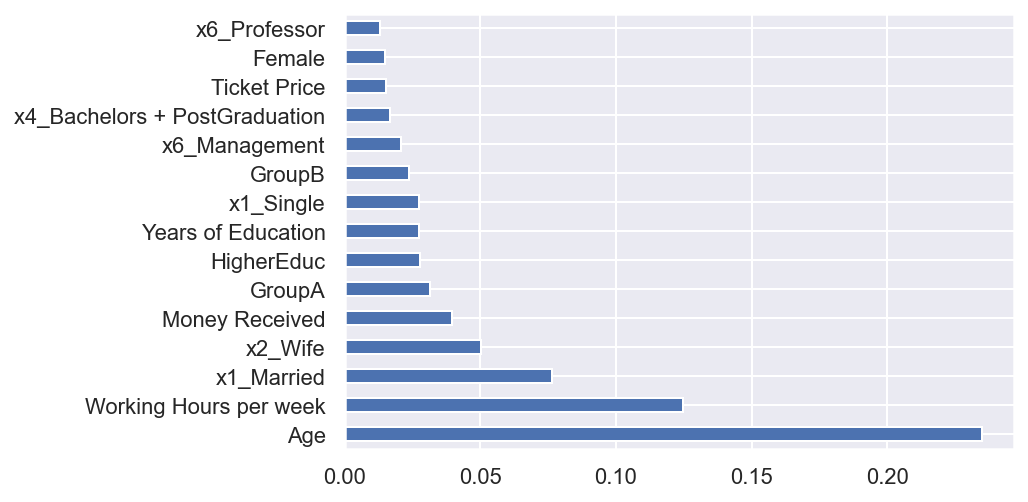

In [180]:
model = ExtraTreesClassifier()
model.fit(data, target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

<a class="anchor" id="ginientropy">

## 15.9. Gini Importance | Entropy Importance

</a>

In [181]:
gini_importance = DecisionTreeClassifier().fit(data, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(data, target).feature_importances_

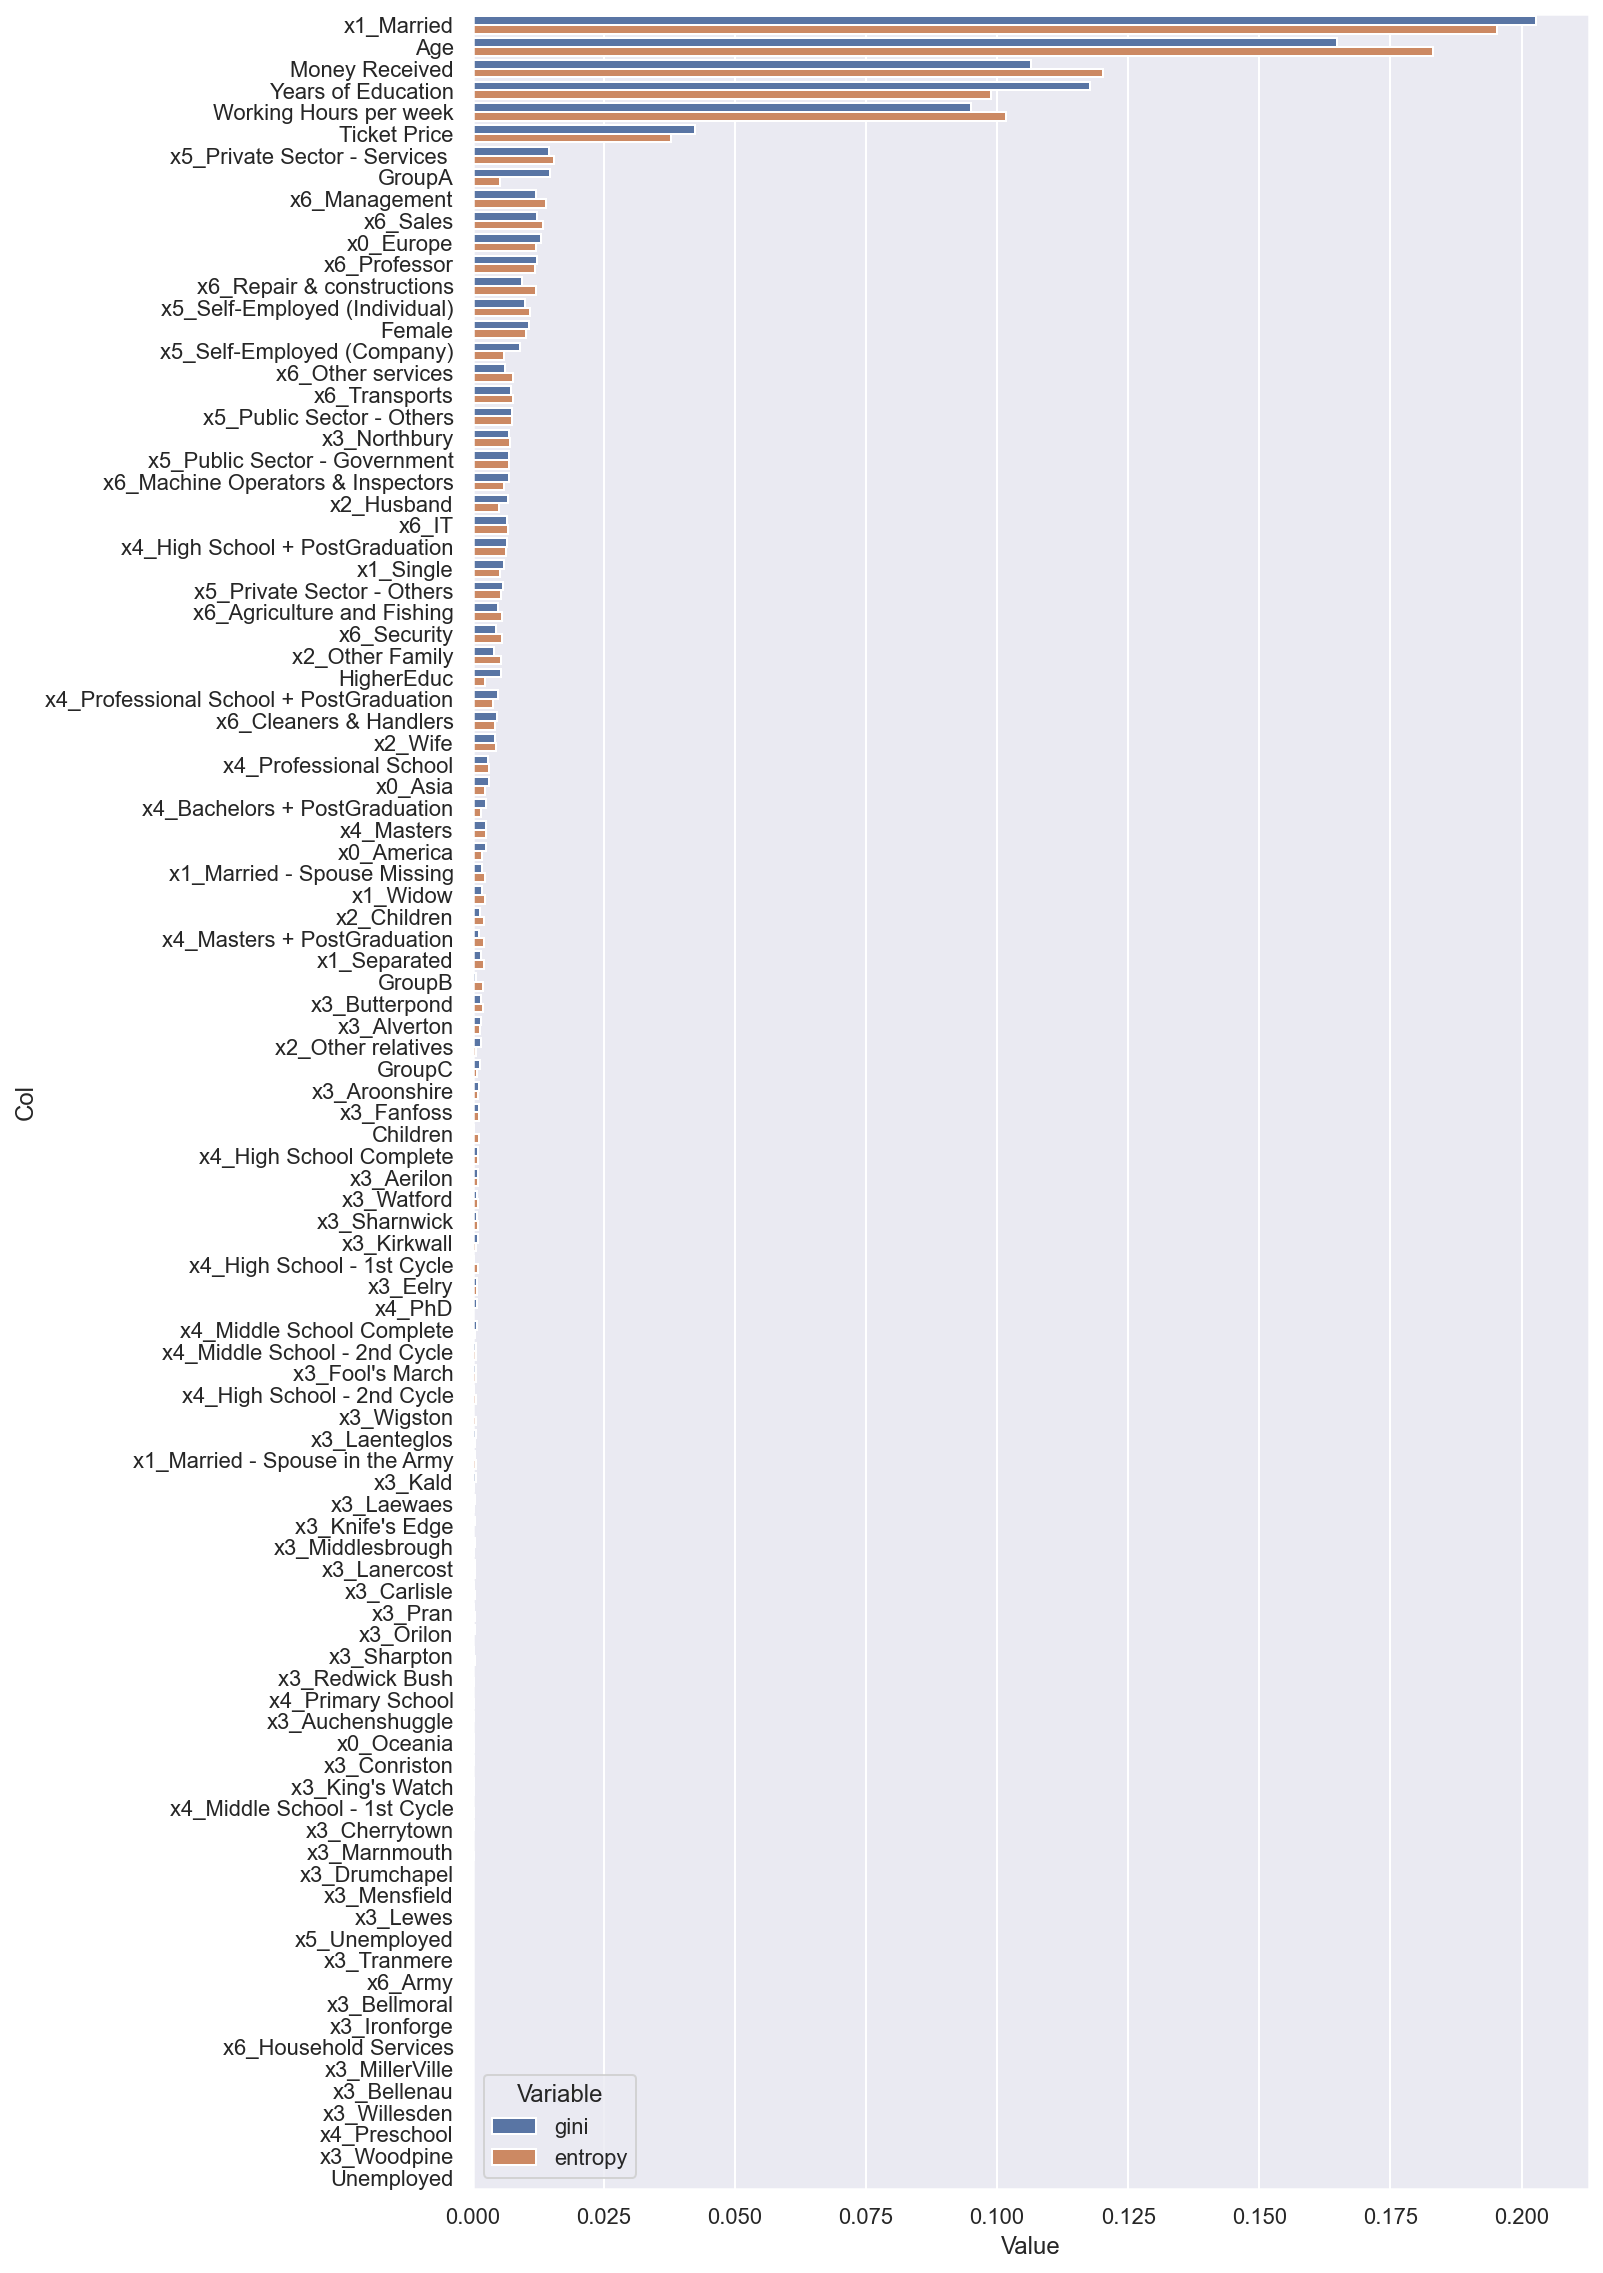

In [182]:
import seaborn as sns 

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(10,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<a class="anchor" id="maemsefriedman">

## 15.10. MAE | MSE | FRIEDMAN Importances

</a>

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
mse_importance = DecisionTreeRegressor().fit(data, target).feature_importances_
mae_importance = DecisionTreeRegressor(criterion='mae').fit(data, target).feature_importances_
friedman_importance = DecisionTreeRegressor(criterion='friedman_mse').fit(data, target).feature_importances_

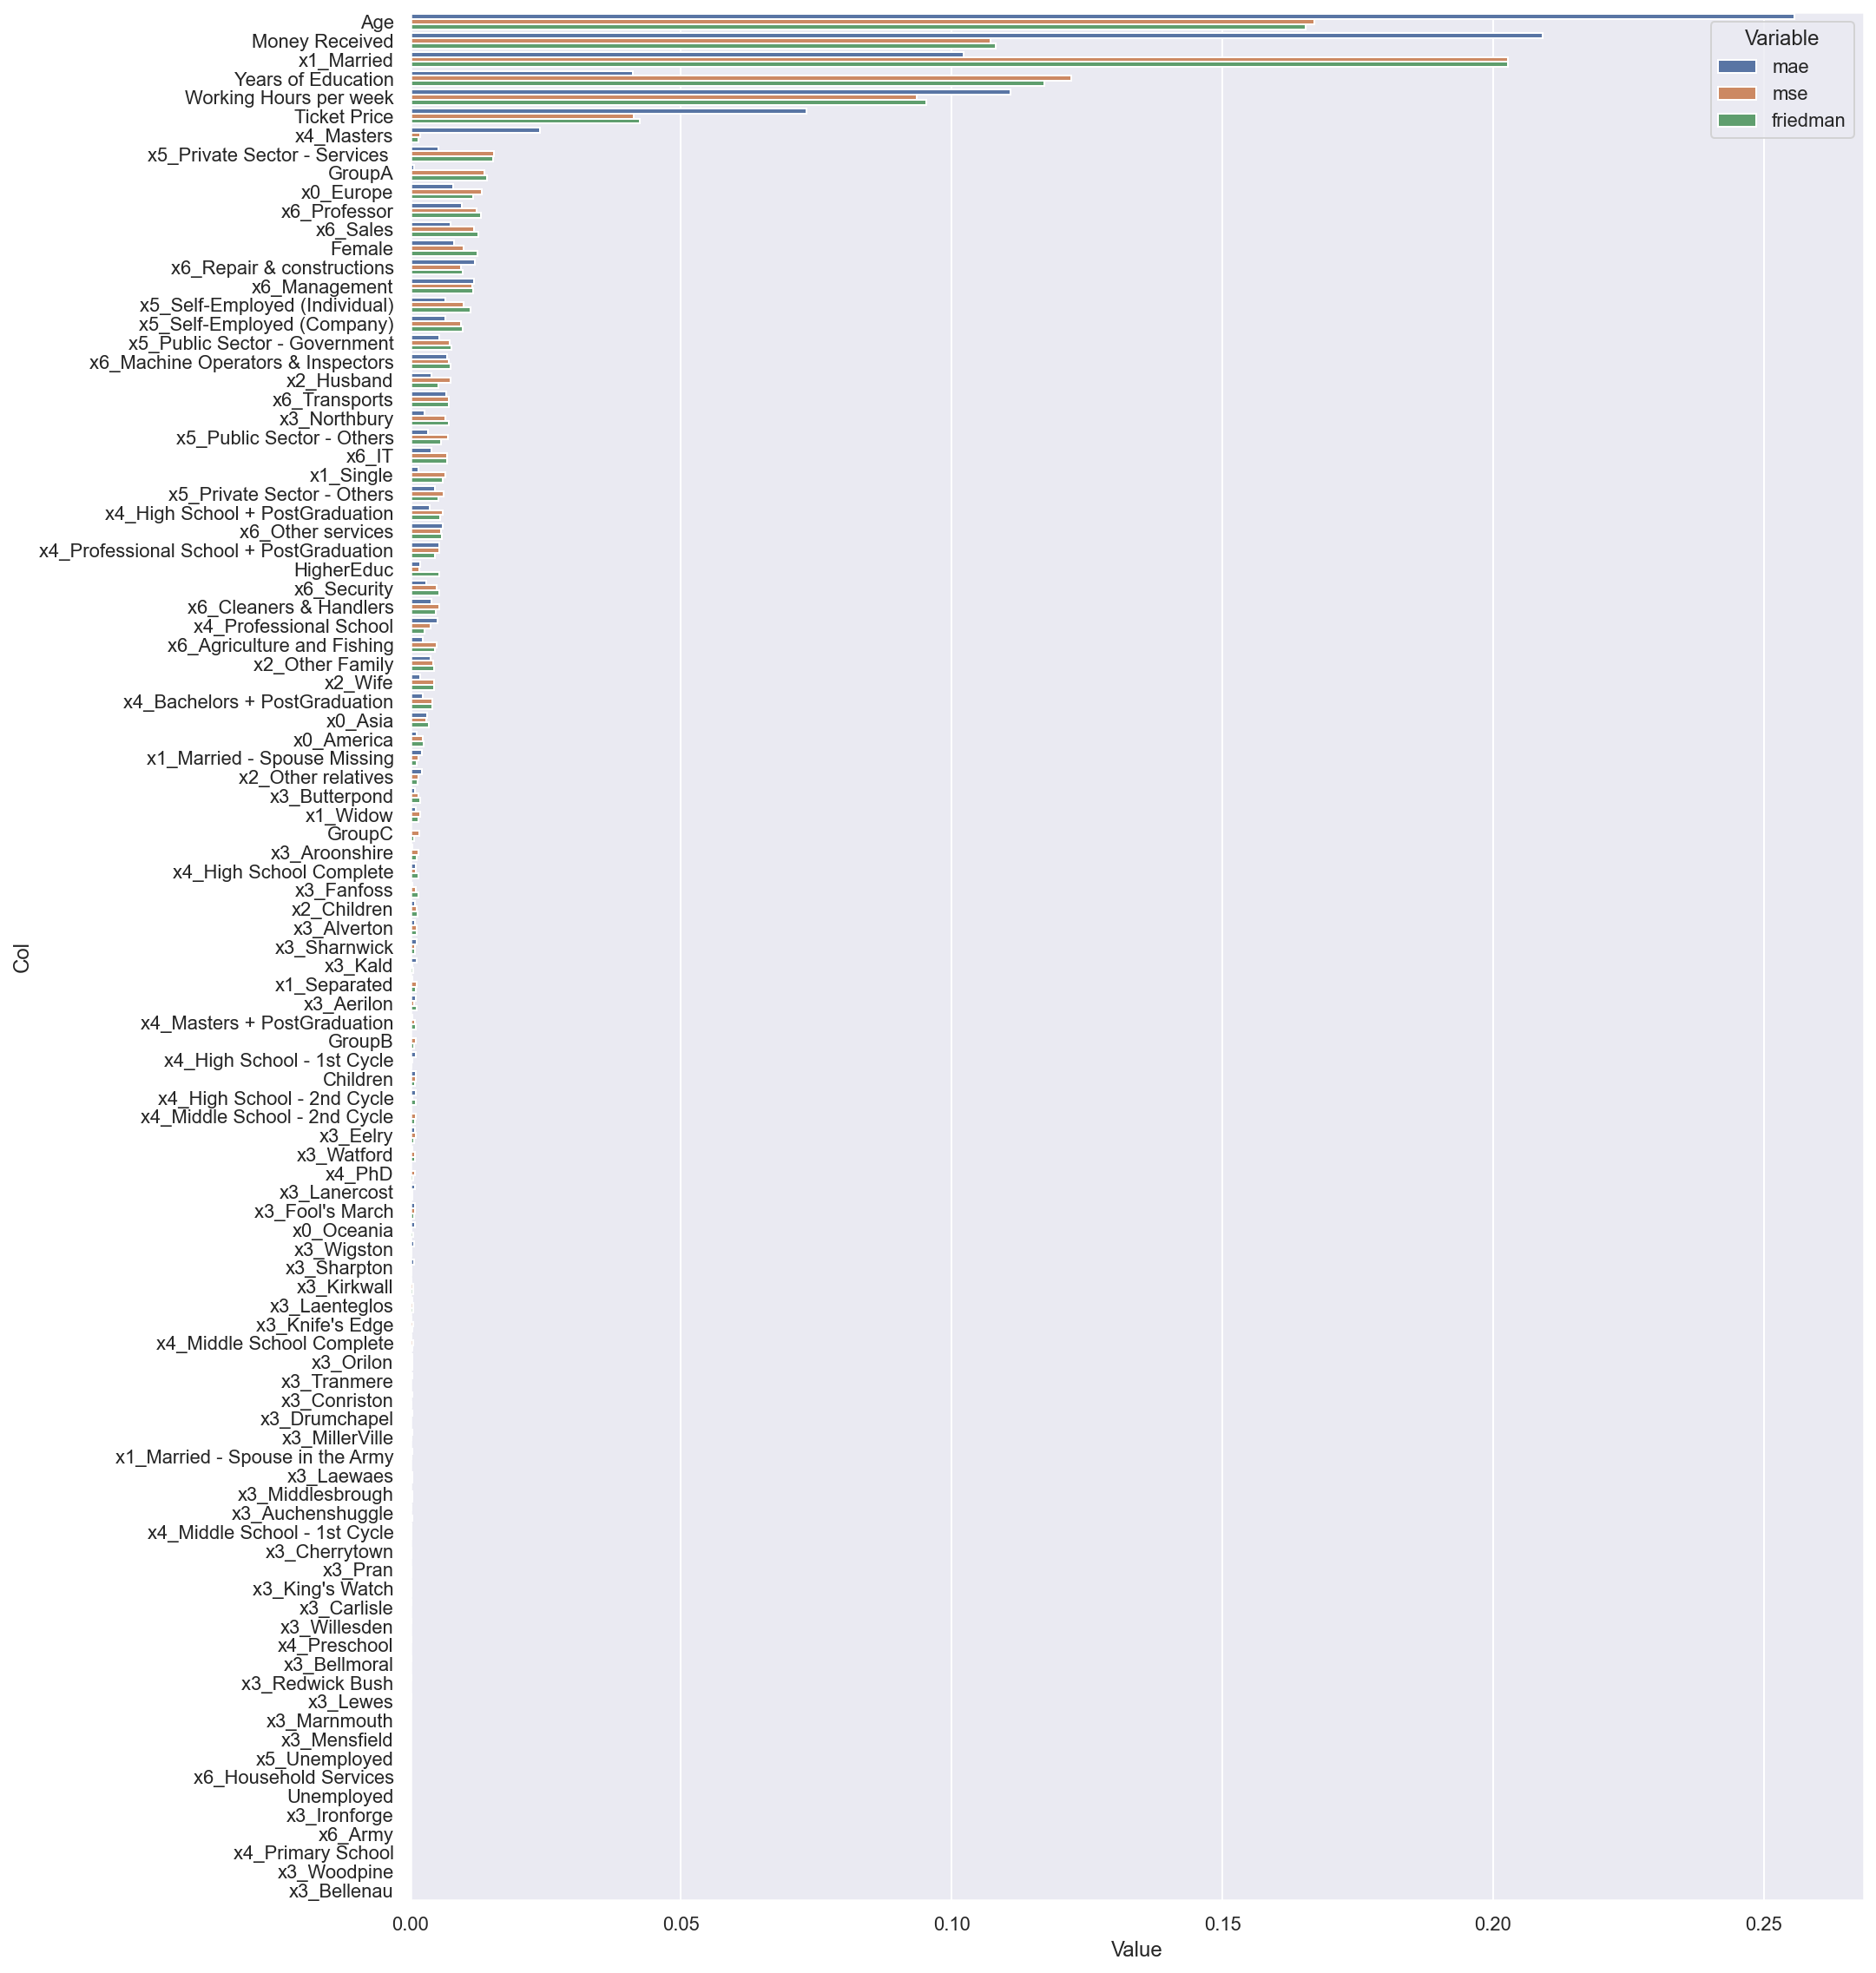

In [185]:
zippy = pd.DataFrame(zip(mse_importance, mae_importance, friedman_importance), columns = ['mse','mae','friedman'])
zippy['col'] = data.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,20))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

<a class="anchor" id="adaboost">

## 15.11. AdaBoost Feature Importances

</a>

In [186]:
ab = AdaBoostClassifier(random_state = 5).fit(data, target)

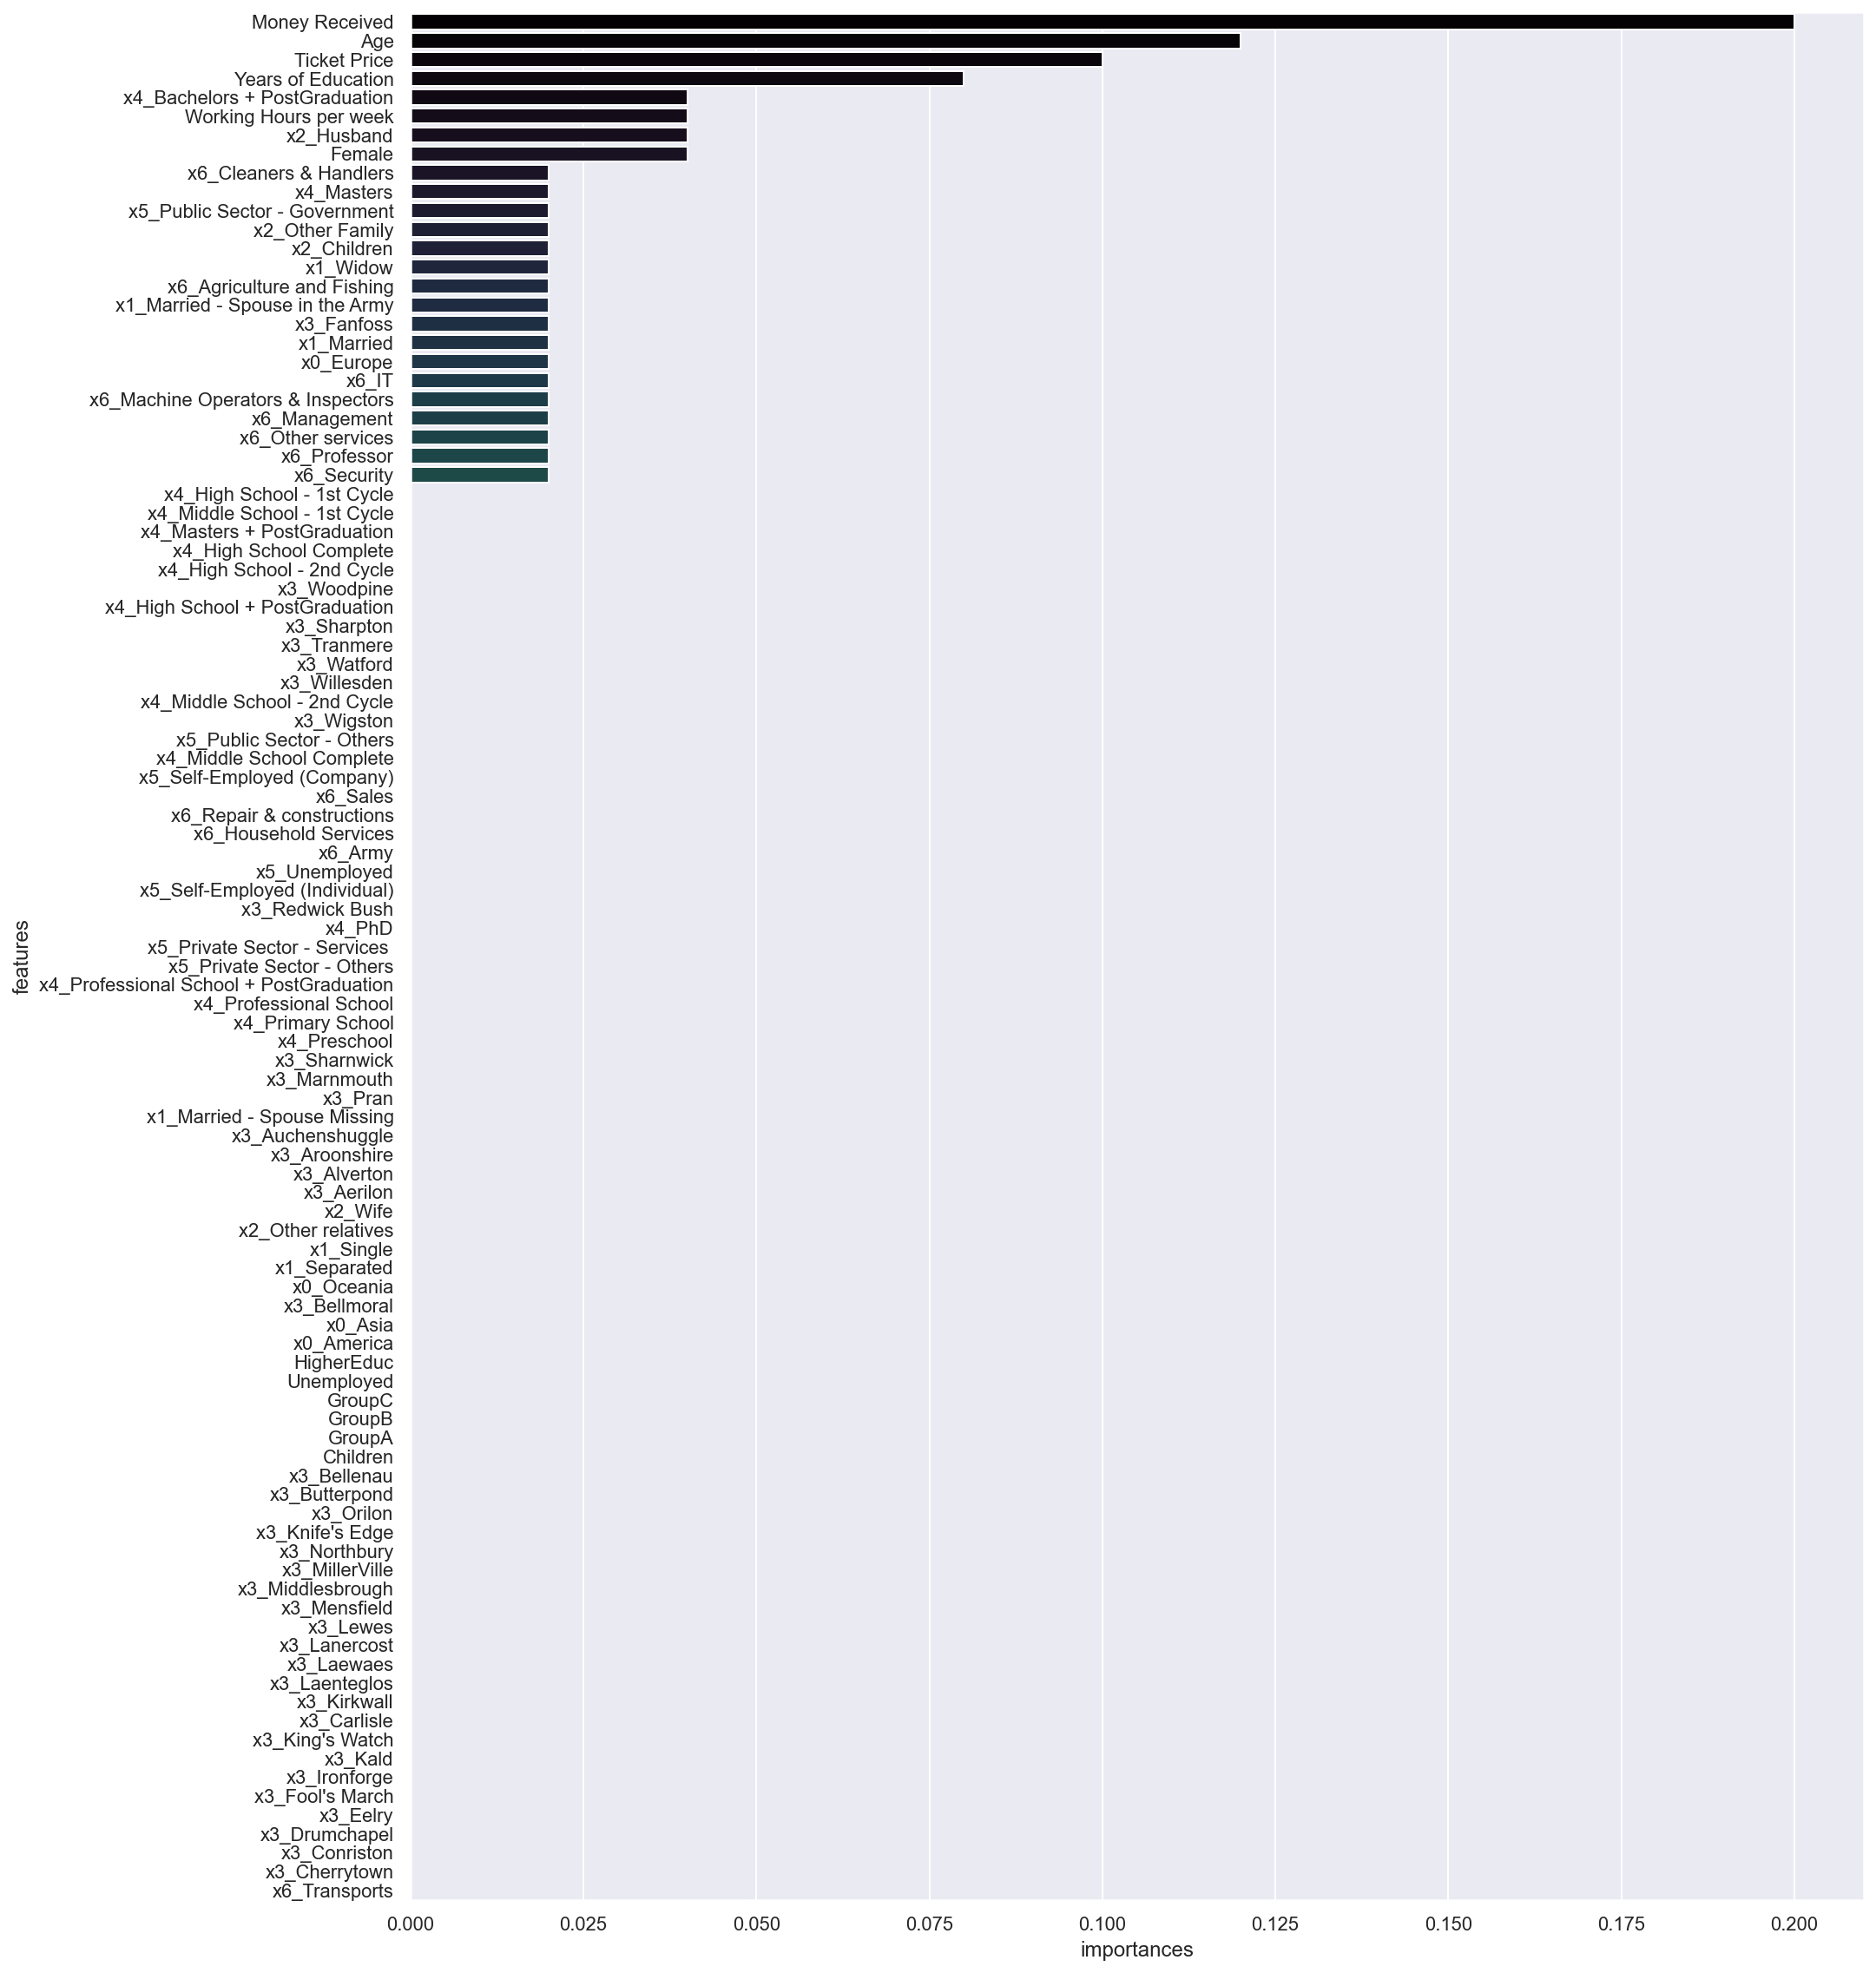

In [187]:
plt.figure(figsize=(15,20))
importances = ab.feature_importances_
features = data.columns
data_tuples = list(zip(importances, features))
data_1 = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data_1 = data_1.sort_values('importances', ascending = False)
sns.barplot(data_1['importances'], data_1['features'], palette = 'cubehelix', orient = 'h')

<hr>
<a class="anchor" id="selectedfeatures">
    
# 16. Final Selected Features
    
</a>

In [188]:
new_feature_variables=["x1_Married","Age","Years of Education","Money Received","Ticket Price","Working Hours per week",
                       'x6_Management', 'x2_Husband']

<a class="anchor" id="xy">

## 16.1. Split into X (Input variables) and y (Target)

</a>

In [189]:
# Assigning data and target to X and y, respectively
X = data[new_feature_variables]
y = target

In [190]:
y.value_counts()

0    17006
1     5280
Name: Income, dtype: int64

<hr>
<a class="anchor" id="resampling">
    
# 17. Re-Sampling Techniques for Imbalanced Classification
    
</a>

<a class="anchor" id="under">

## 17.1. Undersampling

</a>

In [193]:
from imblearn.under_sampling import RandomUnderSampler

In [194]:
from collections import Counter

In [195]:
# # define undersample strategy
#undersample = RandomUnderSampler(sampling_strategy='majority')
# # fit and apply the transform
#X_train, y_train = undersample.fit_resample(X_train, y_train)
# # summarize class distribution
#print(Counter(y_train))

<a class="anchor" id="over">

## 17.2. Oversampling

</a>

In [196]:
from imblearn.over_sampling import RandomOverSampler

In [197]:
# # define undersample strategy
#oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
#X_train, y_train = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
#print(Counter(y_train))

<a class="anchor" id="combined">

## 17.3. Undersampling & Oversampling (Combined)

</a>

In [198]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

In [199]:
# # define resampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# pipeline = Pipeline(steps=[('o', over), ('u', under)])
# X_train, y_train = pipeline.fit_resample(X_train, y_train)

<a class="anchor" id="smote">

## 17.4. SMOTE - Synthetic Minority Oversampling Technique

</a>

In [200]:
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [201]:
# # define pipeline
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
#X_train, y_train = pipeline.fit_resample(X_train, y_train)

<a class="anchor" id="adasyn">

## 17.5. ADASYN - Adaptive Synthetic Oversampling

</a>

**Adaptive Syntetic Oversampling** offers an improvement from SMOTE, since it considers the density distribution instead of consider only uniform weights as in SMOTE. This is good in terms of variance as it increases a little bit more than in SMOTE.

In [202]:
# from imblearn.over_sampling import ADASYN

In [203]:
# # define pipeline
# adasyn = ADASYN(sampling_strategy='minority', random_state=15, n_neighbors=5)
# X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [204]:
# y_train.value_counts()

<hr>
<a class="anchor" id="traintestsplit">
    
# 18. Train Test Split
    
</a>

In [191]:
# TRAIN (70%) & VALIDATION (30%) SPLIT
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [192]:
y_train.value_counts()

0    11904
1     3696
Name: Income, dtype: int64

<hr>
<a class="anchor" id="models">
    
# 19. Models
    
</a>

<a class="anchor" id="kfoldrkfold">

## 19.1. K-Fold and Repeated K-Fold parameters

</a>

In [205]:
kf = KFold(n_splits=10)

In [206]:
rkf = RepeatedKFold(n_splits=10, n_repeats=2)

<a class="anchor" id="nn">

## 19.2. Multi-Layer Perceptron

</a>

<hr>
<a class="anchor" id="gridsearchnn">

### 19.2.1. Grid Search NN
    
</a>

In [207]:
mlp = MLPClassifier()

In [208]:
parameter_space = {
    'hidden_layer_sizes': [(10,10), (10,10,10), (12,10,10), (10,12,10)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive', 'invscaling'],
}

In [209]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train)
clf.predict(X_train)
clf.predict(X_val)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [210]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

print('---------------------------------------------------------------------------------------------------------------------')
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
---------------------------------------------------------------------------------------------------------------------
0.850 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.850 (+/-0.010) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.850 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.850 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.849 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.848 (+/-0.018) f

**TTS**

In [212]:
#def run_model_NN(X,y):
#    model=MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs').fit(X,y)
#    return model

In [213]:
#def evaluate_model(X,y, model):
#    predictions = model.predict(X)
#    return f1_score(y, predictions,average="micro")

In [214]:
#def TTS_score_NN(X_train,y_train, X_val, y_val):
#    model = run_model_NN(X_train, y_train)
#    value_train = evaluate_model(X_train, y_train, model)
#    value_val = evaluate_model(X_val,y_val, model)
#    print('Train:', value_train)
#    print('Val:', value_val)

In [215]:
#TTS_NN=TTS_score_NN(X_train,y_train, X_val, y_val)
#TTS_NN

Train: 0.8542307692307692
Val: 0.8537241998205205


In [216]:
#model=MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')

In [217]:
#model=model.fit(X_train,y_train) 

In [218]:
#labels_train = model.predict(X_train)

In [219]:
#labels_val = model.predict(X_val)

In [220]:
#print('Confusion matrix of the validation set:')
#print(confusion_matrix(y_true=y_val,y_pred=labels_val))

Confusion matrix of the validation set:
[[4795  307]
 [ 671  913]]


In [221]:
#def metrics(y_train, pred_train , y_val, pred_val):
#    print('___________________________________________________________________________________________________________')
#    print('                                                     TRAIN                                                 ')
#    print('-----------------------------------------------------------------------------------------------------------')
#    print(classification_report(y_train, pred_train))
#    print(confusion_matrix(y_train, pred_train))


#    print('___________________________________________________________________________________________________________')
#    print('                                                VALIDATION                                                 ')
#    print('-----------------------------------------------------------------------------------------------------------')
#    print(classification_report(y_val, pred_val))
#    print(confusion_matrix(y_val, pred_val))

In [222]:
#metrics(y_train, labels_train , y_val,  labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11904
           1       0.75      0.57      0.65      3696

    accuracy                           0.85     15600
   macro avg       0.81      0.76      0.78     15600
weighted avg       0.85      0.85      0.85     15600

[[11204   700]
 [ 1574  2122]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [223]:
#TTS_NN=model.score(X_val,y_val)

**KF**

In [224]:
#def avg_score_NN(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_NN(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [225]:
#KF_NN=avg_score_NN(kf,X,y)
#KF_NN

Train: 0.8551607033027961
Test: 0.8531371596701873


**RKF**

In [226]:
#RKF_NN=avg_score_NN(rkf,X,y) #gotten with n_repeats = 2
#RKF_NN

Train: 0.8554423727504739
Test: 0.8537866083848213


<a class="anchor" id="rf">

## 19.3. Random Forest

</a>

**TTS**

In [227]:
#RANDOM_STATE = 5

#ensemble_clfs = [
#    ("RandomForestClassifier, max_features='sqrt'",
#        RandomForestClassifier(oob_score=True,
#                               max_features="sqrt",
#                               random_state=RANDOM_STATE)),
#    ("RandomForestClassifier, max_features='log2'",
#        RandomForestClassifier(max_features='log2',
#                               oob_score=True,
#                               random_state=RANDOM_STATE)),
#    ("RandomForestClassifier, max_features=None",
#        RandomForestClassifier(max_features=None,
#                               oob_score=True,
#                               random_state=RANDOM_STATE))
#]

In [228]:
#from collections import OrderedDict

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
#error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
#min_estimators = 15
#max_estimators = 175

#for label, clf in ensemble_clfs:
#    for i in range(min_estimators, max_estimators + 1):
#        clf.set_params(n_estimators=i)
#        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
#        oob_error = 1 - clf.oob_score_
#        error_rate[label].append((i, oob_error))

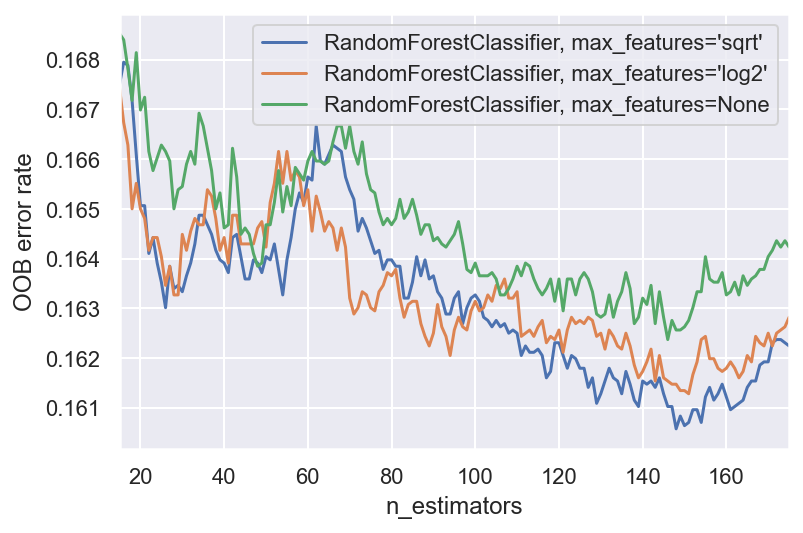

In [229]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
#for label, clf_err in error_rate.items():
#    xs, ys = zip(*clf_err)
#    plt.plot(xs, ys, label=label)

#plt.xlim(min_estimators, max_estimators)
#plt.xlabel("n_estimators")
#plt.ylabel("OOB error rate")
#plt.legend(loc="upper right")
#plt.show()

In [230]:
#def run_model_RF(X,y):
#    model=RandomForestClassifier(n_estimators=150, criterion="gini", max_features=None, random_state=5, max_depth=8).fit(X,y)
#    return model

In [231]:
#def TTS_score_RF(X_train, y_train, X_val, y_val):
#    model = run_model_RF(X_train, y_train)
#    value_train = evaluate_model(X_train, y_train, model)
#    value_val = evaluate_model(X_val,y_val, model)
#    print('Train:', value_train)
#    print('Val:', value_val)

In [232]:
#TTS_RF=TTS_score_RF(X_train, y_train, X_val, y_val)
#TTS_RF

Train: 0.8646794871794872
Val: 0.8591085851032008


In [233]:
#rf = RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)

In [234]:
# Train the model on training data
#rf=rf.fit(X_train, y_train)

In [235]:
#rf_labels_train = rf.predict(X_train)
#accuracy_score(y_train, rf_labels_train)

0.864423076923077

In [236]:
#rf_labels_val = rf.predict(X_val)
#accuracy_score(y_val, rf_labels_val)

0.8606042476817231

In [237]:
#metrics(y_train, rf_labels_train, y_val, rf_labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     11904
           1       0.82      0.55      0.66      3696

    accuracy                           0.86     15600
   macro avg       0.85      0.76      0.79     15600
weighted avg       0.86      0.86      0.85     15600

[[11453   451]
 [ 1664  2032]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [238]:
#RF=rf.score(X_val,y_val)
#RF

0.8606042476817231

**KF**

In [239]:
#def avg_score_RF(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_RF(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [240]:
#KF_RF=avg_score_RF(kf,X,y)
#KF_RF

Train: 0.8646534585027744
Test: 0.8574000062824544


**RKF**

In [241]:
#RKF_RF=avg_score_RF(rkf,X,y) #gotten with n_repeats = 2 
#RKF_RF

Train: 0.8648379077700147
Test: 0.8576457166951391


<a class="anchor" id="log">

## 19.4. Logistic Regression

</a>

In [242]:
#log_model = LogisticRegression(random_state=5)

In [243]:
#log_model.fit(X_train,y_train)

LogisticRegression(random_state=5)

In [244]:
#y_pred_train=log_model.predict(X_train)
#y_pred = log_model.predict(X_val)
#y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [245]:
#pred_prob = log_model.predict_proba(X_val)
#pred_prob

array([[0.96401913, 0.03598087],
       [0.77569305, 0.22430695],
       [0.94794031, 0.05205969],
       ...,
       [0.65791332, 0.34208668],
       [0.92473934, 0.07526066],
       [0.43068706, 0.56931294]])

In [246]:
#log_model.coef_

array([[2.25001891, 0.38188551, 0.83684229, 2.26347798, 0.26081804,
        0.4327841 , 0.73579796, 0.5680341 ]])

In [247]:
#cm = confusion_matrix(y_val, y_pred)
#cm

array([[4785,  317],
       [ 692,  892]], dtype=int64)

In [248]:
#log_model.score(X_train,y_train)

0.844551282051282

In [249]:
#metrics(y_train, y_pred_train, y_val, y_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11904
           1       0.72      0.56      0.63      3696

    accuracy                           0.84     15600
   macro avg       0.80      0.75      0.77     15600
weighted avg       0.84      0.84      0.84     15600

[[11117   787]
 [ 1638  2058]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [250]:
#LOG=log_model.score(X_val,y_val)
#LOG

0.8490876458271014

In [251]:
#def run_model_LR(X,y):
#    model = LogisticRegression(random_state=5).fit(X,y)
#    return model

In [252]:
#def evaluate_model(X,y, model):
#    predictions = model.predict(X)
#    return f1_score(y, predictions,average="micro")

In [253]:
#def avg_score_LR(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_LR(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [254]:
#KF_LOG=avg_score_LR(kf, X, y)
#KF_LOG

Train: 0.8460468473008274
Test: 0.8459573211936984


<a class="anchor" id="ibl">

## 19.5. Instance Based Learning

</a>

In [256]:
#modelKNN = KNeighborsClassifier()

In [257]:
#modelKNN=modelKNN.fit(X = X_train, y = y_train)

In [258]:
#labels_train = modelKNN.predict(X_train)
#labels_val = modelKNN.predict(X_val)

In [259]:
#modelKNN.predict_proba(X_val)

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       ...,
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4]])

In [260]:
#metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11904
           1       0.77      0.68      0.72      3696

    accuracy                           0.87     15600
   macro avg       0.84      0.81      0.82     15600
weighted avg       0.87      0.87      0.87     15600

[[11141   763]
 [ 1190  2506]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [261]:
#KNN=modelKNN.score(X_val,y_val)

In [268]:
#def run_model_KNN(X,y):
#    model=KNeighborsClassifier().fit(X,y)
#    return model

In [269]:
#def evaluate_model(X,y, model):
#    predictions = model.predict(X)
#    return f1_score(y, predictions, average="micro")

In [270]:
#def avg_score_KNN(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_KNN(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [271]:
#KF_KNN=avg_score_KNN(kf, X, y)
#KF_KNN

Train: 0.8735678796534672
Test: 0.832406107512124


<a class="anchor" id="dt">

## 19.6. Decision Trees

</a>

In [272]:
#dt_gini = DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5)

In [273]:
#dt_gini=dt_gini.fit(X_train, y_train)

In [274]:
#y_pred_train=dt_gini.predict(X_train)
#y_pred = dt_gini.predict(X_val)
#y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [275]:
#y_pred_prob = dt_gini.predict_proba(X_val)
#y_pred_prob

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [276]:
#print('The defined three has a depth of ' + str(dt_gini.get_depth()) + ', ' + str(dt_gini.tree_.node_count) + 
#      ' nodes and a total of ' + str(dt_gini.get_n_leaves()) + ' leaves.')

The defined three has a depth of 35, 6683 nodes and a total of 3342 leaves.


In [277]:
#metrics(y_train, y_pred_train, y_val, y_pred)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11904
           1       0.94      0.77      0.84      3696

    accuracy                           0.93     15600
   macro avg       0.94      0.88      0.90     15600
weighted avg       0.93      0.93      0.93     15600

[[11725   179]
 [  862  2834]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [278]:
#DT=dt_gini.score(X_val,y_val)

In [279]:
#def run_model_DT(X,y):
#    model=DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5).fit(X,y)
#    return model

In [280]:
#def evaluate_model(X,y, model):
#    predictions = model.predict(X)
#    return f1_score(y, predictions, average="micro")

In [281]:
#def avg_score_DT(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_DT(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [282]:
#KF_DT=avg_score_DT(kf, X, y)
#KF_DT

Train: 0.9293627395644618
Test: 0.828951422130187


<a class="anchor" id="nb">

## 19.7. Naive Bayes

</a>

In [284]:
#nb = GaussianNB().fit(X_train, y_train)

In [285]:
#labels_train_nb = nb.predict(X_train)
#accuracy_score(y_train, labels_train_nb)

0.8100641025641026

In [286]:
#labels_val_nb = nb.predict(X_val)
#accuracy_score(y_val, labels_val_nb)

0.81543523781035

In [287]:
#metrics(y_train, labels_train_nb, y_val, labels_val_nb)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     11904
           1       0.64      0.46      0.53      3696

    accuracy                           0.81     15600
   macro avg       0.74      0.69      0.71     15600
weighted avg       0.80      0.81      0.80     15600

[[10934   970]
 [ 1993  1703]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [288]:
NB=nb.score(X_val,y_val)

<a class="anchor" id="svm">

## 19.8. Support Vector Machine - SVC (Classifier)

</a>

In [289]:
#modelSVM = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)

In [290]:
#modelSVM.score(X_train, y_train)

0.8588461538461538

In [291]:
#SVM=modelSVM.score(X_val, y_val)
#SVM

0.853425067304816

<a class="anchor" id="ridgeclassifier">

## 19.9. Ridge Classifier

</a>

In [292]:
#ridge = Ridge(random_state=5)
#ridge.fit(X_train,y_train)
#y_prob = ridge.predict(X_train)
#y_pred = np.asarray([np.argmax(line) for line in y_prob])
#yp_test = ridge.predict(X_val)
#test_preds = np.asarray([np.argmax(line) for line in yp_test])
#print(accuracy_score(y_train,y_pred))

0.7630769230769231


In [293]:
#RIDGE=accuracy_score(y_val,test_preds)
#RIDGE

0.76308704756207

<a class="anchor" id="ensemble">

## 19.10. Ensemble Methods

</a>

<a class="anchor" id="bagg">

### 19.10.1. Balanced Bagging Classifier

</a>

**TTS**

In [294]:
#def run_model_BNN(X,y):
#    NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
#    bagging_NN = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X,y)
#    return bagging_NN

In [295]:
#def TTS_score_BNN(X_train, y_train, X_val, y_val):
#    model = run_model_BNN(X_train, y_train)
#    value_train = evaluate_model(X_train, y_train, model)
#    value_val = evaluate_model(X_val,y_val, model)
#    print('Train:', value_train)
#    print('Val:', value_val)

In [296]:
#TTS_score_BNN(X_train, y_train, X_val, y_val)

Train: 0.8566025641025641
Val: 0.8549207298833384


In [297]:
## Bagging Classifier with NN
#NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
#bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)

In [298]:
#labels_train_bbc = bbc.predict(X_train)
#accuracy_score(y_train, labels_train_bbc)

0.8566025641025641

In [299]:
#labels_val_bbc = bbc.predict(X_val)
#BAGG=accuracy_score(y_val, labels_val_bbc)
#BAGG

0.8549207298833383

In [300]:
#metrics(y_train, labels_train_bbc, y_val, labels_val_bbc)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11904
           1       0.76      0.58      0.66      3696

    accuracy                           0.86     15600
   macro avg       0.82      0.76      0.78     15600
weighted avg       0.85      0.86      0.85     15600

[[11225   679]
 [ 1558  2138]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

**KF**

In [ ]:
#def avg_score_BNN(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#        model = run_model_BNN(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [ ]:
#avg_score_BNN(kf,X,y)

**RKF**

In [ ]:
#avg_score_BNN(rkf,X,y) #gotten with n_repeats = 2 

<a class="anchor" id="baggtrees">

### 19.10.1. Balanced Bagging Classifier + Trees

</a>

In [301]:
#tree = DecisionTreeClassifier(random_state=5)

In [302]:
#bagging_tree = BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1)

In [303]:
#bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=5),
                  bootstrap=False, n_estimators=50, n_jobs=-1, random_state=5)

In [304]:
#bagging_tree.score(X_train, y_train)

0.9332692307692307

In [305]:
#BAGG_TREE=bagging_tree.score(X_val, y_val)
#BAGG_TREE

0.8299431648220161

<a class="anchor" id="adaboostclassifier">

### 19.10.3. AdaBoost Classifier

</a>

In [306]:
#from matplotlib.legend_handler import HandlerLine2D
#def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
#    train_results = []
#    test_results = []
#    for value in interval:
#        if parameter == 'Number of estimators':
#            dt = AdaBoostClassifier(n_estimators = value, random_state = 5)
#        elif parameter == 'Learning Rate':
#            dt = AdaBoostClassifier(learning_rate = value, random_state = 5)
#        dt.fit(x_train, y_train)
#        train_results.append(f1_score(y_train,dt.predict(x_train), average="micro"))
#        test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
#    value_train = train_results.index(max(train_results))
#    value_test = test_results.index(max(test_results))
#    print('The best train value is ',interval[value_train])
#    print('The best test value is ',interval[value_test])

#    fig = plt.figure(figsize = (16,10))
#    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
#    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
#    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#    plt.ylabel("F1 score")
#    plt.xlabel(str(parameter))
#    plt.show()

The best train value is  99
The best test value is  90


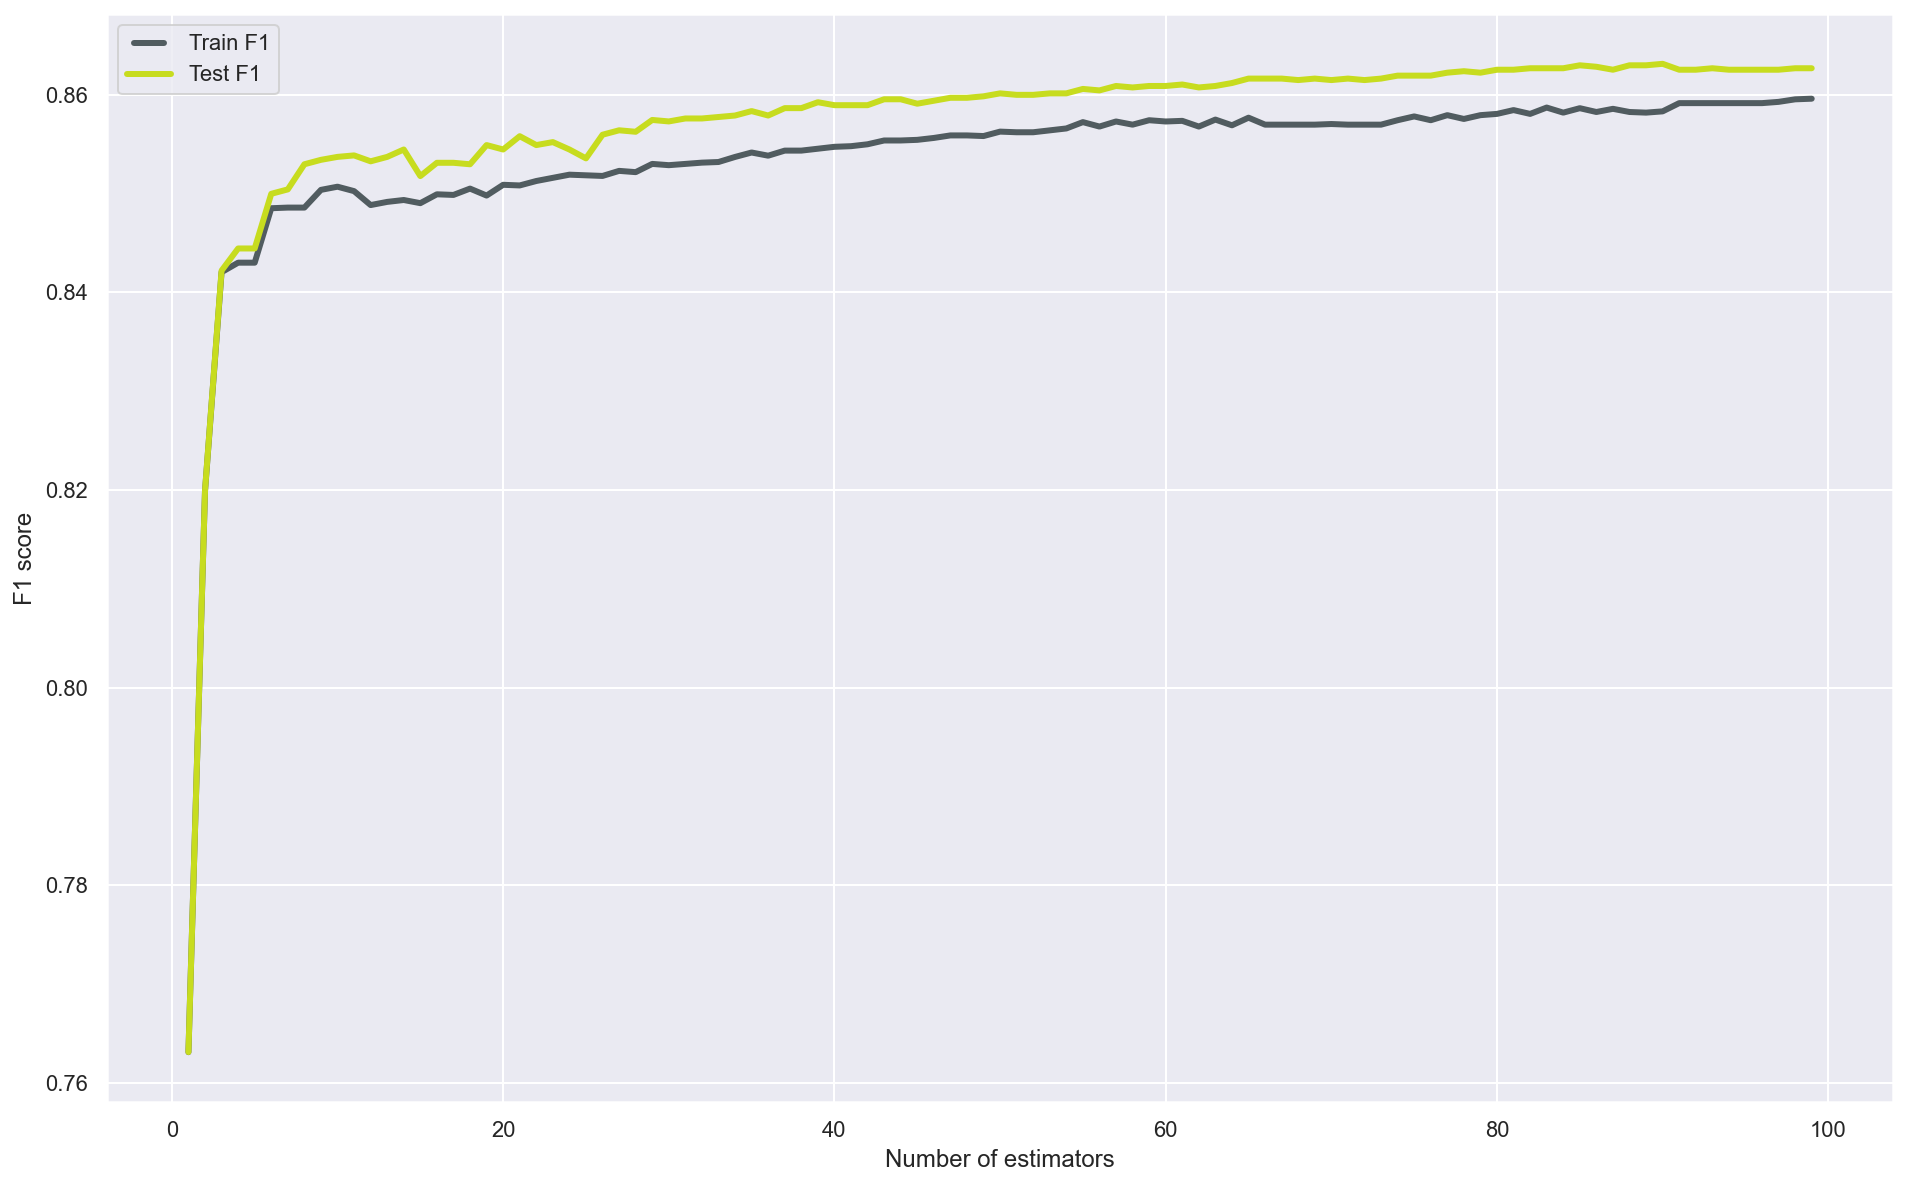

In [307]:
#num_estimators = list(range(1,100))
#calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is  0.6
The best test value is  0.7000000000000001


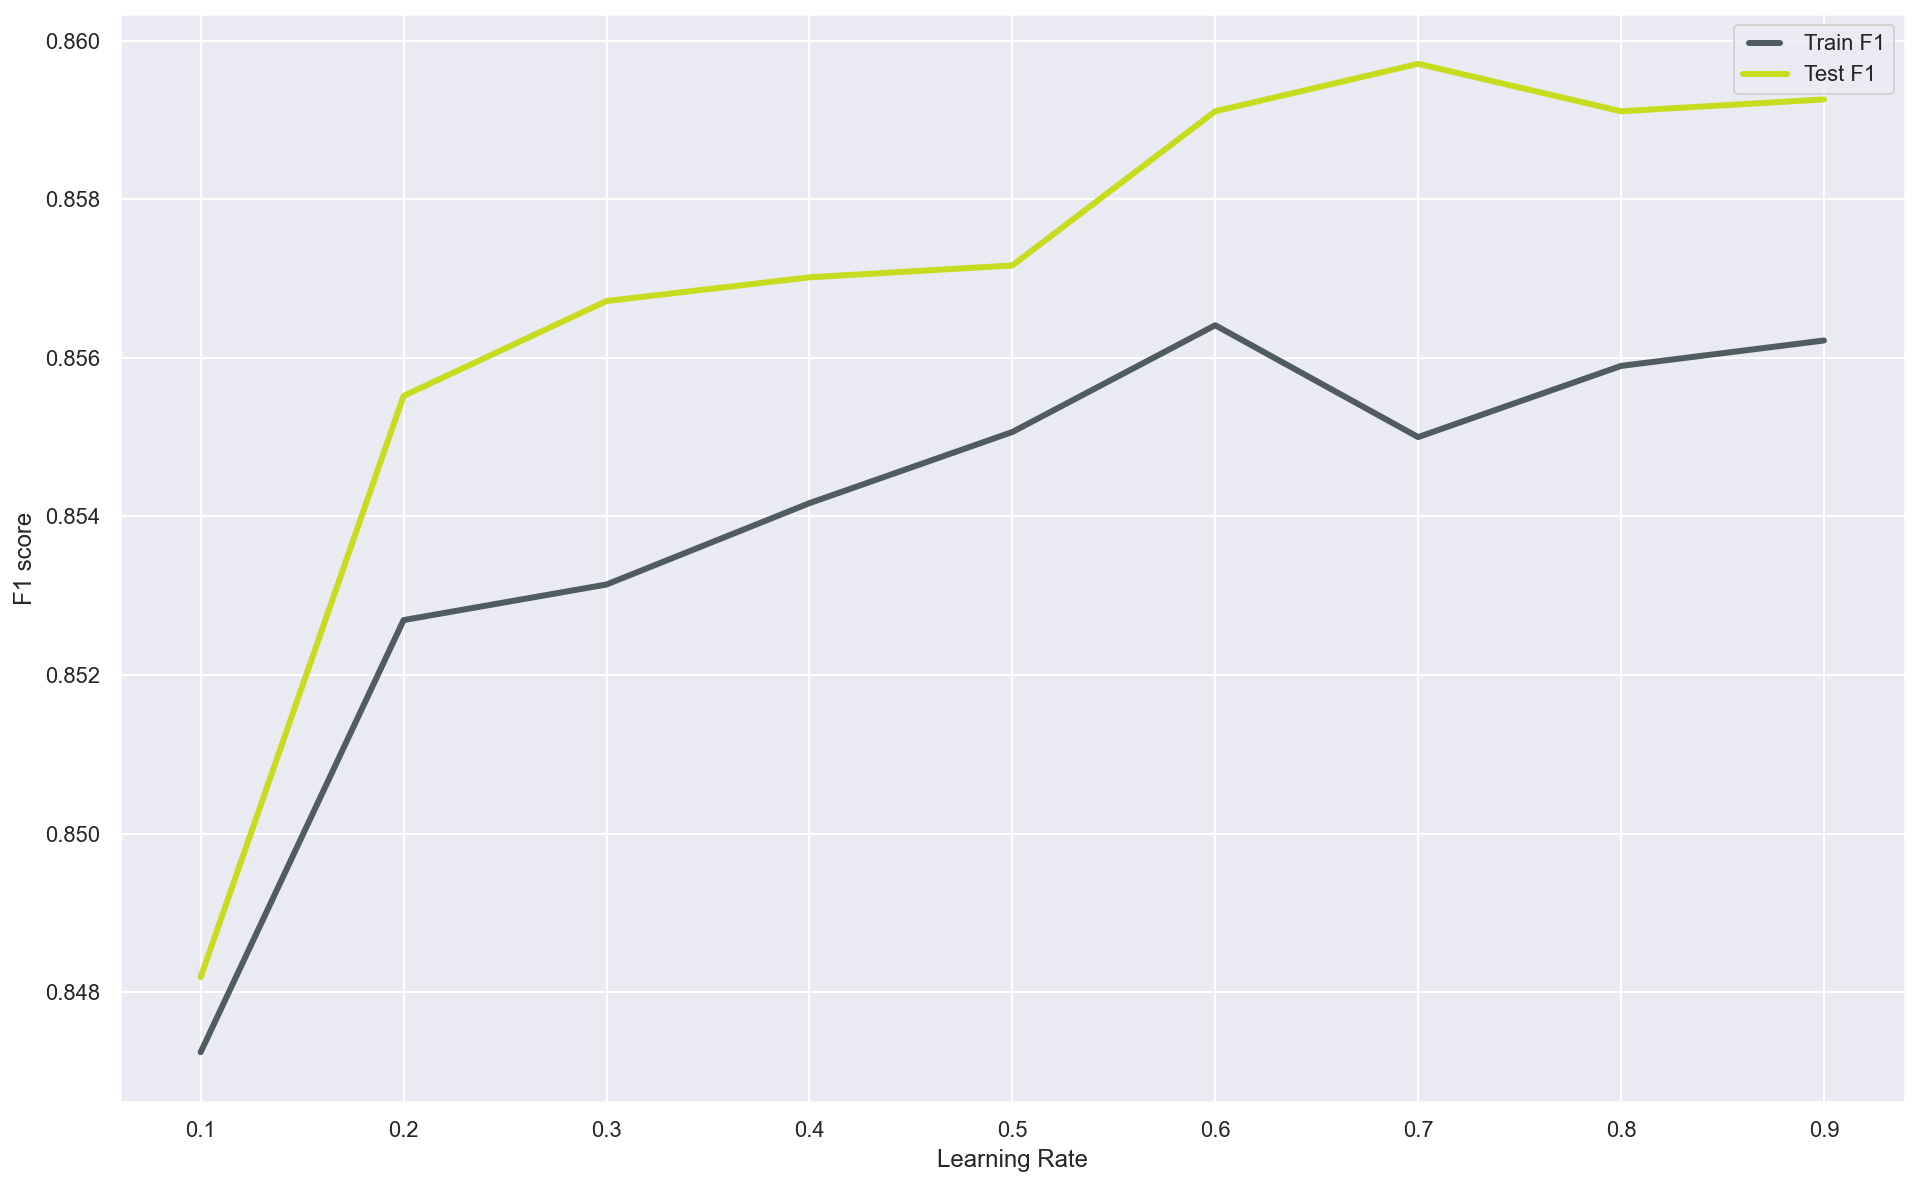

In [308]:
#learning_rate = list(np.linspace(0.1, 0.9, 9, endpoint=True))
#calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

In [309]:
#ada = AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001).fit(X_train, y_train)

In [310]:
#labels_train_ada = ada.predict(X_train)
#accuracy_score(y_train, labels_train_ada)

0.8571153846153846

In [311]:
#labels_val_ada = ada.predict(X_val)
#ADABOOST=accuracy_score(y_val, labels_val_ada)
#ADABOOST

0.8613520789709841

In [312]:
#metrics(y_train, labels_train_ada, y_val, labels_val_ada)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11904
           1       0.76      0.57      0.66      3696

    accuracy                           0.86     15600
   macro avg       0.82      0.76      0.78     15600
weighted avg       0.85      0.86      0.85     15600

[[11251   653]
 [ 1576  2120]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

<a class="anchor" id="stacking">

### 19.10.4. Stacking Classifier

</a>

In [314]:
#estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
#sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)

In [315]:
#labels_train_stacking = sc.predict(X_train)
#labels_val_stacking = sc.predict(X_val)

In [316]:
#metrics(y_train,labels_train_stacking,y_val,labels_val_stacking)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11904
           1       0.79      0.59      0.67      3696

    accuracy                           0.86     15600
   macro avg       0.83      0.77      0.79     15600
weighted avg       0.86      0.86      0.86     15600

[[11319   585]
 [ 1526  2170]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [317]:
#sc_score = sc.score(X_train, y_train)
#sc_score

0.8646794871794872

In [318]:
#STACKING = sc.score(X_val, y_val)
#STACKING

0.861950344002393

<a class="anchor" id="voting">

### 19.10.5. Voting Classifier

</a>

In [321]:
#vot_hard = VotingClassifier(estimators = estimators, voting ='hard') 
#vot_hard=vot_hard.fit(X_train, y_train) 
#y_pred = vot_hard.predict(X_val) 

In [322]:
#score = accuracy_score(y_val, y_pred) 
#print("Hard Voting Score % d" % score) 

Hard Voting Score  0


In [323]:
#vot_hard.score(X_train,y_train)

0.8477564102564102

In [324]:
#HARD_VOTING=vot_hard.score(X_val,y_val)
#HARD_VOTING

0.8471432844750224

In [325]:
#vot_soft = VotingClassifier(estimators = estimators, voting ='soft') 
#vot_soft=vot_soft.fit(X_train, y_train) 
#y_pred = vot_soft.predict(X_val)

In [326]:
#score = accuracy_score(y_val, y_pred) 
#print("Soft Voting Score % d" % score) 

Soft Voting Score  0


In [327]:
#vot_soft.score(X_train,y_train)

0.8181410256410256

In [328]:
#SOFT_VOTING=vot_hard.score(X_val,y_val)
#SOFT_VOTING

0.8471432844750224

<a class="anchor" id="gradientboost">

### 19.10.6. Gradient Boosting Classifier

</a>

**Check the best** ***n_estimators*** **&** ***learning_rate***

In [329]:
from matplotlib.legend_handler import HandlerLine2D

def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
    train_results = []
    test_results = []
    for value in interval:
        if parameter == 'Number of estimators':
            dt = GradientBoostingClassifier(n_estimators = value, random_state = 5)
        elif parameter == 'Learning Rate':
            dt = GradientBoostingClassifier(learning_rate = value, random_state = 5)
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train),average="micro"))
        test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
    value_train = train_results.index(max(train_results))
    value_test = test_results.index(max(test_results))
    print('The best train value is ',interval[value_train])
    print('The best test value is ',interval[value_test])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

The best train value is  299
The best test value is  227


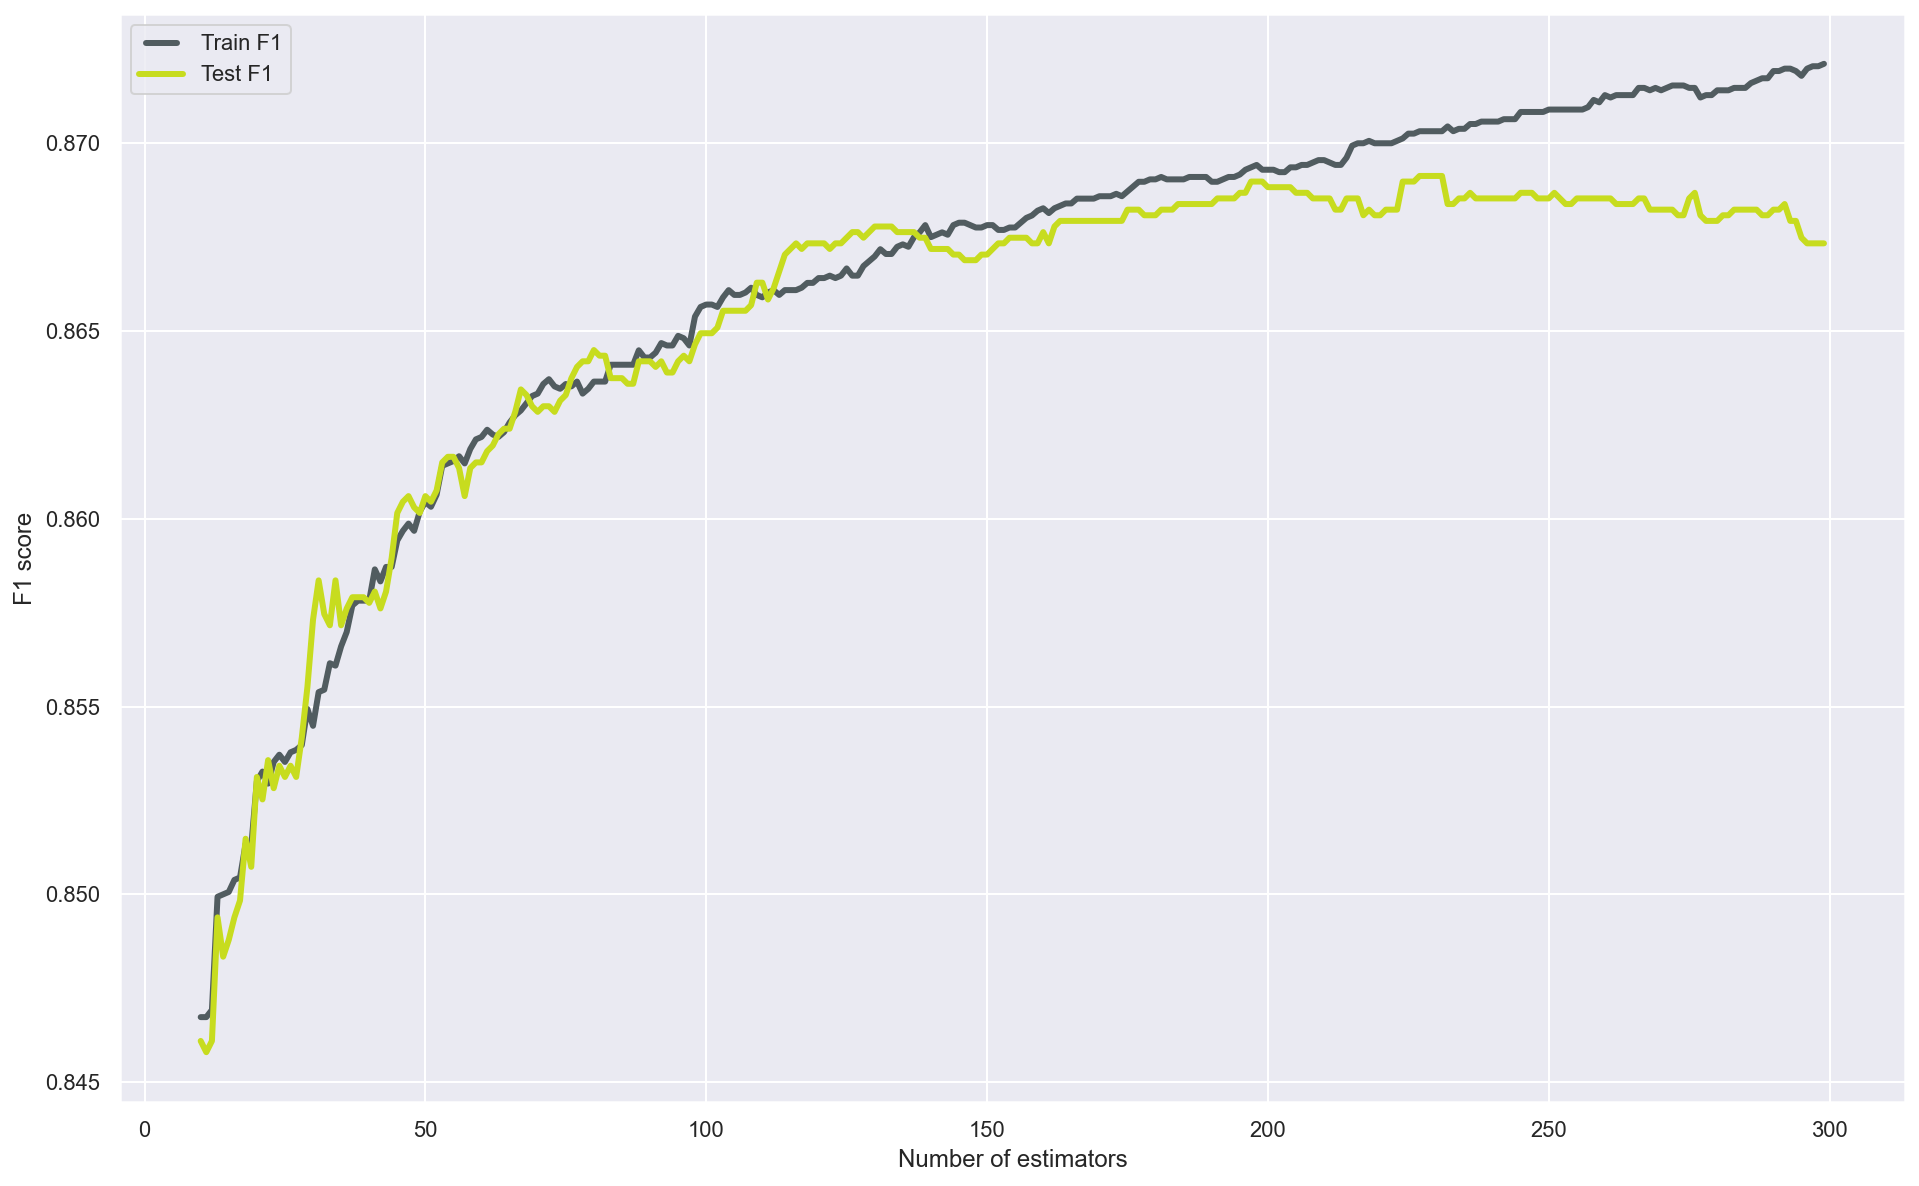

In [330]:
num_estimators = list(range(10,300))
calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is  0.7000000000000001
The best test value is  0.30000000000000004


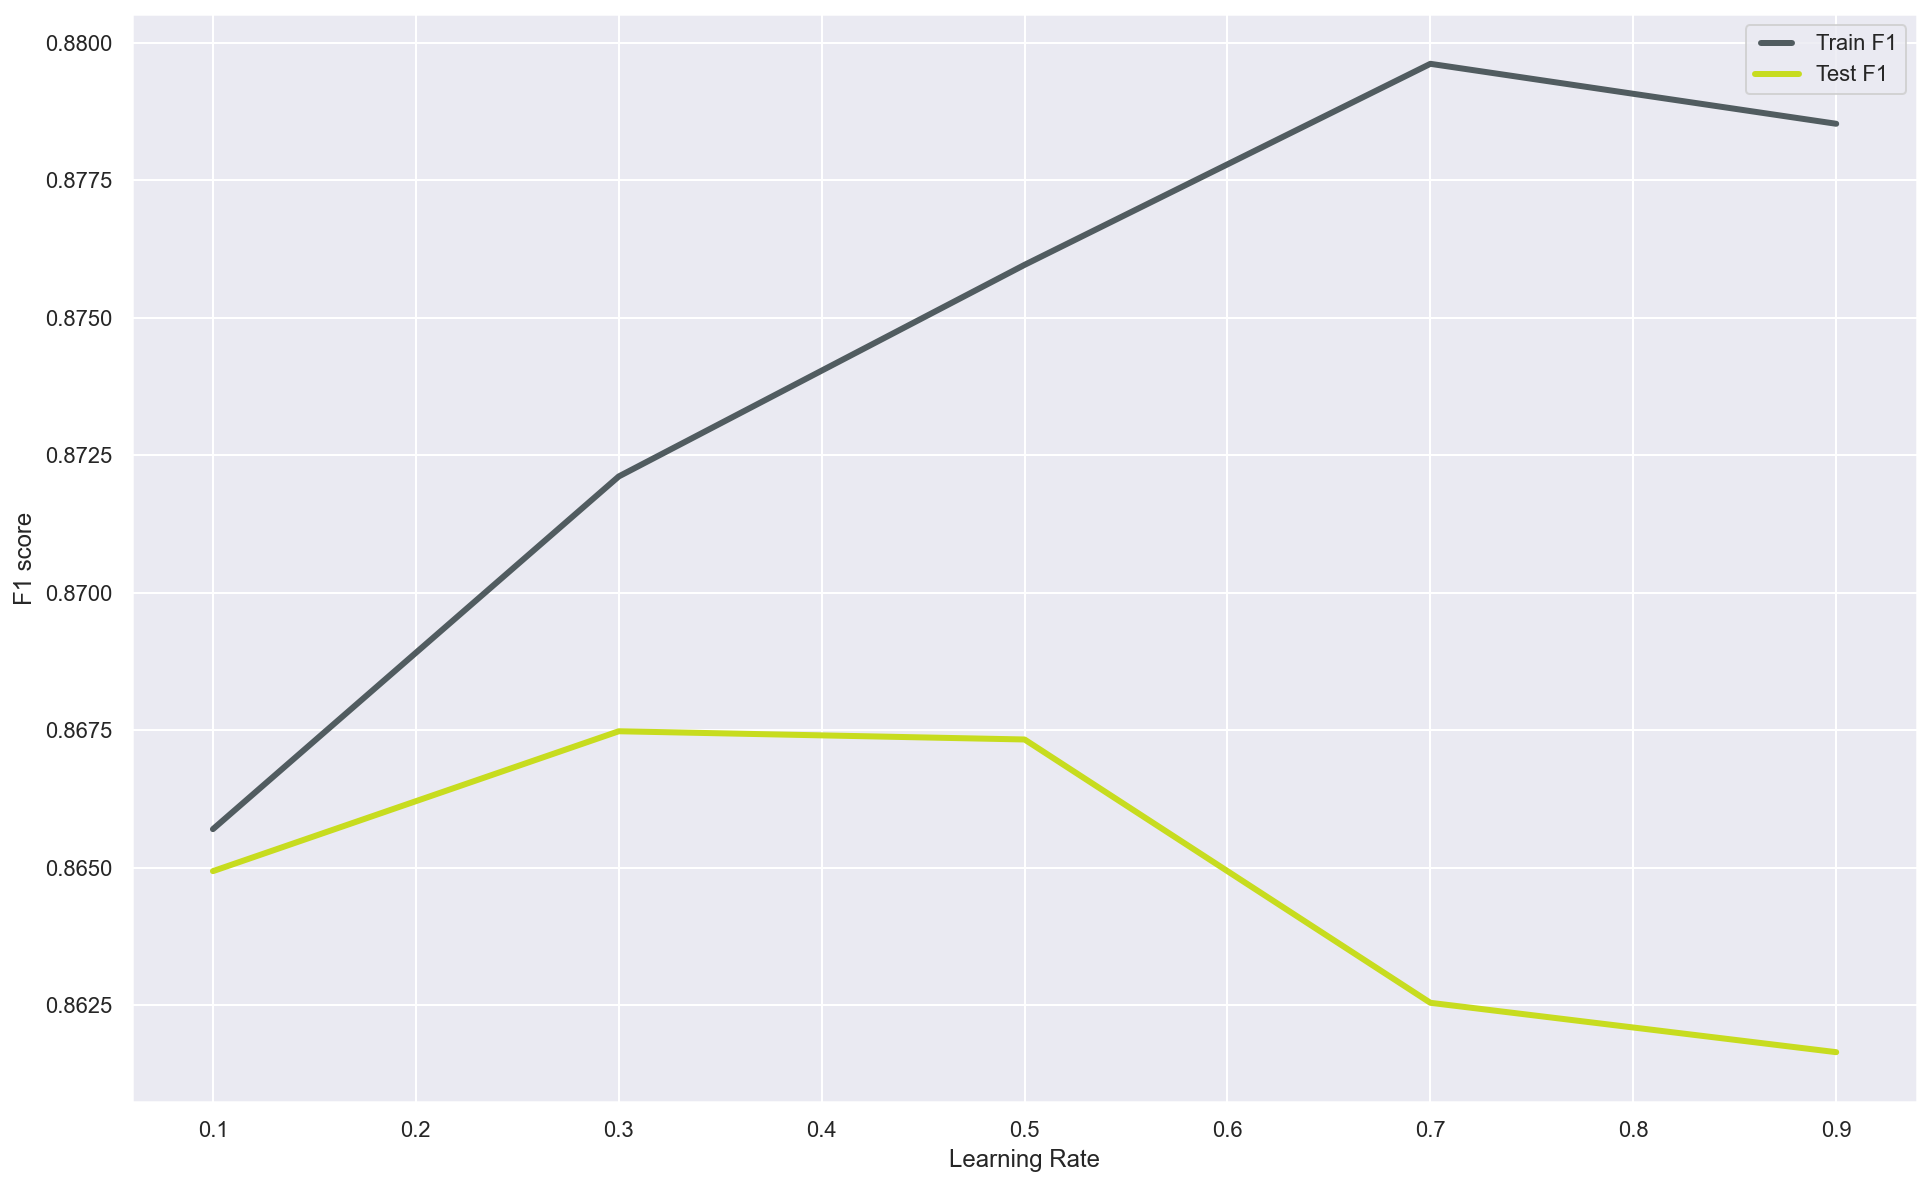

In [331]:
learning_rate = list(np.linspace(0.1, 0.9, 5, endpoint=True))
calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

**TTS**

In [332]:
def run_model_GB(X,y):
    GB = GradientBoostingClassifier(min_samples_split=4,n_estimators = 227, random_state=5, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X,y)
    return GB

In [333]:
def TTS_score_GB(X_train, y_train, X_val, y_val):
    model = run_model_GB(X_train, y_train)
    value_train = evaluate_model(X_train, y_train, model)
    value_val = evaluate_model(X_val,y_val, model)
    print('Train:', value_train)
    print('Val:', value_val)

In [334]:
TTS_score_GB(X_train, y_train, X_val, y_val)

Train: 0.872948717948718
Val: 0.8680825605743344


In [335]:
GB = GradientBoostingClassifier(min_samples_split=4,n_estimators = 227, random_state=5, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)
GB.predict(X_train)
GB.predict(X_val)
GBC = GB.score(X_val, y_val)
GBC

0.8680825605743344

**KF**

In [336]:
#def avg_score_GB(method,X,y):
#    score_train = []
#    score_test = []
#    for train_index, test_index in method.split(X):
#        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#       model = run_model_GB(X_train, y_train)
#        value_train = evaluate_model(X_train, y_train, model)
#        value_test = evaluate_model(X_test,y_test, model)
#        score_train.append(value_train)
#        score_test.append(value_test)

#    print('Train:', np.mean(score_train))
#    print('Test:', np.mean(score_test))

In [337]:
#avg_score_GB(kf,X,y)

Train: 0.8725408184937958
Test: 0.8642659032679234


**RKF**

In [ ]:
#avg_score_GB(rkf,X,y) #gotten with n_repeats = 2 

<hr>
<a class="anchor" id="modelscomparison">
    
# 20. Models Comparison
    
</a>

<a class="anchor" id="acc">

## 20.1. Accuracies

</a>

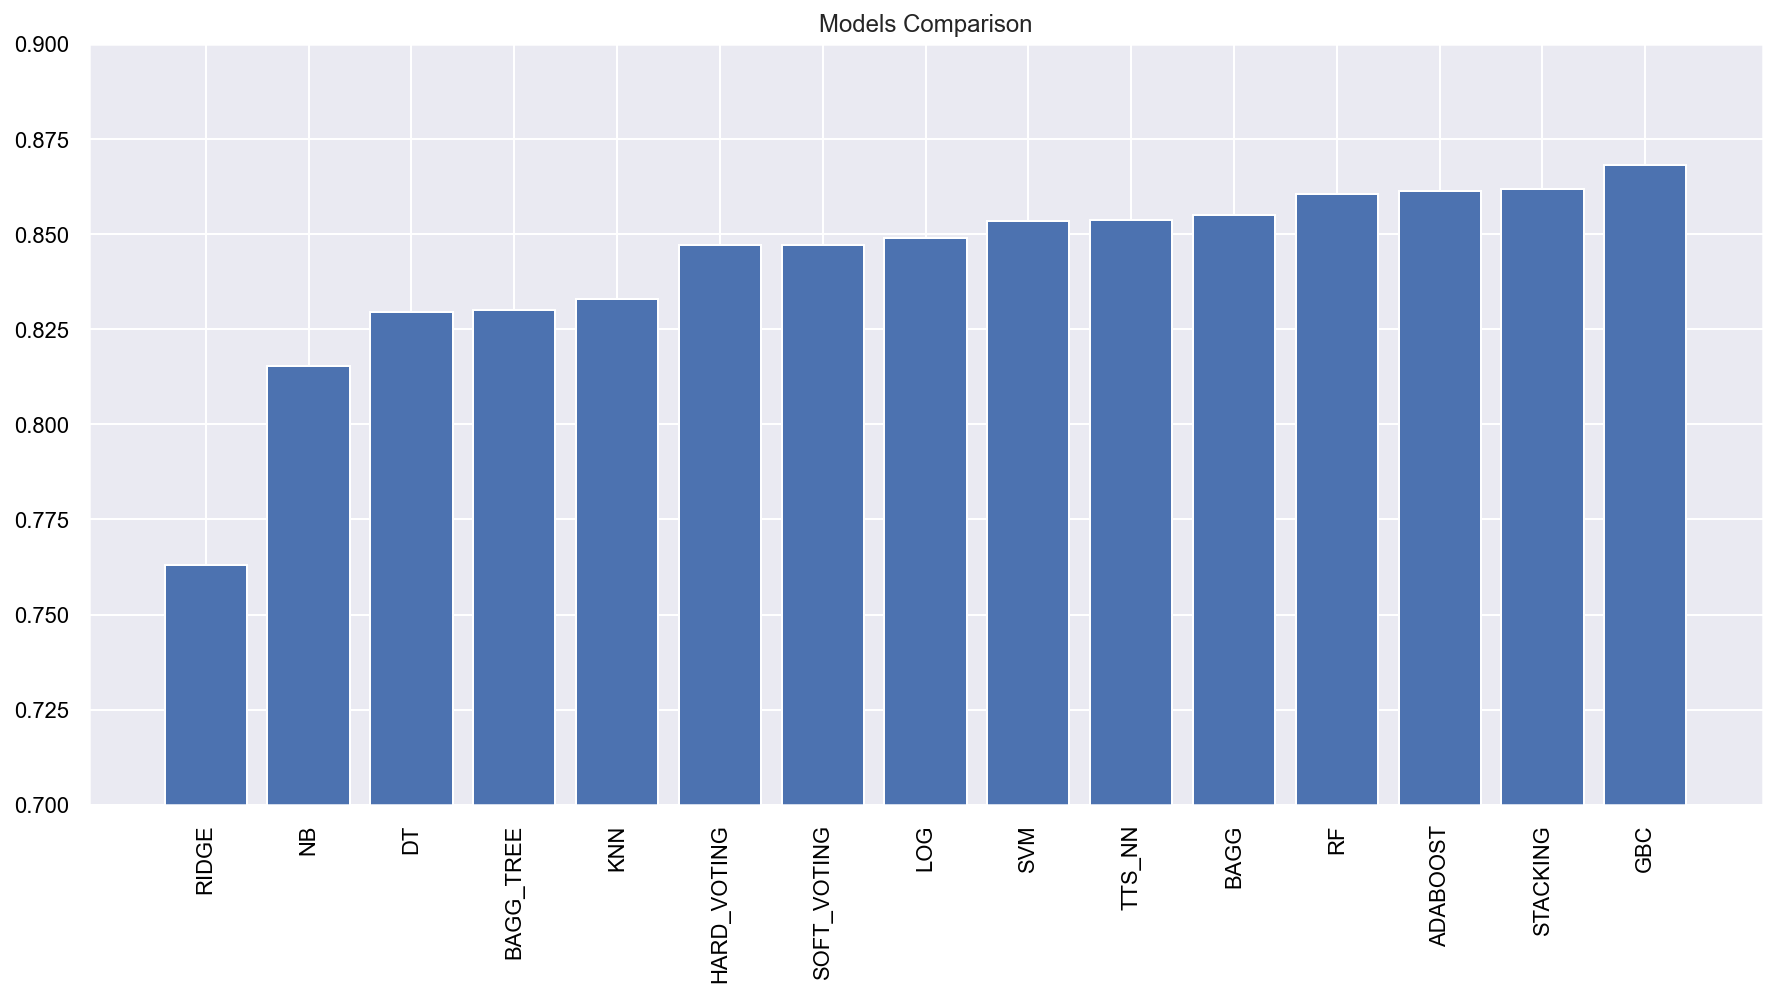

In [338]:
accuracies = [TTS_NN,LOG,KNN,DT,RF,NB,BAGG,BAGG_TREE,ADABOOST,STACKING,SVM,RIDGE,HARD_VOTING,
             SOFT_VOTING,GBC]
models = ["TTS_NN","LOG","KNN","DT","RF","NB","BAGG","BAGG_TREE",
          "ADABOOST","STACKING","SVM","RIDGE","HARD_VOTING","SOFT_VOTING","GBC"]
data_tuples = list(zip(models, accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.figure(figsize=(15,7))
plt.bar(data[0], data[1])
plt.xticks(rotation=90)
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylim(0.7, 0.9)
plt.title('Models Comparison')
plt.show()

<a class="anchor" id="roc">

## 20.2. ROC Curve

</a>

In [339]:
tts_nn=MLPClassifier(activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs',random_state=5).fit(X_train,y_train)
log_reg=LogisticRegression(random_state=5).fit(X_train,y_train)
knn= KNeighborsClassifier().fit(X_train,y_train)
dt=DecisionTreeClassifier(splitter = 'random',criterion = 'entropy',random_state=5).fit(X_train,y_train)
rf=RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8).fit(X_train,y_train)
nb=GaussianNB().fit(X_train, y_train)
NN = MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs')
bbc = BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train, y_train)
tree=DecisionTreeClassifier()
bagg_tree=BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1).fit(X_train,y_train)
adaboost=AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001).fit(X_train,y_train)
estimators = [('rf', RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8)),('nb', GaussianNB())]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)
svm = SVC(kernel = 'rbf', gamma = 'auto',random_state=5, probability = True, C=50).fit(X_train, y_train)
gbc = GradientBoostingClassifier(min_samples_split=4,n_estimators = 227, random_state=5, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)


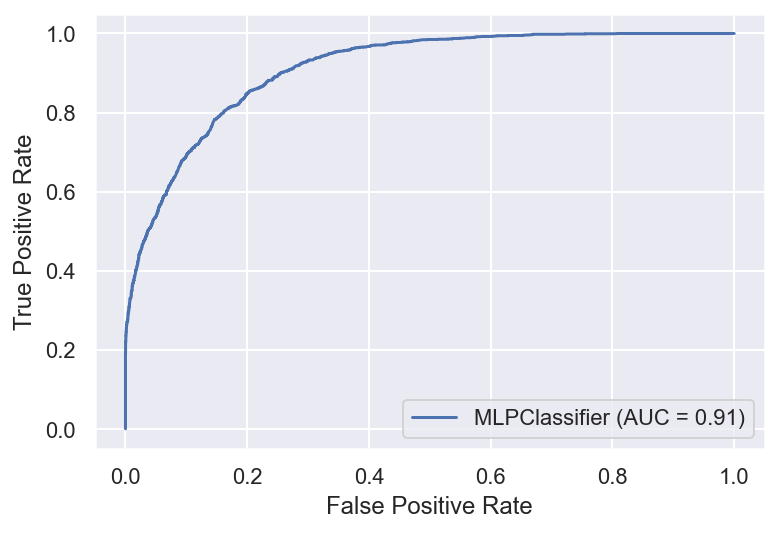

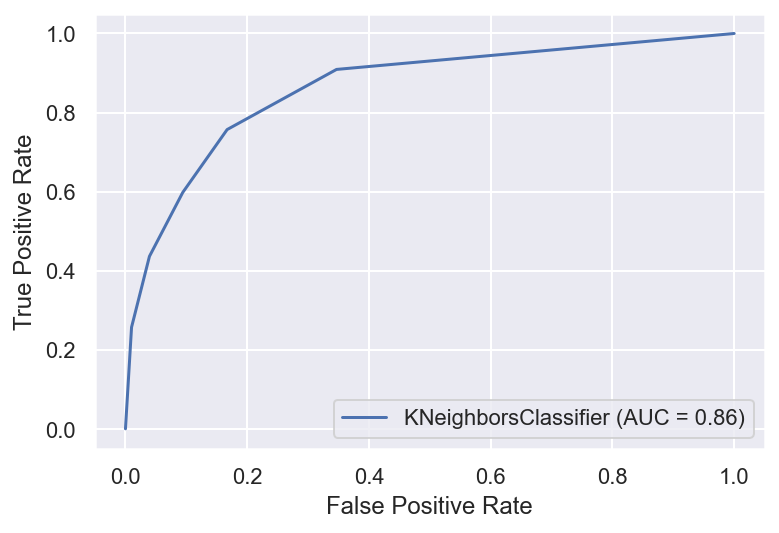

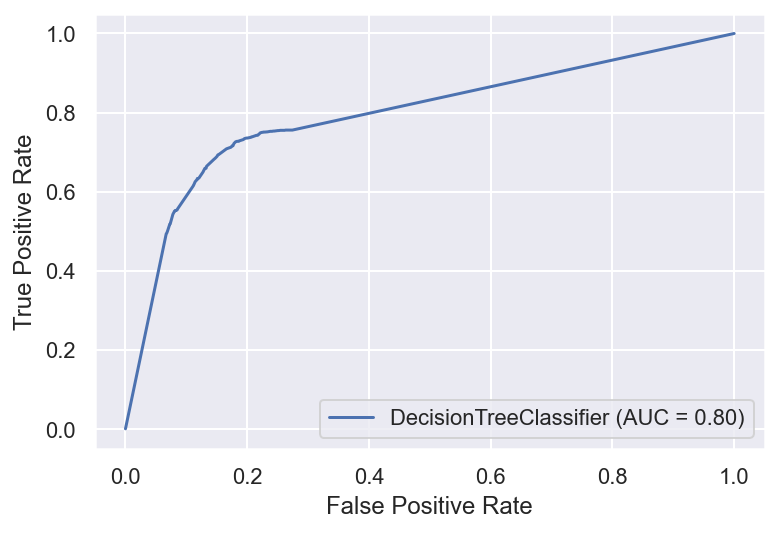

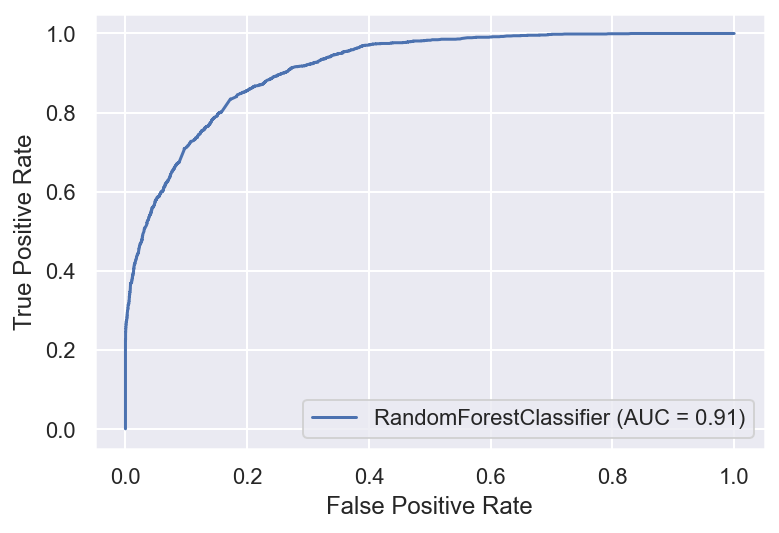

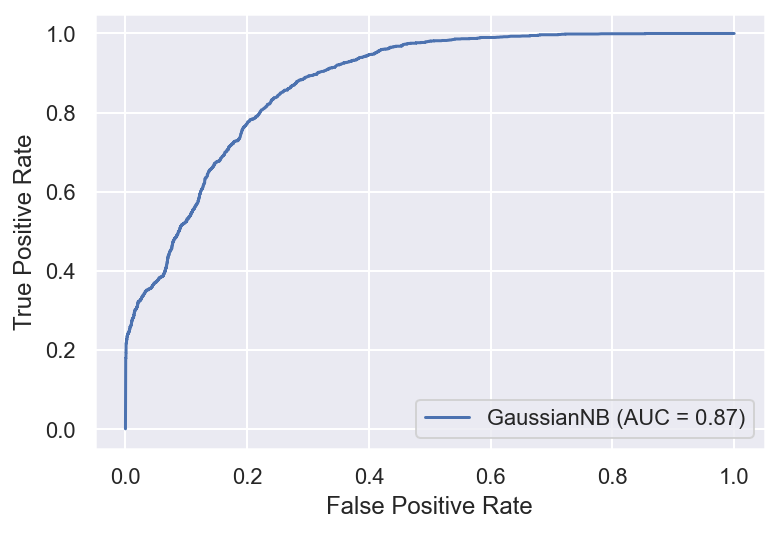

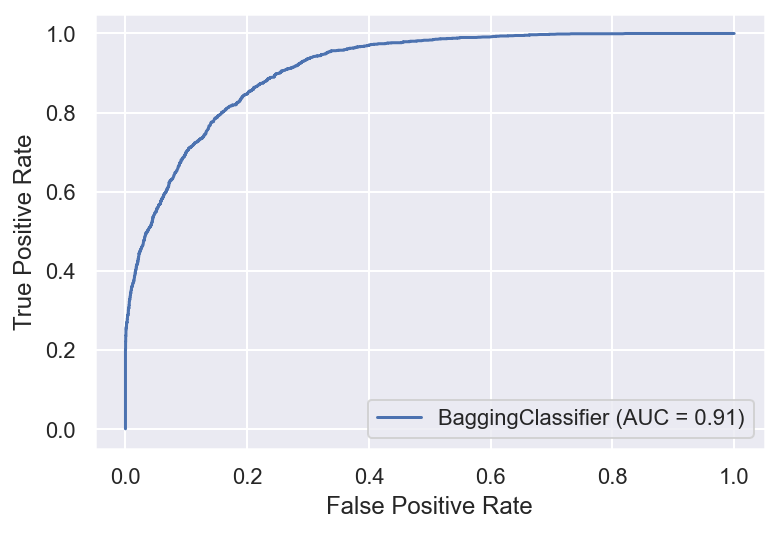

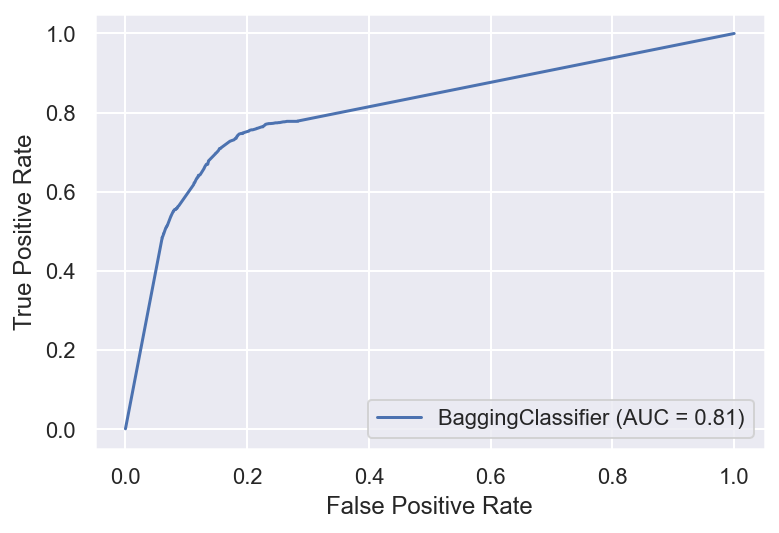

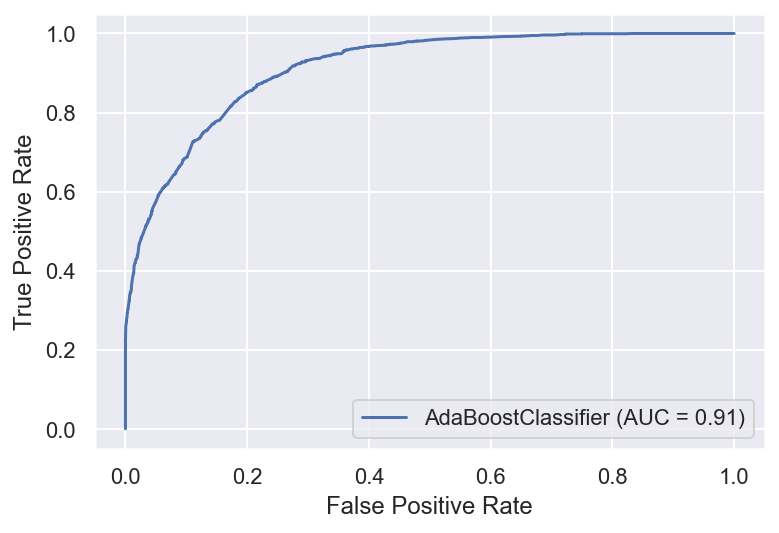

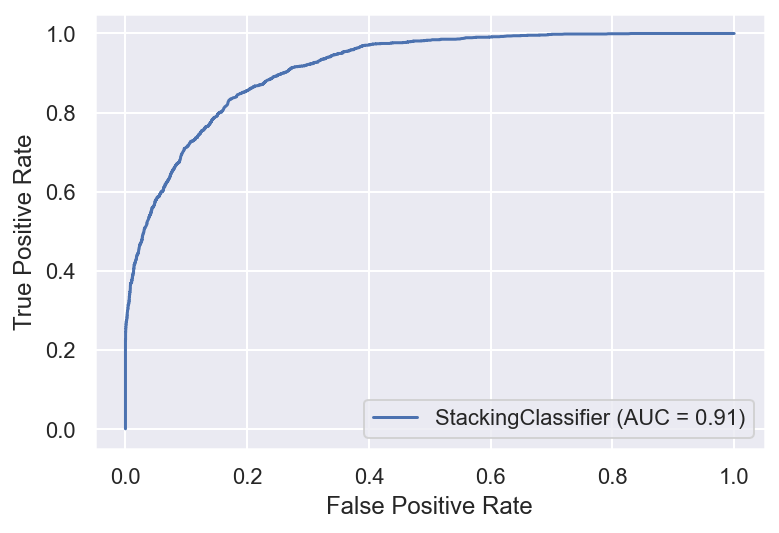

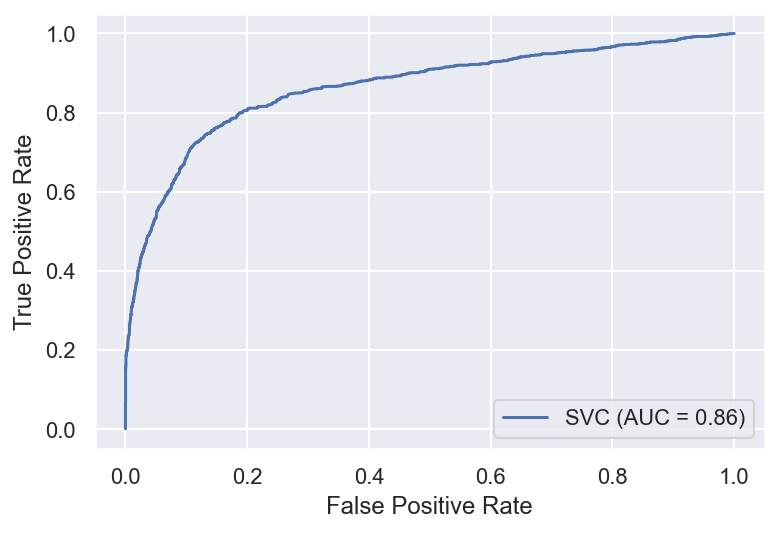

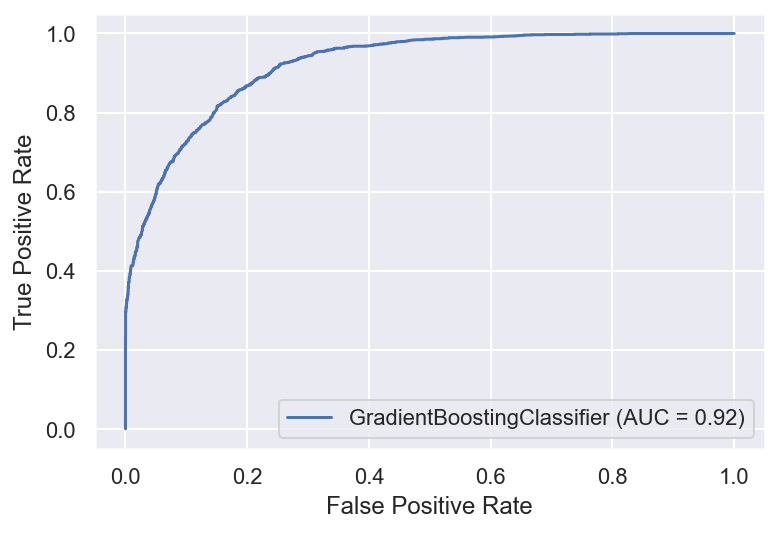

In [342]:
metrics.plot_roc_curve(tts_nn, X_val, y_val) 
metrics.plot_roc_curve(knn, X_val, y_val) 
metrics.plot_roc_curve(dt, X_val, y_val) 
metrics.plot_roc_curve(rf, X_val, y_val) 
metrics.plot_roc_curve(nb, X_val, y_val) 
metrics.plot_roc_curve(bbc, X_val, y_val) 
metrics.plot_roc_curve(bagg_tree, X_val, y_val) 
metrics.plot_roc_curve(adaboost, X_val, y_val) 
metrics.plot_roc_curve(sc, X_val, y_val) 
metrics.plot_roc_curve(svm, X_val, y_val) 
metrics.plot_roc_curve(gbc, X_val, y_val)  
plt.show() 

In [345]:
classifiers = [MLPClassifier(random_state=5,activation = 'logistic',alpha = 0.001 , hidden_layer_sizes=(10,10,10), learning_rate = 'adaptive', solver = 'lbfgs'), 
               LogisticRegression(random_state=5), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=5,splitter = 'random',criterion = 'entropy'),
               RandomForestClassifier(n_estimators=150, criterion="gini", max_features='sqrt', random_state=5, max_depth=8),
               GaussianNB(),
               BaggingClassifier(base_estimator = NN, n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               BaggingClassifier(base_estimator = tree,n_estimators = 50, bootstrap = False, random_state = 5, n_jobs = -1),
               AdaBoostClassifier(n_estimators=90, random_state=5,learning_rate = 0.7000000000000001),
               StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
               SVC(kernel = 'rbf', gamma = 'auto',random_state=15, probability = True, C=50),
               GradientBoostingClassifier(min_samples_split=4,n_estimators = 227, random_state=5, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2')]

In [346]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [347]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_val)[::,1]
    
    fpr, tpr, _ = roc_curve(y_val,  yproba)
    auc = roc_auc_score(y_val, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [348]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [349]:
result_table

fpr  \
classifiers                                                                     
MLPClassifier               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
LogisticRegression          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
KNeighborsClassifier        [0.0, 0.00999607996863975, 0.03939631517052136...   
DecisionTreeClassifier      [0.0, 0.06683653469227754, 0.06683653469227754...   
RandomForestClassifier      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
GaussianNB                  [0.0, 0.0001960015680125441, 0.000196001568012...   
BaggingClassifier           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
BaggingClassifier           [0.0, 0.06017248137985104, 0.06036848294786358...   
AdaBoostClassifier          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
StackingClassifier          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
SVC                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.000196001568012544...   
GradientBoostingClassifier  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                                          tpr  \
classifiers                                                                     
MLPClassifier               [0.0, 0.0006313131313131314, 0.012626262626262...   
LogisticRegression          [0.0, 0.0006313131313131314, 0.003156565656565...   
KNeighborsClassifier        [0.0, 0.2569444444444444, 0.43623737373737376,...   
DecisionTreeClassifier      [0.0, 0.49242424242424243, 0.4930555555555556,...   
RandomForestClassifier      [0.0, 0.0006313131313131314, 0.001893939393939...   
GaussianNB                  [0.0, 0.10858585858585859, 0.11047979797979798...   
BaggingClassifier           [0.0, 0.0006313131313131314, 0.025883838383838...   
BaggingClassifier           [0.0, 0.4823232323232323, 0.4823232323232323, ...   
AdaBoostClassifier          [0.0, 0.0012626262626262627, 0.003787878787878...   
StackingClassifier          [0.0, 0.0006313131313131314, 0.001893939393939...   
SVC                         [0.0, 0.0006313131313131314, 0.022727272727272...   
GradientBoostingClassifier  [0.0, 0.0006313131313131314, 0.022727272727272...   

                                 auc  
classifiers                           
MLPClassifier               0.910285  
LogisticRegression          0.900965  
KNeighborsClassifier        0.862439  
DecisionTreeClassifier      0.795350  
RandomForestClassifier      0.913819  
GaussianNB                  0.874386  
BaggingClassifier           0.912082  
BaggingClassifier           0.806609  
AdaBoostClassifier          0.912274  
StackingClassifier          0.913827  
SVC                         0.864084  
GradientBoostingClassifier  0.920905

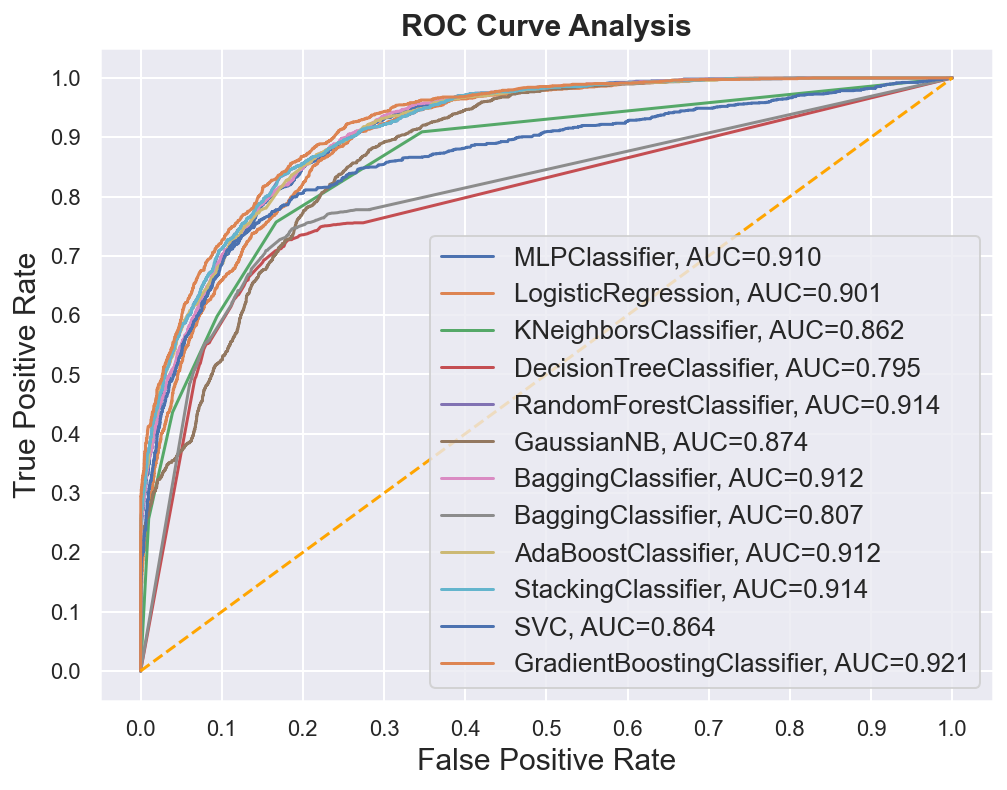

In [350]:
fig = plt.figure(figsize=(8,6))

for i in range(0,12):
    plt.plot(result_table.iloc[i]['fpr'], 
             result_table.iloc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(result_table.index[i], result_table.iloc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

<hr>
<a class="anchor" id="kaggle">
    
# 21. Final Model - Kaggle Submission
    
</a>

In [373]:
#model = GradientBoostingClassifier(min_samples_split=4,n_estimators = 227, random_state=5, loss = 'exponential', learning_rate=0.30000000000000004, max_features = 'log2').fit(X_train, y_train)
#Labels_Test = model.predict(c_ya_test_copy[new_feature_variables])
#Labels_Test = pd.DataFrame(Labels_Test)

In [374]:
#Labels_Test = model.predict(c_ya_test_copy[new_feature_variables])
#Labels_Test = pd.DataFrame(Labels_Test)

In [375]:
#Kaggle_sub = pd.DataFrame(c_ya_test_copy.index)
#Kaggle_sub

CITIZEN_ID
0           34886
1           34887
2           34888
3           34889
4           34890
...           ...
10095       44981
10096       44982
10097       44983
10098       44984
10099       44985

[10100 rows x 1 columns]

In [376]:
#Kaggle_sub = pd.concat([Kaggle_sub["CITIZEN_ID"], Labels_Test[0]],axis=1)
#Kaggle_sub["Income"] = Kaggle_sub[0]
#Kaggle_sub = Kaggle_sub.drop(columns=[0])

In [381]:
#Kaggle_sub.groupby("Income").count()["CITIZEN_ID"]

Income
0    8122
1    1978
Name: CITIZEN_ID, dtype: int64

In [377]:
#Kaggle_sub.set_index("CITIZEN_ID",inplace=True,drop=True)

In [356]:
#Kaggle_sub.to_csv(r"C:\Users\sorai\OneDrive\Ambiente de Trabalho\Mestrado DSAA-LAPTOP-LMNUKD9A-LAPTOP-LMNUKD9A\Machine Learning\Kaggle_submission_NN.csv")

In [ ]:
# Kaggle_sub.to_csv(r"C:\Users\raque\Desktop\PROJECT_ML\Kaggle_submission_NN10_24122020.csv")